In [9]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [12]:
import sys
sys.path.append("..")
from Functions.UNSW_DF import *
train, test = DF_preprocessed_traintest()
df = train.append(test)

Reading Preprocessed CSV Files..
	 Train Shape:  	 (175341, 54)
	 Test Shape:  	 (82332, 54)
Dataset Loaded!


In [14]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [21]:
feat_cols = train.columns

In [22]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.28570104 0.11435367 0.10011165]


C:\Users\Sajepan\AppData\Local\Temp/ipykernel_19980/1801808602.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


KeyError: '[245289, 221262, 242180, 185095, 240725, 177913, 206526, 249137, 189723, 204991, 185424, 197142, 208589, 225130, 219598, 225696, 188526, 179319, 190615, 180211, 225675, 216814, 176834, 206332, 206856, 221244, 207459, 237887, 202987, 187409, 195409, 221044, 219020, 222712, 246951, 211620, 179641, 207064, 185400, 189930, 244353, 208199, 248600, 230114, 179315, 225763, 224860, 182333, 233748, 205146, 240289, 237142, 223093, 188234, 205423, 177479, 191171, 215262, 226458, 175633, 213368, 197035, 240291, 247588, 200431, 190851, 198591, 226518, 248398, 246161, 217025, 195488, 207768, 228157, 240299, 232675, 227667, 248532, 225677, 220714, 233628, 226384, 203406, 176758, 221433, 238533, 225267, 218663, 241897, 248042, 253343, 201114, 183032, 214629, 232970, 223535, 194843, 217471, 229564, 178245, 236991, 239535, 229362, 220359, 188249, 206498, 249614, 248010, 256426, 241378, 221209, 220358, 190533, 239663, 178536, 184864, 216023, 223886, 230843, 219515, 223155, 184808, 182542, 216614, 250876, 190273, 226417, 207072, 196789, 219169, 254052, 193790, 180720, 232521, 210461, 192415, 227606, 179705, 207019, 190362, 178155, 180833, 201801, 240219, 224422, 200605, 215305, 190776, 242778, 210346, 202073, 184728, 222943, 183101, 193213, 219202, 199600, 198399, 187738, 207812, 226327, 229360, 224570, 239390, 216324, 246163, 221719, 177107, 206196, 187579, 229317, 255751, 184472, 230187, 188994, 254445, 215590, 217401, 206581, 225172, 220146, 178451, 189610, 188611, 190238, 175561, 255541, 189865, 184928, 212303, 207198, 255821, 218590, 210238, 207150, 252412, 254535, 227903, 188657, 243932, 240179, 238670, 197992, 254669, 243316, 218226, 246721, 221853, 184235, 208936, 241343, 231581, 254798, 226257, 223010, 242941, 207584, 235753, 194394, 229651, 184707, 229247, 214700, 243540, 190530, 239912, 252977, 190627, 210474, 248848, 213812, 207210, 183513, 251006, 215126, 202806, 255292, 252085, 224755, 197336, 241836, 185716, 224515, 256900, 240796, 201857, 217309, 206530, 191069, 198855, 224282, 248003, 231616, 198073, 220249, 177360, 223627, 224753, 237063, 214656, 186595, 249821, 199249, 195943, 212581, 248317, 188737, 243077, 249723, 178325, 245896, 253173, 195131, 206140, 217511, 193403, 227357, 226913, 193106, 204678, 176311, 184358, 241975, 178812, 201300, 247756, 193418, 188024, 223585, 193370, 218525, 198235, 221622, 244373, 224020, 216504, 213218, 204901, 253000, 195906, 228998, 257379, 248793, 232088, 236103, 214478, 246318, 249833, 235539, 182319, 236631, 233542, 231673, 236046, 207354, 230518, 204941, 215779, 244693, 186977, 229868, 181170, 205220, 176531, 248510, 219332, 190066, 196180, 208224, 212312, 188565, 256176, 229786, 224823, 205016, 256637, 240834, 210808, 257313, 230379, 185717, 250255, 254188, 212524, 202277, 214006, 202866, 200111, 232035, 197448, 214282, 184883, 217911, 254330, 255342, 176822, 223326, 209189, 180431, 219267, 204370, 242534, 208292, 210847, 189232, 252053, 193908, 234591, 196452, 236894, 184827, 195176, 228962, 236114, 186487, 209008, 224297, 237629, 242276, 216119, 234767, 180343, 217373, 231868, 213881, 241028, 221640, 194378, 223148, 193525, 246650, 178945, 189102, 208601, 215445, 242293, 175644, 247107, 179471, 219622, 179211, 205742, 206191, 236505, 228925, 239061, 183052, 176158, 257268, 243245, 198445, 250607, 211322, 227776, 233857, 197786, 228268, 238263, 209436, 226680, 239397, 257650, 188416, 236995, 227794, 220014, 242994, 190018, 237591, 208636, 215022, 251944, 230589, 252928, 193727, 245753, 240824, 219283, 224293, 245333, 240673, 201363, 215063, 192082, 199541, 223320, 233066, 212638, 196832, 249146, 251393, 209121, 183154, 198098, 180167, 204697, 215327, 202218, 184782, 198868, 247517, 229227, 233417, 212496, 204177, 199755, 178528, 191226, 200487, 198084, 204721, 229122, 180438, 237993, 233131, 199675, 252688, 238466, 253984, 248886, 190983, 194980, 251705, 220704, 243391, 214410, 180872, 215239, 177098, 194371, 238997, 198982, 217230, 184362, 236910, 223376, 185975, 219382, 242053, 201677, 234940, 229330, 240737, 239215, 176069, 198909, 233799, 201347, 221238, 236210, 245931, 223516, 203221, 194090, 250655, 232788, 204664, 240862, 251846, 228417, 207295, 254630, 199437, 247655, 191092, 197537, 189876, 211488, 209871, 204684, 190663, 239768, 243421, 187829, 211374, 196538, 246105, 247230, 187590, 230635, 251179, 175348, 213507, 249502, 195384, 187467, 212036, 225380, 192484, 194507, 216646, 222727, 182532, 246831, 199096, 177268, 222342, 236273, 239183, 257527, 221695, 229699, 180425, 248025, 253159, 229496, 243886, 240905, 228156, 189514, 183527, 209972, 221206, 223661, 219315, 218647, 233674, 232462, 178404, 239732, 223680, 187531, 207929, 246656, 253826, 223055, 236855, 226016, 186791, 217160, 194000, 192667, 176237, 202916, 206704, 218470, 237655, 207610, 230449, 249799, 255223, 220735, 236689, 212807, 233358, 222427, 183812, 196655, 215335, 249312, 237593, 215030, 235327, 194391, 215034, 185878, 224596, 240999, 244967, 220911, 257598, 250844, 189015, 235297, 196656, 213922, 198941, 241321, 196897, 253466, 204761, 188952, 250975, 177757, 184554, 202497, 219407, 251249, 201942, 230154, 211994, 215939, 209510, 212795, 200071, 211528, 179962, 249466, 179210, 217891, 199367, 215336, 191525, 186259, 200118, 245346, 247360, 195864, 255858, 185364, 241260, 195609, 211107, 238235, 203336, 242562, 182673, 191201, 209312, 209638, 220330, 221010, 224047, 190801, 238155, 237794, 222142, 208362, 177301, 183757, 203798, 256140, 198186, 196393, 220242, 220128, 237135, 196766, 243565, 217589, 196687, 191580, 241339, 200031, 226842, 177554, 216045, 235991, 212448, 205640, 200638, 204604, 224562, 239617, 200228, 191954, 210851, 216413, 213256, 186241, 223018, 229994, 200889, 215936, 246330, 197050, 223411, 182298, 193557, 237222, 228560, 251196, 222592, 220399, 178405, 242613, 205285, 250564, 222218, 224925, 195627, 253136, 206738, 240226, 254622, 203027, 187393, 235114, 250918, 200994, 192507, 195789, 186916, 199031, 208056, 203178, 189082, 215816, 177460, 211272, 186281, 194969, 248701, 253304, 226564, 212024, 236663, 232294, 185389, 242016, 232049, 183750, 211385, 243995, 202081, 184512, 222584, 196026, 218380, 245923, 178204, 213362, 219848, 211532, 203271, 227815, 211529, 191893, 236280, 243340, 185895, 222972, 220732, 237138, 196900, 204296, 244256, 254615, 183607, 180996, 209825, 224356, 179342, 239886, 249437, 214524, 193234, 202823, 239799, 224291, 191415, 252960, 249015, 182544, 186705, 200039, 210301, 178635, 251358, 253337, 226211, 191096, 254304, 226042, 226800, 227913, 207971, 215891, 190283, 194201, 236112, 234516, 244935, 180088, 244900, 190802, 227197, 248990, 183262, 251313, 241570, 235166, 233468, 230446, 246885, 255253, 208117, 233219, 234519, 220916, 221975, 218594, 185429, 181274, 184117, 206056, 196361, 220606, 210358, 179294, 250589, 247220, 196225, 200242, 178659, 193364, 228743, 243773, 198219, 204343, 210132, 190823, 176200, 197341, 230625, 191320, 188789, 199673, 177494, 201877, 210649, 187152, 230864, 239310, 195562, 219873, 246724, 206183, 177447, 191378, 213354, 229943, 195812, 218212, 253318, 216826, 255356, 186814, 247854, 249531, 238653, 199017, 249358, 252866, 195945, 188364, 198461, 189799, 217987, 249795, 188383, 179777, 249204, 241905, 216540, 247102, 229998, 222759, 222420, 237097, 236379, 205434, 229233, 233987, 196143, 214320, 235413, 240537, 233856, 213450, 223622, 206374, 181557, 227399, 200490, 176258, 179836, 224208, 222367, 214043, 229098, 216270, 242542, 195480, 242132, 199344, 243191, 195526, 217263, 198594, 177725, 242359, 224856, 251329, 244209, 194049, 220364, 239433, 234276, 193757, 222675, 201074, 200407, 249006, 204572, 224123, 250969, 235594, 201016, 257116, 225984, 215492, 186598, 209413, 238642, 225399, 255944, 228305, 182445, 256561, 218675, 251482, 192156, 254867, 256219, 231128, 185787, 176462, 224507, 206074, 242957, 212335, 183285, 244952, 198571, 193548, 244482, 245478, 195719, 177983, 257538, 179295, 203704, 238040, 217763, 246563, 236817, 255992, 231019, 214602, 241985, 197259, 213654, 256445, 180953, 207141, 247470, 207084, 249300, 207395, 199162, 221174, 212103, 245704, 220856, 240017, 230116, 199311, 232433, 213345, 241644, 204009, 183077, 191705, 247425, 200905, 213307, 201820, 244274, 213366, 254091, 209828, 227243, 237579, 247482, 226330, 255700, 243955, 175866, 206845, 191231, 250676, 240633, 180360, 253195, 240768, 184909, 176334, 219442, 193132, 221599, 251999, 242995, 222225, 189850, 242093, 211946, 237730, 237743, 208116, 199108, 219899, 239933, 213865, 199442, 236286, 228420, 229350, 237595, 245800, 210008, 196248, 200560, 252229, 248376, 247195, 227362, 192291, 244148, 183141, 194926, 229888, 247176, 184030, 188380, 185463, 214302, 245630, 202686, 192267, 175418, 186200, 203952, 227585, 229654, 256358, 233285, 180442, 199415, 244252, 216456, 249210, 250006, 230034, 177990, 235784, 254637, 202704, 245552, 217734, 238896, 198351, 242111, 255574, 192836, 202109, 205816, 215246, 186529, 175901, 205702, 244400, 250793, 178510, 226622, 254005, 184699, 210770, 212089, 191754, 213042, 230160, 241936, 179385, 224324, 248277, 234546, 256052, 245538, 198899, 239602, 216798, 238632, 230392, 251555, 196337, 189618, 248538, 197939, 196460, 189499, 222813, 188043, 221789, 223092, 178934, 232967, 210665, 207033, 181952, 236359, 189212, 250248, 230010, 189011, 215198, 206042, 256557, 176477, 201725, 220574, 206625, 179694, 177013, 247974, 197212, 253936, 210054, 198311, 229290, 235644, 250420, 213326, 208043, 217180, 213147, 186393, 206570, 193429, 243021, 234280, 188397, 234195, 223460, 205185, 240122, 254991, 192791, 257512, 227417, 228472, 248605, 236019, 230336, 208668, 178915, 223506, 234883, 227145, 234403, 216332, 201481, 211372, 248738, 200402, 256976, 240713, 188510, 230861, 249817, 237722, 190813, 255066, 248000, 231654, 255725, 184214, 213734, 186677, 238346, 212358, 249342, 226109, 233293, 219117, 221896, 255368, 235557, 245037, 247406, 203651, 239890, 219453, 225754, 251932, 227970, 252591, 210432, 184775, 190052, 249094, 196096, 207394, 228184, 234910, 182782, 222714, 239809, 257579, 230665, 220101, 183958, 223078, 257521, 199443, 214110, 209631, 234281, 194527, 241421, 234364, 253819, 209606, 213131, 194619, 254169, 176187, 212408, 177196, 200257, 182212, 229841, 209104, 253582, 199380, 237534, 238139, 201062, 186846, 251084, 189158, 186931, 220147, 236912, 247509, 223991, 208820, 220041, 207205, 241483, 194263, 242026, 216870, 229342, 232772, 252701, 206560, 218520, 209237, 215120, 185099, 199854, 248888, 247092, 210998, 230926, 254254, 184355, 194267, 180647, 220755, 241977, 225752, 222798, 243566, 187811, 225102, 226641, 220348, 246614, 176230, 197679, 241375, 212313, 215163, 191115, 214634, 242162, 192024, 193380, 241856, 176142, 176300, 241677, 205211, 237999, 220193, 253493, 214785, 189716, 230278, 196830, 211678, 250105, 214124, 193842, 191940, 249712, 196679, 190071, 253511, 222444, 182131, 177029, 185464, 249289, 189753, 183772, 187932, 197707, 247265, 205461, 212249, 196340, 178081, 255932, 183349, 235965, 239260, 182425, 219761, 233107, 189984, 189411, 205148, 204686, 186660, 188900, 207975, 215508, 231173, 251546, 252449, 233081, 244617, 185818, 219667, 239671, 206104, 234157, 184621, 198443, 188300, 200515, 181518, 256217, 222705, 251368, 183769, 239883, 217950, 237996, 255458, 247163, 241192, 189268, 255629, 241162, 244365, 228212, 220486, 255245, 253395, 222868, 200206, 210745, 255116, 257149, 185239, 181284, 227721, 243887, 234525, 187691, 193460, 230217, 254193, 236784, 207834, 176845, 235323, 216397, 223988, 188851, 175642, 230770, 196077, 226857, 220190, 193643, 182838, 219676, 242628, 185235, 248750, 255483, 185937, 185640, 180184, 253520, 243827, 240659, 239674, 235517, 226451, 219494, 228788, 186748, 183182, 208300, 242163, 236180, 256717, 234485, 177016, 239599, 216126, 248916, 241742, 250949, 188066, 208027, 176843, 226544, 217341, 191923, 253652, 234852, 209935, 242046, 177242, 228017, 194210, 256303, 213775, 200101, 190305, 245780, 209848, 228891, 214684, 177044, 189095, 231270, 205197, 183524, 177260, 243757, 226883, 238669, 184729, 226927, 189267, 224179, 199251, 240587, 245275, 246601, 231041, 203909, 212219, 194907, 183259, 200079, 223324, 192216, 178134, 252423, 212867, 178287, 179678, 196238, 225624, 217059, 244616, 187908, 177925, 186648, 176198, 182994, 225422, 225935, 208044, 187386, 212468, 197602, 232656, 241278, 244475, 178343, 185284, 224987, 226728, 228496, 181138, 184163, 256920, 253491, 186149, 244535, 179469, 207466, 227432, 237831, 179027, 187667, 229307, 221274, 210623, 256631, 233786, 203967, 209392, 184305, 184742, 243137, 191499, 208498, 221550, 223961, 241171, 252248, 216780, 244281, 204609, 245407, 207959, 175899, 223348, 220335, 239966, 217306, 229910, 242133, 245776, 238128, 240374, 255654, 241414, 251690, 219654, 242017, 238686, 188325, 235309, 252957, 249990, 178534, 197617, 237034, 216840, 241348, 212504, 214719, 240411, 236890, 205261, 192056, 219408, 191332, 247019, 229053, 224867, 253350, 203701, 253089, 237812, 233715, 181513, 257180, 223182, 215449, 240558, 198227, 193999, 255834, 250896, 194076, 201345, 205657, 194482, 176619, 184217, 195196, 215133, 237423, 204415, 215100, 214647, 218596, 203535, 229934, 249389, 178730, 176408, 257042, 250257, 249453, 257038, 205822, 191992, 186394, 237883, 180401, 223005, 207965, 204525, 244741, 255536, 241124, 220448, 229401, 242749, 236343, 239786, 220105, 194779, 225016, 228256, 229883, 183144, 224444, 211182, 212805, 215338, 249765, 227648, 230304, 195854, 198832, 186789, 224089, 209677, 201638, 242208, 220393, 256344, 239360, 207535, 240130, 205798, 225916, 184366, 242487, 179470, 178419, 187303, 192088, 224347, 226439, 215378, 197834, 217699, 228065, 188675, 178380, 218807, 176328, 222062, 243916, 241016, 199839, 255354, 204212, 199048, 251423, 205252, 254203, 256467, 244847, 198827, 219477, 202215, 239766, 185906, 223517, 221357, 247958, 191147, 214225, 247932, 184108, 190336, 253469, 246346, 227605, 242197, 201653, 236033, 234853, 244561, 182219, 243194, 203968, 177209, 234948, 253368, 214587, 214934, 205925, 249766, 210640, 247478, 227093, 212416, 199650, 194238, 244077, 211822, 209995, 215914, 181576, 225655, 257621, 188604, 256114, 178292, 209973, 183774, 193333, 227625, 193488, 218606, 201015, 209418, 237731, 195024, 243054, 250368, 229311, 247091, 225015, 178440, 223909, 197624, 205574, 215580, 240986, 203566, 228839, 186385, 198798, 232789, 207465, 248812, 255012, 224966, 177251, 191588, 247055, 207842, 200946, 203501, 175972, 185699, 242070, 233643, 237604, 178095, 232891, 220556, 254812, 234678, 235032, 185131, 185067, 192497, 198572, 189071, 252958, 202026, 256982, 211269, 195096, 245816, 231724, 253366, 245357, 221401, 232997, 192287, 211642, 201665, 218968, 181390, 248898, 223185, 216181, 238300, 193813, 205509, 187442, 192895, 233257, 213329, 249382, 200356, 233834, 183809, 237740, 226176, 234089, 236328, 226759, 232641, 244213, 181556, 253846, 212481, 184591, 202947, 214658, 181117, 215186, 234309, 175990, 177518, 187880, 236621, 221751, 204703, 224264, 255315, 192163, 188681, 247039, 237476, 240753, 239492, 227789, 197554, 182410, 237058, 237708, 244468, 188975, 182125, 225634, 197422, 218149, 201446, 207026, 249666, 190658, 211754, 226037, 188200, 196207, 192987, 249942, 181316, 180037, 206942, 223265, 238948, 239228, 230990, 257607, 221920, 238790, 213442, 178461, 206195, 216065, 209883, 252711, 252476, 210046, 227673, 214355, 188191, 187883, 200081, 194208, 192330, 220529, 201323, 212872, 247912, 209438, 252896, 207658, 219566, 228283, 247488, 233907, 205057, 187141, 237077, 183314, 180581, 222766, 179707, 187791, 256504, 257410, 183410, 179448, 200338, 248909, 249298, 237915, 203112, 230575, 248811, 257102, 182562, 244685, 242817, 183897, 253156, 214575, 237684, 249130, 180071, 252383, 186714, 212579, 209916, 198117, 233441, 212586, 247643, 226383, 188497, 223593, 219492, 179634, 182250, 189738, 202484, 191109, 194026, 189152, 181993, 210352, 181548, 198149, 195688, 211332, 240883, 198676, 217814, 226978, 229115, 198318, 191381, 192266, 235599, 250772, 190116, 220433, 199323, 213919, 228073, 247928, 197031, 252772, 204403, 243452, 199605, 233985, 217679, 198173, 248993, 179106, 196534, 227925, 227944, 185850, 187630, 175388, 240430, 184326, 244218, 195241, 242650, 241454, 240319, 176889, 233999, 200309, 220896, 201546, 189217, 249335, 247141, 194124, 250498, 177264, 219727, 214073, 188732, 255719, 186420, 220798, 249234, 212940, 219553, 249377, 205644, 211624, 230333, 218686, 247503, 229946, 220098, 205147, 177545, 184551, 188296, 179228, 223787, 221929, 190278, 223253, 207862, 216816, 192919, 220225, 208909, 219333, 185533, 220952, 224942, 245784, 189457, 234780, 177580, 226993, 190661, 192420, 178324, 188687, 192443, 200433, 255080, 232555, 235885, 247967, 192052, 217486, 249747, 180522, 199343, 205178, 253811, 207744, 203057, 189804, 213603, 227331, 214101, 204671, 192378, 177575, 205468, 244270, 214617, 178021, 197189, 198621, 201167, 185004, 191054, 243652, 220869, 244203, 235945, 175414, 229692, 214561, 228701, 214890, 191029, 256321, 227364, 211154, 218472, 183161, 187933, 226877, 205843, 239463, 223183, 243934, 210250, 233847, 230546, 250128, 195226, 239435, 196975, 254418, 248734, 238166, 245089, 203819, 229941, 243507, 253991, 203709, 218697, 245371, 223344, 256635, 216526, 256216, 214293, 186972, 234010, 220307, 179035, 196929, 255037, 185558, 193340, 247893, 256341, 252659, 212593, 177469, 253492, 193966, 227668, 189667, 253327, 242248, 192955, 244156, 254315, 239165, 180319, 212040, 185511, 256028, 207885, 203851, 237221, 193728, 241643, 255398, 252017, 242226, 195112, 214912, 230703, 243946, 175769, 198896, 222954, 214695, 241565, 186371, 217960, 186449, 250181, 181238, 255262, 249881, 233895, 201126, 244202, 192188, 189623, 251373, 182276, 225912, 208143, 180139, 251776, 219850, 205821, 242355, 236120, 249873, 175906, 210825, 190019, 253569, 213436, 201628, 180679, 255890, 186647, 255599, 213471, 254115, 206463, 188235, 189985, 223115, 210397, 192380, 201240, 204845, 212233, 208629, 178831, 199930, 240173, 212538, 253022, 246277, 253227, 190357, 241331, 200202, 218307, 187421, 245016, 203958, 227435, 228698, 224386, 188045, 241400, 222894, 221773, 180358, 252657, 256883, 179333, 215643, 255843, 245660, 211616, 204282, 241373, 194970, 221942, 202769, 223121, 176060, 231857, 212871, 210707, 186497, 188135, 236235, 248646, 177436, 226050, 215528, 176502, 182745, 195525, 197947, 192474, 191976, 234720, 233889, 247714, 203302, 249697, 245764, 193163, 230091, 176071, 190435, 238448, 179908, 244613, 182143, 245513, 246623, 185164, 185489, 210734, 222402, 249314, 190495, 179358, 225051, 238242, 215577, 201833, 250742, 251402, 223087, 195905, 227228, 219087, 199509, 226447, 203215, 187533, 247624, 175584, 252347, 190350, 218990, 179142, 190836, 176757, 237259, 256135, 199346, 224417, 206700, 216763, 238412, 239503, 192993, 247139, 195731, 228849, 226755, 184160, 189686, 199475, 231888, 207797, 195897, 183237, 200980, 189365, 177922, 242772, 182376, 221036, 211433, 186486, 181443, 226546, 212060, 191763, 248788, 230303, 194497, 182318, 219024, 192551, 182203, 217066, 213163, 199362, 194873, 206175, 239749, 249045, 210272, 212172, 218217, 244840, 238858, 187143, 217156, 240059, 251619, 213602, 234357, 251478, 236925, 209236, 191857, 205610, 209942, 180690, 196520, 228364, 244456, 203544, 252964, 245659, 256712, 194390, 232540, 247799, 225131, 257432, 202908, 201271, 243818, 237748, 214924, 253245, 181951, 192427, 184485, 207333, 225343, 235937, 224516, 234365, 251388, 240263, 175761, 218097, 193760, 226764, 253467, 184187, 175820, 248286, 247089, 251747, 206619, 252721, 192920, 198429, 198413, 234740, 214970, 251681, 208444, 255222, 215394, 220724, 249057, 251319, 188359, 218660, 194375, 182528, 236872, 198929, 185885, 198481, 215704, 205144, 209919, 243143, 248323, 232895, 182560, 230338, 233431, 227937, 247829, 180857, 178887, 237445, 189976, 232669, 242312, 240008, 210699, 182795, 228832, 192716, 235926, 206855, 241107, 177070, 183135, 254592, 223732, 254785, 241135, 220082, 188275, 201597, 219175, 205348, 247910, 202414, 176868, 184239, 254929, 186037, 184850, 254936, 247119, 218494, 232488, 204886, 195034, 223771, 186052, 244777, 220165, 187808, 217246, 218851, 232089, 238547, 184705, 187936, 250891, 211575, 197326, 230951, 214455, 246760, 254850, 181059, 213972, 221987, 220835, 256893, 209376, 180728, 192793, 248016, 239100, 204733, 198854, 230414, 228822, 197313, 250836, 178824, 217250, 246841, 211959, 212868, 257068, 207788, 224592, 183780, 199838, 235670, 195969, 209390, 194144, 241867, 222276, 240285, 178401, 196935, 181788, 217482, 200906, 242000, 246223, 206545, 226838, 178237, 180348, 192022, 184579, 245392, 223987, 204000, 238880, 185896, 246661, 181696, 222701, 256221, 209306, 253056, 228207, 199556, 191167, 254565, 183711, 250374, 246049, 184601, 186386, 198043, 215708, 223615, 185259, 200631, 205263, 214607, 186176, 251265, 195542, 232291, 192260, 225559, 190919, 245814, 229037, 246310, 231051, 244398, 215215, 203326, 216114, 184090, 254435, 195411, 215840, 186285, 208354, 187007, 193359, 224894, 204230, 196880, 178733, 212808, 186472, 201208, 256018, 226300, 208862, 238036, 189412, 217640, 217389, 201095, 245475, 181821, 210460, 175463, 206294, 251428, 211653, 184014, 230916, 176732, 191822, 201285, 227799, 206736, 186939, 228193, 193444, 231879, 246799, 245090, 223423, 197791, 235740, 203261, 219916, 199015, 223470, 187284, 228452, 176247, 219859, 179585, 212813, 251797, 187651, 229248, 209278, 217141, 179676, 177428, 225395, 219886, 196478, 191782, 231603, 199766, 246315, 255501, 203443, 183178, 256327, 190436, 185330, 233785, 191268, 191129, 218867, 199518, 182083, 210003, 183115, 210338, 246391, 184393, 176625, 254950, 212786, 209094, 187927, 199520, 189629, 225362, 190058, 181818, 229986, 177559, 235648, 176489, 199356, 199851, 175346, 187017, 180726, 233353, 181421, 239667, 250495, 216665, 188924, 200548, 247759, 213628, 247897, 221703, 245785, 180049, 253255, 238810, 177678, 252800, 232410, 240243, 178297, 239668, 194272, 245242, 210081, 224392, 201563, 207172, 204947, 241261, 233438, 205358, 175741, 212124, 248282, 236773, 191803, 243165, 182215, 190548, 243304, 239661, 210988, 196694, 210554, 210724, 181751, 217888, 227235, 251311, 254757, 227258, 225453, 193772, 249669, 208395, 226171, 212794, 220086, 242582, 186957, 189611, 201007, 206215, 253024, 257226, 205665, 217871, 199762, 237703, 245241, 245188, 175401, 228761, 183326, 193247, 236740, 231643, 228919, 229828, 237950, 224961, 188290, 253054, 244768, 184787, 197120, 238603, 210637, 227433, 231161, 181724, 245542, 176741, 255268, 243497, 238136, 247975, 224594, 194023, 254575, 184584, 242548, 178649, 208179, 187082, 249363, 211305, 206286, 191831, 236617, 248088, 191095, 187290, 243881, 223414, 184424, 224615, 256860, 201377, 207401, 237727, 239880, 192228, 180241, 250318, 226459, 241120, 217924, 203831, 191753, 254617, 189116, 226864, 254742, 179775, 198542, 221948, 188073, 216352, 225531, 255020, 188190, 226358, 216702, 198957, 198340, 198658, 256312, 189109, 189401, 181451, 198741, 214953, 211833, 179624, 201379, 234140, 237178, 189831, 199935, 224334, 192046, 257114, 202816, 222058, 200286, 219838, 201270, 209923, 220284, 184503, 250799, 225203, 245817, 213022, 226587, 221333, 249615, 194602, 248874, 238564, 252267, 218343, 208638, 209589, 190876, 241164, 177766, 248772, 178305, 222433, 233945, 210964, 192655, 207530, 228945, 179904, 215272, 209022, 255173, 184560, 212613, 204914, 256027, 248528, 204051, 229561, 180876, 196872, 190577, 247238, 217661, 188793, 209034, 196474, 226379, 187321, 224908, 179927, 234705, 222217, 175478, 186588, 217809, 223884, 219702, 199446, 245224, 250212, 183446, 225155, 247947, 244950, 225306, 180942, 190179, 200578, 199473, 211420, 233796, 256493, 184250, 204810, 205052, 186934, 199826, 227231, 209543, 225674, 240641, 237129, 209703, 227338, 222546, 243231, 203589, 233989, 255127, 230728, 212270, 176003, 235156, 239208, 257356, 230260, 219582, 225939, 220450, 184109, 248231, 180058, 228342, 249577, 234900, 185419, 240831, 252161, 240794, 185822, 254387, 237775, 197816, 237164, 196003, 224573, 250611, 219974, 255532, 187636, 188103, 176811, 250786, 230745, 232499, 184724, 248635, 200331, 248834, 184913, 244088, 208599, 256876, 212583, 229446, 178191, 183993, 252075, 229479, 192814, 180696, 215208, 211679, 249562, 200035, 211150, 207750, 230257, 190275, 198322, 180782, 219943, 237308, 200426, 219668, 176417, 256541, 196174, 239067, 207598, 254573, 229696, 235077, 213902, 212828, 219819, 176290, 236490, 240447, 218583, 223640, 241772, 257646, 219890, 252268, 239420, 219957, 252403, 238468, 247399, 190765, 235095, 194996, 217778, 247877, 207947, 225149, 180930, 184518, 188239, 233626, 185236, 253244, 238671, 238031, 177556, 256577, 216336, 230768, 255686, 189713, 199802, 199890, 176737, 217664, 247351, 239798, 245497, 214671, 179519, 213523, 208926, 222095, 219156, 193437, 196697, 176310, 240938, 241923, 206554, 217174, 194590, 194135, 214054, 233342, 243542, 240989, 228938, 256025, 236885, 231547, 243376, 195500, 180381, 240511, 180995, 179834, 184407, 209207, 206870, 252909, 207357, 238993, 188905, 203614, 200030, 226961, 207118, 248622, 242015, 192280, 223017, 237454, 240142, 236346, 205222, 249418, 232987, 251629, 202644, 198818, 230995, 226843, 176066, 195962, 200246, 193554, 185997, 188941, 204825, 243804, 202843, 250966, 247903, 193905, 244497, 219344, 226279, 256926, 236820, 235836, 250061, 180325, 218548, 180255, 252443, 250188, 193285, 243556, 198042, 246833, 189254, 226618, 231925, 222796, 255708, 226493, 220313, 246883, 233166, 212965, 222332, 182095, 207414, 252885, 249124, 178656, 196746, 232386, 191384, 215853, 180169, 217746, 176043, 243526, 250701, 189588, 252300, 200961, 230760, 238328, 189119, 231941, 203131, 181534, 182179, 211677, 214537, 209171, 180377, 192929, 257136, 176117, 192030, 251979, 216350, 209162, 231308, 190519, 200353, 232752, 194381, 231987, 205264, 185054, 192028, 196210, 232817, 246081, 196699, 223095, 237596, 257153, 215294, 246839, 192079, 251649, 243433, 193306, 189039, 193450, 230965, 193599, 185741, 177908, 246759, 211984, 220874, 252212, 211078, 223502, 251711, 215663, 228993, 192672, 218955, 183130, 240370, 238820, 227853, 233064, 235289, 196593, 229977, 222394, 180886, 184224, 232981, 213433, 237974, 242142, 243677, 230274, 230486, 246540, 231909, 232113, 240492, 209257, 229208, 233024, 246471, 176383, 239478, 253034, 241123, 224185, 242480, 206531, 190233, 175688, 224288, 227282, 181728, 247326, 238514, 228258, 240340, 215515, 236535, 204471, 220350, 185945, 195948, 184379, 247309, 230466, 251270, 227731, 246768, 228055, 200299, 176914, 194318, 191913, 236088, 222547, 193051, 197214, 231553, 225614, 242913, 185773, 240897, 192041, 180650, 197018, 213107, 242378, 237679, 232749, 236057, 212310, 188357, 205305, 247069, 233171, 235903, 218236, 215866, 211676, 180490, 218458, 204924, 197540, 227727, 204888, 196808, 200449, 248543, 205664, 249949, 176126, 226604, 181280, 247996, 203892, 202540, 189542, 238563, 191216, 238478, 246226, 229593, 194170, 226785, 244280, 249064, 200209, 225813, 198590, 188968, 209865, 201921, 231997, 198931, 225679, 226930, 184841, 180508, 216323, 239980, 248942, 182853, 253045, 215920, 208827, 177598, 216316, 231261, 194065, 197522, 234481, 246478, 248955, 226669, 196995, 210024, 248586, 178609, 218057, 206819, 246613, 207863, 188352, 203542, 231571, 246728, 229890, 195501, 243933, 199850, 200183, 256882, 198477, 236864, 237849, 242660, 195013, 235952, 181123, 179513, 184022, 198563, 211416, 207005, 239306, 238011, 191851, 210908, 227716, 187048, 186792, 176896, 233010, 246504, 211507, 235108, 254229, 234733, 210322, 203050, 209487, 235209, 239131, 237809, 229544, 177087, 180113, 230017, 220829, 191300, 240585, 191772, 227478, 189279, 179008, 216029, 228612, 218026, 213503, 177324, 192306, 231998, 206621, 205435, 201127, 233026, 208782, 236405, 249530, 185051, 202069, 194111, 193027, 187191, 195706, 240490, 255018, 184429, 238017, 187032, 233974, 201100, 239950, 212042, 197195, 246975, 184630, 230915, 184091, 223305, 217020, 246129, 232814, 194125, 222176, 201748, 194517, 254609, 176858, 178727, 189959, 235216, 242594, 225688, 223557, 195357, 243759, 175826, 229378, 221058, 212925, 240357, 221759, 223384, 244174, 187402, 189183, 195264, 213890, 221601, 232093, 224447, 249054, 244742, 206987, 233328, 216984, 250163, 251022, 175763, 239780, 219221, 203183, 210601, 241027, 245682, 239083, 191229, 217611, 239020, 255995, 204530, 177222, 182355, 256994, 180009, 202638, 245130, 212970, 200470, 241866, 205101, 183138, 226796, 198191, 246441, 218326, 212757, 205458, 210155, 247914, 206090, 199749, 203768, 226714, 222781, 246736, 198744, 232567, 256579, 209039, 190777, 194100, 207362, 213336, 198177, 180565, 193062, 175454, 244003, 223436, 187110, 192776, 223700, 228376, 242792, 215194, 249918, 240724, 255319, 181648, 247310, 212387, 217381, 243408, 185158, 192755, 230692, 193177, 234449, 213088, 253732, 206479, 207639, 198570, 250913, 241894, 256496, 250062, 175709, 231854, 209927, 222238, 245201, 221253, 240086, 257519, 230089, 232872, 196874, 215355, 196565, 187262, 237189, 213461, 207621, 252699, 209662, 236940, 199024, 245256, 220131, 243378, 231735, 247126, 206656, 193014, 244283, 200058, 222580, 178291, 204168, 184154, 177829, 196751, 196873, 200266, 236566, 225127, 219439, 190806, 220520, 218287, 175867, 238799, 203790, 187077, 202111, 184955, 217713, 234362, 215759, 230399, 211252, 215237, 213259, 243196, 236158, 211589, 242662, 221828, 232765, 186117, 254539, 223477, 179744, 200330, 231116, 254997, 226381, 252865, 213720, 221226, 185261, 235814, 215008, 197546, 208165, 222713, 194002, 182737, 235467, 235300, 244859, 237678, 207071, 257612, 201288, 247506, 190939, 221870, 190044, 249085, 237461, 181427, 227223, 250582, 182354, 184392, 192398, 242954, 197065, 213149, 199808, 219933, 206730, 215609, 236426, 185075, 225189, 231314, 212545, 243060, 191810, 222532, 245273, 251191, 223775, 193971, 216675, 247560, 213112, 221159, 190438, 188109, 214446, 242969, 255096, 177885, 217862, 238902, 213794, 254831, 203961, 185672, 234770, 230135, 252655, 189606, 178303, 236105, 203398, 196548, 177161, 230195, 247224, 205628, 255437, 236284, 191467, 176883, 219829, 210293, 212522, 236914, 218414, 196672, 226462, 214239, 254844, 252441, 213635, 210118, 197078, 186573, 183474, 192500, 233314, 188108, 227657, 234019, 207854, 213373, 219234, 227287, 229705, 246960, 184110, 192351, 234666, 234375, 248364, 241671, 229024, 218221, 190676, 212611, 181060, 251041, 249309, 219539, 251281, 176127, 242835, 207665, 208823, 203688, 235913, 219501, 209084, 232246, 254938, 225482, 185774, 239018, 175950, 248525, 209335, 246153, 239130, 210533, 251058, 225728, 215542, 238351, 200726, 189819, 226997, 241723, 221461, 190573, 200199, 226012, 212818, 213208, 234662, 224645, 189253, 237779, 179996, 235754, 251343, 234999, 186139, 249770, 233033, 206884, 230505, 250005, 202924, 186567, 235047, 220413, 185325, 192652, 230804, 244739, 221448, 176261, 225190, 250024, 200511, 239088, 251411, 248385, 192273, 183743, 215999, 188830, 203334, 237892, 256969, 236258, 253342, 209298, 225117, 241014, 243564, 234977, 193379, 214356, 245329, 194431, 250037, 220382, 204865, 213656, 221445, 210482, 210984, 229228, 198790, 217190, 220151, 252538, 239841, 206046, 250170, 186344, 236102, 215185, 256816, 184737, 175924, 227384, 252426, 183579, 185712, 195230, 199325, 211050, 207135, 181660, 190750, 228346, 244514, 206838, 221137, 189388, 220999, 219301, 221629, 189008, 251708, 216359, 233392, 252168, 217869, 190886, 217502, 217764, 245210, 182747, 257452, 198411, 222951, 175608, 178069, 222859, 210622, 217363, 250377, 196359, 189775, 212721, 184145, 215565, 257484, 199774, 254241, 190735, 205319, 177115, 194816, 254736, 201791, 221694, 230386, 218462, 254250, 218469, 227190, 205527, 242199, 212286, 237345, 202930, 181409, 219661, 222223, 241997, 210348, 187761, 253546, 199784, 211865, 203761, 188699, 217551, 192712, 213148, 234356, 234294, 251250, 191566, 251607, 238013, 196752, 192286, 192729, 211578, 193451, 246076, 248124, 241015, 205514, 176967, 250656, 191486, 253193, 233258, 222501, 230914, 237321, 177335, 223832, 216564, 184760, 231568, 206781, 227707, 204122, 230128, 229914, 251729, 232008, 182826, 192606, 251444, 223982, 178835, 233467, 244344, 211955, 246285, 182315, 216567, 244125, 249274, 189673, 224395, 251646, 223114, 180985, 204982, 196767, 208660, 215018, 183669, 230731, 241886, 238878, 216296, 196574, 182126, 256728, 195251, 222378, 212075, 239258, 205831, 227062, 229132, 243116, 228375, 180639, 245182, 231928, 215781, 180435, 241609, 246953, 176977, 184549, 212085, 199777, 207453, 211996, 222902, 186347, 197201, 206648, 212217, 225717, 249324, 183610, 183946, 191987, 241309, 230968, 183900, 234081, 257566, 226571, 182666, 250483, 223840, 214591, 203839, 227906, 206448, 247726, 254958, 242342, 207138, 199478, 241994, 186664, 198295, 213221, 243410, 193116, 208389, 193595, 220825, 242677, 253326, 201042, 248529, 203843, 255029, 210562, 207315, 194827, 210369, 219926, 238694, 194094, 198662, 205623, 219596, 187986, 235855, 255289, 178911, 245323, 251035, 253377, 256120, 233501, 187687, 199095, 181714, 213626, 232396, 247144, 215811, 203692, 187368, 240731, 221595, 202624, 256245, 213860, 224910, 203254, 255957, 243487, 232258, 187091, 188168, 184234, 257642, 186742, 244729, 254606, 189453, 218092, 181169, 245199, 179095, 238894, 178406, 224034, 196946, 177572, 180240, 175429, 183108, 181876, 186137, 182875, 235820, 191762, 196834, 242605, 242052, 225920, 204191, 240404, 254093, 236397, 213950, 187005, 208977, 178715, 201542, 189881, 224533, 186659, 228744, 205736, 231213, 221620, 219898, 233723, 201229, 254933, 206605, 176951, 193821, 251330, 224368, 213565, 227855, 232871, 247048, 202072, 226424, 193426, 196122, 183644, 181345, 220267, 200279, 254195, 237211, 254222, 244615, 234640, 203585, 190713, 244758, 253869, 240765, 177438, 220062, 242902, 248149, 209777, 233041, 181322, 228595, 202207, 254368, 178088, 176640, 243190, 241520, 206920, 190667, 177402, 225906, 179010, 236275, 202150, 208288, 189710, 245720, 235137, 189587, 203603, 182677, 204286, 189991, 221128, 200285, 180250, 212899, 178028, 180737, 229925, 228819, 175618, 228229, 222567, 251833, 248045, 248506, 204610, 234260, 226485, 204053, 231208, 229445, 234069, 211460, 177102, 202342, 191948, 245223, 232598, 244964, 213352, 212558, 188892, 241939, 250664, 226617, 198483, 245032, 192397, 179303, 227935, 237340, 235220, 186270, 221685, 207886, 202885, 189837, 245474, 243468, 199747, 211181, 228297, 210708, 225526, 220155, 257340, 227624, 220057, 234071, 210878, 213546, 203644, 197452, 216723, 193150, 246437, 204795, 190352, 233439, 199353, 230491, 219371, 193422, 248929, 204072, 205230, 230954, 210615, 211635, 255079, 199663, 230300, 181156, 226052, 189645, 243539, 185879, 237988, 210614, 176879, 253733, 194593, 235562, 184376, 215959, 240936, 217737, 219001, 241755, 242864, 204229, 255373, 246016, 196137, 257631, 255103, 253029, 178654, 230743, 212211, 214536, 231774, 231378, 235611, 194298, 191909, 214778, 237817, 214583, 217576, 179317, 193864, 256387, 256948, 196890, 213301, 239246, 198612, 200217, 249681, 188041, 204358, 217785, 214147, 212684, 244845, 201925, 179591, 253277, 248223, 208398, 233454, 179650, 175925, 244815, 251489, 251817, 219158, 230964, 204413, 228048, 244084, 214479, 234408, 184036, 229182, 195822, 180648, 187425, 178018, 239534, 210952, 212539, 249804, 196274, 188003, 192928, 214080, 233656, 239338, 246465, 176486, 242207, 233734, 217164, 237100, 244338, 213243, 185188, 226533, 249896, 181079, 220145, 204576, 221412, 245352, 204330, 250472, 200965, 200110, 212012, 194478, 212814, 233357, 178792, 212980, 213281, 212157, 254100, 203423, 201261, 244401, 186538, 199169, 207308, 206742, 240107, 236138, 215211, 211882, 222702, 243601, 197084, 234619, 244548, 198352, 230597, 180281, 236688, 203197, 218338, 183096, 202090, 232561, 247993, 210497, 220479, 211792, 222994, 224963, 255560, 220320, 211125, 251759, 246313, 188668, 187200, 249564, 208865, 241869, 179606, 245406, 225330, 221424, 241473, 236151, 225879, 187399, 250630, 233040, 180335, 247688, 250626, 199779, 250511, 255516, 234151, 183996, 218896, 246560, 226769, 216107, 240191, 200964, 176362, 237815, 179832, 204148, 191837, 202799, 186427, 212479, 213502, 225837, 237375, 241798, 217026, 224005, 199289, 212780, 220739, 236468, 181499, 196992, 232345, 239538, 225384, 245181, 199977, 220309, 193145, 256595, 184882, 204132, 233726, 204345, 242674, 239659, 212426, 216175, 228274, 230362, 182750, 247475, 241030, 179674, 219988, 251359, 189839, 251534, 186804, 219325, 202557, 217197, 213643, 247290, 222656, 226950, 250415, 246246, 204181, 205748, 188700, 205866, 209523, 185839, 200157, 199472, 233221, 183454, 239753, 242756, 179213, 225989, 191483, 252947, 190621, 254283, 186054, 196757, 176123, 192278, 182323, 180817, 236660, 251112, 209728, 196272, 249702, 249859, 192742, 219969, 224564, 207069, 198690, 249346, 246971, 223547, 256912, 181768, 245072, 186750, 227491, 185944, 239457, 202554, 238525, 243120, 235826, 214938, 233481, 178753, 245941, 216267, 242316, 206188, 185589, 205587, 214437, 211242, 205651, 223701, 247684, 201778, 224234, 187707, 179369, 235626, 214116, 184181, 243365, 223135, 230458, 249971, 246910, 201853, 230433, 203434, 208570, 252178, 181856, 210698, 199034, 253684, 256139, 182281, 181501, 182028, 191855, 206357, 246629, 219271, 243247, 187845, 203018, 212285, 184349, 235468, 199397, 190863, 205050, 228233, 250557, 180604, 236087, 256795, 194132, 241584, 178657, 232586, 249792, 188578, 243664, 252982, 199506, 230469, 186392, 182867, 239048, 239019, 180196, 229329, 219384, 182168, 200347, 233123, 201442, 201655, 255861, 229912, 215556, 185009, 210581, 237933, 199337, 255372, 177369, 247408, 181981, 236674, 216295, 247567, 196782, 227056, 234671, 218317, 205916, 218620, 205817, 244659, 236882, 211752, 179754, 256657, 200902, 248089, 208793, 203825, 194113, 206918, 208193, 238772, 223545, 186163, 239908, 244034, 177531, 257147, 195010, 218132, 212415, 208525, 181528, 200524, 205824, 250879, 232712, 220423, 234266, 230628, 178575, 182696, 176975, 200993, 241022, 180459, 214962, 220749, 183089, 241741, 225084, 182084, 197723, 210898, 222810, 252091, 188406, 180030, 241947, 240540, 209852, 186960, 242461, 183216, 211480, 182537, 178856, 209378, 214547, 225801, 209837, 205515, 188281, 211784, 182077, 180938, 240372, 231432, 246022, 246354, 254602, 186055, 233499, 238513, 185969, 224450, 250555, 183458, 189671, 245933, 239697, 232481, 176736, 200142, 226509, 191787, 216552, 212418, 179180, 209006, 178163, 235127, 216620, 177298, 175680, 253099, 206476, 240700, 199848, 199331, 219286, 229044, 185042, 245570, 234825, 216213, 209225, 182166, 230738, 248246, 249613, 236215, 210624, 236291, 254455, 213040, 226907, 231754, 188771, 238266, 194189, 206779, 239507, 224011, 193726, 242763, 190349, 177578, 211938, 230319, 199149, 209170, 214718, 214267, 197284, 216887, 247882, 228368, 192763, 252551, 199276, 192533, 180134, 193874, 192560, 188472, 245194, 184749, 230018, 195487, 247122, 243868, 179981, 189747, 218341, 252470, 253182, 178223, 194698, 227784, 242493, 213393, 198811, 191397, 246296, 227928, 228330, 210754, 187722, 191571, 210557, 188690, 242812, 249251, 202008, 176101, 179522, 183969, 214968, 254899, 210478, 236410, 200683, 177730, 251046, 176594, 191001, 188158, 206576, 197091, 179797, 187458, 228263, 229470, 182597, 194985, 216757, 212987, 194684, 188448, 178738, 207728, 178146, 230276, 184870, 193067, 204646, 211419, 209115, 227140, 238665, 180601, 256778, 188441, 199098, 222124, 204450, 204722, 227144, 220804, 181342, 198484, 181173, 237638, 248589, 215740, 205809, 245111, 185575, 250106, 235551, 247057, 192464, 188993, 206858, 222753, 193875, 250239, 230102, 200322, 233100, 256905, 199858, 224574, 186810, 196181, 236579, 182074, 227164, 224869, 225651, 178410, 177290, 239988, 189316, 186794, 215992, 219847, 232767, 226810, 181939, 220485, 197561, 180665, 226261, 190838, 232922, 216731, 257672, 177024, 179750, 194865, 179078, 186022, 238781, 192628, 189178, 197612, 221741, 256773, 237223, 223815, 249132, 181997, 250355, 252574, 180125, 234168, 188822, 208575, 239224, 237348, 232927, 208614, 183351, 195307, 236438, 235119, 186886, 185894, 256336, 219958, 202874, 209177, 225504, 252109, 231201, 238320, 227312, 216460, 182001, 234264, 209425, 230277, 255953, 176715, 239817, 207407, 228907, 181045, 196950, 244399, 189132, 202408, 208460, 219775, 212371, 205361, 197670, 239436, 187621, 227407, 230991, 226374, 195261, 223014, 225625, 247070, 221531, 200509, 176705, 254228, 182373, 207434, 190442, 196545, 230235, 212279, 198806, 211680, 231389, 203736, 190904, 249007, 215789, 239877, 211400, 183126, 231235, 187831, 216759, 251653, 239230, 209028, 236517, 202455, 188377, 181916, 247737, 204269, 243987, 213021, 189450, 247849, 218638, 214004, 182264, 192092, 210848, 217521, 250882, 198793, 179029, 226658, 187569, 197068, 227887, 230873, 212755, 250372, 252150, 184471, 206574, 241229, 254773, 205175, 222204, 195484, 228204, 255345, 241399, 255278, 190411, 241365, 184961, 192554, 199086, 203530, 183228, 222061, 216279, 192670, 251086, 211515, 204742, 255046, 182302, 209671, 218047, 217829, 220037, 202654, 223052, 238325, 191298, 186207, 220040, 221672, 229659, 228795, 182019, 249698, 189789, 252584, 246047, 180935, 201841, 231119, 241668, 250044, 249456, 197659, 200640, 188746, 230646, 202029, 182093, 220434, 222488, 231238, 200075, 245097, 221610, 191243, 253538, 209014, 218625, 220489, 245688, 232309, 242472, 216011, 248491, 217819, 198395, 246729, 189663, 235160, 223819, 189489, 182231, 176254, 203041, 220905, 175818, 230898, 236391, 232468, 189868, 185777, 218451, 241793, 230265, 255967, 248414, 224973, 245320, 183639, 238546, 224329, 232234, 194901, 225698, 191295, 214328, 244469, 240667, 211140, 224558, 216448, 199136, 195162, 182840, 256115, 254191, 192663, 206253, 196384, 235000, 257458, 195349, 213295, 183661, 252802, 188240, 241791, 255545, 187836, 246407, 232664, 221430, 236357, 180453, 187367, 217226, 193264, 182785, 221411, 229542, 224907, 257442, 231011, 230191, 211281, 248384, 182443, 206569, 212281, 241434, 187380, 185622, 213816, 199021, 225232, 214979, 245292, 212959, 228967, 189485, 224689, 215745, 203700, 199247, 210571, 242579, 177417, 193301, 210408, 189552, 187084, 213592, 189288, 201325, 223389, 184788, 183398, 204570, 209454, 233683, 176598, 219669, 200752, 248002, 199638, 191853, 231519, 238489, 210703, 236888, 220099, 236283, 181761, 230162, 251115, 231487, 215703, 242708, 199074, 209583, 237899, 255415, 187709, 229784, 236856, 198582, 240854, 219992, 217351, 181827, 216533, 196470, 220648, 176209, 232274, 207250, 224523, 219534, 190752, 228794, 185317, 216125, 255119, 217906, 179682, 236989, 177660, 188773, 216276, 205410, 202438, 250645, 236116, 201373, 193880, 195145, 241547, 252497, 227500, 191874, 233894, 251441, 188134, 235515, 215525, 231044, 199009, 255566, 252622, 229836, 211297, 186288, 223345, 240380, 186627, 242946, 254643, 252727, 225605, 216878, 182340, 224769, 202276, 200481, 241963, 207539, 252107, 241941, 189416, 208972, 229843, 185848, 192177, 213610, 182273, 248049, 187706, 207898, 197470, 232271, 221589, 220406, 207286, 193087, 251881, 182989, 203992, 189679, 238814, 208172, 247385, 220888, 227942, 209568, 225047, 223682, 180733, 194953, 235088, 229537, 176632, 243483, 209316, 212087, 223349, 240817, 237442, 213723, 176798, 237232, 212547, 242358, 252400, 181195, 238135, 239874, 236207, 237206, 217360, 195776, 235639, 239012, 227759, 255962, 186123, 239636, 237475, 198863, 187699, 221482, 222596, 227549, 187235, 201435, 223576, 189155, 250091, 190218, 230624, 203733, 190205, 227914, 228019, 256328, 256625, 242844, 211086, 217966, 176485, 217681, 211603, 190616, 211875, 210512, 189128, 226829, 182197, 219844, 189950, 210696, 238737, 186581, 181703, 254780, 194911, 242114, 186282, 246217, 245730, 232545, 257597, 254697, 182490, 217801, 206026, 228140, 229232, 208140, 181373, 231994, 197482, 255118, 183682, 244699, 213171, 215222, 208063, 239999, 250235, 216529, 201956, 253957, 226512, 196491, 222294, 248742, 238473, 226027, 246095, 206618, 224906, 206356, 225423, 222399, 241765, 238730, 180329, 231984, 248338, 184375, 199318, 199423, 235622, 177394, 193267, 257213, 210799, 211817, 198512, 236225, 244402, 218966, 216140, 184203, 182934, 216589, 176301, 187802, 200808, 180051, 215768, 241563, 216036, 244420, 245043, 240903, 204171, 251300, 218407, 212951, 177081, 188146, 228833, 229335, 194259, 228211, 185744, 240611, 176634, 239582, 208741, 180456, 233568, 254855, 182707, 191319, 236374, 202357, 192354, 248505, 229804, 223037, 201588, 208577, 181872, 223741, 253161, 205227, 222492, 246286, 184879, 199186, 227775, 180159, 257119, 178967, 181336, 238095, 184666, 250887, 176277, 185621, 189312, 183727, 232261, 208970, 228261, 183316, 188560, 183657, 252481, 210158, 236097, 231834, 253259, 251533, 204399, 192607, 209666, 191647, 187045, 229758, 211361, 217959, 214139, 177311, 227229, 179415, 191066, 256172, 200547, 225341, 220296, 176566, 215826, 232112, 186173, 234372, 191846, 201097, 207142, 209015, 179826, 202403, 239185, 193120, 185189, 197485, 200463, 194792, 195277, 252466, 194805, 227363, 181210, 184636, 242436, 192438, 200121, 231968, 237157, 212656, 191757, 227386, 228121, 228334, 228040, 210685, 183839, 212329, 250367, 195412, 203963, 196972, 240148, 243541, 202473, 181848, 206912, 221025, 181636, 204627, 186772, 230528, 218655, 218793, 203661, 242012, 224348, 234530, 203628, 221761, 224290, 255738, 207920, 225772, 232626, 235057, 224387, 200550, 225351, 197332, 227405, 253241, 179421, 212530, 252024, 248824, 233161, 242076, 248639, 227884, 235704, 245152, 251986, 204478, 186672, 183440, 212598, 209531, 201595, 226797, 192748, 211247, 199601, 181770, 207771, 207424, 197581, 244607, 242622, 212494, 184198, 219130, 211572, 176274, 215795, 218945, 247896, 194548, 247574, 198400, 254060, 213680, 219192, 228324, 243629, 193689, 225404, 227791, 209072, 207350, 242521, 209856, 210191, 204876, 188230, 189527, 187574, 195904, 246808, 180114, 209012, 239169, 235015, 237090, 225583, 254422, 217731, 236950, 223705, 210812, 217933, 176294, 202764, 197380, 236819, 183160, 240273, 209217, 186628, 256190, 219759, 202920, 203026, 208005, 249025, 224029, 231904, 207337, 241024, 208365, 198381, 204730, 177015, 243976, 183386, 206421, 211249, 233967, 177269, 254038, 176335, 247356, 200303, 183443, 205531, 202752, 212737, 223942, 236385, 186121, 187242, 237396, 216694, 251677, 180389, 213074, 229305, 212269, 186593, 179494, 229020, 188395, 227161, 190612, 236450, 244477, 202892, 206252, 229126, 251166, 237067, 217473, 184723, 190196, 234112, 244506, 247570, 200649, 257505, 178585, 177662, 182988, 184769, 191347, 180266, 256699, 232044, 256484, 189543, 256157, 212299, 231637, 187873, 236172, 228321, 184141, 235463, 213937, 191265, 221309, 247501, 185180, 234504, 186700, 212120, 241431, 233692, 218064, 211660, 255381, 214689, 222000, 230219, 256874, 181185, 194752, 200023, 179454, 245545, 257596, 203945, 186951, 227526, 234193, 208980, 219580, 181673, 228007, 199920, 231539, 207879, 187249, 254273, 180662, 224127, 180831, 240278, 220061, 230216, 214534, 222449, 204474, 219673, 175562, 251866, 230769, 246419, 178208, 183578, 227487, 219491, 246657, 207173, 223220, 254443, 227025, 238173, 199729, 207202, 209740, 191606, 254112, 192964, 234859, 254130, 253458, 225434, 207972, 237486, 178548, 203331, 252920, 200273, 207497, 226504, 230129, 238650, 191019, 244904, 204125, 229107, 215678, 209900, 205927, 206660, 215647, 234083, 211923, 194015, 243285, 241438, 256118, 218853, 180206, 189398, 250213, 247582, 237663, 256308, 253606, 243609, 228623, 206305, 203298, 199574, 229477, 209986, 241732, 184130, 228285, 184369, 183287, 203408, 239835, 200770, 197625, 232859, 176338, 226237, 211095, 181995, 209700, 206128, 193883, 244293, 177632, 195671, 203072, 204626, 230190, 200967, 234488, 253596, 196146, 232989, 176349, 201006, 252316, 207961, 203153, 242066, 184851, 238104, 241377, 184596, 179323, 180406, 208350, 195318, 213773, 234634, 209565, 216827, 182251, 214799, 214144, 182383, 208895, 253601, 233504, 220047, 207919, 182808, 197753, 250925, 256406, 221077, 245735, 248297, 211809, 213568, 244055, 195160, 249818, 217329, 183054, 224532, 180003, 218308, 238460, 254647, 242898, 181909, 254563, 189871, 249218, 247593, 257084, 201702, 244465, 228659, 233638, 194826, 257518, 206859, 257208, 253958, 211302, 211283, 224493, 198977, 212159, 239172, 228888, 252513, 208861, 193066, 191262, 209654, 242259, 227269, 226296, 188492, 178091, 238400, 225839, 214762, 253942, 203482, 176456, 205892, 203654, 246000, 179879, 241653, 220600, 237587, 180651, 256441, 190225, 198593, 249693, 215967, 194083, 252362, 178602, 226944, 193650, 179381, 191013, 210075, 252321, 252933, 195111, 226994, 224237, 256675, 190452, 182930, 233888, 220248, 213760, 177541, 255105, 189583, 243014, 250323, 246626, 178026, 207908, 221366, 202649, 254802, 213907, 198226, 196177, 221630, 231630, 181975, 206837, 177771, 229491, 230674, 177746, 234650, 225370, 230752, 244026, 252037, 175558, 194945, 197647, 205006, 205126, 257200, 250304, 219696, 239581, 250636, 234811, 216137, 228309, 203428, 231007, 196065, 255913, 192227, 210423, 198604, 232541, 183376, 216384, 251247, 192363, 233370, 247954, 178717, 210282, 181773, 242590, 211195, 204194, 207813, 184147, 238409, 228946, 236238, 233250, 226787, 216691, 185509, 209367, 231597, 255228, 184538, 239078, 248760, 189745, 224495, 194627, 196922, 216543, 227451, 186075, 227382, 202689, 240945, 208390, 243672, 202337, 226152, 223103, 246171, 185557, 189869, 201378, 188820, 191456, 237700, 214780, 194487, 215485, 176183, 233818, 198721, 241401, 194061, 249408, 212017, 188253, 188486, 218785, 196335, 181743, 205541, 245331, 243745, 200842, 226488, 191999, 184464, 214050, 249388, 232018, 209132, 199000, 224286, 192592, 252918, 199798, 206743, 227385, 184005, 196188, 257071, 181216, 196427, 238648, 226821, 176983, 200991, 227295, 182154, 189591, 227877, 250947, 181531, 242949, 254264, 181748, 212340, 223008, 200762, 232307, 199468, 176433, 253120, 247281, 192591, 194177, 241018, 200543, 250531, 212016, 233509, 254613, 240020, 246972, 240347, 216737, 232736, 222383, 178430, 196724, 226432, 225296, 195143, 252052, 219468, 240593, 251902, 240168, 251673, 176306, 186208, 243394, 249964, 188593, 217649, 235731, 212636, 209055, 223998, 196522, 239339, 237400, 236529, 220237, 238149, 186331, 195712, 248172, 232865, 183477, 232832, 210400, 187374, 204134, 200055, 196040, 196951, 200025, 186374, 255098, 257495, 193159, 240916, 243577, 204930, 222010, 186095, 236011, 194107, 252333, 199941, 219394, 200894, 238728, 180285, 257448, 176980, 180027, 212255, 178414, 234541, 198587, 240750, 192788, 229813, 217008, 189434, 177396, 251403, 225139, 251659, 185332, 254199, 233143, 195933, 216531, 178090, 223811, 251390, 191253, 184306, 224638, 187060, 187623, 205701, 202679, 213762, 179221, 241652, 204223, 203600, 236648, 225368, 187874, 228631, 257511, 229059, 231083, 209622, 244180, 249640, 226267, 216968, 193045, 191963, 239250, 179343, 197929, 180673, 199692, 253956, 241303, 222880, 221114, 194332, 220764, 248300, 224988, 215800, 180961, 198733, 177291, 228933, 234475, 233185, 195834, 192128, 232043, 255564, 211059, 187018, 219199, 230268, 187307, 233197, 179396, 199458, 251305, 233428, 229826, 177592, 218410, 245803, 216416, 206503, 246669, 232898, 237762, 234926, 210830, 181035, 246395, 227375, 186604, 225387, 209716, 256802, 230835, 254638, 228712, 246464, 211823, 184387, 212149, 247210, 204770, 217238, 213388, 209822, 219588, 232255, 229967, 175928, 249738, 191658, 198562, 188534, 188806, 242506, 246587, 201890, 214399, 252535, 189186, 224441, 198364, 216636, 209894, 209251, 207817, 232517, 189523, 208348, 243390, 185191, 195427, 195027, 249088, 241929, 201200, 225087, 204800, 241240, 242314, 241942, 190277, 222615, 256500, 239941, 226354, 203498, 192654, 224962, 190386, 193894, 211381, 200830, 255970, 182540, 194007, 231911, 204634, 257317, 191465, 255797, 226558, 220575, 191098, 199825, 189413, 253033, 251669, 179283, 186038, 223752, 191031, 184624, 241089, 230632, 188678, 185061, 192523, 235269, 197628, 220654, 182158, 193800, 218145, 249737, 208378, 189339, 248779, 237904, 245771, 255854, 196183, 256385, 250004, 230382, 208304, 187147, 177224, 217781, 237857, 182695, 243527, 217559, 247819, 242888, 246676, 238829, 234317, 211373, 196865, 222240, 255871, 218953, 233858, 187236, 233721, 195273, 196592, 235531, 206999, 248211, 233344, 223877, 231799, 209151, 249620, 199889, 230981, 218305, 256628, 253828, 178327, 220823, 230945, 205260, 256276, 202229, 207340, 188962, 235097, 252759, 182432, 227055, 235719, 190935, 256300, 251523, 240377, 216430, 187053, 250480, 230022, 200451, 211012, 249875, 204467, 235629, 236044, 198918, 216817, 215915, 209323, 191545, 206780, 252392, 180155, 226180, 242715, 195051, 204169, 217719, 179087, 195269, 184691, 225228, 206478, 214477, 243783, 255691, 239371, 209553, 194011, 247464, 207233, 211539, 257261, 228709, 233390, 220161, 255812, 234214, 231647, 236198, 210935, 192805, 178454, 250829, 229840, 205485, 225653, 248567, 247339, 211358, 234708, 184149, 184223, 190156, 216403, 228781, 214886, 225693, 209188, 213139, 232570, 201790, 177993, 213536, 200334, 227620, 235474, 179479, 256060, 212768, 195011, 184743, 251068, 229891, 249786, 195591, 241935, 188535, 255524, 233366, 196423, 202466, 252691, 189228, 225835, 227969, 205482, 251858, 198694, 234826, 196494, 211595, 213541, 223434, 201874, 225957, 210796, 209702, 249571, 256633, 216339, 176393, 200714, 252279, 193022, 201871, 186940, 236873, 188845, 239275, 254529, 237003, 203634, 175596, 193621, 216322, 214640, 225123, 177441, 193889, 211320, 223540, 256420, 254255, 226252, 212796, 220338, 207235, 198057, 186066, 209810, 209632, 242494, 244611, 180936, 183211, 248631, 203988, 223468, 230775, 188457, 242604, 232633, 189887, 232263, 243655, 194109, 176607, 252236, 199821, 225182, 210279, 218488, 202387, 256678, 212223, 215706, 218593, 233587, 228225, 250750, 251365, 256683, 194905, 239171, 192705, 183199, 195205, 253102, 236157, 228596, 180842, 211664, 256362, 256377, 192169, 234930, 253813, 237990, 210918, 232032, 215670, 247014, 207543, 180352, 178218, 237947, 229173, 242643, 244652, 253167, 246681, 237552, 221478, 252446, 213962, 252650, 197789, 234476, 224298, 208671, 220285, 255748, 252402, 219569, 239921, 229590, 220834, 183014, 214926, 211969, 205707, 197412, 181439, 209017, 182518, 235857, 182624, 184907, 179229, 239449, 222815, 214195, 189329, 202348, 218822, 248490, 241680, 194998, 199684, 196754, 180845, 251026, 232848, 215435, 215735, 241827, 251349, 233860, 246575, 206378, 238789, 250838, 219754, 209163, 205522, 251481, 248344, 236577, 187010, 216071, 239164, 256672, 257475, 246749, 210277, 204595, 225401, 235858, 217874, 181020, 243087, 202320, 231506, 251908, 247889, 213624, 190180, 200460, 217799, 205635, 215955, 234494, 206609, 253661, 194928, 192149, 176235, 175521, 179697, 234017, 225220, 243573, 220551, 251272, 212341, 191816, 221147, 221941, 192999, 183165, 182191, 245368, 220257, 247989, 234194, 203635, 256015, 206044, 227680, 246544, 181609, 182691, 251374, 228090, 253248, 185210, 211716, 205173, 224035, 179116, 195231, 193229, 217982, 175449, 219766, 231275, 249343, 176474, 210245, 227035, 179502, 187309, 218342, 187462, 199274, 221819, 186476, 235717, 175524, 183471, 242477, 254797, 242823, 243707, 219308, 203231, 212921, 244431, 182894, 227876, 181378, 208816, 249497, 227785, 238704, 232436, 189072, 255306, 232907, 189750, 235774, 198434, 244579, 195794, 223729, 232324, 217894, 216327, 182015, 191186, 204219, 201905, 197333, 223275, 211414, 203511, 230286, 214481, 208738, 177334, 222711, 176403, 195323, 211689, 232530, 222485, 238503, 216747, 190693, 179178, 197586, 255897, 176675, 190416, 253777, 207695, 252761, 250581, 202205, 220440, 226353, 198497, 240246, 247409, 224477, 239615, 195705, 189437, 244774, 238199, 232758, 202951, 192019, 222588, 194401, 256305, 250806, 237975, 228934, 180855, 250393, 211625, 245652, 229140, 242560, 210710, 198802, 249550, 255185, 197862, 229101, 180633, 199112, 189114, 228015, 176963, 214343, 236509, 222934, 220742, 182558, 240363, 206786, 236218, 194366, 210074, 198781, 188331, 191146, 233784, 231479, 181922, 238578, 178034, 205339, 242769, 239445, 227760, 243315, 256664, 238295, 247273, 196659, 184317, 230969, 175602, 201071, 255242, 228355, 230859, 194104, 190319, 220666, 248576, 204862, 219656, 247193, 233084, 220973, 199062, 211485, 255651, 205607, 198319, 194408, 251252, 204557, 212461, 239264, 251125, 199622, 185394, 181546, 182535, 248597, 222717, 176255, 192635, 193973, 250185, 191340, 177973, 244945, 254071, 201895, 201431, 230846, 255387, 198365, 200700, 228997, 227949, 200005, 187504, 180578, 208985, 198465, 201307, 239153, 183029, 215845, 198643, 194386, 236607, 192901, 255693, 199567, 200725, 243956, 254428, 245148, 257056, 240910, 248057, 196884, 234951, 235776, 186159, 176674, 188995, 235272, 205963, 208509, 226988, 253641, 206657, 227786, 252646, 236137, 183222, 179535, 194014, 232094, 186086, 227614, 198199, 238428, 226168, 235723, 219935, 235284, 199455, 176584, 243032, 191214, 202247, 205366, 175846, 217651, 204061, 196771, 208246, 233666, 201752, 214768, 193423, 252872, 178051, 240494, 218535, 230032, 237837, 177979, 193539, 222203, 222977, 224994, 239318, 220502, 210757, 224136, 244882, 196696, 189901, 251449, 177984, 225199, 229697, 186263, 181167, 206962, 190459, 220669, 194149, 239087, 221054, 185466, 201878, 240876, 231160, 236232, 210772, 184507, 235407, 231653, 180758, 213212, 214375, 220295, 184359, 245098, 236358, 204741, 242725, 188818, 180577, 234612, 226535, 205808, 184408, 238556, 231964, 183826, 229478, 221496, 216738, 207664, 211465, 215156, 179849, 251273, 231195, 248128, 234679, 234687, 240035, 229264, 256555, 181348, 213032, 246793, 208157, 203986, 199881, 221542, 181093, 217852, 229965, 253768, 196469, 243979, 217817, 219427, 206053, 177449, 188605, 241589, 201243, 206223, 182680, 217361, 253638, 230110, 177975, 222210, 207438, 240442, 183296, 239550, 224844, 210331, 217580, 202954, 182132, 252826, 187269, 217556, 214504, 228655, 214955, 245500, 238633, 252435, 199853, 196444, 200930, 206011, 191731, 179679, 235880, 235932, 192979, 242210, 198158, 216400, 195118, 243440, 223489, 191371, 237083, 220387, 206631, 198391, 218642, 180984, 184633, 253435, 245288, 228446, 225933, 223559, 250685, 221957, 187946, 229526, 243888, 245602, 194025, 179505, 254286, 235697, 224344, 219109, 256275, 227352, 180277, 200281, 255093, 236913, 194731, 185586, 251023, 181087, 246228, 200329, 234947, 188529, 215149, 181086, 231576, 235534, 230838, 209187, 249629, 191010, 180274, 230549, 196440, 192448, 197188, 193942, 237324, 234063, 178958, 197379, 194515, 229725, 248358, 208923, 230378, 202875, 249849, 179209, 200562, 241336, 204146, 240657, 198890, 256374, 185618, 186414, 222802, 240113, 185660, 247336, 240389, 208867, 218007, 177455, 197107, 206072, 245713, 219946, 236012, 198335, 206654, 219361, 189993, 241205, 179015, 202552, 191823, 176105, 204963, 206405, 253092, 217391, 233422, 203113, 222645, 250344, 216749, 176997, 257659, 249893, 208533, 196407, 250012, 248925, 200717, 214792, 203332, 254186, 229780, 187446, 247021, 189495, 240329, 233538, 216081, 230787, 222779, 250762, 211886, 187749, 218981, 228254, 194962, 221143, 216810, 253970, 193881, 186335, 192009, 225700, 231981, 231954, 243833, 178777, 217729, 237099, 248312, 209734, 176528, 180215, 225595, 180994, 208363, 231877, 232289, 194397, 233616, 249248, 183923, 209758, 190668, 257125, 218567, 202535, 208277, 227160, 234175, 227660, 199059, 223742, 195898, 221479, 186995, 203437, 236678, 246290, 224038, 205825, 237644, 175533, 188288, 202203, 223042, 213313, 204925, 220269, 188080, 203449, 192675, 242937, 251592, 197815, 211618, 208061, 175649, 177720, 229627, 203722, 255646, 237166, 254162, 189203, 182547, 229026, 181231, 254739, 192983, 227708, 254618, 255542, 247347, 187227, 252963, 239679, 191623, 213843, 185023, 205674, 241412, 245258, 182706, 227886, 183537, 235361, 235044, 184856, 196957, 248245, 248340, 248784, 211856, 222478, 227720, 194990, 206977, 222354, 210181, 191899, 183735, 209902, 243567, 249464, 199222, 177992, 188701, 215180, 237761, 220661, 225396, 208062, 185035, 243222, 226972, 204043, 234402, 220127, 200300, 187949, 238884, 222618, 234428, 244995, 192086, 184092, 205794, 255274, 195083, 182347, 182586, 233567, 201886, 240808, 214330, 235894, 185417, 205525, 196817, 239609, 218086, 238264, 244087, 204943, 229236, 229274, 210508, 178153, 206956, 224604, 242813, 243931, 220750, 235665, 226548, 254154, 245810, 217487, 222597, 243847, 184432, 219149, 203409, 191673, 245580, 188574, 188573, 184735, 230125, 196626, 193361, 202754, 185849, 231290, 247867, 227945, 207694, 195569, 224607, 177929, 228950, 186741, 183067, 244762, 229452, 183445, 204979, 224675, 224941, 215985, 232226, 192441, 175549, 235023, 205303, 241545, 227157, 250365, 237666, 229641, 231910, 249399, 178055, 249680, 239773, 229842, 201813, 245902, 207145, 181847, 187887, 184458, 207749, 206062, 201031, 192568, 184826, 255448, 204752, 179963, 246191, 202319, 253086, 184242, 240671, 180093, 242228, 221024, 245990, 222986, 200913, 229517, 190295, 195279, 211250, 234190, 219092, 203122, 181886, 204630, 247420, 226248, 252624, 224188, 236781, 228165, 217209, 231999, 253229, 222336, 242529, 245283, 251835, 202687, 252567, 228811, 200139, 213719, 205313, 213714, 192565, 252450, 246507, 202271, 235341, 216395, 204232, 235237, 202134, 234445, 180485, 254187, 240156, 232338, 233800, 230601, 202255, 192956, 220760, 197513, 253953, 223215, 182183, 228834, 240638, 200594, 254440, 180518, 213589, 251442, 179061, 212812, 188481, 190618, 223980, 183035, 222746, 179804, 237334, 245636, 223849, 245450, 210488, 234319, 251354, 198908, 216025, 223226, 255137, 199616, 217258, 205352, 255122, 198841, 250897, 193371, 197660, 191246, 228812, 250908, 228581, 251200, 249445, 212061, 201421, 243192, 249600, 219962, 230779, 238923, 216466, 192199, 230808, 226752, 214949, 242232, 182801, 182254, 218365, 188091, 197364, 210169, 205330, 177057, 251950, 251742, 254309, 176635, 224336, 175898, 220447, 223665, 257259, 191953, 209647, 257063, 177981, 190244, 202949, 190757, 217475, 179850, 178714, 256549, 187102, 217792, 179277, 185954, 212130, 201882, 196536, 211049, 240672, 249514, 190420, 210490, 203933, 241134, 210014, 198836, 221480, 204218, 219107, 221933, 181085, 194785, 217123, 240921, 203463, 256691, 255504, 250032, 177275, 200709, 219434, 181344, 228097, 218087, 212367, 218652, 239335, 214508, 236429, 221515, 204983, 179329, 236007, 207161, 218799, 179201, 202667, 234890, 185129, 242031, 244037, 195345, 242034, 179960, 216133, 240486, 243778, 229952, 219479, 192358, 226760, 232650, 217783, 176613, 232809, 187384, 185349, 204285, 185339, 256936, 199633, 221593, 198950, 189028, 202418, 237860, 185918, 233908, 179109, 237168, 194086, 243020, 251552, 184499, 215519, 182679, 214937, 253077, 224510, 189377, 257001, 205915, 201630, 209626, 214600, 250807, 184896, 227509, 187551, 254555, 198001, 223960, 220092, 192967, 203545, 184007, 239396, 194822, 208550, 194540, 204344, 191382, 227326, 248086, 194491, 249356, 219198, 249972, 224279, 256066, 215255, 184422, 217694, 212288, 209907, 176647, 205907, 223937, 209070, 183331, 214877, 197150, 223900, 253871, 229023, 236376, 203387, 179946, 254819, 177870, 178097, 222079, 252851, 212797, 206643, 203063, 219531, 185184, 256383, 184104, 228762, 176100, 206931, 224746, 228222, 224917, 221440, 197800, 217708, 188767, 222594, 245556, 211246, 204534, 243339, 219710, 231558, 221499, 212167, 205028, 255397, 247875, 214507, 238528, 204006, 198148, 257206, 227252, 252226, 211047, 254284, 205063, 209798, 211533, 225640, 251170, 239197, 211362, 239213, 255720, 226990, 252097, 237491, 228044, 197165, 233636, 228573, 216154, 234480, 253921, 186830, 211369, 207016, 197902, 245774, 237342, 239276, 206672, 223756, 193279, 202796, 253848, 220781, 215130, 222855, 251405, 201975, 229490, 245498, 203900, 177828, 249721, 186775, 192925, 228657, 198777, 221213, 203931, 250609, 178298, 197109, 201949, 224938, 221812, 224824, 204045, 190264, 231158, 183394, 213644, 218838, 217757, 222459, 234723, 196641, 189940, 231575, 183453, 253495, 215540, 244914, 201033, 235879, 222838, 226758, 256369, 226646, 240957, 221191, 189090, 177824, 225215, 252807, 219743, 178839, 191488, 188196, 230946, 189594, 234503, 207487, 252951, 242899, 178849, 192631, 189732, 218809, 216766, 218661, 194172, 247411, 199829, 192938, 218769, 176065, 253218, 252482, 206861, 237066, 212201, 211890, 184493, 239041, 251584, 243031, 247568, 241246, 176119, 184124, 228550, 224706, 201711, 204861, 183299, 251889, 181304, 221503, 226131, 182008, 206783, 212250, 250579, 189550, 214742, 196020, 254399, 238911, 183659, 225992, 180705, 254069, 209696, 231046, 185554, 242214, 193298, 232487, 224306, 238585, 181158, 176957, 201614, 255380, 219235, 225473, 185973, 233199, 175707, 252215, 223657, 186129, 238312, 247194, 234868, 189737, 252254, 233629, 192865, 253296, 185443, 221167, 205516, 181463, 206707, 218688, 202648, 219101, 192114, 187969, 210222, 184222, 198489, 218553, 227701, 204279, 209924, 209596, 183837, 236115, 252455, 222915, 208911, 253771, 221651, 191768, 203581, 197656, 239804, 191126, 235793, 224074, 199499, 193910, 214679, 208754, 188516, 224145, 217430, 239262, 207671, 232287, 242779, 246615, 206661, 210806, 233776, 231959, 230956, 180851, 251777, 226524, 204796, 227517, 200424, 200186, 183405, 238381, 245592, 253186, 197526, 208462, 187737, 219035, 182693, 201008, 184228, 244691, 175513, 243746, 238537, 240987, 221154, 192119, 248123, 205820, 200835, 243010, 214170, 204217, 190369, 252043, 220392, 175893, 221282, 253178, 231817, 254873, 185240, 242381, 245370, 199687, 216680, 247496, 198524, 233543, 192196, 189360, 214084, 187581, 255989, 249660, 239927, 221821, 189196, 241262, 225838, 177568, 179253, 179683, 249549, 237404, 209401, 206673, 228711, 220254, 202542, 225990, 226531, 248908, 217717, 243900, 223292, 239114, 218456, 251883, 179482, 251510, 226741, 244075, 200545, 214660, 229028, 191206, 183620, 184132, 176933, 216178, 198398, 209198, 177795, 241079, 250824, 246798, 211844, 177914, 244563, 255377, 242917, 249260, 220815, 182189, 228717, 250287, 183084, 209049, 208125, 201585, 236634, 195896, 232208, 212155, 180538, 249553, 214562, 255327, 203118, 214294, 184574, 247861, 224342, 193311, 242151, 219121, 211904, 191481, 222222, 224984, 199418, 197984, 250562, 193954, 226986, 198984, 199957, 192864, 236956, 228696, 238298, 206007, 191503, 176382, 252681, 232073, 235007, 209936, 250262, 252726, 188293, 199461, 247594, 248790, 222174, 227341, 241611, 209566, 181309, 247212, 235852, 230237, 199607, 178172, 197217, 200699, 189582, 203927, 237187, 179224, 176864, 226421, 240460, 177784, 188268, 207781, 218333, 216294, 226673, 187168, 255702, 190649, 230716, 212048, 197703, 230887, 230803, 243605, 180793, 222999, 210944, 226783, 224776, 255125, 256067, 214179, 199456, 235691, 177858, 196819, 224130, 182926, 205036, 214626, 200618, 241590, 222944, 251261, 186135, 193215, 244441, 183559, 251052, 250713, 209287, 199097, 241237, 227582, 193401, 237941, 253981, 246164, 207404, 208148, 253659, 225892, 195266, 205406, 250352, 179407, 181506, 194729, 228427, 232343, 243645, 211630, 228842, 230457, 177220, 219991, 248607, 247121, 221747, 202807, 238364, 181176, 219322, 243017, 242543, 217069, 220456, 253360, 181241, 218030, 248705, 211338, 188740, 202289, 197002, 176081, 231464, 214830, 221378, 218170, 238990, 226779, 244216, 211167, 215966, 178919, 237527, 231796, 242498, 223321, 219621, 181944, 234642, 252913, 194305, 234912, 256531, 190451, 202125, 210268, 250729, 211713, 178395, 201523, 207953, 188159, 225896, 230189, 176918, 243109, 220374, 207924, 226214, 185303, 220841, 188608, 228492, 200758, 238075, 175933, 206698, 241097, 196034, 235241, 191936, 237641, 248654, 243147, 177002, 229033, 209122, 179438, 250329, 244650, 225859, 205737, 204100, 197443, 201017, 205375, 193778, 218574, 254483, 256547, 241778, 223568, 249123, 201517, 221597, 215061, 241330, 184190, 251308, 180227, 208264, 177459, 241754, 217478, 200890, 208698, 200911, 214882, 256084, 207227, 218291, 215567, 209599, 216587, 205506, 225290, 208275, 182475, 251085, 200707, 247626, 238762, 225037, 240878, 221296, 245558, 188768, 243186, 234285, 238481, 177322, 212070, 233642, 202280, 191153, 225493, 226184, 181186, 252985, 196264, 187917, 229936, 211431, 244988, 187641, 197618, 225039, 216508, 227983, 191370, 190444, 248236, 247859, 217978, 251504, 199422, 178916, 257604, 220991, 230101, 195198, 225006, 220920, 186623, 181543, 179085, 182204, 210782, 206649, 233450, 255214, 231453, 230283, 247303, 255418, 214520, 221994, 212383, 241149, 247138, 240003, 189733, 222319, 216171, 256781, 238163, 206339, 215521, 176546, 225280, 209974, 179331, 210634, 180552, 235971, 213663, 241981, 242877, 252990, 231756, 208740, 231767, 237236, 228746, 254427, 206399, 207079, 214214, 212474, 212587, 211441, 254717, 205158, 200629, 232085, 220675, 211007, 226563, 237631, 213780, 240825, 204206, 188046, 213833, 189106, 225212, 196277, 209970, 199602, 257373, 197179, 241425, 206879, 180976, 180616, 249982, 219822, 176331, 240062, 203801, 224957, 198946, 196670, 187985, 233209, 241236, 235617, 208269, 211384, 247044, 222275, 204410, 219465, 234012, 202379, 208776, 228409, 189956, 233549, 196015, 224710, 216329, 190888, 224922, 191273, 214552, 210767, 216671, 228980, 254674, 214834, 255652, 245191, 244595, 195089, 249398, 196756, 217339, 208480, 239738, 199236, 248640, 184855, 228498, 241982, 183350, 200066, 211301, 188714, 216344, 234798, 201055, 242938, 236200, 237609, 184301, 212732, 231063, 232998, 216372, 239122, 216059, 183519, 255733, 210763, 193690, 186609, 183831, 240051, 251966, 213973, 227251, 207458, 188650, 228601, 212289, 185329, 182791, 245425, 250620, 236957, 193111, 178472, 239074, 212888, 209267, 248247, 251225, 212764, 227419, 199417, 245577, 219340, 235493, 197079, 224545, 221200, 230103, 221782, 211583, 229338, 178099, 203497, 225883, 201420, 206330, 253735, 192653, 252593, 237248, 251337, 184629, 185966, 218666, 205621, 217701, 197668, 223596, 217647, 203433, 201266, 219611, 253044, 256449, 203382, 255406, 190557, 240209, 210549, 236737, 205975, 198451, 175551, 225198, 201120, 240660, 245629, 178813, 214981, 184977, 191577, 212575, 228689, 206617, 224832, 219895, 255077, 185223, 217145, 218398, 237828, 217807, 176440, 243159, 185094, 233757, 230374, 223702, 229466, 183802, 232175, 212855, 175470, 175514, 191027, 219245, 248448, 210112, 207200, 216010, 208667, 208160, 214114, 255688, 216796, 191431, 232982, 255209, 228542, 201903, 238750, 198008, 230208, 177520, 248517, 212874, 250769, 243730, 231655, 236739, 225146, 225412, 247429, 198527, 191769, 222328, 215751, 208433, 215804, 245124, 245336, 199489, 206382, 239487, 236084, 198079, 187661, 192116, 232955, 222831, 178645, 245595, 239096, 193478, 222680, 217700, 239872, 249053, 243297, 219122, 246169, 217183, 187277, 221193, 188932, 221091, 224986, 175752, 177723, 225035, 218704, 189675, 213597, 176616, 252882, 182891, 224742, 208678, 228918, 240592, 198276, 175887, 226753, 181310, 205029, 228323, 206393, 180846, 255117, 190726, 203020, 211920, 220230, 215357, 188639, 214666, 183424, 218182, 247637, 218446, 191960, 229660, 230696, 219019, 192799, 209854, 256913, 247082, 204240, 186102, 214725, 244860, 244700, 228725, 188709, 226991, 239294, 245138, 192689, 208131, 195168, 226919, 214944, 204896, 218391, 198971, 192783, 225749, 177022, 234459, 186051, 212179, 201218, 248711, 237227, 178165, 195704, 252915, 242439, 187301, 184057, 219341, 184934, 236015, 190209, 240287, 241675, 235261, 180472, 235287, 189347, 198883, 186418, 210217, 235710, 249503, 188872, 182474, 245367, 255325, 224807, 239976, 224017, 188887, 201392, 205473, 195762, 250716, 205371, 257382, 220035, 197603, 238640, 244182, 214199, 249649, 257391, 208469, 197239, 229377, 250770, 222887, 227040, 227124, 252599, 220968, 194571, 205533, 243758, 190472, 178604, 204965, 219205, 205398, 208863, 205254, 237649, 176503, 206192, 192559, 239600, 250995, 237104, 229384, 240517, 188130, 249578, 243428, 257365, 212117, 214761, 208324, 212742, 237619, 224054, 225775, 221804, 187957, 226258, 205199, 239627, 194432, 250634, 207467, 222212, 198372, 202145, 197316, 219626, 202925, 224555, 228267, 248621, 205559, 184246, 218681, 217111, 251864, 184545, 220282, 246694, 216584, 204643, 201445, 240481, 181688, 203522, 232508, 178891, 230863, 181001, 224241, 187901, 185767, 217499, 190282, 180216, 180556, 245491, 241406, 224928, 191137, 212869, 178436, 221429, 200861, 204644, 178200, 207708, 254326, 193993, 190335, 195903, 176712, 243235, 191887, 196858, 236597, 197205, 183729, 219767, 191646, 184288, 183971, 236480, 248379, 213802, 229563, 247494, 199660, 216673, 243770, 249790, 241337, 202469, 224276, 235215, 199740, 208440, 198814, 243764, 194876, 229382, 208712, 206583, 249596, 181126, 253937, 248383, 233268, 192982, 180894, 208400, 224046, 194780, 242624, 182986, 239035, 229983, 188055, 186949, 245624, 195492, 256346, 212759, 250370, 212297, 179808, 228963, 205921, 177005, 240590, 247883, 176051, 256393, 202013, 257547, 232137, 250924, 242755, 175750, 225157, 245744, 252484, 223497, 213459, 242601, 192696, 204552, 253181, 256904, 254218, 179460, 249902, 222364, 184819, 235082, 182976, 256422, 193211, 241338, 233812, 250261, 181595, 204527, 178880, 203648, 203473, 238879, 238334, 187617, 236100, 235915, 186565, 236659, 226647, 229713, 252654, 185127, 236483, 202344, 186375, 234024, 246371, 225315, 241598, 238454, 194614, 192717, 206193, 184244, 194525, 218788, 203235, 187203, 208248, 178853, 230151, 215566, 253634, 227236, 215711, 210016, 225300, 191043, 192677, 222207, 204969, 235471, 206377, 178722, 254496, 253474, 190017, 247650, 239552, 192639, 242105, 216658, 208751, 186416, 200823, 215698, 197589, 250903, 214971, 223578, 236650, 232028, 201174, 249256, 251775, 183944, 183392, 201511, 201880, 250835, 235870, 234676, 202902, 222154, 195356, 224557, 182769, 242865, 179084, 183146, 177496, 193480, 193577, 235925, 255971, 254067, 230936, 204075, 228694, 226692, 175886, 212842, 188733, 197573, 222163, 253144, 246501, 201830, 246108, 225597, 254213, 222876, 224696, 196673, 237021, 176044, 182762, 200406, 211848, 233825, 218840, 208952, 234300, 244411, 205085, 208845, 182882, 234545, 255522, 198669, 223454, 185119, 228303, 239287, 185833, 185796, 187278, 247519, 196736, 221988, 249076, 223645, 227965, 229827, 192625, 246847, 229775, 196048, 220628, 218705, 246314, 199742, 228010, 246617, 217820, 236898, 212268, 184672, 180264, 220316, 208407, 257351, 254463, 178326, 239703, 229286, 191864, 255633, 200959, 225451, 182082, 214238, 231843, 245485, 216929, 213867, 236305, 251946, 194957, 228680, 248915, 213632, 199152, 209784, 217579, 242686, 232734, 202453, 192627, 211631, 248169, 250906, 189963, 205010, 251507, 214224, 223670, 196563, 185372, 230210, 197438, 191424, 200441, 222631, 236747, 202050, 224897, 215977, 203338, 200298, 214643, 215674, 189998, 196203, 231806, 252354, 256889, 255958, 194800, 217552, 183044, 214743, 249225, 215009, 241593, 244824, 222661, 224888, 205058, 212076, 184360, 194804, 181837, 200805, 222195, 253706, 177853, 246740, 231079, 186618, 177778, 175953, 204221, 202082, 212979, 211558, 209694, 245877, 232404, 254374, 229773, 242119, 244238, 229048, 187099, 229461, 247785, 236769, 224581, 236071, 197550, 197169, 208360, 200587, 240599, 202575, 201782, 185633, 246692, 242730, 229288, 236392, 204059, 207915, 212683, 204001, 233696, 223448, 219740, 201734, 176504, 176904, 227127, 185156, 228175, 250532, 246099, 175517, 184341, 226889, 222080, 245967, 179813, 227061, 221721, 220059, 191144, 197980, 203363, 219811, 215047, 252021, 229966, 176365, 187861, 245434, 200667, 222039, 254760, 195548, 250325, 206491, 242058, 200268, 183516, 201113, 214395, 225621, 196823, 235804, 240894, 181133, 186042, 196299, 227398, 246554, 176731, 239834, 175719, 199101, 193913, 188353, 176548, 248082, 193737, 208797, 256301, 249269, 244902, 222250, 212475, 182510, 199943, 200988, 179846, 249565, 227113, 189435, 196033, 231490, 237878, 249736, 230516, 215854, 255783, 252956, 226136, 229683, 235627, 181913, 248763, 255149, 197090, 187337, 191208, 192530, 223445, 202518, 228487, 243687, 184474, 239380, 209437, 240877, 214930, 252019, 252569, 189502, 244146, 224027, 194825, 230108, 216653, 190517, 189277, 187074, 189822, 246589, 198037, 256181, 200654, 194720, 184040, 190892, 246989, 240935, 239209, 187317, 179487, 210689, 218329, 175341, 209799, 250428, 188524, 175968, 252040, 227675, 222907, 187512, 253135, 251470, 241750, 204695, 209864, 178370, 202393, 203350, 251007, 211992, 226896, 187214, 242801, 232854, 220728, 210077, 183238, 210208, 243648, 187375, 224470, 238660, 177882, 252304, 180450, 201027, 213544, 198347, 203572, 250588, 185779, 181739, 211790, 221569, 242409, 203444, 221181, 216268, 188630, 191311, 204808, 185442, 223472, 205290, 209160, 226360, 214528, 185583, 214652, 193009, 250708, 232665, 198254, 182963, 178820, 237448, 256407, 256227, 241690, 201227, 255317, 227289, 239699, 221242, 180002, 249639, 225333, 176281, 198031, 193834, 181849, 247442, 228859, 178647, 234722, 223941, 199335, 230626, 211310, 222435, 255777, 220299, 181105, 222604, 195977, 181125, 248902, 182416, 175628, 217846, 250190, 208127, 185563, 215793, 225392, 176916, 228042, 188520, 205240, 193292, 204913, 198505, 212300, 223006, 228172, 237130, 237153, 217074, 191023, 244083, 227044, 247539, 203724, 247473, 215440, 224315, 243990, 211495, 232095, 197567, 237151, 213761, 218557, 206390, 222481, 247416, 205848, 177645, 253046, 256228, 228295, 243477, 189620, 205194, 201281, 216082, 236119, 204361, 228527, 253444, 221428, 226805, 248227, 253989, 251725, 204566, 249040, 255035, 254740, 186451, 201267, 246460, 194122, 248201, 205911, 182117, 207418, 252981, 201751, 175703, 213806, 215292, 198906, 194402, 211423, 238815, 250613, 181505, 189144, 197058, 254336, 242620, 179888, 188117, 213488, 218218, 248789, 237711, 243733, 185175, 219429, 223266, 176166, 221476, 255567, 214444, 248202, 223471, 251332, 200504, 177304, 176692, 212493, 183936, 193327, 256224, 183526, 183558, 211440, 180790, 240419, 235542, 190738, 248071, 242729, 211024, 176547, 194848, 180363, 242126, 180533, 189425, 202165, 200170, 183125, 213811, 187609, 197631, 199793, 208023, 257629, 207243, 218602, 180258, 181891, 200704, 214569, 249182, 249166, 184033, 214750, 204377, 243558, 177466, 205444, 213772, 180156, 204156, 198463, 218757, 183075, 247342, 252283, 245233, 221488, 245981, 222565, 187978, 224756, 251672, 230175, 188782, 192170, 254388, 185610, 215077, 179825, 247269, 219925, 249732, 179909, 191306, 181635, 223592, 176395, 212844, 222877, 177751, 211262, 257474, 226559, 211688, 193844, 182524, 210751, 206726, 215401, 182451, 224854, 251230, 200143, 215954, 205073, 229960, 213549, 224560, 234242, 221967, 202893, 227931, 183554, 245381, 227757, 193988, 203779, 246685, 202209, 179418, 225132, 181018, 256501, 234312, 176466, 197890, 175724, 239914, 214774, 201359, 238315, 251658, 184444, 191771, 225507, 231714, 216341, 187961, 195304, 201160, 245938, 215289, 183506, 210974, 204417, 239645, 191828, 209466, 193940, 243089, 239305, 197147, 186752, 194685, 202045, 179667, 196265, 227812, 204489, 221122, 179910, 213504, 217554, 255446, 188148, 196793, 217317, 251806, 251480, 208653, 176184, 254035, 213721, 252665, 206955, 182854, 235959, 248703, 196576, 235431, 207229, 204334, 236653, 253709, 244898, 197092, 185642, 194726, 210875, 219758, 208621, 187394, 226153, 235751, 220585, 182067, 175970, 222526, 221434, 229504, 221887, 253455, 218740, 255570, 250928, 191131, 248047, 238079, 180384, 198517, 195611, 256396, 251988, 234341, 252891, 251501, 216924, 229646, 251968, 215377, 189263, 256760, 237962, 255893, 202713, 210164, 188241, 176906, 193268, 200866, 202084, 254547, 193884, 207047, 194388, 177623, 199870, 236013, 239265, 245565, 229588, 203345, 179485, 235039, 233178, 227632, 210326, 255666, 191455, 211789, 206729, 234299, 245321, 209747, 252690, 225174, 228415, 239328, 178167, 233048, 206770, 181697, 241627, 183960, 255835, 229421, 214741, 190158, 201697, 177774, 188365, 197388, 210469, 180104, 234421, 176055, 184644, 184676, 245265, 219970, 200056, 256416, 188180, 209670, 209885, 180915, 202508, 191950, 190340, 250310, 203213, 247725, 235573, 234248, 250326, 251124, 205091, 231961, 205283, 224412, 225746, 201488, 176623, 207818, 250957, 254752, 252261, 226615, 227981, 254874, 210439, 221449, 218356, 242332, 183076, 218268, 223892, 219178, 256361, 200358, 203190, 253800, 183447, 215443, 216172, 253269, 190551, 192026, 184567, 229897, 220573, 230232, 224798, 189632, 248792, 210943, 178288, 232834, 207180, 233083, 205223, 178572, 197950, 232160, 192889, 186969, 217299, 232042, 213034, 202939, 211697, 238831, 249135, 242460, 197585, 248513, 231291, 252543, 204162, 228068, 249981, 219455, 218917, 238813, 221061, 221259, 241295, 198435, 219556, 227824, 215079, 187353, 212424, 256640, 240118, 204484, 221661, 254413, 226223, 232672, 182348, 229052, 198647, 245997, 225443, 227618, 190100, 252966, 205588, 196933, 206474, 254316, 233471, 206578, 236524, 218920, 238530, 248040, 247580, 244290, 208119, 208355, 239479, 227149, 231985, 231023, 256424, 253802, 253558, 208702, 212477, 231272, 232476, 181477, 253865, 176903, 236162, 249921, 255593, 232724, 209204, 212178, 204852, 223972, 235488, 207244, 209818, 226862, 220182, 228760, 183828, 212147, 202154, 213474, 238229, 215652, 184789, 186735, 203010, 250660, 211658, 197398, 211486, 230138, 227032, 244362, 215665, 185020, 220001, 181221, 219790, 227962, 221641, 175461, 248120, 246928, 238012, 223803, 250054, 191104, 243278, 205634, 229014, 201382, 255826, 209330, 237510, 182358, 189909, 247298, 218184, 217155, 225654, 188336, 200376, 241569, 231365, 228265, 214887, 245557, 213671, 198288, 204107, 248833, 239633, 240835, 220545, 256349, 257352, 208644, 198129, 233290, 233363, 226158, 230757, 198515, 248735, 247349, 220522, 211665, 239730, 216216, 214211, 245093, 234616, 187938, 247485, 198546, 209247, 254498, 198748, 181666, 236407, 233176, 221704, 203116, 210784, 224813, 190728, 229762, 187027, 249843, 255028, 189945, 231418, 227380, 213515, 190363, 220492, 252385, 221675, 216338, 236580, 193758, 184664, 241519, 200549, 198094, 206624, 245361, 231509, 208317, 238682, 249217, 237827, 226346, 194452, 252247, 207086, 235178, 221964, 219517, 241533, 175943, 249648, 201795, 241292, 225641, 176955, 219111, 197597, 217636, 190382, 210345, 215384, 176913, 184833, 212967, 203365, 236935, 253347, 248864, 226414, 213278, 205074, 213903, 177576, 233303, 210012, 226627, 223522, 185651, 197766, 241722, 192493, 238811, 236988, 220992, 233675, 253376, 227638, 202531, 211350, 229410, 216144, 236525, 227181, 228554, 237065, 205632, 254992, 255792, 233059, 221289, 234597, 213019, 216073, 206208, 240652, 201430, 195066, 250798, 184139, 254751, 182085, 215154, 210631, 180171, 183663, 221250, 245849, 219627, 252760, 205389, 225520, 235120, 252794, 187492, 209479, 211306, 198819, 219986, 188182, 176617, 235501, 232850, 196895, 203804, 198466, 216631, 178606, 223580, 236017, 198839, 215373, 210768, 233435, 250432, 207785, 202178, 191550, 249651, 192899, 212431, 240832, 234172, 209283, 223519, 234775, 185279, 221939, 228793, 216579, 236946, 199902, 231166, 249498, 243298, 210083, 251018, 192508, 186954, 198080, 215483, 225611, 212278, 223813, 179371, 190434, 175375, 234570, 178498, 200614, 257635, 184076, 202430, 210472, 256202, 203893, 221652, 219953, 237457, 188459, 205315, 209270, 200141, 212469, 249850, 216935, 220119, 234224, 184213, 231012, 183494, 244424, 233354, 228749, 175572, 247335, 178941, 224885, 177255, 233738, 188754, 216644, 232584, 248337, 248912, 183968, 185824, 205930, 246282, 186658, 198415, 214826, 183131, 201913, 183547, 181437, 197850, 232086, 215614, 239462, 198141, 232574, 226747, 239716, 241550, 228777, 205064, 227177, 221869, 221320, 188404, 175731, 214440, 250217, 213421, 182807, 238250, 220231, 255901, 251945, 243560, 183604, 195721, 207930, 223820, 223060, 219113, 187443, 206671, 245260, 245479, 251829, 194659, 245231, 232710, 207803, 224009, 178093, 248966, 197419, 200272, 198884, 223079, 236964, 251060, 178626, 238010, 185161, 187051, 247686, 248516, 215403, 238973, 202306, 229782, 176984, 201941, 218248, 255490, 246714, 218075, 191148, 199873, 216933, 256630, 228915, 248920, 226501, 207583, 197325, 224270, 211569, 196331, 244152, 177509, 249733, 239733, 192430, 194687, 246293, 178973, 191817, 189842, 215348, 203562, 182473, 237019, 233156, 192440, 195104, 242754, 177346, 204375, 209444, 211692, 195809, 229672, 220003, 231349, 212122, 197813, 225133, 178319, 213162, 179282, 194220, 227195, 225061, 208020, 226411, 245428, 238226, 200673, 222202, 176448, 183777, 198116, 236604, 246061, 201305, 195366, 199111, 187592, 256940, 222927, 226804, 208857, 191411, 248005, 177837, 215828, 227580, 186213, 240077, 242912, 246383, 230633, 195533, 232239, 244062, 180969, 239508, 253404, 178369, 193432, 199053, 178353, 237356, 190740, 188015, 225590, 235001, 176862, 225900, 232191, 255147, 196803, 253565, 256539, 254065, 213849, 179473, 234020, 224528, 225349, 219136, 194543, 186602, 197024, 243173, 182123, 241490, 246058, 182297, 250143, 250754, 192646, 179870, 211017, 226855, 257608, 204799, 235273, 216672, 222060, 238625, 230944, 195709, 202634, 254708, 200063, 191004, 188428, 215501, 184118, 256436, 175532, 189503, 187777, 240076, 234189, 224323, 200541, 220721, 224452, 227936, 209274, 184367, 199174, 191957, 186266, 185192, 203373, 229982, 247413, 194545, 213055, 225841, 206637, 189635, 240383, 181043, 228956, 224210, 216066, 254178, 176596, 255107, 214058, 242753, 202877, 194211, 241707, 247575, 232057, 240237, 185667, 211417, 221041, 181786, 235980, 240405, 204036, 235919, 225665, 210160, 188165, 191744, 191964, 193131, 257572, 243119, 205205, 205228, 197960, 175691, 241178, 190159, 178549, 218825, 208272, 192766, 178619, 248291, 185170, 210021, 238322, 239846, 177400, 199996, 226120, 234156, 208709, 187998, 249518, 181269, 185565, 234305, 179652, 220354, 210229, 182944, 209621, 184389, 197047, 202467, 237433, 244488, 228183, 248502, 217323, 216891, 187069, 197846, 199197, 226834, 232830, 198474, 245658, 187075, 221008, 205581, 181841, 215291, 178407, 237545, 246904, 242802, 204679, 252378, 238187, 217949, 182415, 221632, 247299, 212605, 206001, 237613, 244234, 251666, 191469, 209356, 236705, 193669, 211394, 250107, 243179, 184886, 175351, 240171, 245192, 240215, 223724, 212898, 248178, 227264, 255115, 236943, 238144, 183550, 208382, 253640, 250423, 251383, 189239, 228164, 241392, 232203, 240247, 204166, 188797, 244867, 221921, 220007, 182192, 247659, 191997, 246948, 210249, 249163, 225537, 182144, 250938, 204555, 243661, 181484, 192182, 177915, 215200, 206982, 197941, 193977, 246716, 203989, 210648, 252863, 198578, 211686, 197517, 191080, 236892, 252120, 201072, 247086, 247065, 199223, 230039, 183438, 239949, 225814, 180870, 182470, 212271, 242005, 254411, 190865, 221679, 237850, 237540, 190700, 228593, 243706, 197667, 186744, 232502, 203167, 182598, 242859, 227489, 244772, 244524, 247935, 237774, 184815, 232381, 179207, 183277, 193405, 255165, 232326, 211048, 190552, 203510, 197103, 177483, 229042, 246622, 221607, 183817, 194344, 229038, 176846, 202005, 253714, 185907, 243590, 226288, 192247, 243219, 224023, 225817, 176185, 256694, 202075, 223896, 228191, 202662, 242664, 180534, 188360, 237394, 215747, 184385, 178249, 225995, 219525, 252483, 246907, 232909, 255510, 214213, 222346, 222882, 193425, 208474, 207630, 209453, 224153, 186275, 193068, 195079, 187355, 198048, 187315, 235049, 254981, 221484, 218690, 192205, 185697, 220469, 252067, 255996, 181278, 203137, 248647, 186309, 246363, 227097, 190203, 222560, 202251, 229682, 243925, 204411, 214433, 180351, 186045, 234894, 254893, 220312, 194288, 191182, 191770, 252500, 193929, 253049, 196827, 197727, 195371, 187732, 249079, 187218, 242479, 176905, 183143, 225829, 189266, 206013, 251307, 192837, 218604, 210281, 255151, 211527, 227108, 225914, 193502, 252675, 183783, 217761, 206343, 226114, 231884, 200386, 190593, 200590, 221791, 197294, 240570, 234107, 176575, 191938, 227941, 198373, 248458, 243851, 216083, 247844, 228070, 255643, 223981, 248940, 199807, 189989, 239763, 214554, 184665, 202964, 235221, 208563, 179622, 200438, 250382, 206532, 194358, 192761, 256645, 183204, 206966, 246494, 231133, 195588, 245731, 197088, 252968, 182492, 248411, 182098, 198617, 176192, 254937, 252184, 253216, 199942, 202323, 177508, 187142, 197339, 245099, 209414, 232105, 202825, 211276, 244112, 211314, 209597, 197938, 244483, 199400, 216419, 210719, 187714, 216717, 199392, 211109, 186002, 243844, 216743, 220251, 197446, 175883, 250529, 251027, 233305, 212319, 248006, 181730, 224658, 194727, 216237, 217068, 249874, 219805, 231690, 212606, 189613, 238311, 190812, 175700, 256899, 190140, 192178, 216156, 242397, 184460, 180960, 213675, 220969, 194284, 207220, 241999, 243871, 222930, 211894, 179569, 232369, 224703, 231385, 223529, 242386, 248488, 219922, 234166, 256516, 236727, 206139, 230093, 196141, 208076, 222214, 242060, 223675, 214335, 225031, 206082, 238910, 229198, 224396, 233686, 254503, 242777, 203860, 216009, 245992, 204152, 215961, 249763, 254683, 211947, 209347, 240984, 194909, 237862, 191470, 242834, 176084, 255365, 197917, 198478, 257158, 198844, 232317, 182412, 220200, 196408, 227756, 209363, 235286, 190768, 250978, 215504, 177791, 211877, 256223, 197426, 236547, 201618, 210597, 204859, 239687, 247361, 249507, 253814, 182353, 220602, 208290, 212982, 188546, 187781, 215582, 186805, 246338, 231952, 226151, 176605, 205910, 237758, 188315, 202975, 186169, 224181, 229062, 219863, 244508, 253687, 228043, 253487, 224416, 189731, 216166, 230763, 245490, 179720, 214300, 226481, 228652, 219204, 187417, 180308, 211651, 236651, 201135, 240882, 230559, 245860, 223631, 195909, 240431, 218629, 176537, 203263, 229662, 208121, 202234, 210800, 210690, 232115, 218459, 199177, 187587, 232886, 245185, 195495, 185755, 236449, 197961, 191329, 244002, 225501, 235520, 247239, 210804, 218923, 177963, 197642, 244336, 238469, 212591, 211615, 182945, 205795, 222285, 247495, 231618, 199685, 243711, 204068, 187911, 220950, 191133, 190207, 209904, 206333, 205273, 243604, 249485, 201353, 196424, 206443, 208442, 233826, 200324, 224002, 245571, 228561, 203362, 188269, 255276, 185870, 221739, 181032, 243865, 202642, 252633, 214787, 236025, 178898, 208241, 175697, 252117, 213535, 207870, 240147, 229978, 256590, 200014, 251740, 208731, 199126, 201950, 232146, 250053, 257590, 177585, 239393, 222109, 187844, 177261, 233644, 193305, 221878, 194531, 227679, 257570, 194355, 255760, 235147, 195924, 246086, 190035, 233681, 240351, 236844, 228146, 206886, 236219, 194542, 226600, 180520, 245550, 225495, 238064, 222003, 252251, 197697, 205614, 243046, 213664, 199577, 207896, 197765, 208534, 253905, 238716, 212596, 256415, 248521, 225768, 190446, 178768, 240305, 194024, 180848, 252572, 204768, 204459, 194596, 221162, 229186, 236863, 199471, 193961, 219748, 257606, 206875, 211054, 185122, 244849, 186510, 179379, 189462, 209805, 235912, 243403, 247203, 224308, 228750, 210742, 218810, 239461, 232623, 244120, 206832, 177266, 182398, 221868, 229041, 222981, 187193, 242301, 221702, 206983, 219865, 248360, 189335, 205754, 194607, 245278, 243016, 229879, 200292, 201019, 192730, 244696, 225032, 254601, 199533, 240800, 199731, 236274, 216185, 185434, 222318, 243351, 198004, 256839, 226382, 232554, 230782, 214735, 200072, 214595, 253075, 180226, 204178, 240532, 247869, 236850, 203232, 214990, 194214, 246616, 210093, 210612, 213191, 221790, 215994, 216650, 193822, 230891, 201367, 254655, 182361, 178320, 189033, 254061, 195072, 190115, 180182, 192400, 251486, 229809, 210925, 201583, 244314, 189967, 226373, 221197, 244642, 214286, 181111, 249901, 188120, 215818, 178526, 242776, 209243, 217886, 255393, 199866, 222085, 253303, 229224, 212136, 191559, 203966, 234138, 212410, 208240, 206590, 233168, 226676, 249610, 218368, 195050, 228336, 230011, 191687, 204714, 194706, 218369, 175994, 234893, 225725, 185901, 235576, 197795, 215748, 190224, 226454, 189126, 248307, 228372, 223918, 216186, 223343, 210815, 203025, 256906, 218730, 203880, 207223, 233429, 178947, 182494, 250468, 181603, 191590, 195574, 217689, 244240, 188084, 224677, 257568, 182408, 227761, 176154, 206255, 228821, 200593, 219197, 242768, 237310, 228192, 243924, 205959, 239079, 247654, 177661, 203051, 231683, 254909, 225553, 243364, 207889, 239437, 207789, 255298, 234776, 203278, 234116, 190626, 232077, 255181, 190657, 224626, 195257, 245791, 217791, 226425, 212891, 227050, 187941, 250628, 219650, 217591, 186298, 252018, 226173, 241277, 180497, 238970, 205234, 235741, 248303, 248173, 248769, 180404, 222865, 193052, 210676, 219921, 183060, 253067, 179401, 232606, 243862, 223907, 210298, 237925, 202628, 199557, 254011, 178159, 229426, 203728, 201510, 254223, 224578, 221214, 195044, 250265, 193331, 252381, 184755, 230537, 191000, 203741, 203840, 211146, 206646, 217362, 220170, 202896, 185335, 184390, 214368, 230717, 217233, 226565, 219845, 243603, 184011, 178506, 250060, 181054, 197444, 191540, 201972, 186216, 256342, 252132, 219268, 224390, 243267, 212779, 187162, 250662, 212189, 241739, 220519, 257294, 228328, 178539, 215170, 226776, 177978, 252350, 252607, 245420, 202909, 183095, 236475, 190502, 236975, 200577, 247156, 246373, 202595, 205357, 210657, 185395, 202919, 238724, 192419, 207423, 177549, 227421, 220543, 193275, 201569, 231518, 223993, 197465, 225565, 246604, 247123, 253087, 249180, 206806, 193992, 225547, 245136, 179406, 249703, 222914, 180417, 230715, 196088, 188763, 189636, 255311, 236031, 238931, 242845, 246221, 179774, 207032, 214765, 178109, 210309, 249271, 204369, 190524, 235565, 236859, 233347, 192187, 228939, 251801, 197732, 225111, 185597, 251232, 249781, 228266, 236127, 198136, 182866, 250430, 208692, 204031, 193354, 181759, 212595, 213506, 213725, 223672, 187532, 256502, 176835, 191079, 176961, 224037, 227109, 193694, 228013, 226601, 189529, 190753, 241969, 246520, 220430, 220944, 223632, 256334, 183171, 181933, 249442, 179894, 233830, 233418, 209709, 191558, 208082, 241109, 214271, 179636, 212744, 179882, 212111, 233415, 206610, 197116, 205102, 227869, 183692, 220562, 208760, 239930, 182136, 235505, 194364, 195329, 221892, 236050, 222023, 223039, 202004, 233552, 242745, 245110, 198130, 207189, 257555, 195152, 209712, 179188, 227597, 191641, 254485, 247921, 226892, 206981, 240097, 240034, 181046, 245641, 251832, 178147, 217765, 240852, 202600, 252526, 245508, 218000, 185173, 193620, 211496, 194615, 204905, 190245, 185257, 219591, 207504, 218310, 248554, 179233, 225862, 194550, 196905, 205663, 188655, 257614, 194845, 231010, 207399, 176783, 257499, 244515, 189504, 214661, 175800, 199615, 252311, 205543, 232253, 253053, 257395, 246970, 194584, 202765, 246849, 178361, 176954, 179195, 225065, 179093, 216001, 178774, 242297, 202130, 188878, 180443, 195136, 193912, 251076, 217075, 239759, 245862, 198022, 233421, 198198, 248650, 246986, 218125, 220104, 203165, 250792, 249231, 256324, 248923, 236869, 248572, 193095, 203759, 209985, 205138, 221082, 225464, 222833, 242195, 228018, 213696, 237493, 184504, 237275, 216902, 202748, 212399, 226588, 246772, 204114, 256041, 203410, 229848, 228529, 210976, 216280, 216391, 255019, 231107, 210492, 188469, 256063, 212753, 180043, 254781, 257454, 215174, 233556, 187474, 246491, 229760, 221969, 236448, 211597, 204966, 221894, 177584, 242566, 239923, 187972, 234895, 202481, 215191, 256938, 241491, 179583, 197224, 225911, 178434, 222032, 197046, 222445, 207939, 186289, 238920, 231205, 188532, 212515, 255916, 229664, 248794, 216748, 251363, 225411, 197821, 252004, 196499, 205686, 211220, 187183, 186556, 243061, 179400, 205981, 192842, 256845, 244326, 202369, 209851, 237446, 175434, 226556, 255868, 228994, 193473, 191946, 191350, 226083, 239151, 176952, 195663, 243986, 180310, 247708, 181860, 240422, 197004, 197389, 206446, 184229, 243240, 225299, 217350, 187314, 182198, 237365, 221631, 219473, 200455, 221248, 198983, 194239, 232120, 199486, 209604, 188371, 252522, 243583, 233658, 217915, 256034, 224468, 192486, 230997, 210588, 223347, 227301, 205316, 221872, 254822, 231661, 237658, 256236, 234672, 247906, 210837, 257413, 191624, 225365, 243509, 240208, 211101, 233362, 248556, 209730, 192053, 186409, 206485, 225320, 183356, 210643, 227130, 229935, 248771, 230902, 208948, 232563, 235628, 253654, 232714, 222590, 189433, 208069, 237235, 257296, 228751, 252188, 179823, 236026, 254135, 212294, 250138, 196506, 238343, 216130, 215738, 192101, 180048, 254698, 192722, 191827, 215297, 192414, 195281, 225217, 195750, 241049, 245202, 222103, 208233, 184857, 222906, 207480, 251907, 192422, 177131, 183732, 217866, 189280, 209056, 193817, 253200, 226786, 195108, 224464, 216167, 184695, 180105, 237560, 221149, 230504, 194218, 252430, 241300, 221065, 234200, 222355, 222184, 180550, 249174, 208202, 181606, 181150, 178508, 193357, 251933, 204062, 208274, 250178, 207682, 204480, 185147, 214956, 239734, 176307, 208532, 193566, 191789, 211889, 247432, 209746, 213904, 205298, 242473, 178614, 180385, 248137, 196295, 252308, 232009, 252086, 216378, 250759, 233943, 222554, 256068, 200536, 193735, 257240, 175389, 192165, 243128, 200485, 244253, 249561, 250412, 236351, 248563, 198027, 251243, 239447, 249952, 242607, 238265, 189014, 195735, 250297, 199797, 188982, 201149, 177319, 241241, 207311, 214779, 201802, 205918, 229815, 214011, 245951, 243722, 219176, 251095, 207594, 244382, 234423, 239975, 176165, 177382, 251809, 257515, 236479, 218887, 211407, 201661, 192058, 219770, 189355, 234963, 222425, 179925, 225329, 256931, 248595, 235905, 185881, 247648, 201667, 227571, 197833, 231563, 239001, 238479, 221380, 214494, 253621, 214121, 198120, 196959, 253015, 253830, 199078, 214946, 198717, 213481, 231220, 213245, 235875, 209043, 196985, 242820, 238835, 240476, 206790, 212960, 214128, 189730, 229442, 233001, 239483, 198786, 223569, 231004, 182270, 175774, 197853, 225426, 181669, 241641, 249042, 205311, 207669, 231196, 192073, 203845, 179270, 192584, 214069, 211673, 218225, 234262, 189779, 175849, 252805, 249653, 202429, 200204, 206470, 207615, 195708, 225786, 231887, 201709, 183078, 194656, 187065, 185013, 195677, 186508, 175855, 219374, 246557, 212045, 213189, 211542, 228792, 249185, 209588, 230649, 247323, 203849, 179698, 223300, 198285, 234072, 181670, 254927, 204290, 251549, 233941, 185049, 181672, 233957, 248365, 204591, 253055, 252332, 188407, 215178, 202279, 252098, 196635, 243597, 257636, 189168, 206985, 215588, 209142, 195074, 192167, 190587, 206595, 250210, 194197, 194044, 222534, 197501, 211057, 240554, 203138, 224004, 195529, 216050, 256153, 251799, 204814, 216193, 256257, 224539, 216490, 204150, 232542, 194317, 185532, 220849, 228736, 218234, 185868, 190165, 221494, 239812, 206050, 179521, 202474, 200200, 198895, 233252, 250866, 242382, 201568, 226380, 236649, 234846, 180151, 209724, 229507, 224542, 182755, 183902, 201038, 251471, 230949, 196638, 181707, 186642, 251894, 201915, 192623, 220512, 214546, 253774, 242892, 188634, 208818, 191249, 226352, 195093, 251976, 249091, 239553, 225863, 254945, 190882, 241740, 176669, 227646, 251432, 217355, 182977, 201237, 209687, 218591, 190633, 186937, 237874, 242825, 190379, 197979, 243520, 220213, 238167, 241489, 219615, 255106, 230120, 213260, 255385, 194580, 219281, 214126, 248092, 204518, 182330, 232925, 246522, 198696, 237313, 222133, 252227, 248699, 215469, 196625, 243499, 241332, 232176, 256593, 250782, 249311, 177310, 219224, 227556, 232613, 175670, 184689, 232637, 184095, 255408, 233710, 189936, 176922, 216721, 235410, 182512, 198018, 226698, 208170, 204683, 185154, 242575, 231488, 231203, 209620, 204018, 243399, 206841, 209150, 193972, 199386, 233202, 211088, 224370, 243816, 198749, 240955, 194560, 190193, 176861, 182980, 219533, 176590, 233088, 249413, 203568, 229320, 181659, 191592, 255806, 192907, 247027, 214086, 221452, 241095, 212659, 247197, 219527, 196287, 194676, 252252, 248706, 206097, 214685, 226660, 200685, 217067, 239515, 204633, 233099, 226285, 194977, 223753, 196367, 244537, 223650, 221212, 254551, 253338, 176638, 222925, 182820, 188906, 205660, 230666, 225054, 250508, 250744, 215121, 230296, 239411, 238239, 177919, 228486, 246664, 220663, 186203, 220657, 197072, 212332, 226275, 217392, 212480, 251948, 237180, 211795, 247795, 215104, 199985, 237567, 195758, 212641, 252330, 202086, 238693, 204813, 243273, 215162, 252106, 178111, 225981, 186274, 244012, 198973, 221623, 186407, 220221, 221693, 252618, 190171, 219280, 252027, 199375, 223552, 256452, 175612, 183036, 216209, 243807, 209929, 219570, 239181, 196303, 180519, 241067, 183832, 238383, 256046, 209361, 182515, 232411, 190622, 220339, 209680, 224809, 232901, 218106, 221547, 253386, 193049, 255085, 243104, 247653, 208342, 200112, 193618, 201634, 186253, 250719, 188184, 190824, 179531, 250988, 223739, 257577, 241543, 184845, 203378, 244207, 222324, 256697, 181791, 248911, 222300, 212726, 233115, 200001, 221391, 193591, 233298, 191462, 180993, 234860, 201647, 233371, 176873, 199830, 239055, 201277, 242811, 246912, 223704, 230186, 240161, 180640, 195692, 242924, 225311, 214452, 225066, 221910, 235206, 185759, 243966, 233946, 206230, 256126, 212171, 179895, 230226, 209271, 176654, 247687, 176468, 220644, 215003, 248615, 217340, 203846, 220457, 202692, 215922, 193458, 210076, 209119, 183953, 185538, 186485, 219877, 188615, 254412, 200900, 209648, 213595, 243863, 203799, 191845, 196063, 220838, 237681, 185110, 193524, 247771, 191970, 253108, 220559, 175358, 216999, 208844, 237258, 235944, 178713, 177364, 246270, 187543, 245287, 200343, 203793, 200397, 253996, 248823, 186264, 222432, 176054, 257404, 247446, 234949, 182357, 246110, 178139, 217637, 192276, 234690, 214274, 253112, 238116, 189451, 244786, 237792, 234130, 220697, 181535, 176222, 210201, 205643, 203533, 190516, 208459, 250487, 250445, 177985, 195434, 197844, 213572, 205487, 179623, 209577, 252879, 214219, 226268, 251855, 257359, 185182, 206098, 186187, 241062, 203507, 218752, 231631, 219568, 186369, 249138, 247184, 212830, 225543, 194558, 223367, 188263, 222938, 243068, 191995, 238327, 245031, 236290, 212064, 184947, 253650, 223267, 227166, 248185, 203784, 257210, 253697, 211901, 198384, 232125, 241687, 195940, 245100, 194160, 207878, 231892, 203024, 244155, 212354, 185280, 231217, 210542, 244275, 231742, 203794, 185208, 248180, 207655, 207736, 198659, 179417, 180474, 190653, 239408, 217497, 247851, 233843, 192708, 223391, 226527, 245734, 223801, 245308, 231443, 227932, 237833, 215594, 177079, 220333, 257273, 226696, 256087, 208074, 255189, 190303, 180724, 179060, 202422, 212010, 211192, 177557, 241730, 200650, 241763, 185032, 185251, 250164, 211315, 199490, 233307, 235325, 180415, 235464, 232762, 177614, 246082, 207307, 212883, 246090, 221923, 204709, 216309, 191977, 208344, 254495, 193402, 176068, 186473, 215140, 252596, 203070, 245551, 182350, 211584, 245873, 239639, 201246, 201887, 181469, 225227, 175443, 247179, 186652, 195744, 214901, 182367, 224797, 199182, 230571, 214516, 251779, 208010, 206304, 240456, 188113, 186959, 209148, 215326, 193093, 214007, 214458, 193098, 256408, 182514, 209102, 253447, 224075, 201799, 239919, 205401, 218951, 222674, 213136, 204594, 223757, 198501, 215295, 251791, 193747, 181538, 239854, 209042, 203645, 179292, 245766, 179759, 217010, 229488, 216525, 185215, 208255, 204893, 240759, 253920, 221506, 204270, 234227, 182910, 180781, 224384, 189242, 214389, 178360, 223380, 215223, 200196, 242237, 223834, 232808, 180515, 196195, 250787, 242090, 175650, 243848, 237182, 216980, 191065, 257223, 176249, 229970, 194433, 199588, 176381, 179886, 208597, 211265, 238679, 184709, 198938, 226473, 249488, 214092, 206774, 197928, 235200, 234897, 217543, 217893, 252396, 239329, 234254, 200863, 242189, 221290, 203913, 186209, 248578, 204897, 208254, 179972, 238231, 200865, 240105, 198328, 235510, 207713, 240743, 212989, 227891, 179151, 233125, 241394, 204996, 212258, 235401, 212994, 209779, 198804, 245699, 238065, 235477, 222086, 188954, 242576, 218286, 183684, 192609, 213991, 235201, 225609, 224614, 208907, 193855, 248619, 216447, 225276, 232524, 189700, 178596, 252905, 177524, 194633, 249590, 190773, 225680, 200621, 232600, 250512, 251550, 186868, 201775, 233325, 213555, 209508, 229864, 211191, 203174, 236715, 190562, 237137, 235490, 250670, 181746, 221801, 209103, 236003, 200674, 246673, 250801, 255827, 220854, 223925, 184661, 194910, 246795, 234871, 229353, 210681, 197237, 219846, 216697, 249036, 242256, 232285, 185246, 199003, 255661, 179378, 192643, 257427, 198140, 221280, 200396, 212649, 228887, 209563, 246387, 221356, 247182, 188636, 246873, 225562, 214599, 216872, 205917, 254299, 201299, 233655, 182856, 191543, 233547, 198663, 237906, 186965, 214339, 208273, 177243, 175360, 211598, 179896, 234583, 178710, 186235, 194287, 231784, 195263, 256870, 209088, 180452, 249410, 246498, 186527, 208618, 239724, 185691, 218242, 238204, 176271, 201897, 226667, 225375, 239684, 180254, 200469, 249144, 200966, 239683, 238041, 188402, 201792, 227313, 210178, 221768, 208135, 191586, 237290, 240969, 205602, 245605, 209823, 187558, 249728, 238467, 179445, 219257, 210785, 218105, 250229, 176523, 252183, 239932, 242809, 197593, 193696, 248157, 234879, 237165, 206408, 212192, 224595, 233098, 182326, 179728, 226648, 212554, 191302, 179573, 214025, 215332, 220228, 200896, 237374, 191438, 175983, 244692, 225058, 241771, 230985, 196487, 204864, 176424, 241710, 231199, 241840, 233645, 256468, 233811, 182022, 181215, 216183, 240290, 187292, 178470, 177733, 176036, 241034, 241307, 221033, 194347, 186871, 205526, 189305, 180939, 208197, 235598, 212057, 212441, 178079, 185234, 218351, 216435, 229462, 225843, 246180, 238691, 252523, 229451, 222971, 244771, 202396, 183301, 255683, 183530, 183706, 195250, 230845, 241678, 236636, 230679, 227299, 198626, 240339, 208256, 204481, 255407, 215125, 178362, 224232, 242673, 186177, 205270, 210858, 257029, 178851, 231717, 192285, 178494, 176986, 237726, 252207, 236024, 225337, 255284, 231812, 203422, 208617, 247919, 214618, 255909, 245787, 199752, 207502, 203139, 214312, 211626, 215835, 187716, 224837, 222536, 227116, 199033, 216829, 181630, 178429, 251553, 217564, 232687, 248606, 240701, 247909, 213160, 186856, 238656, 228421, 246244, 185416, 249773, 198972, 220880, 197289, 193522, 230109, 204731, 227669, 208090, 185719, 231908, 242951, 209707, 184650, 244498, 182271, 197083, 195430, 230112, 193017, 235181, 235811, 216499, 195826, 183753, 245725, 187078, 200000, 186896, 183779, 178695, 194601, 250285, 236922, 214531, 201312, 212861, 233119, 244419, 206465, 240784, 222814, 221300, 183573, 215658, 229454, 235226, 185109, 224157, 239918, 245912, 238952, 248155, 225821, 183963, 206401, 202398, 221813, 233872, 198580, 185566, 232500, 237637, 179539, 234617, 234874, 188144, 219349, 208576, 226127, 244414, 219004, 239630, 249316, 249080, 213542, 184328, 196430, 246345, 221361, 184894, 244648, 247899, 196547, 253667, 223452, 229552, 249226, 182026, 245514, 232717, 182402, 220259, 202502, 238223, 185230, 191581, 221367, 257067, 183739, 189231, 202515, 253018, 209089, 217705, 227151, 239051, 208178, 213577, 229040, 189829, 215586, 208940, 222057, 256177, 202496, 188548, 192038, 256562, 222107, 252437, 222935, 250992, 190874, 187789, 186553, 220342, 232245, 226149, 194587, 253224, 219774, 240138, 202946, 196500, 181564, 197892, 249857, 232952, 250400, 231430, 232697, 195334, 220609, 205271, 253028, 248168, 206280, 257224, 241603, 223481, 212216, 199669, 194870, 202195, 249364, 184692, 234829, 252208, 249009, 215076, 200680, 233393, 232523, 185615, 220255, 190558, 183450, 225712, 238748, 189766, 180844, 234982, 183231, 191430, 202790, 207946, 179690, 210316, 248100, 212633, 244090, 209793, 255610, 179843, 244875, 202426, 176915, 250539, 186415, 235312, 217259, 231333, 255320, 194915, 239951, 203783, 197798, 181819, 233062, 201620, 229944, 238232, 247977, 254373, 195561, 219458, 214232, 204430, 177263, 187537, 253449, 188547, 231688, 183997, 195557, 230452, 216401, 248753, 213045, 227306, 211130, 177317, 244646, 248591, 219316, 256848, 222718, 252175, 252375, 254940, 227954, 197140, 210361, 179271, 233904, 177406, 211132, 254194, 200219, 175497, 195664, 247985, 197059, 227892, 197249, 241721, 234967, 180987, 183336, 208120, 237447, 234759, 189455, 206020, 230989, 231096, 230290, 255323, 248195, 186091, 235921, 242568, 204200, 254654, 196422, 212020, 226440, 218324, 182388, 181041, 188828, 215046, 241283, 254277, 209832, 184406, 202316, 222900, 224375, 176804, 234167, 181207, 205510, 231027, 228392, 184812, 237173, 216362, 252710, 176175, 254366, 244006, 198636, 177659, 189422, 205761, 245719, 209502, 233179, 239910, 177473, 252494, 220921, 199671, 243243, 255727, 221743, 222801, 257344, 231442, 180739, 245051, 202619, 193636, 186224, 255544, 222881, 190987, 179443, 205961, 198867, 190262, 198994, 247559, 240280, 203143, 208849, 210987, 198163, 241315, 179699, 202401, 225919, 220643, 182556, 196741, 180398, 182336, 246005, 236657, 191632, 235105, 190041, 234842, 224397, 187439, 207722, 191323, 188854, 177535, 250114, 241528, 230360, 242928, 224537, 178744, 252044, 206795, 247690, 243384, 244331, 224833, 221706, 179582, 201104, 237537, 231779, 211404, 181371, 250180, 251362, 253584, 212876, 246609, 189974, 224026, 221565, 249687, 225465, 183318, 232229, 223865, 249807, 195464, 199069, 222125, 245952, 240236, 246982, 191106, 180246, 234790, 196184, 249047, 252549, 192096, 205751, 230380, 178712, 190315, 189751, 227709, 216958, 224693, 233596, 193141, 209835, 220483, 247984, 197359, 229802, 209547, 189354, 175792, 230430, 226981, 216734, 214441, 215205, 177932, 205627, 175589, 207698, 180012, 201284, 238824, 192059, 253917, 255906, 214295, 242609, 227383, 228806, 180860, 229524, 201472, 254022, 255951, 234796, 201605, 237802, 254034, 218366, 179789, 225811, 242424, 203065, 253567, 255363, 200409, 197796, 208456, 189491, 236929, 244785, 214157, 225793, 241631, 179125, 210449, 191185, 250150, 181444, 223770, 179003, 215102, 220159, 224258, 245958, 233763, 183234, 213413, 195306, 194323, 185613, 254098, 242047, 229550, 248158, 251574, 252221, 234228, 180931, 209579, 254977, 195354, 194903, 231657, 214334, 202835, 245782, 227888, 227831, 214111, 205812, 217938, 228582, 185298, 217720, 233924, 253480, 231814, 228224, 188606, 179395, 216262, 246120, 229754, 214014, 175713, 199558, 220455, 203458, 210691, 185920, 180999, 178701, 214184, 186760, 250850, 245480, 181005, 183876, 214171, 252667, 175945, 189043, 218154, 221302, 202325, 223639, 237770, 218430, 193341, 177939, 220668, 185733, 237186, 208227, 218745, 219733, 257010, 207839, 223821, 184555, 245768, 225633, 204740, 196486, 197028, 204193, 248577, 186255, 178064, 250649, 250858, 241443, 238577, 214017, 185143, 208904, 257080, 250848, 192989, 181545, 181640, 200044, 183425, 208921, 251874, 216439, 248235, 224148, 205505, 234435, 208915, 246003, 186474, 201928, 234927, 236758, 187723, 218791, 191410, 187692, 198599, 191055, 221691, 247305, 198765, 199916, 179067, 237529, 195005, 180382, 230170, 243486, 249196, 244555, 191748, 233021, 257355, 178106, 187097, 200016, 256606, 223467, 235282, 252391, 223138, 256777, 185074, 229862, 255573, 208037, 188522, 181990, 178160, 189532, 236196, 246743, 186514, 219140, 178729, 180284, 189755, 217970, 249457, 245778, 184649, 230409, 216566, 199738, 234338, 254693, 187335, 184073, 231963, 208073, 246745, 248889, 190538, 180836, 247842, 194888, 205883, 249532, 208420, 193506, 189625, 223914, 222794, 183087, 252897, 250398, 176211, 235790, 177165, 239273, 257510, 220224, 206116, 230908, 252648, 240465, 249129, 232360, 243085, 252297, 249349, 225773, 210319, 204710, 177282, 209037, 214426, 202180, 225932, 188959, 257377, 216143, 247511, 243494, 203713, 188225, 177603, 185658, 249883, 226724, 244383, 189160, 184409, 230833, 221818, 242295, 214153, 186799, 185293, 207895, 225450, 198205, 181236, 252935, 180623, 206633, 246968, 241193, 215352, 181626, 238449, 179651, 191213, 235214, 239660, 213853, 181982, 249647, 181022, 212405, 209391, 207345, 257307, 206363, 244769, 184712, 177506, 207146, 256269, 220713, 246374, 233611, 199995, 202560, 190109, 198951, 203493, 217024, 177655, 256438, 224876, 181797, 186189, 186238, 231416, 195449, 250682, 181624, 213414, 186225, 247778, 184080, 208359, 256520, 175805, 247585, 251915, 213997, 207570, 244124, 190175, 228322, 255741, 244242, 252231, 177664, 231540, 233863, 190318, 202715, 184519, 247565, 221031, 202432, 201883, 214854, 237701, 188599, 207819, 193584, 227728, 228345, 238098, 220616, 241035, 251869, 226591, 227365, 248997, 221175, 245339, 213309, 212935, 200387, 244735, 185653, 222341, 216751, 200781, 211410, 216271, 245033, 255600, 228264, 180732, 187834, 212717, 197645, 182205, 176714, 186146, 222905, 247768, 247528, 177259, 180885, 226778, 226397, 202801, 177486, 219320, 186299, 246671, 214349, 240583, 182809, 231917, 232179, 178286, 214052, 232132, 194250, 252219, 225780, 216700, 180710, 255014, 220877, 198622, 176061, 199514, 240316, 221491, 207485, 204073, 256762, 190037, 231439, 236793, 226415, 223255, 204677, 228656, 204449, 223573, 237536, 176656, 203957, 216801, 209853, 223699, 254712, 187080, 247233, 246790, 256288, 207387, 239848, 252539, 199138, 222306, 239090, 241587, 182818, 204524, 185152, 207310, 222870, 186490, 224253, 218947, 175782, 232915, 256565, 252630, 182421, 240158, 206788, 222490, 201809, 226789, 223826, 244473, 234615, 184791, 196197, 181007, 218944, 220929, 187547, 236711, 239974, 217429, 184015, 245998, 242220, 240901, 232318, 211129, 182781, 208437, 218432, 222587, 190971, 232103, 185788, 182718, 175981, 257557, 226831, 226198, 215380, 194640, 206425, 200450, 198872, 238631, 214234, 256266, 251984, 191839, 214150, 220116, 175553, 196841, 250463, 180717, 183680, 181050, 255773, 240892, 249963, 228852, 220108, 228269, 246162, 180223, 215507, 183174, 250515, 229049, 233677, 182031, 225557, 255403, 175499, 184656, 246606, 189285, 208476, 219391, 177724, 239718, 217858, 202678, 254272, 198837, 185034, 255685, 216051, 226969, 213399, 183317, 227787, 183627, 195925, 251096, 231303, 189762, 237494, 182637, 206593, 182164, 204472, 224273, 232080, 200977, 210753, 177159, 198270, 245626, 240382, 215402, 184065, 188557, 180861, 210896, 175567, 202609, 236661, 210463, 252530, 202690, 180018, 230713, 224338, 224996, 251418, 236920, 232745, 193975, 223441, 215533, 231707, 253664, 218903, 192151, 224473, 217462, 213233, 212260, 235890, 245908, 224728, 228954, 185611, 229318, 196204, 211395, 184356, 239587, 246263, 199148, 223082, 229285, 251539, 234692, 195165, 247072, 233598, 210365, 187719, 210039, 197951, 203281, 217518, 243720, 210243, 256233, 221545, 194137, 205983, 182670, 180197, 211530, 255359, 200495, 176163, 253420, 185133, 214858, 236690, 181291, 199019, 247820, 220893, 207221, 254825, 217419, 226060, 194620, 250932, 243872, 192918, 211782, 183462, 241757, 204038, 201948, 212629, 208860, 248687, 217408, 210652, 217570, 231512, 242255, 178023, 231141, 217107, 207650, 255911, 250827, 235336, 189549, 193036, 199277, 206295, 223178, 194270, 184336, 176372, 182686, 219225, 226553, 180699, 217557, 220329, 220236, 201562, 211009, 178415, 235868, 248438, 193081, 191662, 188426, 183395, 208639, 188885, 191346, 239126, 239847, 183899, 225639, 201560, 193254, 211393, 205851, 240961, 231246, 255027, 245883, 188616, 240175, 255054, 204444, 257164, 251180, 182233, 237261, 246902, 239236, 226595, 248198, 215576, 194127, 205806, 178556, 223447, 187423, 204365, 237440, 218085, 213101, 254289, 256345, 180313, 184050, 252557, 232632, 179265, 251153, 213888, 219396, 237036, 200531, 208003, 247757, 202184, 230492, 193181, 257595, 179126, 243854, 209127, 189012, 184994, 204571, 189303, 231305, 220904, 175984, 194745, 228720, 208251, 250761, 176723, 256873, 232840, 239053, 211343, 221134, 249055, 241883, 197532, 192293, 243907, 249722, 253514, 194357, 191105, 223484, 256667, 199960, 189649, 246856, 210654, 202633, 207774, 225408, 215012, 257576, 240717, 247512, 202141, 235423, 248737, 251773, 190055, 216768, 229218, 186021, 230638, 229385, 222329, 214095, 178921, 226260, 210019, 232676, 238130, 235554, 203307, 206728, 194457, 205952, 207921, 214419, 228294, 203871, 250734, 243777, 218860, 182569, 205329, 225246, 219410, 187112, 251824, 184510, 206017, 184194, 207857, 254437, 189247, 249019, 226757, 202547, 219262, 196930, 205528, 240459, 197477, 236455, 181677, 240751, 218277, 233149, 226422, 214222, 256057, 179455, 201794, 233116, 212430, 214321, 257312, 225585, 204589, 200053, 244151, 181263, 192491, 230269, 191767, 193363, 188132, 178224, 228664, 191355, 234766, 255991, 221407, 236646, 188009, 218322, 192444, 223504, 212719, 255489, 231461, 204265, 253035, 182815, 201500, 183346, 251925, 182338, 244296, 197868, 252873, 209821, 223718, 190625, 184177, 249552, 188458, 244460, 217212, 178452, 178101, 192778, 181985, 218758, 208695, 225626, 209179, 249017, 212241, 223040, 233190, 192780, 206567, 190307, 252784, 206159, 186463, 256542, 229711, 208765, 223310, 187050, 250208, 245065, 218781, 248906, 179364, 237219, 184453, 241492, 253019, 198437, 208795, 237531, 230786, 192998, 176269, 205212, 224759, 190063, 221127, 190714, 247108, 216457, 243516, 179026, 230320, 206537, 183509, 203876, 215016, 232376, 207075, 224436, 198821, 256731, 181529, 255347, 220366, 224374, 225664, 256701, 247460, 204935, 198215, 237143, 221271, 190973, 216778, 187736, 183869, 242292, 250695, 201534, 225143, 243559, 218536, 198625, 243909, 196396, 245594, 206394, 256755, 237525, 208334, 182452, 220603, 207207, 184645, 217622, 217937, 247244, 210730, 234124, 183121, 249302, 207201, 237496, 201730, 195999, 220891, 192084, 246281, 180369, 233691, 184546, 188517, 213895, 206499, 230489, 199604, 187020, 245279, 251590, 198422, 233925, 205078, 198376, 232548, 247151, 194326, 218372, 195725, 257369, 245510, 240707, 253740, 219345, 244728, 214653, 250570, 216031, 254161, 209194, 210739, 211835, 205460, 254488, 242175, 203908, 223158, 189214, 254064, 202673, 252527, 209969, 237735, 212829, 180540, 213116, 219879, 256556, 257583, 212378, 217683, 192906, 205299, 236309, 214517, 246020, 183884, 222836, 206445, 248482, 233950, 189628, 225310, 208634, 251621, 208957, 245678, 190381, 212739, 235815, 211365, 178794, 198838, 227345, 225345, 217438, 257507, 238981, 206199, 193829, 178029, 215218, 221323, 234552, 199250, 252401, 178688, 232691, 239801, 178283, 250697, 232546, 207297, 221585, 201155, 243257, 180268, 188292, 249570, 212588, 185556, 235217, 203076, 219428, 212625, 187195, 219043, 221720, 227063, 227118, 230427, 225534, 243619, 255548, 246787, 186112, 256634, 190631, 239434, 239533, 227014, 235351, 178471, 202729, 190458, 225100, 230663, 186411, 244022, 229348, 197893, 210668, 190749, 196907, 251326, 222287, 238418, 217210, 236209, 190903, 227746, 181934, 191227, 237635, 195745, 231231, 197055, 230254, 205296, 196886, 186731, 194536, 232292, 228653, 205733, 208045, 225141, 212816, 213830, 238114, 209968, 223984, 243082, 213645, 219721, 254557, 223620, 190126, 200479, 235276, 225178, 201584, 231167, 219193, 196778, 222098, 244973, 241153, 238738, 220627, 237597, 196467, 250481, 204321, 197704, 183875, 181141, 176191, 210528, 253426, 200084, 222646, 240995, 203921, 195666, 253510, 199255, 193244, 236542, 223465, 251696, 234939, 187916, 181267, 208217, 204299, 250538, 238859, 203459, 198052, 179768, 240615, 215584, 253503, 231393, 251750, 193083, 246255, 220748, 251566, 234150, 250816, 245765, 236555, 208159, 189092, 217277, 220238, 214259, 184371, 216162, 238741, 177669, 176002, 209431, 183654, 196859, 216182, 177427, 175504, 180204, 189083, 206668, 234186, 183059, 231732, 194032, 225524, 233124, 229525, 220887, 229121, 227499, 211717, 216708, 219830, 226408, 178170, 240966, 190699, 215737, 185579, 180828, 241384, 189555, 227465, 200368, 247400, 231181, 241562, 205954, 211956, 224405, 228764, 225517, 217404, 195517, 210738, 198287, 181242, 233873, 187346, 219914, 194964, 224804, 201742, 252571, 175962, 178358, 201532, 237031, 254123, 231438, 242321, 250580, 185086, 189282, 215366, 195730, 199164, 229720, 189246, 233752, 199974, 213940, 222476, 208200, 219549, 179399, 225231, 196206, 178532, 211113, 219139, 227518, 190418, 206854, 208158, 196152, 201650, 189793, 240603, 243002, 228301, 240128, 207809, 220718, 193617, 248700, 233003, 195227, 201371, 209309, 209960, 213787, 200847, 234553, 225790, 211388, 202014, 183252, 233972, 193825, 228004, 247606, 245543, 209748, 243591, 212413, 224678, 211513, 182030, 205176, 219965, 195523, 220549, 178092, 238628, 232874, 210213, 245493, 251920, 252987, 178141, 200834, 226437, 234441, 204880, 224367, 202861, 190852, 242219, 221577, 185684, 250705, 183800, 249735, 210388, 241682, 200786, 226585, 206934, 251093, 210756, 214859, 216208, 196773, 239288, 251751, 241986, 256375, 220247, 192695, 178600, 237434, 193746, 249846, 177697, 250505, 196455, 193258, 206869, 196807, 224250, 204687, 208092, 177240, 218997, 231856, 185919, 203217, 242291, 203483, 188233, 189880, 179124, 239440, 208528, 202897, 208583, 231388, 179725, 238113, 241144, 185288, 198409, 180095, 228858, 187997, 222776, 234253, 219052, 177028, 253573, 254811, 206306, 202881, 178402, 200027, 255414, 199620, 239698, 228626, 255191, 243406, 242597, 192924, 204127, 223651, 214249, 256513, 175976, 200351, 236243, 222038, 181008, 185559, 179670, 218399, 216443, 182116, 208007, 223193, 234801, 236729, 214407, 255937, 206375, 190274, 256507, 186349, 188664, 229355, 247564, 202839, 250134, 251892, 210317, 214204, 228640, 200962, 202621, 193512, 257654, 242709, 213086, 243528, 245972, 254898, 231874, 256537, 183615, 231969, 253100, 254865, 226368, 194055, 196288, 226155, 257012, 256099, 184082, 177314, 213322, 221562, 204281, 246991, 229676, 192984, 218032, 231948, 255750, 212058, 217254, 249678, 241354, 190814, 208656, 198654, 181639, 198997, 251042, 255722, 191451, 210384, 227507, 200147, 234075, 234830, 203897, 253400, 202405, 211816, 180871, 212889, 245568, 246957, 249569, 187239, 248893, 199163, 254640, 191318, 210794, 176768, 248489, 178246, 208494, 239944, 245114, 176471, 252301, 188112, 221464, 233814, 243327, 179818, 239405, 250359, 235850, 249206, 176354, 181405, 241701, 197837, 237193, 216161, 213387, 220118, 235672, 200819, 219961, 250475, 210364, 194455, 224670, 225429, 203377, 178389, 208995, 204333, 215015, 231698, 227917, 244871, 210056, 221731, 246918, 235938, 223722, 188935, 224063, 183133, 244154, 235098, 237810, 218637, 225961, 214131, 253864, 222898, 224536, 190785, 184921, 212958, 199628, 256971, 205381, 235795, 177879, 218445, 221865, 215017, 180716, 241527, 190917, 225483, 193409, 255275, 187897, 232371, 234055, 241825, 213521, 200837, 233632, 234326, 191698, 183503, 205116, 243444, 182249, 175935, 256281, 193039, 233906, 189997, 237133, 205596, 229778, 176624, 179611, 194105, 236588, 187273, 190042, 212333, 239119, 218933, 229597, 254695, 241174, 212121, 192263, 257372, 247751, 221808, 215960, 196528, 180902, 226716, 178763, 206831, 250747, 252492, 242270, 201840, 256937, 233730, 197371, 256462, 212113, 200958, 195472, 200293, 196680, 182790, 220418, 239866, 198610, 246980, 230197, 201469, 237371, 229352, 201203, 215021, 177207, 232621, 226869, 184111, 179890, 186068, 212514, 251515, 197409, 185091, 235378, 234034, 195768, 199051, 256477, 228074, 249608, 221408, 243360, 201121, 187371, 175921, 191813, 188942, 177728, 227740, 233167, 254714, 241296, 176280, 252273, 240434, 252172, 209646, 224147, 235372, 223219, 180239, 243331, 242344, 235978, 208404, 186711, 251429, 237886, 216696, 175381, 218110, 192190, 219352, 177855, 195674, 219906, 191597, 194589, 226552, 197993, 187886, 211783, 252544, 177307, 180441, 229884, 240157, 176626, 247132, 183931, 220564, 228973, 196893, 187212, 253498, 184047, 187898, 181151, 194639, 250931, 240088, 254509, 255440, 216084, 241849, 189460, 209032, 225197, 187981, 245005, 215968, 195052, 219876, 204362, 225478, 233912, 253884, 251398, 255081, 231058, 222562, 210645, 212752, 208595, 215115, 254113, 191028, 226106, 222822, 250698, 180951, 230629, 180778, 208244, 182892, 240392, 230087, 217268, 255790, 224526, 190181, 232611, 228905, 187456, 220212, 216912, 209465, 249789, 248197, 226378, 229733, 246954, 190567, 215230, 211632, 237444, 191203, 245060, 213315, 211280, 215382, 190020, 179955, 237912, 192078, 229039, 237570, 238719, 225245, 180657, 248507, 183525, 178443, 189010, 255434, 219936, 206506, 248207, 234785, 242593, 203089, 202612, 177143, 218111, 232122, 213927, 183988, 196768, 188187, 208353, 248369, 253293, 239242, 237514, 227076, 207944, 217800, 186710, 204144, 238335, 203925, 178222, 231192, 223747, 252290, 240002, 236706, 214484, 251768, 240747, 175615, 236443, 226172, 193028, 235798, 225636, 207133, 229706, 225013, 193396, 224836, 252448, 184411, 208594, 184140, 254786, 188107, 180959, 246423, 187682, 219889, 199677, 226656, 219263, 199260, 240764, 250050, 205086, 219928, 191464, 238397, 210797, 178016, 181681, 190433, 185213, 183008, 197582, 221961, 179770, 224277, 248907, 197942, 198550, 233318, 178737, 230289, 196307, 192756, 219143, 254521, 254300, 196476, 246981, 240220, 254545, 210712, 229324, 238371, 249429, 253413, 207319, 188491, 236745, 219376, 250663, 227686, 211178, 245226, 184437, 231818, 230312, 244267, 219357, 229096, 207431, 225979, 253743, 204357, 211746, 204869, 175871, 212000, 176286, 188247, 234086, 245477, 200037, 234041, 187312, 207143, 213729, 209264, 233780, 219633, 216423, 254501, 189297, 203083, 210073, 220000, 212699, 190727, 206312, 187310, 205650, 233114, 201764, 244807, 206404, 250973, 244405, 216756, 224039, 191287, 253131, 247402, 206696, 224646, 189204, 214448, 250457, 220756, 226107, 175652, 197410, 252813, 255303, 205549, 219840, 232377, 209750, 182634, 175570, 241313, 233412, 195828, 197543, 194229, 222962, 227803, 229657, 190559, 220134, 232673, 208053, 248876, 241316, 209472, 224317, 196964, 191749, 219135, 240183, 253328, 207366, 208789, 186855, 187404, 239137, 242956, 212039, 184593, 190473, 185753, 241987, 208105, 221306, 254532, 211251, 208276, 237905, 177215, 240973, 190789, 203924, 219608, 244237, 176152, 189257, 246235, 201478, 250934, 181147, 204547, 210761, 211840, 190950, 249643, 248953, 245080, 246416, 235758, 208182, 188064, 198076, 182502, 246710, 228308, 229795, 213011, 208004, 216321, 199561, 224492, 207737, 202941, 232489, 179288, 227988, 193433, 197178, 235802, 246618, 251898, 221113, 180129, 205842, 219022, 191339, 247461, 190174, 179875, 232668, 175959, 253897, 230306, 200632, 243828, 222611, 250284, 249822, 235340, 221893, 217902, 177631, 254560, 230592, 238222, 228119, 222650, 219302, 242086, 251816, 246472, 194814, 246123, 246429, 224203, 236821, 219201, 217840, 183119, 202093, 182728, 251559, 202204, 248479, 209310, 237061, 184799, 255658, 207386, 242165, 197689, 234499, 214817, 242570, 242123, 179568, 195901, 211121, 255379, 197804, 205829, 214667, 211562, 228636, 253861, 245548, 229457, 220158, 206771, 189318, 231674, 182096, 221116, 205844, 190589, 248469, 229609, 187105, 227781, 208059, 186448, 240812, 177965, 177665, 255986, 222529, 199535, 213199, 220475, 176938, 197101, 197587, 207114, 176299, 242029, 197335, 202489, 233684, 196584, 178206, 218072, 193424, 181817, 234455, 250640, 218828, 214457, 221239, 175920, 253274, 239559, 227662, 228514, 238115, 227901, 256073, 252756, 222992, 207443, 175665, 213061, 204295, 193784, 188174, 192371, 227416, 239858, 223146, 194608, 256769, 247143, 200145, 225104, 238154, 219399, 248299, 230499, 218727, 253364, 240053, 244974, 222157, 181901, 245644, 178578, 211490, 244969, 229387, 189853, 177482, 240444, 216994, 204420, 196074, 245593, 211157, 249851, 210241, 254908, 184523, 235357, 256205, 238210, 256184, 225344, 194678, 194349, 224831, 234373, 205326, 226937, 232196, 247368, 218798, 255074, 226366, 220866, 242416, 233835, 186337, 220180, 202025, 204506, 233196, 209645, 194813, 217383, 196525, 243940, 181157, 215627, 188389, 215696, 179291, 193995, 253938, 221760, 195189, 203984, 208899, 219255, 185201, 255746, 212905, 176850, 197194, 255883, 219792, 186140, 237632, 226723, 253354, 243099, 205386, 225219, 199431, 251100, 218282, 202256, 176079, 250015, 186758, 206834, 254000, 195479, 248900, 235408, 219597, 207859, 181096, 239853, 212404, 212004, 236896, 232301, 238873, 221055, 212666, 192295, 212838, 239085, 223475, 182893, 185174, 238453, 193188, 202771, 232188, 231180, 214394, 248322, 228394, 204405, 178226, 225385, 242665, 231480, 180982, 191421, 224890, 190464, 239324, 191924, 231991, 203550, 241057, 194426, 194604, 193190, 249583, 201544, 233191, 193568, 201244, 215099, 191637, 219029, 215086, 247815, 235343, 196921, 256558, 209351, 224303, 252394, 180530, 196212, 231325, 221132, 217261, 230181, 244251, 190146, 222558, 192426, 237252, 225383, 233657, 183137, 215331, 246877, 245758, 249155, 215612, 251580, 188831, 191565, 187332, 231485, 205861, 255404, 195415, 210613, 211895, 218001, 245229, 176899, 210839, 250335, 217680, 199589, 207204, 218336, 178588, 191437, 220584, 207056, 224700, 241151, 238780, 224346, 219346, 176027, 213091, 222569, 182036, 203883, 191362, 218612, 208616, 181526, 219013, 202583, 216207, 204244, 246771, 180877, 190897, 186145, 199115, 177579, 188852, 221938, 236289, 223873, 229626, 179662, 245441, 239028, 198887, 242049, 204121, 175619, 196941, 237369, 219466, 236113, 246403, 249427, 196017, 241111, 199107, 250474, 183294, 231338, 223415, 214228, 176672, 177749, 186089, 183890, 176058, 182440, 186706, 255531, 246717, 191365, 254616, 221904, 237269, 226704, 257600, 184024, 229069, 202161, 250967, 233954, 203660, 207393, 256074, 203977, 188361, 179230, 248485, 205864, 246802, 182993, 201912, 197772, 252069, 218088, 175614, 244644, 206716, 196275, 243608, 201681, 217855, 252969, 232746, 181462, 247765, 254725, 204780, 217533, 227403, 226316, 177820, 175770, 192957, 209079, 224141, 197475, 254454, 241991, 240032, 235329, 179534, 254202, 184613, 190112, 239392, 232441, 210591, 233146, 180743, 228481, 215302, 254676, 251591, 252806, 238870, 214318, 231035, 225668, 243878, 182887, 225446, 214694, 180036, 235519, 226195, 202758, 177787, 177517, 231273, 199139, 229928, 193753, 218483, 243167, 192988, 178576, 220266, 251404, 200603, 191873, 207697, 218383, 244686, 196801, 185620, 191788, 188415, 242976, 254635, 249246, 229656, 191628, 248224, 257575, 209358, 188984, 221554, 222044, 238766, 247937, 185897, 222862, 245631, 200310, 249812, 209249, 225067, 250993, 182927, 200944, 209788, 196540, 202792, 194480, 210711, 252578, 214044, 241298, 236183, 186763, 199593, 244926, 232020, 188313, 219947, 217847, 205652, 251873, 199016, 195467, 187788, 198807, 193513, 246449, 216834, 183865, 241775, 227429, 251685, 238061, 199582, 184975, 202331, 189150, 224750, 212483, 208784, 209428, 254350, 239257, 248804, 217721, 218751, 238439, 217427, 219875, 251955, 250543, 229904, 234795, 251837, 175783, 212132, 187713, 225852, 197187, 197764, 240595, 202539, 199364, 221441, 198071, 225124, 236083, 221352, 254450, 222984, 238805, 209909, 249239, 190669, 175475, 239127, 190220, 215601, 226121, 186304, 219768, 221848, 245220, 184513, 196549, 181146, 217976, 179018, 199240, 247353, 199200, 237507, 220716, 223204, 197544, 225033, 188478, 245585, 228947, 190928, 242909, 178125, 199301, 216331, 249581, 232951, 191542, 210484, 250624, 215123, 194119, 191693, 182582, 182630, 242980, 206157, 210382, 186980, 213017, 207185, 211173, 241189, 253911, 255613, 246966, 227217, 200392, 206108, 194781, 232921, 227256, 241001, 190200, 208768, 219189, 188169, 247775, 204243, 193225, 180314, 252708, 180759, 207120, 228768, 182685, 246321, 185407, 239803, 220323, 194586, 202244, 243755, 228747, 252148, 206070, 234532, 237410, 232820, 175739, 218425, 229402, 202854, 223100, 204577, 195351, 247743, 177841, 199219, 217883, 217398, 194199, 208322, 255463, 210426, 202097, 186220, 189446, 179794, 225069, 241031, 196984, 220144, 200817, 255609, 188795, 177097, 248620, 254788, 192032, 237406, 218189, 227389, 214015, 202257, 204542, 195604, 201951, 256258, 187029, 189872, 204204, 179094, 246708, 180605, 252623, 209110, 222018, 198502, 207430, 242442, 228637, 217795, 184018, 192595, 200539, 190592, 202543, 256719, 209256, 214500, 191040, 257453, 238742, 229642, 214122, 231537, 193860, 186028, 236534, 211151, 184800, 181332, 192760, 250955, 185468, 254293, 210368, 219554, 247106, 225972, 249704, 189811, 244040, 246187, 219907, 257509, 247427, 196320, 246019, 191035, 180807, 204129, 240564, 249232, 242743, 191088, 249043, 204329, 216099, 221085, 205020, 186884, 242173, 197121, 183864, 200776, 235834, 193406, 225761, 206892, 253064, 242519, 243437, 213292, 257002, 244323, 257049, 238851, 198263, 217864, 187556, 250203, 193084, 178478, 254295, 196245, 201535, 194707, 254208, 205317, 201286, 176159, 234077, 192241, 241132, 178726, 223067, 238565, 195103, 221594, 208607, 199243, 203702, 220016, 202232, 182627, 232607, 252149, 245193, 257177, 195947, 237558, 255781, 227896, 190005, 242798, 254424, 241901, 186563, 208505, 218053, 194370, 255533, 181467, 232140, 254404, 255898, 244184, 199878, 220900, 199190, 185411, 219196, 252253, 225670, 209766, 210736, 182592, 245583, 190866, 188638, 240388, 229105, 180301, 202590, 228493, 230381, 240917, 249741, 234957, 186651, 239664, 212274, 228952, 239022, 217016, 179293, 242404, 191876, 199964, 253190, 210836, 200306, 220633, 238644, 205697, 177574, 186622, 184873, 215596, 191274, 221918, 198719, 242313, 243811, 186654, 249871, 178000, 225321, 199614, 226722, 215007, 245306, 195577, 198293, 216019, 255283, 211866, 238909, 257513, 226705, 196252, 246640, 219717, 250390, 176455, 237562, 246483, 193487, 231146, 203297, 251772, 189987, 244564, 235829, 216783, 179365, 223696, 254460, 237194, 257514, 215630, 176099, 193682, 186211, 208001, 226592, 235199, 197897, 252856, 180075, 223833, 247892, 223249, 238112, 229273, 186788, 243344, 252036, 182712, 216949, 217240, 239769, 202571, 193658, 221809, 185233, 225003, 242107, 178569, 253240, 217957, 242209, 256608, 243005, 240294, 236962, 252157, 200029, 177657, 198507, 240895, 184410, 211605, 233028, 175555, 230398, 237594, 218905, 247828, 236703, 211826, 245649, 189511, 242274, 251551, 216017, 235151, 181464, 189026, 254918, 200467, 211226, 216600, 199120, 222033, 235679, 241551, 183372, 175985, 186107, 181865, 205051, 210933, 217208, 255757, 176467, 197884, 249223, 257543, 189905, 191169, 254163, 196124, 187004, 235730, 188427, 257096, 184319, 242796, 193221, 182200, 235663, 207100, 237204, 185369, 175678, 255055, 224679, 220941, 250272, 249538, 239356, 224030, 255143, 220415, 190556, 199543, 197025, 185305, 191163, 248961, 232029, 237122, 208672, 196938, 253096, 219518, 239201, 206842, 197232, 200181, 188086, 177128, 236593, 238978, 230657, 189054, 253110, 226001, 231676, 251503, 230150, 232572, 253048, 184037, 215314, 250963, 176840, 181208, 238740, 177001, 207599, 215395, 240153, 202562, 199981, 254569, 177080, 205585, 250968, 186962, 252471, 213640, 199338, 255936, 198575, 215727, 196855, 218885, 204596, 247783, 203744, 212873, 179737, 196496, 177892, 211525, 253443, 233624, 185508, 212425, 181710, 243456, 180766, 246308, 247863, 195324, 202707, 202033, 248609, 254685, 188648, 227588, 197468, 212302, 184200, 177393, 242794, 212440, 182135, 245486, 200507, 187101, 253572, 230180, 218279, 251622, 186826, 183538, 200489, 194296, 252179, 251709, 200973, 217702, 240926, 237417, 197265, 223602, 184540, 187645, 196185, 201341, 232437, 252895, 244507, 255433, 190102, 245228, 215039, 221315, 191071, 235950, 253517, 228213, 245783, 205413, 178015, 200132, 198743, 205289, 246756, 175777, 240601, 195734, 234548, 177191, 178866, 237280, 238520, 244017, 246718, 207881, 211667, 198673, 226860, 234396, 248938, 182654, 252325, 223142, 237397, 224795, 232426, 209275, 184264, 187288, 218768, 251703, 231940, 184000, 181838, 194224, 175857, 224684, 255729, 235872, 184331, 241596, 209208, 215642, 242971, 216076, 184604, 217753, 240172, 185526, 231459, 219082, 249469, 216950, 238131, 205594, 221841, 256999, 229267, 208858, 235934, 247669, 177423, 215235, 252696, 197681, 214523, 236977, 250176, 193099, 212913, 181664, 176019, 180067, 223546, 191563, 223955, 245501, 249434, 225826, 243825, 197718, 206344, 243963, 217397, 246794, 186859, 234322, 240516, 207077, 239219, 255129, 193317, 199123, 231587, 232557, 177901, 176441, 229887, 240525, 200676, 213828, 182595, 191890, 199252, 243503, 250449, 176932, 187039, 230740, 248167, 185909, 216684, 213599, 254644, 183045, 237543, 218402, 244695, 201726, 233745, 204806, 183315, 219578, 179139, 185728, 201480, 217442, 199435, 229125, 226175, 182862, 245448, 242254, 254421, 182876, 182133, 181509, 198184, 181988, 210420, 239192, 224806, 215299, 252338, 230979, 220367, 191400, 240272, 214143, 214563, 227020, 250961, 184738, 246024, 213344, 186469, 214813, 234387, 249504, 191932, 256517, 247484, 207378, 246677, 208338, 221998, 219206, 228732, 194854, 228575, 233087, 236073, 247532, 224498, 221392, 238620, 206319, 243908, 179165, 207078, 251075, 254835, 175438, 201947, 183034, 197657, 193645, 189027, 186910, 195134, 244865, 209744, 224554, 180298, 234661, 205127, 187489, 207743, 243469, 236590, 198377, 241990, 224639, 207197, 215725, 240604, 190800, 208799, 189528, 232707, 194352, 187742, 230356, 175718, 184338, 207325, 243801, 215787, 239837, 183824, 187824, 204504, 184197, 239522, 224180, 247692, 180487, 236039, 253149, 242619, 205080, 244388, 253795, 249452, 230855, 213898, 201768, 231084, 254226, 252272, 238219, 235830, 243938, 189815, 204513, 216325, 217678, 219098, 233279, 216105, 185836, 193578, 227031, 176450, 200240, 197674, 247096, 223878, 199116, 241727, 250209, 202594, 219955, 235970, 206711, 199332, 202142, 178166, 196253, 233324, 248828, 205497, 215267, 196634, 185250, 237006, 196308, 218320, 216343, 188373, 224312, 184172, 198113, 193675, 198441, 208341, 237524, 216692, 221863, 211543, 255314, 255005, 208123, 179187, 204016, 230689, 198519, 189562, 224248, 176583, 237508, 227305, 238903, 242795, 176412, 198619, 193983, 231219, 247075, 186437, 238442, 188653, 179762, 215385, 235245, 230394, 207808, 256992, 195199, 191725, 253744, 246773, 187600, 185328, 188183, 205312, 229543, 237096, 177463, 214113, 184653, 244412, 185432, 188105, 208999, 217289, 243471, 188203, 241360, 180222, 243038, 243731, 217703, 201547, 194819, 186562, 245732, 233947, 256749, 233278, 228722, 178233, 179136, 192157, 221414, 188199, 212108, 246931, 246333, 247350, 240443, 218381, 241716, 220021, 211910, 231942, 221078, 191345, 179064, 189356, 193169, 228466, 224086, 221816, 256959, 246992, 190322, 188318, 218999, 226491, 209548, 183086, 235078, 220864, 245895, 242450, 226465, 219498, 220219, 185445, 246046, 229614, 234715, 193523, 203504, 192269, 206152, 194703, 203186, 221587, 212787, 195290, 244679, 208372, 240944, 207035, 254464, 175637, 224927, 202937, 183891, 237630, 216472, 216975, 250125, 241106, 203491, 238941, 229287, 189452, 217195, 211759, 237438, 254846, 219000, 182488, 218711, 229591, 191337, 254442, 240193, 181296, 213517, 232617, 254924, 238196, 253384, 237843, 222220, 184182, 193569, 235084, 175727, 232299, 181897, 221756, 180089, 206512, 215334, 178058, 216655, 243151, 230481, 202650, 233173, 255744, 234466, 185178, 204040, 256509, 179041, 209441, 181110, 217173, 210688, 182671, 179561, 213468, 185883, 207253, 228671, 250894, 251512, 181525, 250041, 234880, 232585, 246848, 210030, 175466, 227147, 216507, 220775, 210922, 248896, 206998, 250022, 195221, 205061, 216487, 250900, 256953, 207690, 199940, 200625, 191821, 221996, 177667, 176212, 188333, 247037, 242970, 200232, 191721, 257658, 249541, 232608, 210152, 247213, 175908, 231092, 230557, 233646, 233330, 244116, 221192, 217803, 224451, 217150, 197220, 183092, 209475, 197291, 209407, 240651, 233714, 193678, 182002, 239006, 231715, 184805, 243575, 217667, 244181, 214099, 215819, 225389, 254593, 203088, 184696, 183857, 203032, 194759, 213432, 191598, 177770, 179299, 183920, 217747, 215266, 187786, 243209, 247881, 254928, 184035, 226640, 232751, 215718, 239223, 225225, 204393, 240001, 235103, 208141, 256432, 175511, 182711, 217860, 223869, 228882, 188525, 232781, 215212, 219506, 207618, 192166, 214503, 245836, 239998, 222070, 197838, 234819, 235781, 181453, 210043, 176643, 224593, 189210, 194737, 242648, 196818, 256833, 204387, 234074, 242978, 187787, 188614, 222430, 181130, 217824, 191348, 211239, 216906, 201024, 247204, 176345, 199060, 249551, 179533, 180751, 197688, 236506, 241317, 224857, 199127, 233105, 195275, 221728, 217236, 220836, 239454, 243076, 224056, 228948, 248574, 195537, 195788, 180327, 218388, 254901, 204091, 225917, 204155, 253556, 194889, 184205, 180150, 247312, 191015, 181066, 245293, 215471, 195272, 211878, 242445, 252992, 223860, 185241, 220919, 227356, 217723, 189891, 204931, 228408, 237958, 216290, 198207, 228801, 235398, 213607, 224101, 206134, 227665, 250986, 214701, 247246, 253529, 189658, 239145, 250378, 254971, 227490, 251019, 213312, 233680, 198959, 204794, 176807, 190518, 194630, 175676, 215463, 188351, 203872, 207296, 219085, 247577, 252532, 178135, 247300, 239430, 242338, 194722, 242727, 215204, 227424, 206276, 256689, 191458, 205394, 211202, 195155, 249588, 196055, 209649, 189813, 222754, 224000, 178823, 235591, 256419, 178053, 244297, 249867, 240662, 233593, 251226, 239407, 202766, 257250, 208198, 255264, 234667, 241008, 182456, 208282, 183860, 222738, 254913, 245189, 216442, 177856, 178354, 191806, 250084, 249689, 186643, 238488, 230353, 235762, 223488, 252692, 179276, 218959, 256818, 213290, 191266, 248526, 193550, 190698, 185209, 182165, 183893, 182493, 205962, 257163, 185603, 254471, 216885, 177646, 188597, 193057, 192611, 194991, 228457, 244873, 247235, 180024, 195723, 248499, 212202, 203573, 224408, 222168, 199986, 226811, 194696, 186635, 232457, 199566, 221268, 249098, 207545, 223245, 212887, 196323, 179601, 179256, 194071, 248114, 217356, 254993, 231331, 231579, 247329, 254153, 256968, 209371, 186301, 195067, 194576, 194169, 223647, 176224, 175456, 225470, 194890, 209590, 220383, 187254, 249602, 224274, 178142, 207436, 230326, 196076, 252999, 191697, 184420, 234558, 251804, 182491, 247225, 241301, 206849, 248238, 191479, 255282, 245988, 240068, 255678, 193479, 194570, 237414, 175581, 255523, 217087, 185578, 184881, 188004, 205530, 190221, 187429, 236093, 248624, 244429, 225352, 190651, 229226, 247247, 182120, 196720, 189348, 188116, 243536, 249960, 213276, 180541, 184837, 209183, 211909, 252746, 182284, 256742, 191222, 252306, 208955, 227387, 218260, 225623, 231658, 249582, 183939, 257405, 248819, 245270, 239498, 215353, 209400, 190963, 181384, 178522, 224744, 199980, 187913, 229128, 175445, 220327, 251538, 189852, 213992, 193307, 189904, 192013, 193139, 177601, 208364, 178817, 219146, 225988, 219421, 229808, 239824, 247774, 254662, 212446, 226328, 189087, 204077, 214832, 201869, 241642, 223221, 238015, 233610, 186434, 225018, 240579, 242606, 243774, 205618, 206746, 195873, 231170, 188002, 233793, 225210, 208531, 251415, 200520, 191654, 251714, 193136, 241971, 179545, 199427, 204659, 188385, 214163, 209500, 177238, 211291, 242375, 219704, 182076, 231880, 179820, 186366, 253187, 181392, 187552, 210788, 235838, 254458, 238596, 182527, 196861, 236365, 199496, 180714, 241787, 191783, 251438, 202573, 255828, 207602, 211166, 244690, 216340, 179511, 230792, 183948, 220753, 248702, 247513, 230193, 246214, 203810, 256621, 249969, 182758, 189484, 211949, 206418, 188167, 190101, 244033, 239542, 199093, 256117, 185222, 234173, 223123, 237616, 209761, 240923, 253892, 185571, 246969, 208901, 251715, 251860, 191114, 245825, 182861, 229691, 254885, 210114, 192600, 218394, 201198, 244881, 198710, 228759, 218551, 218805, 190384, 235234, 223162, 213050, 181327, 224243, 194648, 254240, 181257, 233695, 238464, 233992, 217999, 227607, 196514, 224671, 248350, 210370, 239364, 178716, 254323, 255052, 183499, 197071, 212602, 214983, 251157, 187853, 179376, 213007, 246097, 190327, 202444, 236782, 236030, 175781, 220445, 234119, 251882, 250431, 239081, 247056, 184370, 227057, 222136, 201936, 183109, 202140, 225438, 186640, 221101, 184998, 230848, 225129, 225509, 176797, 179324, 217343, 197574, 188498, 180214, 241396, 239191, 219444, 218786, 244907, 208993, 176013, 216052, 231554, 225649, 181239, 205023, 254701, 205792, 242728, 224571, 240293, 198396, 182591, 251652, 228288, 199590, 254395, 237197, 217211, 210422, 188496, 253906, 255456, 217096, 181906, 176880, 191032, 198119, 190500, 244493, 228483, 191825, 237092, 198128, 203142, 216657, 181742, 185936, 235009, 182622, 236076, 183498, 205062, 219380, 228909, 244554, 248463, 228718, 185190, 202076, 246482, 231015, 192966, 185203, 190540, 215907, 191130, 237564, 205841, 188647, 200500, 179602, 249932, 191849, 237647, 232902, 232166, 256735, 177137, 226653, 209212, 194167, 183562, 200510, 199066, 226356, 181137, 235364, 188660, 244637, 235571, 219693, 221754, 204898, 256094, 178340, 193542, 230816, 184974, 208176, 201968, 221459, 217232, 185474, 210209, 247722, 227569, 212509, 180815, 231188, 209858, 247866, 184070, 180028, 239178, 241203, 226055, 237672, 179968, 249097, 243255, 212478, 229690, 243292, 185976, 201083, 256572, 240523, 205149, 214856, 206863, 198023, 201154, 219880, 247328, 183338, 242155, 180980, 233564, 243356, 227584, 187506, 187260, 185138, 211341, 188697, 221667, 231975, 218883, 204401, 201473, 206029, 246706, 180022, 200238, 206695, 231396, 236141, 216163, 185561, 206009, 240061, 222344, 249460, 198797, 207261, 203343, 185132, 176556, 191629, 209839, 244492, 185875, 227165, 195206, 184003, 200421, 211100, 232560, 231405, 218934, 204414, 253705, 220617, 223788, 188228, 223875, 177510, 223145, 205931, 219893, 217073, 241734, 190890, 192890, 256039, 234978, 197899, 177647, 242320, 176538, 226387, 214616, 177313, 245398, 237621, 254744, 201147, 218098, 206551, 205878, 211601, 175493, 244140, 253992, 197349, 189314, 223243, 197492, 207349, 184986, 208888, 182209, 238888, 235999, 238477, 192671, 202206, 235085, 215541, 228350, 205564, 204327, 207660, 180638, 257584, 207689, 195453, 253201, 252103, 233618, 223276, 225307, 206996, 186617, 213232, 200335, 187509, 192321, 207916, 184318, 236445, 221907, 224476, 227330, 194222, 197447, 185265, 202942, 176102, 241129, 229215, 234132, 212918, 229839, 239266, 211307, 221279, 228340, 237881, 176156, 180065, 255737, 193047, 231902, 248741, 212618, 211643, 253319, 181115, 179220, 197290, 229284, 245582, 198874, 226965, 233994, 193633, 209352, 250856, 196420, 195989, 201404, 226938, 249107, 243418, 226338, 245714, 244070, 176288, 233407, 233309, 207128, 181448, 175905, 216356, 194467, 181314, 213478, 189394, 245710, 229472, 190162, 192921, 196224, 221285, 182147, 237086, 255123, 231034, 248315, 234355, 214928, 248175, 223812, 181699, 184715, 196171, 238306, 217963, 243897, 186009, 241761, 246414, 184266, 185985, 203624, 194084, 188093, 206161, 192040, 226841, 244767, 203509, 176708, 251253, 214783, 224271, 251618, 235646, 208336, 204723, 197010, 229495, 217867, 194761, 231838, 242064, 192292, 210726, 233482, 228622, 201066, 244755, 219411, 182291, 231611, 182195, 237699, 219272, 231232, 216432, 206807, 253876, 188628, 214442, 206933, 229551, 243416, 179113, 192495, 223432, 230534, 210683, 207926, 185318, 239755, 244089, 205275, 233550, 186803, 190949, 206083, 208580, 227530, 194234, 193508, 226678, 201573, 246343, 192225, 206937, 199348, 230166, 197500, 232846, 223401, 177845, 226612, 244808, 226662, 192478, 206035, 230272, 238580, 189689, 223584, 238026, 206715, 253128, 211576, 235688, 246111, 213323, 182571, 202845, 251410, 236776, 212186, 200869, 210142, 193349, 203576, 243453, 205601, 249605, 195184, 212106, 182836, 190758, 180042, 197793, 195317, 175992, 208536, 205920, 254531, 246070, 202636, 212947, 180822, 254827, 201777, 178990, 241714, 215387, 199042, 229768, 190982, 196928, 227492, 196194, 231728, 246722, 235255, 198353, 200588, 234639, 211544, 205633, 180978, 190105, 223694, 222254, 190049, 193809, 221335, 198754, 190401, 179497, 238744, 231435, 244232, 253959, 184520, 232400, 177420, 196435, 187612, 250286, 253068, 227829, 206580, 198704, 184643, 210744, 229424, 256616, 207758, 245994, 191343, 199961, 187441, 227677, 195806, 175547, 206270, 187774, 206890, 175435, 235476, 240004, 208625, 202696, 223051, 200420, 253588, 181362, 221180, 191891, 203998, 233792, 222473, 184809, 181487, 189946, 193243, 186050, 229599, 203351, 211134, 252975, 184247, 183487, 257308, 215753, 253371, 229269, 193041, 207152, 215973, 183412, 199560, 204743, 246492, 244828, 218002, 179242, 178032, 241118, 183816, 194341, 182978, 241215, 247331, 178447, 180424, 201490, 194434, 214483, 191176, 212589, 253603, 194385, 219532, 184465, 226609, 251651, 197717, 183881, 238930, 191640, 224333, 250384, 218061, 216057, 222708, 255084, 193997, 240230, 215098, 249862, 195979, 179880, 208177, 237858, 216449, 218556, 220210, 225886, 240953, 240330, 186551, 230847, 224289, 197361, 236179, 215743, 213129, 245238, 240217, 191271, 203528, 240975, 208875, 225071, 195049, 234135, 253058, 190483, 209369, 216353, 235924, 221852, 185418, 203867, 228381, 253207, 230221, 179091, 204436, 222233, 201621, 250784, 201191, 206221, 196648, 175757, 209867, 175370, 183339, 227698, 193941, 188020, 246157, 239303, 224066, 216312, 256836, 179337, 213081, 218770, 254651, 252627, 241786, 198731, 248865, 220858, 179899, 204598, 255439, 182739, 211554, 214881, 231326, 216904, 177604, 230603, 237169, 238452, 230963, 199525, 216093, 257220, 256481, 181109, 188713, 212700, 213792, 213913, 220990, 185106, 227592, 192193, 252191, 223065, 190933, 193173, 198881, 251045, 186998, 182553, 178374, 206150, 233365, 198469, 199401, 217951, 178571, 180115, 255659, 238887, 196745, 240235, 226633, 216608, 241572, 207372, 194256, 252033, 198955, 230340, 193876, 254308, 214842, 236136, 187457, 215512, 212092, 189604, 242324, 230977, 226110, 223316, 240334, 240813, 220792, 228426, 239142, 224663, 223150, 196279, 247434, 204510, 223652, 243455, 216807, 209751, 222786, 183030, 243427, 222052, 185244, 195774, 242307, 180180, 228298, 227111, 226334, 214977, 191840, 179855, 238504, 251275, 210465, 241640, 228058, 192561, 244442, 220993, 228813, 232277, 206549, 177942, 249164, 212560, 235787, 201806, 202887, 179191, 243782, 185854, 198292, 229533, 203429, 198244, 229220, 239867, 179957, 193025, 207902, 257531, 191826, 220499, 255336, 255627, 210236, 190186, 213774, 183404, 201645, 209981, 238071, 218878, 206267, 191603, 182676, 228430, 201292, 187352, 209999, 207648, 179092, 255807, 241437, 187123, 187364, 195724, 182629, 238099, 243519, 212809, 249061, 256152, 204654, 209726, 248140, 254291, 193947, 215425, 254851, 256105, 238985, 193202, 211745, 201810, 227003, 246148, 217009, 181055, 206170, 212317, 237574, 200975, 202723, 235227, 177920, 184571, 233591, 179916, 245748, 213402, 239696, 224112, 210787, 219849, 187109, 219090, 209403, 224094, 219828, 200519, 188792, 196664, 208077, 243670, 226250, 177213, 184339, 211993, 248571, 196568, 201204, 187728, 253960, 233009, 249294, 228810, 229741, 194968, 247702, 199104, 226734, 181753, 183489, 206030, 216501, 207894, 243569, 232833, 207677, 253468, 218900, 207579, 251044, 205225, 180315, 180198, 183183, 186839, 254518, 204065, 214358, 203452, 192801, 195703, 193411, 249056, 244721, 231538, 255923, 221962, 250339, 234001, 189198, 196603, 236269, 211337, 250910, 235240, 236370, 193967, 217574, 187169, 182738, 254588, 209667, 175904, 206950, 246844, 197502, 203910, 211405, 225599, 228890, 193455, 192240, 224758, 184964, 200008, 256602, 240760, 201322, 186801, 191980, 234351, 188661, 177383, 184576, 251495, 217305, 232145, 238821, 244504, 206703, 188449, 191034, 194346, 256527, 179716, 199973, 225119, 204847, 254878, 238779, 204918, 231206, 216337, 254711, 256050, 186172, 246238, 252594, 243300, 199312, 210269, 217633, 236814, 251719, 215974, 189397, 201784, 237841, 251983, 217670, 209947, 239251, 178458, 255400, 206594, 252582, 180637, 239327, 181725, 255411, 252151, 246352, 194505, 255774, 228900, 199129, 200168, 197820, 245921, 246192, 253373, 251462, 236832, 212597, 225873, 226124, 188540, 226844, 205324, 243779, 247715, 242787, 217142, 185483, 186586, 237807, 218913, 216556, 235941, 213840, 187365, 235150, 230854, 187837, 184219, 195022, 252310, 218449, 232692, 218427, 234523, 212304, 224161, 208268, 238342, 209140, 242250, 207786, 187259, 194675, 226410, 224231, 178481, 235339, 213861, 184276, 244633, 232538, 175439, 243063, 204782, 246821, 211241, 257310, 209135, 195801, 236790, 228144, 252835, 183015, 188029, 201731, 226067, 203347, 255316, 212014, 254657, 234577, 246699, 246220, 232106, 236478, 228413, 191334, 182888, 189596, 230729, 177814, 211434, 215825, 190909, 234179, 218499, 212450, 237717, 183347, 183284, 192686, 213268, 231750, 185478, 183978, 254845, 234406, 178333, 240780, 242547, 212275, 223377, 213925, 244565, 227068, 256843, 180468, 227687, 228903, 221981, 249381, 182193, 242780, 193736, 225030, 248847, 220181, 219164, 246096, 213513, 239363, 223625, 248882, 195624, 187662, 202572, 251121, 193434, 213839, 205341, 212222, 181356, 202944, 188164, 199524, 220419, 256278, 218232, 233634, 231422, 185631, 223986, 225954, 196812, 217460, 244674, 211008, 222689, 229422, 215941, 221950, 200592, 243368, 191760, 244575, 247531, 175753, 217724, 181179, 203858, 200377, 240502, 212377, 222268, 251397, 231347, 212021, 190908, 245454, 206848, 191441, 252845, 235448, 199463, 206893, 177740, 203419, 200445, 241415, 210532, 184923, 245664, 228271, 219418, 178801, 229136, 200319, 178913, 176064, 201010, 215810, 240663, 194636, 256927, 252174, 191908, 248540, 209147, 237139, 257286, 226650, 198574, 192786, 212293, 248918, 226620, 234656, 254541, 224992, 245325, 233213, 213836, 236010, 230429, 177794, 251790, 244356, 246608, 246625, 234993, 175803, 208447, 191052, 175773, 217895, 224572, 195420, 246532, 224634, 249746, 187121, 177921, 223891, 179464, 225659, 194747, 256807, 216444, 243815, 226044, 215892, 255353, 233331, 230984, 213889, 246276, 243207, 216202, 223926, 235251, 218819, 235566, 242939, 204501, 186701, 229645, 211085, 180083, 230500, 243880, 237745, 224616, 256962, 195848, 251386, 220956, 214996, 241700, 245021, 199998, 208703, 205577, 196131, 178044, 247520, 241717, 227466, 256673, 222967, 243552, 247573, 218294, 215073, 209346, 227541, 177944, 237576, 215620, 217806, 201710, 192146, 235779, 238893, 231598, 187285, 236901, 211481, 216542, 225192, 208112, 229616, 181831, 181717, 223876, 240190, 194974, 196353, 200395, 227314, 210411, 186346, 210079, 245470, 208868, 207442, 242150, 191956, 241708, 235188, 225810, 233854, 226630, 249711, 248252, 198085, 216774, 242178, 232241, 223499, 234533, 216842, 190584, 180774, 251069, 211028, 186560, 238586, 224974, 253133, 194424, 201479, 205777, 217732, 176777, 184973, 207043, 254984, 253169, 240282, 206167, 233469, 240238, 255852, 205282, 186197, 206752, 192674, 210082, 178612, 236880, 254932, 214502, 219319, 244573, 221353, 198851, 199352, 252674, 199999, 248078, 255559, 215568, 222709, 227875, 197695, 210821, 229667, 254247, 235449, 197302, 184004, 176934, 240321, 192252, 178011, 230345, 253872, 178639, 235555, 237705, 205015, 235685, 212375, 192610, 239673, 225034, 233562, 228089, 196485, 236810, 239225, 227973, 212849, 195743, 216517, 207018, 235942, 229734, 222720, 242646, 183924, 199270, 250813, 230173, 215559, 239346, 204398, 230631, 242443, 245600, 230043, 240454, 225258, 228093, 237176, 197094, 216662, 181313, 188780, 203418, 251620, 256530, 215970, 257634, 188821, 186364, 204023, 193389, 191790, 211943, 241379, 224829, 188936, 255184, 186454, 241993, 233255, 234592, 214793, 201450, 245763, 228390, 238570, 231384, 236783, 236685, 183378, 253239, 179215, 251000, 252994, 224889, 202462, 196458, 219264, 189776, 206967, 228282, 230698, 189104, 232624, 257551, 194522, 241263, 249038, 186458, 186284, 251657, 199554, 202577, 252670, 180328, 195844, 250714, 228924, 183653, 177227, 242147, 252907, 256047, 192362, 245118, 249118, 201741, 204214, 228482, 195835, 222334, 221158, 180584, 178900, 255800, 248027, 207811, 200933, 213445, 252444, 236451, 222576, 242933, 186945, 213915, 232072, 227013, 193043, 195099, 233850, 197221, 207060, 200046, 177735, 184818, 185066, 254516, 211663, 179143, 224216, 184532, 211359, 200634, 178122, 244852, 216626, 205168, 186166, 216664, 220939, 198439, 239961, 203862, 204954, 181643, 178605, 196441, 221351, 232831, 192432, 222161, 177674, 199769, 243218, 194631, 232391, 248487, 235090, 192384, 244953, 217706, 214322, 242003, 210518, 209652, 231978, 233964, 248152, 192095, 200080, 229956, 185028, 228219, 217632, 180420, 183583, 233831, 232498, 234447, 257670, 223284, 195702, 235869, 220959, 180630, 245163, 199643, 185249, 255445, 245001, 212894, 218706, 188858, 177293, 237956, 207468, 238243, 220621, 211884, 178754, 234374, 255157, 257524, 195547, 189197, 210292, 241576, 210226, 238663, 192000, 243117, 250818, 177686, 219347, 206023, 215064, 191389, 211524, 216437, 250096, 256791, 199467, 218238, 214803, 207877, 218515, 224527, 203725, 211654, 194322, 180746, 196218, 198567, 223567, 240462, 191935, 213540, 184637, 179923, 246139, 227995, 216319, 202582, 235964, 236779, 245057, 235750, 222974, 244812, 246810, 226386, 250275, 248262, 257603, 185934, 204133, 203639, 217861, 220130, 176787, 252702, 194734, 238385, 181471, 237150, 179440, 202831, 185063, 187261, 175873, 242829, 207848, 190088, 245304, 226674, 226836, 183571, 219127, 202544, 181832, 202407, 229866, 199815, 246851, 201835, 231306, 252632, 245375, 185398, 234236, 181870, 221504, 186410, 254152, 190641, 236583, 252276, 197638, 256713, 227621, 210313, 218264, 246399, 236319, 200131, 203399, 217432, 251781, 215231, 233712, 188827, 238426, 178644, 234273, 177527, 183712, 208733, 224419, 207390, 214449, 193762, 202022, 251741, 180403, 242839, 211535, 231682, 176435, 228651, 202249, 175489, 217646, 195564, 233487, 229680, 207554, 197481, 253463, 212762, 189269, 229792, 190289, 233508, 208142, 194820, 236194, 192016, 256797, 182905, 245232, 236982, 200645, 230777, 205935, 201199, 211614, 183709, 208446, 229433, 190666, 221517, 220762, 203007, 192412, 243101, 216973, 193300, 213781, 207935, 186453, 205098, 207170, 218523, 184807, 214940, 235700, 245824, 196052, 228766, 255480, 244107, 188665, 256585, 190131, 236040, 211559, 252181, 236462, 213874, 176526, 177753, 192071, 219423, 237798, 245955, 215206, 222778, 242203, 194565, 213759, 248884, 240792, 225211, 182172, 245086, 198356, 236947, 189458, 192106, 252447, 236417, 244310, 178346, 183568, 239291, 187477, 210939, 210945, 249126, 237669, 218436, 243754, 192963, 206411, 217464, 251786, 248475, 177193, 193034, 191489, 215131, 247853, 249894, 178175, 208163, 221252, 231503, 192094, 212997, 253206, 231030, 244681, 252465, 193338, 193779, 176839, 249201, 189473, 235661, 227067, 237986, 229615, 176040, 241882, 207392, 206216, 217382, 203911, 208711, 188040, 183508, 246696, 227367, 253889, 178876, 247260, 195689, 229063, 202409, 194087, 220467, 185959, 222470, 196600, 217604, 200318, 203578, 178129, 224635, 208489, 212573, 192724, 211258, 240211, 212429, 230450, 243279, 226101, 236220, 190242, 240437, 185756, 238179, 219535, 194325, 211520, 186230, 232026, 220975, 234468, 254456, 195892, 184891, 216385, 238555, 255925, 193667, 177744, 247218, 184431, 201629, 213071, 190997, 190457, 237286, 215406, 198810, 201368, 243836, 257128, 228436, 198965, 256010, 178784, 198358, 212265, 189076, 195919, 239744, 226008, 203618, 213878, 244892, 236667, 218284, 232884, 236552, 196075, 184930, 230940, 241719, 199209, 187155, 235752, 183638, 226874, 201966, 209813, 246959, 221570, 208228, 206757, 222660, 236421, 213198, 185465, 241369, 186840, 203500, 238461, 176588, 227806, 179458, 187654, 210133, 180265, 240268, 243765, 221979, 241108, 221169, 215831, 220428, 235609, 210452, 235424, 177299, 227119, 240355, 191404, 196490, 244908, 224460, 217018, 213748, 194034, 231765, 216581, 208242, 253124, 221700, 228522, 209221, 229958, 212072, 206060, 213406, 179597, 250244, 256031, 179574, 211534, 246842, 227484, 249033, 247155, 197934, 181850, 176484, 206880, 236608, 233340, 239194, 245892, 221076, 229366, 254642, 197123, 220535, 229647, 222347, 217452, 249626, 242167, 184573, 205217, 245697, 242413, 211029, 198873, 230609, 253017, 196826, 239669, 211825, 207514, 223847, 222818, 178509, 255656, 191073, 221832, 196602, 197580, 227323, 202871, 241862, 184770, 245523, 188403, 226245, 250201, 239586, 176698, 175575, 217730, 227807, 184211, 246834, 233627, 204669, 192715, 241043, 229435, 196643, 203611, 195972, 239473, 190536, 237094, 254558, 179991, 212242, 177806, 231830, 192257, 248869, 235416, 219503, 200895, 207918, 193785, 254234, 210916, 235382, 239882, 177357, 226712, 229076, 241485, 208690, 208477, 176817, 209789, 198764, 245351, 191780, 230656, 250491, 218246, 228605, 208813, 219091, 250127, 189924, 204111, 222164, 198255, 179055, 233267, 204828, 212400, 244228, 229441, 212990, 178265, 193644, 185995, 185775, 246216, 225806, 198615, 228615, 220886, 196073, 191363, 219066, 197750, 231187, 196993, 180624, 222610, 205409, 203181, 177680, 200841, 178771, 219231, 184564, 206366, 239450, 206189, 255133, 199206, 215172, 252135, 216873, 215391, 206015, 182174, 179258, 226730, 244891, 217015, 244086, 246533, 226754, 194498, 217415, 243647, 239856, 225950, 210559, 228203, 222677, 200423, 213361, 182324, 198933, 250585, 252125, 194142, 205135, 256614, 186204, 237128, 194664, 199089, 207906, 179943, 210085, 233160, 183789, 219099, 233244, 187718, 201502, 181052, 192033, 218529, 256495, 175554, 218167, 213304, 226628, 202167, 197030, 237724, 195771, 214374, 244957, 197077, 246952, 233951, 197754, 251887, 181349, 181302, 227801, 235308, 225093, 192821, 193614, 252222, 232202, 227452, 252598, 232969, 186878, 223449, 238935, 237709, 207512, 180362, 225282, 194518, 197054, 252911, 180445, 212096, 187372, 246312, 178383, 184910, 229486, 251917, 176971, 247304, 186542, 223235, 211974, 198407, 251174, 204531, 246782, 256356, 186663, 194461, 201938, 252996, 194983, 197596, 231546, 200373, 217118, 253738, 213711, 204115, 213712, 218984, 255754, 210483, 179025, 242079, 178937, 217243, 245650, 214227, 223994, 217787, 196651, 235525, 236536, 192516, 182601, 234986, 220443, 199175, 246559, 199959, 200546, 227010, 229229, 197510, 208640, 218876, 185294, 240967, 218848, 239425, 187328, 203638, 249325, 207575, 201171, 177542, 257477, 202417, 241918, 183058, 219903, 229584, 203424, 239034, 240534, 241998, 206473, 230084, 220049, 243982, 234594, 188949, 214461, 198099, 212897, 189577, 217517, 215713, 198561, 176688, 177140, 200801, 184278, 251994, 252503, 215005, 196089, 222664, 189501, 218922, 226663, 210505, 205773, 211872, 221899, 209048, 231891, 205957, 175865, 223932, 197350, 187570, 176155, 249090, 223716, 242146, 212619, 197098, 243463, 177008, 201656, 206785, 218601, 240754, 250230, 213441, 242403, 237381, 215861, 197944, 254372, 230670, 195729, 175875, 190145, 252693, 183430, 227899, 202567, 181262, 254507, 210194, 192110, 232620, 253484, 199698, 205475, 192897, 221313, 220186, 250566, 223648, 217275, 197611, 233735, 198426, 205901, 209277, 205345, 182793, 198536, 198337, 198427, 254883, 185671, 234142, 186353, 250550, 236494, 213841, 181520, 229867, 252616, 214736, 182697, 231150, 191736, 212944, 235708, 179101, 216086, 212337, 224714, 176992, 176109, 181999, 230041, 251290, 244734, 226780, 186713, 179320, 245875, 181686, 218447, 225661, 182130, 236418, 186083, 182188, 245828, 255087, 206731, 209258, 205909, 202370, 228520, 203465, 191914, 218573, 224825, 244208, 244725, 230919, 185781, 185765, 221026, 215424, 212309, 203317, 200461, 240871, 205517, 217625, 216004, 227533, 235536, 178132, 249069, 178743, 199502, 193286, 225804, 257011, 255366, 220111, 211051, 176208, 217599, 211718, 198576, 200616, 193710, 179506, 225541, 209938, 247083, 195305, 229025, 221327, 222575, 229566, 231972, 189678, 181204, 185195, 235935, 248951, 177799, 213672, 216266, 241944, 182257, 231289, 247847, 250545, 198164, 232705, 211500, 190841, 236412, 216512, 223723, 202882, 248079, 182628, 181500, 235447, 245235, 253489, 195711, 193634, 208225, 246075, 214342, 233253, 204745, 241063, 208065, 243335, 222755, 214190, 204973, 200534, 256963, 230957, 206455, 210548, 182649, 241948, 251879, 252564, 238350, 184619, 218138, 181610, 198795, 255562, 190769, 185562, 224467, 217023, 216772, 186874, 189999, 249844, 243176, 193012, 257248, 217927, 242084, 223076, 214400, 191443, 202602, 201985, 222635, 237256, 232189, 200128, 199662, 176312, 181268, 212536, 256100, 227764, 230742, 222415, 215481, 185548, 196876, 231197, 232495, 202996, 236871, 244093, 232643, 193351, 216637, 234684, 211766, 240397, 204109, 217491, 238950, 225714, 190184, 194101, 176664, 177941, 239840, 191730, 212701, 233622, 207470, 218352, 230826, 234628, 182478, 244404, 255144, 179441, 221653, 194978, 193397, 201043, 241666, 217832, 253080, 188399, 205797, 194553, 219482, 198305, 206565, 251891, 236792, 191575, 198304, 219077, 233971, 232384, 246116, 223881, 236568, 233120, 196009, 216160, 191068, 196829, 233716, 195286, 200333, 250493, 187136, 240143, 188566, 214082, 188877, 207597, 228352, 211741, 186297, 201603, 216235, 205093, 213495, 229474, 219084, 179308, 188042, 202928, 228860, 217913, 192145, 250330, 217617, 185942, 236841, 208852, 206360, 217011, 222400, 253393, 205117, 232640, 254718, 232221, 224789, 239459, 219021, 203682, 211723, 254690, 217481, 208847, 254396, 200064, 214880, 188838, 208492, 228929, 240756, 210157, 202313, 240267, 241011, 212086, 229717, 175681, 235109, 182554, 222313, 243845, 186010, 192636, 212933, 228549, 178085, 237877, 210961, 188910, 233520, 206756, 218897, 250410, 234633, 233617, 201327, 184798, 187385, 242701, 234052, 243532, 252862, 185373, 180081, 197528, 180754, 213971, 204776, 198532, 220402, 175810, 177392, 180120, 198508, 194129, 177475, 203396, 194196, 248352, 191927, 210529, 246112, 201272, 236713, 196645, 247976, 255665, 228986, 254482, 175969, 248924, 211398, 181024, 181017, 219074, 247825, 189739, 210360, 217454, 193998, 179465, 255568, 213427, 192450, 210642, 199492, 181049, 233823, 232280, 227479, 257092, 246921, 230432, 239745, 219706, 194429, 210715, 186468, 189307, 213190, 217774, 230982, 215462, 202223, 221431, 216864, 250675, 239762, 180210, 205266, 215285, 232325, 177154, 185101, 228958, 252451, 178078, 237834, 230842, 206874, 203607, 203136, 254632, 256744, 216286, 215638, 199796, 247632, 203646, 180501, 187181, 221735, 197880, 192048, 243762, 235899, 250960, 209476, 196411, 177439, 243048, 202317, 255884, 223509, 207964, 225676, 190229, 231932, 214345, 217051, 222792, 221001, 251911, 219050, 247063, 256380, 247535, 203680, 254105, 209701, 217310, 190878, 245956, 189740, 242996, 175557, 217739, 190918, 213557, 181592, 241003, 219605, 248387, 175806, 205886, 195669, 212224, 183289, 221528, 183687, 179059, 257331, 177434, 229679, 220610, 240124, 201701, 216176, 215629, 176214, 243329, 189660, 202966, 221176, 235283, 237467, 182943, 242218, 231885, 196291, 231526, 209288, 254761, 249478, 247843, 187642, 236435, 200931, 250637, 248281, 195747, 197038, 209862, 253132, 199753, 220816, 204099, 220009, 185605, 225240, 218019, 194777, 253281, 192909, 183667, 234823, 247216, 219161, 185444, 248740, 223478, 193750, 191024, 243113, 217653, 210428, 205238, 192587, 245691, 178623, 186442, 203582, 189084, 175416, 204805, 215157, 251132, 231672, 209855, 213029, 177905, 253908, 189369, 192388, 186119, 241432, 245757, 255784, 204254, 179127, 210700, 219732, 241041, 247088, 177608, 195553, 218262, 198111, 213213, 188580, 224352, 200264, 204756, 199594, 230342, 223953, 254680, 177487, 198889, 189192, 234002, 218337, 224330, 207009, 223029, 246427, 223595, 191726, 199608, 214805, 193096, 222410, 218871, 230207, 225050, 222965, 191434, 225645, 255980, 223154, 196142, 232748, 237917, 244147, 215775, 254967, 242325, 187502, 245106, 246421, 216088, 205415, 200443, 241285, 211232, 232513, 240702, 224269, 220601, 182830, 178999, 238236, 238675, 195433, 221409, 233582, 176176, 252910, 235845, 196213, 256226, 205997, 182641, 187463, 202415, 215260, 242131, 237661, 232722, 199131, 179898, 197279, 255638, 214582, 253754, 218954, 220508, 234240, 218055, 209117, 220274, 216776, 197495, 203791, 236618, 197861, 178795, 201176, 176576, 188348, 216679, 200162, 232144, 222932, 226220, 184435, 184985, 251706, 178793, 234006, 177958, 225762, 206117, 231060, 201504, 205455, 242740, 179548, 254359, 230415, 244823, 256923, 175988, 239199, 196517, 201014, 213041, 237431, 253359, 201209, 212724, 177684, 177126, 198736, 182767, 223184, 232030, 216867, 209038, 175663, 205727, 225068, 188284, 203740, 178083, 249926, 191712, 227852, 197381, 207544, 243161, 176263, 233333, 230910, 206309, 254543, 206993, 251321, 246521, 190147, 189858, 239095, 248814, 241411, 194658, 219652, 215187, 218350, 246806, 226251, 226623, 209800, 230942, 255441, 221755, 218858, 216360, 209165, 243781, 245020, 247147, 251364, 234348, 192881, 200275, 222557, 212707, 256754, 224455, 207810, 250258, 191238, 205553, 213935, 190415, 220132, 245369, 217940, 182435, 190187, 205511, 232838, 207668, 245689, 235130, 249585, 181716, 189830, 221742, 254896, 180470, 184758, 180375, 244257, 251241, 214672, 250696, 238379, 200498, 205749, 242508, 207252, 223089, 232339, 253918, 257115, 257253, 257297, 239695, 181492, 178620, 187499, 227377, 252610, 211593, 180539, 254510, 244541, 253140, 191307, 199013, 193193, 182352, 236563, 239358, 249104, 212893, 239308, 246168, 239598, 252474, 206758, 179099, 197145, 219016, 203932, 198075, 220420, 231837, 212904, 233232, 197909, 184337, 180224, 180527, 228201, 216458, 199526, 193534, 223978, 253823, 184455, 254351, 242537, 232516, 191224, 246185, 249159, 210948, 188582, 192288, 194309, 184418, 236794, 220787, 228147, 195410, 184497, 189301, 252948, 200195, 177513, 249295, 256877, 206327, 179132, 190148, 207897, 255259, 209026, 192693, 190994, 176414, 235391, 202347, 185260, 240908, 198038, 213044, 193640, 223030, 233880, 239584, 228304, 243508, 237054, 217085, 195314, 222525, 184660, 257236, 248975, 180600, 244392, 224709, 243627, 232024, 211212, 200372, 198083, 204412, 257197, 176023, 255892, 233995, 211998, 202991, 217448, 247616, 212188, 242931, 223778, 231649, 256440, 215070, 195865, 193759, 192706, 213357, 211628, 215145, 182312, 254182, 198438, 244340, 199860, 196139, 197469, 218491, 200018, 197238, 255595, 230117, 253770, 190061, 224214, 229824, 242284, 244818, 249922, 207612, 246488, 200774, 210835, 178492, 248335, 197649, 244717, 223277, 195278, 207860, 247994, 206467, 175686, 194775, 233769, 181102, 225682, 203012, 225200, 244397, 186687, 192123, 180123, 196498, 182258, 226767, 222908, 183701, 221875, 213768, 201388, 253604, 207256, 233035, 251448, 233606, 196570, 228754, 177003, 243760, 188917, 244764, 248443, 191497, 245295, 184901, 256995, 215248, 230582, 195159, 223539, 179416, 206973, 222104, 210568, 247205, 195007, 196904, 214371, 176012, 248921, 203936, 186401, 216603, 234623, 176093, 178667, 253088, 230894, 208631, 246943, 177034, 252424, 188259, 229630, 193037, 212145, 238092, 223619, 249099, 195080, 253783, 229896, 251517, 179543, 230234, 240795, 178133, 254201, 178057, 203011, 204809, 238341, 176685, 218622, 247206, 182548, 181040, 225718, 212928, 220286, 211551, 230973, 241479, 184804, 184463, 236299, 211547, 186897, 196794, 190900, 197784, 255477, 199028, 256144, 190024, 248774, 205450, 236476, 211505, 201814, 217638, 194118, 204012, 244830, 193176, 175827, 184987, 180965, 247879, 185720, 199404, 253143, 251413, 231292, 248279, 223760, 204356, 240152, 202716, 181358, 197131, 196175, 244667, 239708, 204002, 232494, 208211, 179103, 233765, 226590, 228105, 203164, 180854, 176810, 212746, 190272, 207014, 207956, 254892, 187966, 253162, 244339, 211354, 197545, 240881, 240838, 212846, 256949, 254377, 183249, 242402, 181411, 199172, 183896, 232593, 238431, 219755, 175825, 247160, 207595, 229724, 226593, 220103, 214185, 227859, 221645, 188643, 240387, 215349, 254737, 239400, 247739, 189122, 192283, 236924, 182105, 244067, 181325, 244635, 242196, 190564, 189828, 255887, 218330, 237601, 200350, 194574, 199703, 231242, 199706, 204945, 202912, 252142, 220930, 188886, 235425, 202362, 192940, 177477, 209328, 211641, 237109, 200370, 192790, 178416, 189064, 204314, 211973, 247779, 251407, 229404, 187605, 244078, 196050, 200997, 217971, 184965, 206563, 239964, 239301, 249368, 202688, 177940, 229688, 216217, 225965, 231285, 223480, 243214, 183291, 236698, 245000, 186128, 196627, 227337, 210684, 244490, 227060, 232037, 247500, 255042, 223858, 230837, 206153, 246776, 176998, 206041, 238043, 247713, 236327, 220437, 189500, 250246, 234763, 188846, 184285, 190453, 253073, 244150, 232347, 181881, 251713, 180977, 183194, 186674, 232349, 247317, 234945, 197652, 176369, 224765, 202018, 237859, 251129, 196939, 244630, 212635, 205690, 230761, 215910, 185695, 234225, 226917, 190170, 201939, 187963, 239059, 216113, 178017, 211449, 178349, 211820, 241725, 189825, 255634, 216654, 219269, 206242, 227527, 255571, 245913, 228117, 248386, 183813, 237388, 246845, 185358, 206214, 237966, 223356, 254764, 202968, 255878, 214665, 181632, 199776, 243448, 252808, 193685, 248707, 201598, 256197, 206169, 183105, 230334, 208466, 189035, 238850, 226141, 207600, 228735, 241881, 220717, 221766, 208146, 178834, 205520, 213095, 224129, 184949, 249501, 203393, 185862, 218034, 202226, 226771, 197305, 208413, 184590, 199114, 232686, 230037, 193845, 234462, 228311, 250342, 205611, 230454, 199285, 175433, 190985, 192976, 196738, 214967, 202406, 206010, 194861, 234599, 206514, 204919, 193199, 207023, 206412, 236457, 231731, 232269, 179986, 228874, 204984, 254608, 237098, 238538, 206754, 185038, 227659, 222188, 198420, 201519, 178582, 230695, 210013, 213832, 252305, 228202, 254610, 222923, 248076, 202761, 229747, 243977, 233434, 256071, 216819, 216108, 210626, 233541, 198088, 218700, 256649, 240349, 195655, 203066, 192566, 210776, 185634, 226575, 193573, 255941, 242908, 212821, 176569, 231042, 181496, 216884, 216652, 224792, 212688, 233631, 209917, 206959, 207853, 187793, 251090, 237358, 194789, 219639, 177158, 231448, 235961, 215416, 231478, 208756, 242148, 244288, 176138, 222153, 247622, 245612, 217884, 236543, 176603, 248063, 234756, 215388, 200851, 248509, 250228, 220494, 193563, 248829, 196870, 190822, 209863, 251370, 247456, 199160, 250952, 227088, 199183, 186682, 229581, 176250, 239441, 211859, 190201, 218979, 201862, 257110, 182382, 199553, 187362, 232224, 220953, 247375, 251684, 226390, 217146, 175791, 225503, 215085, 206550, 192719, 243617, 212374, 253629, 207653, 249820, 253171, 177127, 203560, 245811, 199045, 242752, 201099, 181334, 206075, 238066, 249912, 191263, 197143, 178829, 194092, 236469, 250567, 182635, 218406, 186027, 201721, 209040, 231125, 222366, 233106, 213145, 208035, 206965, 181702, 196270, 210379, 242826, 216964, 182221, 222021, 243719, 203983, 194582, 213229, 249013, 240429, 242746, 257246, 207754, 192005, 179377, 219185, 186026, 185921, 234328, 182218, 196695, 180476, 225026, 179140, 191854, 222719, 235514, 218148, 227187, 243618, 194821, 245927, 256587, 243999, 224162, 205322, 180843, 216509, 215855, 201423, 177236, 224001, 198500, 215420, 244811, 230868, 230694, 189061, 204231, 220240, 179617, 175706, 204184, 231833, 211196, 225591, 228410, 203882, 218992, 191145, 199595, 202281, 214833, 254358, 254354, 232101, 186780, 186006, 196556, 190467, 198486, 178289, 195177, 238444, 254474, 225908, 250872, 214558, 177122, 186520, 230227, 179672, 232308, 184271, 212665, 198990, 234582, 210524, 197873, 180103, 254103, 234218, 234761, 214429, 201073, 197731, 199540, 219056, 235987, 246659, 236223, 207248, 222556, 229678, 232812, 183218, 201738, 217541, 185649, 200724, 182829, 215166, 184300, 230818, 190068, 255343, 224048, 206285, 224625, 191197, 202703, 235963, 218497, 239864, 222251, 229940, 201717, 240679, 238257, 225293, 255825, 252600, 224335, 237195, 208189, 206629, 235195, 195960, 216995, 233851, 213829, 198165, 196888, 219450, 201624, 248318, 245418, 203964, 192025, 215782, 192089, 228715, 202525, 252925, 197923, 199339, 239480, 201316, 257179, 187757, 253183, 252962, 187697, 237270, 178844, 188488, 200735, 185457, 177544, 224259, 189505, 232980, 255749, 212110, 235367, 256059, 179945, 226880, 219153, 208707, 206679, 198078, 193415, 244931, 221810, 228546, 226832, 195936, 246379, 219964, 192425, 238492, 252728, 222093, 231778, 202702, 223706, 253927, 210458, 187597, 188154, 187002, 247798, 239259, 213428, 229971, 196718, 221906, 179326, 194758, 181295, 249495, 255642, 212513, 182073, 242135, 195770, 232839, 185724, 229650, 247135, 249505, 225437, 218763, 230455, 199064, 249688, 243064, 244024, 190449, 211832, 216888, 194960, 185598, 230831, 201278, 177994, 221953, 248685, 182727, 252529, 201064, 223904, 251563, 184753, 179649, 251257, 232645, 232754, 235461, 248187, 183691, 220680, 230920, 186999, 231351, 182311, 196743, 205439, 181260, 218340, 194595, 245716, 237285, 252084, 228771, 243714, 236471, 192948, 221986, 187088, 221072, 226717, 213051, 202813, 227296, 257299, 230776, 238403, 200612, 190905, 178862, 194877, 206181, 176633, 255766, 175944, 249462, 213897, 217696, 230309, 208981, 176015, 251342, 213120, 193157, 199210, 219334, 180332, 189942, 223211, 238649, 210513, 188842, 198035, 197351, 202144, 192224, 252533, 237603, 198145, 227059, 206249, 242095, 196269, 232887, 240536, 230252, 240804, 235143, 240350, 210729, 222703, 234367, 201497, 178107, 254814, 212708, 206911, 228179, 248404, 256354, 255497, 217249, 235996, 191178, 237725, 184123, 222996, 240805, 220220, 250124, 227080, 254895, 226054, 187325, 225328, 214551, 231403, 193263, 251348, 220765, 242905, 193615, 211863, 199503, 197904, 214999, 249198, 212702, 194226, 242326, 257204, 253403, 176078, 246017, 244316, 178131, 219852, 222600, 205359, 190080, 207242, 233348, 219456, 231734, 247173, 230641, 241042, 212563, 201567, 185495, 209018, 191959, 248593, 203170, 208728, 224735, 199047, 189056, 213798, 230839, 197436, 187850, 243221, 255243, 201859, 244816, 213767, 244163, 245166, 177927, 195635, 210295, 191159, 233953, 244878, 211091, 202286, 256774, 182343, 184148, 222614, 225072, 256831, 207314, 217542, 229295, 233384, 254741, 216238, 220384, 220514, 255590, 185497, 239948, 239576, 183721, 249391, 252007, 187896, 202227, 191448, 244745, 224401, 195887, 211867, 178761, 178895, 193288, 179495, 237428, 240472, 181266, 238984, 187175, 185295, 239042, 234755, 234339, 252346, 242428, 181458, 228069, 181674, 237744, 257483, 189720, 257018, 214385, 190258, 182366, 217169, 233595, 213959, 190485, 221889, 224125, 177681, 193104, 192015, 215976, 220789, 210327, 228027, 225273, 236201, 204567, 193287, 210914, 205521, 204029, 209129, 206566, 216414, 192161, 251941, 235264, 214870, 182549, 233770, 196023, 177534, 257465, 228418, 184450, 175512, 227627, 181205, 183181, 203730, 209964, 240022, 188442, 213491, 177053, 178366, 213593, 192220, 217643, 238725, 249176, 210285, 228461, 202284, 231304, 235613, 216890, 202461, 194191, 184354, 175352, 251793, 176855, 209455, 175459, 208890, 224043, 212101, 189734, 201205, 233498, 215361, 193205, 242712, 191937, 191865, 243293, 230807, 238324, 200914, 245701, 188495, 195312, 230660, 248018, 242337, 246666, 187931, 234652, 207409, 254077, 177083, 176991, 192348, 185794, 250653, 254730, 256164, 206905, 193348, 211074, 206244, 235512, 184183, 211491, 194939, 184131, 245909, 251527, 231803, 180593, 219978, 205504, 217274, 206228, 227930, 219909, 184912, 223693, 225529, 200597, 229499, 211749, 180138, 210901, 196866, 210166, 247257, 250478, 246265, 195328, 183984, 185924, 180330, 209186, 209569, 201102, 237675, 198310, 189223, 235695, 175675, 227842, 196128, 251739, 232855, 195505, 257052, 214831, 181736, 191867, 242965, 220340, 222940, 237741, 251665, 181256, 201774, 204917, 241201, 246454, 194147, 213420, 192738, 232078, 247483, 256751, 227769, 193763, 231437, 217766, 212162, 242837, 217474, 197191, 200833, 236204, 199763, 182689, 206414, 182832, 221639, 257075, 248196, 191380, 227712, 186596, 207385, 187849, 254321, 181438, 257129, 198913, 245794, 182202, 202534, 184388, 184647, 242707, 217655, 253836, 218692, 184158, 205807, 233086, 207735, 177253, 208836, 199267, 207509, 226850, 182889, 221469, 246023, 253994, 234491, 211715, 197182, 215184, 240165, 227773, 211200, 230612, 227218, 251055, 215475, 233074, 247024, 240997, 223538, 252880, 212342, 199457, 175408, 178665, 224240, 200695, 193216, 245905, 190737, 176143, 221146, 208168, 198307, 231592, 201747, 191833, 203192, 201406, 241845, 250680, 242170, 186685, 212215, 241920, 210214, 232790, 188555, 184899, 206245, 255481, 183522, 204691, 186405, 250996, 252833, 180643, 234714, 192736, 232612, 239004, 201233, 229633, 200482, 180631, 188189, 221395, 183091, 249794, 248945, 197738, 197913, 234845, 212565, 240974, 254334, 207900, 231875, 221837, 240680, 217503, 253753, 220596, 218982, 197081, 238002, 234527, 182995, 237273, 202986, 193352, 232660, 240420, 223458, 181758, 221498, 247695, 200340, 193649, 206452, 183756, 249028, 209218, 237117, 195355, 210845, 203144, 223247, 214927, 202950, 227201, 242373, 179930, 185933, 175740, 178214, 252343, 222027, 238785, 185314, 233809, 253832, 195244, 188282, 253570, 197854, 232720, 215013, 212210, 223252, 243904, 209549, 252478, 253262, 191672, 236342, 191344, 208301, 229655, 195662, 188079, 207565, 255924, 233601, 244698, 213588, 187819, 211914, 241665, 228883, 202803, 182722, 231751, 179380, 228930, 194559, 216837, 201722, 202389, 229640, 235792, 190846, 185039, 209076, 214974, 183533, 238472, 241785, 252540, 184840, 210958, 200563, 177874, 209582, 230501, 255175, 231190, 191087, 186522, 200759, 225567, 192069, 255405, 250865, 212856, 228468, 205140, 188453, 248765, 232747, 256918, 192345, 180867, 212212, 235508, 211003, 233486, 237154, 229046, 242649, 252662, 202791, 255528, 218012, 232147, 184281, 211736, 235028, 255425, 224673, 249642, 245466, 230200, 230935, 182621, 197198, 209029, 178062, 230188, 226756, 232837, 217629, 227868, 204937, 182508, 194019, 203598, 206481, 251842, 205718, 206371, 182967, 244951, 246443, 179595, 220620, 195385, 217104, 190177, 237844, 249084, 191161, 249279, 194677, 200971, 179334, 240264, 184963, 219855, 216965, 189794, 184680, 213975, 205048, 253346, 205310, 188781, 240206, 178490, 190995, 212851, 193739, 202589, 179098, 180318, 178766, 231702, 256506, 198660, 178398, 211285, 185440, 257585, 244589, 212105, 224898, 195063, 213852, 226039, 238708, 237161, 215413, 207017, 187356, 188590, 206173, 194665, 198102, 203746, 178232, 188870, 227488, 247223, 251434, 229619, 180888, 242390, 195694, 176713, 194801, 250369, 248663, 191020, 200091, 244747, 242315, 220417, 187403, 179164, 222158, 191045, 233736, 200024, 256594, 229356, 210286, 205804, 191723, 177923, 184414, 190673, 230072, 257258, 227617, 175736, 214158, 180368, 215645, 212670, 245085, 187383, 251344, 179069, 242417, 226204, 207187, 184509, 214632, 214815, 227209, 235960, 192036, 247466, 179141, 246001, 218725, 255218, 182127, 243441, 232102, 213687, 237797, 187207, 220008, 229595, 214748, 257140, 199704, 225782, 180792, 230797, 191710, 195061, 239372, 192912, 206198, 184093, 214828, 208041, 208841, 232361, 198209, 237288, 234535, 209372, 217399, 208500, 223421, 236323, 245572, 188412, 240886, 251547, 223260, 245587, 237855, 230094, 248649, 231589, 235436, 246126, 226521, 218468, 175353, 186438, 193200, 219348, 238496, 251454, 198417, 253363, 199259, 202350, 224850, 206887, 212306, 228433, 220865, 195563, 246466, 243007, 209313, 194770, 179397, 207329, 197132, 195474, 239429, 220125, 246402, 246636, 240850, 187763, 254659, 184016, 200089, 176542, 234779, 238416, 199057, 237115, 257399, 228210, 205049, 256925, 195938, 215896, 247698, 203889, 243621, 180011, 249708, 252666, 228767, 180599, 256765, 240687, 215982, 203002, 249567, 217170, 202506, 199085, 209365, 232784, 184255, 197887, 178950, 184801, 247873, 228782, 219154, 204161, 186611, 205143, 243855, 207175, 208287, 251222, 221944, 204549, 257525, 183787, 183070, 200891, 179528, 250460, 193484, 205003, 194412, 211035, 179853, 229794, 239321, 195971, 220036, 180784, 236142, 217287, 193441, 242849, 243244, 234872, 204409, 183855, 245243, 219713, 198123, 245770, 252211, 209811, 181540, 228099, 256151, 247764, 207520, 219530, 229548, 214112, 205912, 241896, 226161, 206606, 241839, 192910, 240774, 222020, 218434, 194339, 215106, 243262, 255547, 216583, 208097, 247231, 192195, 247296, 180762, 189124, 249020, 185957, 183588, 212728, 247007, 179036, 176297, 211526, 232824, 238959, 180064, 204838, 203816, 248494, 231419, 197040, 246652, 200405, 190351, 231224, 188243, 187059, 195350, 190143, 183767, 245430, 175869, 185831, 253707, 236589, 212750, 257082, 180595, 225819, 204972, 223802, 210310, 222846, 176356, 241299, 247676, 197692, 248056, 197365, 221687, 179709, 240055, 215136, 239438, 211786, 195224, 211958, 206622, 211805, 228115, 194123, 241429, 231204, 223234, 210968, 216871, 247110, 178488, 228974, 217403, 216832, 249515, 193608, 218960, 224366, 179403, 232373, 214610, 230727, 202266, 200678, 200302, 200253, 249534, 245169, 179028, 249771, 225715, 215041, 185732, 183600, 207807, 230705, 226297, 199875, 198826, 239772, 184159, 226098, 189955, 223944, 239717, 184257, 252752, 230686, 244532, 206112, 206114, 251612, 201672, 220167, 176482, 251295, 232559, 256929, 186747, 203969, 240085, 241302, 238338, 175631, 229148, 203971, 201166, 204439, 237183, 196260, 177232, 254922, 238059, 180126, 195568, 238168, 230710, 196657, 179260, 192745, 192823, 183120, 244606, 240778, 195736, 207067, 228270, 196082, 184176, 239619, 183203, 206439, 221000, 176432, 224245, 207951, 237131, 193503, 216955, 215089, 199291, 195838, 199962, 192965, 230307, 210153, 242368, 248067, 225869, 250987, 238337, 212857, 177205, 255156, 220053, 255966, 242774, 193511, 224743, 249407, 195866, 230615, 188561, 225445, 196094, 181286, 214468, 203962, 193018, 248026, 215499, 257466, 178067, 241988, 183066, 213581, 247510, 211383, 176319, 229877, 178971, 189941, 251181, 236267, 186157, 254345, 230355, 197222, 248440, 249477, 192680, 186519, 194217, 257478, 192164, 195271, 242565, 242958, 209695, 182138, 227072, 239819, 179901, 245058, 177226, 242048, 228831, 211621, 207587, 216720, 224217, 246447, 184106, 223199, 202233, 221217, 255512, 176396, 245468, 241404, 241105, 180261, 250970, 233988, 230352, 237643, 227872, 185204, 199751, 242621, 255322, 219919, 201674, 248351, 242331, 178968, 225398, 232596, 248883, 190674, 249636, 205897, 182904, 198182, 182990, 256458, 212396, 197740, 187820, 181840, 237010, 231013, 210141, 189021, 231860, 232286, 255823, 194436, 191152, 204332, 219987, 230470, 247241, 180187, 227005, 213390, 217094, 244044, 221750, 227006, 185644, 194893, 227755, 178259, 189697, 181619, 190367, 210401, 209538, 181389, 232330, 227449, 253843, 184686, 249458, 220698, 226625, 211751, 252369, 216638, 181634, 177495, 239003, 251724, 200924, 252421, 223194, 186074, 219125, 226308, 238752, 189075, 212862, 195551, 249924, 226729, 249645, 178306, 188950, 198695, 252796, 184290, 195549, 191507, 237572, 251401, 238069, 213764, 221453, 210433, 195019, 218636, 208379, 204833, 240194, 208145, 235421, 217779, 218814, 228009, 212119, 215343, 249308, 177781, 197130, 248520, 207162, 208470, 215591, 185965, 210028, 206867, 209507, 209464, 208987, 207446, 251780, 195907, 181074, 191645, 216859, 207388, 183251, 223591, 224272, 235385, 212799, 192564, 189315, 212091, 198074, 231678, 177864, 184940, 206902, 244409, 237582, 223532, 205764, 220289, 233592, 250256, 205142, 194190, 217124, 196825, 180031, 214860, 185876, 244697, 241995, 191777, 206719, 211344, 235301, 231379, 253398, 228687, 237891, 224739, 215434, 219395, 248681, 183322, 237466, 206772, 223048, 248806, 237265, 187440, 247217, 251476, 221914, 187693, 249776, 195030, 241204, 256996, 211787, 248217, 197632, 240720, 178421, 230921, 236767, 214262, 228315, 250282, 175355, 219147, 228645, 186729, 205433, 230182, 225678, 246144, 245917, 248374, 226942, 222629, 220791, 255369, 187363, 256491, 229399, 246457, 190497, 188322, 226561, 180205, 181899, 255502, 210094, 203926, 226029, 194312, 232771, 229729, 221612, 254318, 217422, 194331, 178465, 247279, 236965, 236016, 180039, 196973, 256319, 209672, 216983, 253243, 219618, 221535, 196250, 226701, 220091, 250751, 233000, 177211, 191554, 247533, 210780, 213069, 237819, 202812, 209261, 219179, 253827, 254006, 225435, 222583, 214447, 248138, 218789, 185410, 197226, 177373, 226070, 177636, 227464, 232864, 234844, 252748, 185435, 191089, 228516, 191132, 250944, 227951, 225205, 182559, 190023, 240736, 256902, 228130, 179666, 188476, 252353, 180869, 246250, 180799, 210653, 184759, 216478, 179382, 191834, 229763, 230735, 233137, 198424, 248977, 185913, 255161, 236190, 185808, 248371, 231003, 204103, 180675, 199187, 185617, 256339, 219897, 257624, 234097, 200627, 218736, 249486, 184230, 226419, 251581, 184243, 183152, 208180, 247286, 231842, 224915, 203091, 243195, 206014, 215171, 193070, 206263, 248453, 195797, 217451, 243613, 212847, 195606, 247396, 235349, 204395, 187618, 176045, 184675, 235054, 188094, 232128, 182731, 238206, 198222, 252439, 208298, 185449, 187795, 255628, 247731, 189368, 207721, 197001, 249718, 203934, 197608, 223523, 228866, 244962, 255131, 244597, 193939, 251726, 191471, 208736, 240574, 191435, 238280, 192707, 237585, 215858, 175606, 238818, 228159, 195867, 207567, 202570, 235948, 184479, 192980, 200038, 195038, 195840, 185452, 239377, 248098, 184867, 200459, 226515, 205279, 244113, 179749, 224292, 236059, 232443, 205616, 204039, 199852, 187085, 214651, 231976, 221307, 228190, 229666, 176775, 225147, 193170, 218603, 254216, 188411, 201136, 211311, 204600, 253859, 182656, 209468, 233871, 178981, 199254, 182973, 239216, 256928, 213082, 229911, 222570, 191445, 232276, 250021, 232742, 216736, 246720, 202640, 248354, 214973, 228877, 178637, 241137, 190120, 196802, 256078, 243570, 195362, 194783, 210514, 200265, 220356, 188060, 180243, 187500, 234889, 186341, 243786, 236881, 178378, 204380, 244021, 251144, 225904, 240024, 252774, 197407, 254142, 186725, 215454, 196919, 191138, 182964, 223754, 198040, 223927, 178280, 240618, 196585, 232988, 214161, 197367, 213822, 188374, 202237, 245268, 186134, 230610, 180921, 196668, 244205, 209817, 225186, 214555, 243842, 208373, 184663, 236854, 254765, 247404, 247343, 181735, 207098, 219102, 220138, 194345, 225551, 178392, 209433, 245876, 196824, 231627, 197062, 226772, 180579, 186671, 238143, 183542, 227538, 187294, 236905, 249186, 191398, 195746, 177063, 255240, 204351, 205900, 225849, 255126, 211329, 250017, 216580, 254099, 221234, 225042, 228517, 191200, 217213, 230917, 239045, 254882, 246172, 250363, 249383, 212308, 223763, 257245, 248736, 232977, 257051, 192764, 214277, 216716, 198552, 213693, 181030, 223671, 215573, 207641, 201065, 179135, 179822, 210860, 205695, 237885, 224018, 178746, 193688, 179552, 216229, 218475, 244137, 224525, 181874, 219824, 210516, 219905, 186192, 192037, 198758, 205835, 250534, 213912, 188006, 220526, 241500, 216812, 206124, 223726, 197428, 249292, 234603, 219997, 211942, 239823, 184293, 212680, 181400, 206568, 222315, 176960, 252257, 185470, 192515, 209698, 244958, 249909, 246109, 231406, 194914, 247586, 202855, 178591, 242266, 175479, 254177, 228474, 247766, 205850, 201789, 178760, 190417, 214337, 251484, 246875, 180911, 199537, 201718, 240733, 196403, 175664, 234925, 246955, 241266, 202853, 246178, 199528, 197840, 239065, 208154, 207330, 221900, 222462, 227136, 254017, 241376, 180087, 230282, 239957, 231745, 214438, 203073, 183903, 186402, 178741, 211982, 236831, 195299, 213048, 203721, 179346, 194564, 238731, 213613, 203699, 250360, 205405, 187639, 181200, 224102, 197113, 257424, 236906, 202599, 251531, 219337, 225105, 187258, 221322, 240712, 216956, 203207, 187040, 200743, 177548, 198664, 211304, 211893, 252344, 189598, 228125, 179620, 219504, 243898, 182955, 236497, 182662, 248652, 255101, 254964, 256567, 220136, 222942, 255759, 247365, 234521, 249761, 189024, 221663, 216492, 222429, 190889, 222837, 243960, 252416, 200860, 176717, 235678, 178397, 199371, 224072, 219867, 198368, 188744, 216393, 255419, 181651, 245838, 228182, 243544, 212985, 238279, 230531, 195435, 238591, 240362, 211422, 182037, 229365, 254702, 240581, 256545, 230384, 226348, 247822, 238921, 213119, 235823, 255840, 242814, 179995, 202297, 214732, 205060, 237051, 231056, 203256, 253069, 224771, 191515, 204755, 251716, 218040, 218292, 184412, 208717, 186667, 251001, 226059, 188579, 218253, 236615, 210586, 235770, 257552, 224707, 190746, 195859, 203640, 229921, 209280, 227811, 220410, 187751, 179701, 221659, 194663, 184780, 236778, 219435, 222990, 242244, 220831, 242739, 175496, 247200, 256730, 210247, 199532, 221633, 256295, 238616, 242075, 182657, 256272, 188933, 227461, 212077, 247991, 221133, 245603, 211228, 220740, 237171, 197797, 178108, 235435, 240924, 218378, 247628, 220025, 229309, 240783, 254246, 176865, 221182, 227805, 250760, 186387, 254817, 255775, 221264, 215720, 187770, 197042, 257363, 226177, 179525, 183778, 227882, 188321, 201463, 254710, 227857, 203134, 178711, 245884, 189195, 230730, 214422, 256655, 247293, 237451, 186439, 246035, 218813, 226707, 176778, 188976, 249816, 193648, 209030, 186953, 182400, 223800, 199125, 175708, 198480, 238355, 251483, 216875, 188440, 210602, 246997, 242512, 256293, 200947, 240433, 248212, 241141, 185630, 221673, 244793, 238971, 232445, 238068, 232590, 178072, 198917, 191356, 227233, 238787, 225185, 211222, 183901, 203734, 200580, 215962, 177108, 215763, 255808, 255742, 175594, 228437, 177907, 207491, 224993, 215351, 235742, 257097, 213111, 251036, 206432, 190015, 186913, 213825, 229598, 195830, 256286, 209736, 246545, 212259, 209099, 209592, 237504, 207604, 226537, 231686, 218972, 203366, 196344, 236708, 217367, 242545, 239326, 243075, 228693, 209138, 180684, 182783, 195262, 244999, 176067, 196583, 245024, 176993, 253708, 210872, 201273, 222549, 224944, 221188, 183298, 185729, 205082, 243464, 242895, 221992, 232172, 196162, 190723, 197067, 253690, 253485, 200960, 218856, 252156, 194138, 216264, 242611, 208724, 191449, 234867, 191547, 245886, 183994, 212485, 203599, 177206, 233212, 197053, 257135, 178558, 221710, 243246, 245504, 200291, 184153, 237283, 249282, 236378, 181577, 228780, 246861, 200936, 223893, 193903, 254954, 185835, 236677, 256443, 211683, 243506, 213359, 245311, 199043, 232083, 197026, 254639, 181776, 228076, 211477, 225897, 226320, 231067, 228820, 226242, 208596, 254324, 182787, 204676, 188173, 226976, 237875, 223996, 206853, 234878, 256302, 224196, 192244, 253025, 196711, 250692, 196392, 193814, 249187, 189982, 180612, 244215, 245827, 196962, 223530, 200647, 187133, 175531, 190996, 247641, 199546, 180944, 243155, 247773, 220006, 187199, 197956, 203108, 203856, 233737, 194592, 222945, 223958, 218868, 223022, 195127, 197729, 196056, 233256, 219276, 215316, 239523, 253524, 198835, 214421, 243563, 183536, 195796, 242791, 180008, 212230, 245162, 184334, 195311, 247742, 215767, 218830, 257581, 189877, 245655, 207112, 252169, 231126, 193677, 218678, 186850, 232829, 181153, 231264, 218140, 229163, 256627, 189970, 179278, 248051, 220571, 238817, 257482, 193467, 221015, 225884, 219173, 207556, 226056, 250231, 180674, 183908, 233986, 218424, 221618, 228734, 228564, 250089, 224565, 236642, 177629, 175376, 192255, 247711, 211483, 189746, 250756, 189372, 204004, 214386, 215981, 178882, 175779, 205206, 255805, 194872, 203714, 208641, 189580, 224139, 215439, 212500, 217968, 198162, 188999, 181815, 229694, 248222, 199914, 206300, 244472, 251565, 198067, 218027, 224379, 179123, 186363, 182286, 213020, 223656, 177717, 211662, 234885, 176293, 226314, 195798, 190096, 228085, 237694, 215269, 236725, 185275, 211898, 180752, 188742, 222065, 245151, 254256, 223427, 215837, 225998, 246470, 207062, 214083, 182725, 226557, 220903, 190942, 178435, 233713, 213417, 244011, 184335, 204160, 196646, 247321, 257190, 181254, 184814, 245424, 221903, 213319, 207910, 234914, 199686, 244106, 215882, 240681, 245692, 239011, 184470, 205802, 203438, 189207, 180044, 217760, 213796, 250224, 228879, 200648, 188948, 179185, 213205, 200844, 225986, 233401, 202404, 222506, 204019, 244436, 196927, 205956, 235154, 223697, 239784, 178007, 216180, 251805, 251710, 254298, 231552, 206434, 186703, 237818, 241736, 210261, 250011, 206794, 210089, 195158, 214975, 181077, 225218, 248692, 233898, 225792, 253276, 240253, 255507, 210427, 237124, 180632, 195243, 233717, 253074, 253887, 192641, 241475, 229865, 191005, 192952, 233397, 203478, 187373, 190640, 199314, 194691, 241790, 220064, 176847, 201084, 251296, 219484, 187400, 252066, 251974, 215263, 184105, 220439, 199522, 242394, 209996, 251862, 225122, 213418, 202312, 248996, 184002, 179489, 189209, 231258, 256016, 231172, 227578, 228111, 235331, 221487, 176352, 179668, 179618, 251845, 255260, 248680, 191800, 236825, 202485, 193382, 180770, 211876, 194591, 257266, 223776, 190601, 232368, 240950, 245755, 225363, 255258, 242098, 202700, 198778, 176244, 225764, 209393, 227512, 192810, 229860, 183281, 219540, 208840, 185177, 202114, 190906, 251598, 232558, 217603, 249359, 252506, 249297, 216058, 229467, 236595, 196961, 200227, 241239, 204164, 219513, 222431, 241601, 244850, 255961, 185073, 229761, 223358, 234065, 238592, 182027, 227753, 201440, 231484, 210405, 241440, 201917, 218699, 200555, 230922, 247254, 186357, 236931, 251641, 184673, 183227, 201973, 191205, 223271, 185821, 190915, 223128, 230547, 221925, 190652, 257134, 210251, 252628, 257586, 231269, 176989, 233210, 197672, 210607, 177446, 204042, 213467, 179507, 240841, 256254, 219485, 246911, 222273, 201063, 206584, 250469, 201018, 198464, 215467, 220371, 212908, 226166, 236843, 256006, 191879, 184558, 176240, 242051, 217531, 245910, 221202, 217196, 223899, 186100, 214307, 241809, 205368, 186291, 179726, 191162, 193812, 189259, 177210, 232578, 204070, 242974, 206784, 185486, 208418, 246642, 213280, 207963, 207911, 240038, 175655, 211097, 192256, 185590, 226739, 183906, 204431, 189146, 185725, 190232, 236000, 251905, 239832, 187894, 204064, 201849, 220625, 233813, 217126, 179742, 225525, 225637, 210115, 251857, 241568, 207022, 209608, 182061, 203765, 206049, 190916, 208191, 200176, 216138, 221369, 212166, 200179, 197022, 215281, 244959, 206261, 238392, 240836, 205108, 181346, 216243, 179463, 209213, 209010, 193436, 227513, 177796, 229153, 192490, 202665, 251357, 197955, 250142, 236733, 198211, 209016, 176772, 216141, 193628, 229364, 227294, 244585, 184440, 179883, 245749, 223192, 179935, 191192, 254362, 243961, 210276, 200171, 229594, 217945, 203695, 230251, 212099, 180972, 205803, 204823, 179361, 237577, 210466, 196158, 217298, 225420, 244790, 186433, 189199, 225949, 249815, 201242, 238604, 250002, 187684, 203586, 234210, 255083, 187127, 179019, 208825, 191403, 235709, 248588, 237961, 217219, 226165, 208566, 252768, 207457, 242583, 198476, 241676, 194713, 201676, 230896, 257130, 191589, 175386, 183819, 257222, 188434, 207257, 240526, 246890, 232543, 177415, 225335, 197159, 244800, 204328, 236389, 214729, 218296, 215784, 175986, 254051, 206417, 204027, 242587, 198299, 208572, 191720, 250220, 220029, 251785, 214160, 241039, 218533, 205547, 222403, 229722, 198210, 217320, 197216, 194881, 185853, 255071, 212969, 223311, 181192, 177330, 255905, 192183, 255824, 243226, 230236, 211609, 233962, 243830, 183085, 208435, 178123, 184383, 235182, 224255, 227750, 218744, 192874, 240689, 237538, 182377, 228037, 235315, 177620, 183986, 252595, 233093, 248780, 255455, 198282, 200853, 207962, 183431, 239820, 231666, 252367, 175872, 245949, 254197, 189925, 184606, 208787, 202117, 238588, 216106, 176133, 252779, 177308, 243044, 177194, 238542, 236679, 221312, 238754, 194050, 226846, 215001, 183363, 245870, 236930, 175844, 248616, 223906, 189567, 177677, 182896, 233802, 181805, 187505, 249304, 228926, 245653, 194880, 238175, 178179, 257627, 247113, 196725, 238050, 180062, 253527, 235083, 187347, 199904, 225275, 254658, 210864, 179161, 231283, 221245, 256473, 221457, 176581, 182931, 211425, 211604, 225937, 180344, 175444, 182303, 192664, 180118, 199968, 207355, 190480, 242352, 208118, 205859, 198248, 223586, 226427, 199430, 247301, 239317, 235302, 234905, 200789, 256767, 224652, 253671, 231097, 217519, 253954, 220015, 240705, 227968, 213339, 256682, 232519, 214631, 213465, 254140, 249548, 193147, 228886, 254806, 238576, 230482, 219310, 246859, 251013, 189141, 191650, 210953, 206039, 251387, 193893, 181244, 201467, 196057, 215498, 249831, 221963, 189817, 206372, 226266, 208017, 196100, 225251, 208028, 251239, 249029, 237759, 190280, 251126, 185713, 250895, 190259, 247481, 213151, 243736, 245924, 225943, 213921, 240352, 219041, 237468, 222286, 209144, 237822, 211355, 247934, 213625, 216496, 224601, 183385, 191862, 247794, 244329, 193355, 185855, 194490, 195395, 244787, 231009, 186707, 250780, 219148, 217810, 218467, 253666, 179544, 204080, 196199, 209481, 207858, 196032, 234359, 223328, 222734, 220922, 231544, 238710, 198637, 241181, 217149, 176465, 178789, 182234, 188484, 236510, 252775, 240968, 221860, 209013, 186441, 217853, 182590, 218971, 207806, 253907, 240233, 244788, 229439, 207445, 203286, 206079, 183959, 200429, 224855, 229419, 234557, 234208, 189952, 226891, 231104, 225394, 207063, 176534, 207590, 199926, 240379, 245358, 191576, 182210, 201419, 219212, 201085, 207909, 204523, 217488, 204355, 216287, 199711, 193789, 217348, 190234, 244855, 256764, 200236, 211880, 175411, 231706, 200637, 241703, 249230, 188989, 203939, 216417, 198338, 254132, 232319, 210396, 231691, 179713, 251391, 231327, 218643, 211954, 227830, 217465, 199534, 213211, 203802, 175535, 222442, 235248, 207148, 190957, 219309, 211596, 199434, 208729, 246977, 177875, 189851, 203593, 249071, 214906, 190009, 183448, 200454, 249480, 231636, 203626, 222189, 247812, 256589, 255907, 175440, 214717, 233671, 184733, 256133, 234495, 248708, 201995, 195062, 211392, 250276, 234571, 185652, 197356, 235874, 225855, 202400, 209063, 233490, 255985, 195955, 185461, 205780, 175632, 176815, 214773, 188372, 206315, 246961, 184227, 251105, 241238, 207266, 196296, 252479, 215477, 237839, 191485, 242374, 205668, 245253, 243644, 251110, 234147, 221786, 256738, 222105, 245374, 249787, 192098, 204928, 211971, 220143, 230903, 185637, 246477, 186817, 244609, 219864, 194126, 242193, 197739, 224968, 210956, 204607, 213899, 189464, 181851, 254582, 236958, 239077, 186334, 204602, 210923, 254398, 253164, 223351, 203870, 185148, 187799, 186536, 243144, 196186, 219722, 203360, 197134, 211469, 202374, 185341, 222419, 242574, 213364, 176508, 256669, 239517, 224116, 205154, 253379, 179625, 239521, 246424, 242427, 234547, 236285, 189321, 217520, 251369, 216483, 203565, 223097, 231638, 177533, 249479, 232912, 182288, 221220, 228374, 191111, 232539, 250822, 197568, 257532, 247051, 224421, 247618, 187606, 248074, 255780, 250046, 225336, 243434, 189863, 200216, 179665, 222040, 186030, 218127, 182788, 197440, 208964, 184932, 196943, 200642, 179468, 248895, 192977, 177212, 181013, 252048, 213378, 175852, 253896, 230639, 238072, 195973, 244352, 239015, 217374, 175722, 192492, 215442, 204875, 256894, 202055, 204550, 182032, 216838, 179070, 234064, 244367, 230347, 184836, 176106, 201343, 188143, 246809, 228691, 198323, 198121, 235496, 194241, 199716, 188919, 243581, 210150, 213404, 220964, 253844, 239884, 231355, 232327, 231482, 229856, 239765, 240239, 189480, 181401, 217910, 198585, 216820, 230313, 185439, 203620, 254944, 194072, 216505, 184491, 248752, 233623, 249868, 207103, 185365, 225355, 196526, 208285, 201572, 231415, 185676, 233494, 207246, 241657, 250544, 211743, 230619, 185673, 229081, 219789, 181842, 199789, 177331, 216611, 232171, 197755, 186053, 179049, 246350, 209490, 200475, 250691, 221839, 198349, 209552, 208201, 221568, 238736, 199313, 231890, 192905, 185450, 218586, 195364, 201691, 245423, 211755, 248232, 239182, 239558, 193496, 229984, 180591, 181627, 257133, 219025, 233163, 220317, 195064, 255726, 213338, 206936, 212391, 195424, 215026, 244254, 236867, 194617, 226102, 215980, 196426, 209522, 212158, 212723, 218139, 229201, 240174, 215144, 182290, 203505, 182363, 191696, 211733, 235427, 248626, 218071, 255158, 224920, 229557, 196702, 180551, 214613, 202744, 238687, 176730, 206943, 224629, 175737, 200488, 176195, 238905, 251057, 183512, 203609, 197479, 257262, 203727, 227024, 239155, 180620, 196285, 197958, 247840, 248060, 235176, 177519, 198046, 228957, 197685, 234176, 189055, 202880, 230423, 220191, 235404, 181803, 239842, 248627, 226638, 180359, 200740, 250781, 195986, 188527, 222117, 247059, 194971, 233977, 242444, 225521, 187149, 247370, 214844, 208975, 194771, 176032, 227577, 186007, 210216, 187603, 205133, 256093, 220398, 190970, 246711, 227943, 224042, 231694, 244432, 219296, 233138, 184557, 212520, 229555, 175837, 240626, 227070, 218429, 205994, 235259, 251008, 214284, 254472, 227340, 183010, 253043, 195831, 176367, 191860, 196378, 183563, 252629, 180228, 240213, 255305, 202104, 180098, 207131, 203829, 195951, 208913, 228797, 216668, 247444, 255606, 228729, 183047, 228632, 187601, 200034, 202095, 179928, 192475, 245962, 189358, 183071, 206179, 186077, 255572, 231149, 251224, 184008, 223889, 211960, 177413, 194773, 189547, 192463, 200589, 186004, 231029, 240408, 216357, 185735, 242911, 200814, 247261, 247034, 255580, 236900, 240761, 244810, 202751, 180143, 201530, 192138, 197714, 204215, 209379, 206147, 187992, 251493, 177868, 254664, 214997, 191934, 197166, 248585, 200311, 219614, 207373, 199818, 253258, 184042, 215082, 180053, 194168, 210378, 236671, 189879, 180824, 231548, 192970, 218454, 209710, 221388, 233649, 229511, 182321, 209937, 239205, 201383, 219826, 246487, 250315, 248395, 183603, 187792, 231164, 245881, 248720, 249917, 225737, 224783, 221600, 244098, 214644, 240674, 234952, 185902, 248011, 252352, 194796, 239987, 217311, 240932, 221507, 195891, 212177, 212472, 236633, 210062, 243795, 238803, 195352, 206278, 239972, 230479, 232015, 237982, 197882, 196797, 208312, 201314, 200872, 196971, 224559, 212137, 243689, 212825, 216724, 250964, 240092, 182498, 239743, 210173, 186180, 241403, 237690, 204757, 244109, 198433, 190397, 197390, 231152, 250779, 250167, 240050, 245503, 225287, 180704, 204836, 189541, 240394, 234212, 235545, 221518, 176759, 242468, 229252, 185311, 196691, 213910, 250078, 243367, 221477, 211466, 178599, 227795, 251139, 216129, 205606, 244351, 185071, 227560, 199171, 203742, 243458, 194673, 218552, 209324, 216369, 221770, 246152, 191245, 210037, 221345, 179639, 214268, 182224, 206273, 240730, 198911, 233292, 221017, 190784, 223258, 226471, 257535, 202355, 180814, 230591, 243546, 200468, 209692, 180000, 230630, 252348, 255451, 179856, 180297, 236528, 176917, 187869, 179244, 215844, 234180, 187185, 232766, 243083, 204374, 224956, 219632, 247067, 253097, 246426, 227401, 256134, 256394, 207451, 178211, 225686, 184632, 243264, 251118, 190250, 235333, 244594, 237215, 241931, 230687, 221317, 213805, 189382, 214821, 227445, 234835, 187255, 176709, 183942, 235347, 193873, 226943, 243475, 209685, 245569, 199308, 192210, 183859, 190370, 239080, 177245, 203797, 242528, 199207, 240991, 203184, 196431, 223416, 238192, 197406, 257285, 210978, 195253, 253698, 253683, 179040, 185501, 175668, 183188, 248671, 243164, 187511, 234564, 180142, 181907, 256564, 185580, 256411, 220500, 233425, 178719, 214079, 242697, 241366, 228475, 183982, 227472, 188018, 248427, 236596, 202860, 210820, 233284, 202000, 176747, 222879, 243352, 185469, 200868, 239147, 250533, 214289, 254179, 239263, 242087, 248401, 217278, 244347, 200314, 182229, 220362, 196192, 248471, 241557, 184146, 206688, 240721, 186249, 247227, 181852, 246777, 186024, 183177, 184829, 208945, 192725, 213004, 199849, 235940, 185087, 237985, 249197, 216091, 244284, 218193, 185403, 198330, 249263, 257283, 185002, 241152, 238685, 209139, 224076, 176267, 226108, 237599, 211537, 192950, 230045, 233295, 211619, 178925, 205323, 186094, 187664, 220996, 199385, 230132, 184340, 211206, 230021, 187564, 237623, 192494, 249888, 189293, 197842, 198503, 252122, 187192, 233132, 184794, 195673, 215694, 221400, 217955, 176082, 199407, 176799, 244324, 251043, 179318, 177023, 248928, 189477, 219816, 222993, 243260, 206210, 207177, 257171, 189920, 232976, 198557, 201415, 210795, 179467, 219972, 227924, 224443, 210188, 251985, 202159, 241898, 218079, 217876, 254628, 185308, 182293, 203752, 242430, 179553, 194674, 175559, 232397, 237059, 250141, 244486, 223446, 190243, 210066, 225684, 211995, 240090, 183609, 215103, 208735, 180740, 213820, 204503, 208757, 181311, 177076, 244126, 238914, 187006, 199949, 206392, 222228, 202106, 221509, 177038, 254221, 243160, 219053, 242652, 195733, 200581, 211016, 182446, 251164, 218779, 209033, 214873, 185422, 221683, 214172, 219573, 225627, 201393, 209292, 201192, 190811, 231955, 230684, 243543, 230417, 231937, 251425, 237118, 243870, 203637, 220409, 224413, 228574, 235799, 244776, 193764, 206520, 250530, 250956, 176560, 240480, 227355, 229086, 225549, 222299, 215306, 176891, 224176, 221533, 224947, 178918, 252061, 221826, 216100, 206178, 236192, 205397, 254235, 228562, 232917, 183005, 236764, 206557, 178239, 231923, 229095, 250058, 202217, 194598, 247297, 210966, 179366, 236237, 230267, 178524, 202200, 248405, 243703, 255831, 243361, 213998, 219449, 181799, 243320, 216098, 219446, 251285, 237944, 250484, 184352, 195862, 216944, 180571, 192308, 193374, 223501, 243067, 232282, 186320, 232725, 229915, 186436, 252293, 228681, 203188, 198858, 183279, 198602, 175391, 192768, 255842, 189810, 209408, 207254, 200411, 255038, 253675, 189390, 251667, 225905, 188724, 181128, 237980, 223643, 186607, 224618, 185193, 184556, 244549, 194181, 195908, 199517, 248373, 198315, 237755, 183365, 192588, 221231, 197613, 203553, 226232, 256478, 238508, 218120, 235807, 187498, 193771, 256311, 232627, 207165, 247292, 244544, 186736, 182304, 203060, 190432, 234008, 239973, 188381, 237706, 233958, 198583, 242085, 187517, 196041, 239746, 176296, 183650, 183703, 178467, 199681, 195216, 212743, 250456, 183700, 176901, 254528, 244249, 184539, 257032, 256277, 209519, 255254, 190361, 187778, 231718, 228633, 185932, 193802, 207260, 196836, 236508, 217100, 246670, 255388, 186170, 224787, 253748, 179007, 244438, 197605, 238630, 199406, 237074, 251005, 176444, 219137, 185402, 185588, 181473, 205646, 230525, 256825, 255917, 248679, 219814, 224612, 205301, 226234, 217131, 182863, 185683, 202212, 181206, 248274, 218759, 191119, 210934, 179613, 229116, 224435, 179532, 224361, 177624, 242541, 235112, 197003, 182497, 183330, 220892, 253405, 177201, 191861, 206709, 184208, 231870, 193146, 252009, 251831, 246106, 241371, 207149, 232826, 182778, 237045, 217868, 201498, 241505, 228960, 196479, 247922, 189795, 235179, 197213, 226104, 253628, 213563, 225289, 187616, 198069, 189428, 216233, 203371, 255679, 227702, 250383, 206453, 186921, 240839, 184541, 228955, 199500, 207675, 238445, 192916, 229582, 187349, 242455, 235556, 183439, 246512, 250399, 211587, 208790, 187878, 246377, 190872, 234414, 245696, 205583, 176268, 207557, 195031, 209786, 180371, 248914, 201561, 175868, 211219, 239378, 191683, 241139, 204475, 230524, 186925, 231209, 203121, 217878, 209206, 206122, 242356, 199055, 195922, 195463, 232305, 250077, 220517, 230012, 179031, 190079, 236692, 202196, 244161, 214530, 253424, 203605, 246234, 251934, 255860, 254057, 241556, 213990, 222522, 240981, 222533, 201173, 229191, 236311, 233635, 188997, 256148, 248673, 247112, 175790, 257247, 222795, 235064, 236760, 246886, 207729, 214852, 192885, 210127, 180769, 208323, 251412, 178144, 179866, 242661, 230074, 237126, 202162, 191546, 191759, 221974, 207066, 217644, 251443, 177884, 209357, 253488, 246495, 190561, 257178, 249659, 235564, 257663, 252869, 253821, 237695, 235761, 241578, 176021, 228272, 194680, 197497, 216027, 229746, 256459, 179547, 193230, 240562, 208752, 223327, 206464, 245665, 181259, 254634, 256551, 253478, 191509, 243864, 178885, 190955, 245190, 241289, 177622, 185814, 217089, 242651, 244049, 209337, 229545, 248944, 223814, 229743, 199562, 238601, 252206, 249318, 230474, 244179, 240074, 220563, 247410, 186679, 187945, 228197, 176149, 232889, 179733, 200765, 183803, 182903, 195968, 208613, 240521, 253931, 239656, 238023, 178749, 226847, 180500, 197275, 236908, 184638, 207533, 230685, 232199, 219823, 203534, 207828, 206426, 196060, 243211, 256690, 222728, 252923, 205184, 180491, 216804, 177160, 252327, 231118, 177368, 188509, 189251, 233922, 223047, 187862, 220635, 207263, 211462, 244434, 183740, 193489, 196254, 212283, 222946, 239295, 212639, 241811, 181970, 227381, 194079, 213443, 230773, 249026, 252209, 179390, 252642, 200729, 235279, 241068, 193330, 183854, 236129, 177372, 241461, 202613, 240622, 220355, 196820, 233260, 225308, 200787, 193161, 179232, 206338, 247657, 200457, 204929, 242704, 203046, 232603, 199188, 179360, 249754, 223845, 203132, 197363, 199167, 248551, 233694, 222121, 238895, 223528, 198846, 247011, 202529, 235587, 250301, 195233, 253213, 218498, 224359, 197136, 179076, 180162, 235010, 202118, 196780, 249700, 235478, 217539, 212398, 240703, 196828, 183722, 218486, 250063, 227889, 242035, 193526, 203484, 221365, 175502, 230672, 209745, 195622, 202051, 237405, 198509, 205188, 195600, 218882, 185476, 251466, 211600, 248695, 190689, 253308, 231008, 204324, 184785, 257072, 248239, 229592, 189389, 204650, 217567, 213358, 240915, 196310, 215177, 179538, 183801, 217595, 238316, 234391, 187739, 206008, 249409, 201452, 182176, 195808, 176052, 224453, 184702, 176090, 232978, 216550, 231974, 196543, 187344, 256708, 185367, 247956, 238290, 249592, 255030, 219112, 196764, 229497, 253016, 210165, 176324, 182140, 247547, 179147, 193276, 199580, 248570, 212107, 210880, 221544, 250455, 215797, 201816, 253849, 254826, 194252, 215894, 203812, 211014, 235873, 182804, 246339, 176892, 189161, 224132, 199713, 256169, 255723, 193004, 236234, 193803, 235135, 208126, 241626, 194693, 224461, 195717, 230143, 253316, 208973, 210705, 184261, 210679, 252319, 221205, 203806, 212914, 249779, 189000, 211617, 179752, 241287, 191230, 190718, 207704, 185793, 246262, 232000, 219324, 222963, 230986, 176920, 185750, 186545, 214733, 175647, 249168, 212675, 201944, 184312, 229513, 185689, 231521, 190819, 235443, 182681, 197571, 179052, 207461, 217691, 226790, 235175, 211701, 234021, 212523, 250677, 177362, 232973, 180172, 188470, 206778, 205267, 250337, 207054, 208902, 229240, 248935, 224599, 202273, 222139, 234738, 244610, 249161, 239873, 243457, 225023, 179072, 246733, 184283, 246078, 237539, 242846, 177738, 229051, 218367, 235370, 216928, 180535, 224091, 214155, 216524, 195498, 194833, 212088, 183213, 222651, 224778, 203152, 252060, 216828, 253473, 248456, 245412, 199527, 254150, 193964, 237311, 230444, 221911, 245326, 246287, 247753, 254755, 185820, 176988, 243404, 199732, 200576, 247970, 228066, 200820, 178154, 208928, 255355, 229793, 188185, 224835, 204442, 197630, 192072, 210636, 225747, 236609, 239152, 182046, 213137, 232785, 204487, 232609, 233648, 212761, 230874, 198430, 188937, 201518, 213619, 219142, 221337, 208397, 209713, 248132, 228541, 249710, 180454, 200897, 217836, 253419, 177179, 245740, 253793, 176795, 200623, 190798, 185857, 233433, 244236, 237845, 186406, 241735, 201111, 238733, 195884, 240021, 205045, 227175, 253155, 176008, 236933, 201520, 206383, 255695, 219628, 238142, 189705, 236976, 257122, 196127, 233052, 240396, 251783, 176083, 201141, 213985, 224830, 196379, 256253, 209167, 228641, 236068, 220736, 203782, 246189, 229289, 230068, 203674, 215990, 191743, 191500, 245741, 214706, 222548, 203869, 238390, 246505, 218698, 193105, 197641, 184711, 186726, 242984, 180263, 245856, 227246, 253928, 175754, 186302, 208349, 239657, 178110, 203777, 178231, 233154, 188563, 195106, 217697, 209731, 250459, 201358, 186787, 186262, 183913, 244722, 190142, 196580, 192831, 246949, 198383, 185134, 247545, 229534, 226186, 209887, 234762, 192893, 224036, 229520, 235046, 186348, 182325, 238150, 240484, 198172, 179373, 232472, 210414, 223684, 199199, 194081, 231684, 235434, 245844, 198716, 181175, 204452, 237032, 187146, 217973, 232868, 190911, 246879, 254049, 179245, 195997, 196590, 204192, 184377, 239214, 248805, 256812, 210237, 216648, 207422, 208593, 236945, 248153, 206825, 190072, 241610, 230077, 198672, 251064, 226873, 178537, 215124, 192710, 193094, 221512, 231895, 213731, 229613, 225528, 218985, 185383, 214297, 249962, 230938, 187841, 182173, 230722, 201940, 222370, 217946, 208880, 208507, 248390, 238047, 177894, 241498, 218608, 243793, 233155, 210592, 254830, 221096, 207561, 182633, 188011, 199664, 191341, 199049, 243957, 233248, 221912, 250965, 208253, 197070, 193044, 257005, 247705, 236511, 241887, 183938, 190356, 186605, 192538, 251030, 215719, 248066, 222840, 194757, 192647, 223967, 176241, 217619, 226185, 177437, 219560, 228724, 248134, 252602, 177741, 231252, 250939, 244452, 210627, 237523, 189544, 255653, 230878, 232569, 215710, 230397, 228006, 250064, 187882, 220056, 243172, 182267, 245457, 237736, 193472, 256235, 242143, 212065, 224524, 243308, 198277, 244422, 231169, 231621, 254045, 222499, 204528, 203148, 235956, 210242, 181209, 248113, 181590, 236027, 210840, 240580, 250131, 244454, 209320, 184419, 244403, 231344, 182141, 244872, 224256, 237782, 178266, 218059, 188433, 254856, 195837, 207335, 209281, 256196, 221049, 245673, 226605, 224784, 188414, 237409, 203937, 177306, 208089, 216230, 226578, 193000, 185080, 188530, 248054, 205570, 205906, 188047, 247960, 194235, 204601, 203039, 185998, 248732, 209452, 228243, 213455, 182740, 252035, 242851, 222911, 207327, 205566, 205638, 218358, 214226, 187815, 175367, 202504, 202616, 237838, 179247, 248447, 175951, 208405, 221609, 248849, 215265, 236522, 246804, 185856, 249667, 220681, 188131, 243259, 203993, 232873, 185792, 175534, 189149, 187087, 175823, 183129, 237497, 215989, 194690, 205545, 176350, 192290, 235860, 253613, 227226, 228067, 208612, 209875, 215134, 208132, 221221, 216459, 191918, 181804, 252042, 223312, 206542, 180777, 226992, 222087, 196432, 232406, 201439, 224100, 220277, 250984, 179248, 200276, 249890, 226312, 185242, 251010, 190426, 219069, 200062, 180646, 227841, 197930, 221263, 250414, 230498, 234800, 202737, 238734, 246922, 238852, 222982, 200738, 217198, 199195, 185809, 253716, 256519, 220882, 249540, 212168, 216518, 227475, 232322, 185163, 182453, 204870, 203395, 249293, 237436, 180757, 198860, 247325, 239590, 195212, 255873, 224951, 211647, 257243, 215279, 189953, 202626, 178275, 179714, 237716, 251259, 251137, 180194, 242847, 203894, 228878, 233369, 193071, 219689, 256997, 212261, 224729, 189023, 181234, 202311, 224980, 216024, 223045, 183540, 240043, 177976, 198915, 256896, 216318, 196341, 240286, 244262, 233879, 183850, 182006, 178597, 249299, 207525, 195644, 246432, 201687, 180810, 256941, 199381, 229681, 206100, 186070, 189486, 216214, 231341, 195783, 236858, 186251, 200048, 228396, 196255, 206797, 257328, 218658, 178513, 187817, 218304, 184683, 185050, 208856, 250366, 251910, 207437, 252070, 249696, 180380, 177377, 195944, 203391, 192323, 214763, 185636, 219463, 228059, 244980, 246531, 188451, 178294, 205318, 238158, 240888, 243182, 234668, 224429, 180834, 236518, 231401, 181391, 248061, 224115, 241487, 210258, 233891, 214085, 202725, 238784, 228120, 204175, 186828, 196036, 228519, 228616, 212368, 231139, 242687, 250083, 186870, 182463, 204667, 201105, 189874, 182265, 217722, 256858, 209642, 212988, 208648, 200271, 243693, 191154, 198025, 252079, 183335, 214491, 243668, 247071, 248206, 209873, 189220, 244457, 192472, 252034, 249954, 231280, 179237, 193290, 205507, 192826, 185931, 234731, 206579, 236586, 234382, 250791, 254534, 198926, 200764, 247245, 226286, 218918, 249927, 228969, 224948, 180896, 226031, 237316, 237254, 253275, 201078, 232262, 193102, 216047, 213778, 201625, 243072, 196777, 195303, 197907, 233151, 229242, 198834, 175349, 222068, 224070, 216481, 225126, 228815, 253750, 177854, 249756, 215532, 216205, 250503, 220290, 221164, 184924, 198233, 222791, 243981, 200535, 240858, 237753, 235955, 192849, 238581, 228544, 191734, 217019, 248024, 251588, 209053, 214790, 213254, 239897, 187033, 232527, 250991, 227833, 238839, 197244, 201249, 184096, 243227, 180712, 221605, 204608, 220853, 201475, 228451, 179983, 214991, 185267, 212134, 223251, 185926, 213726, 250347, 199201, 180773, 199130, 235042, 239206, 243616, 192431, 244318, 198543, 178493, 236756, 212053, 195446, 176266, 222215, 214428, 213818, 238786, 219923, 234751, 189619, 209992, 251016, 211568, 198324, 205501, 235686, 197565, 206528, 179114, 177676, 236569, 218998, 232592, 254914, 251921, 251800, 222739, 226808, 218270, 250479, 190108, 188623, 188452, 211574, 190099, 230239, 211704, 257271, 179433, 221915, 188037, 221730, 227879, 181943, 202523, 216825, 223905, 252074, 204956, 200778, 182381, 180387, 207334, 185382, 239272, 198666, 252586, 212432, 183215, 180195, 240802, 181069, 200119, 185211, 232138, 208877, 254494, 249999, 202989, 195116, 238505, 209492, 230104, 178485, 221326, 185262, 227525, 213909, 212355, 256267, 222422, 181456, 188569, 191521, 192832, 199612, 190596, 195452, 215216, 252467, 198586, 235993, 234983, 212126, 229315, 253109, 254641, 188826, 219279, 185228, 212164, 196231, 229084, 191166, 176870, 226909, 182341, 225386, 216040, 247142, 183166, 179137, 231245, 247288, 246088, 184253, 247387, 179432, 242618, 230930, 246964, 183836, 233935, 246577, 251131, 196043, 211857, 251520, 185375, 194266, 216379, 218869, 178347, 257476, 253168, 233703, 219419, 200874, 235908, 206284, 249675, 230514, 210356, 189615, 215158, 253834, 195120, 246452, 231077, 206352, 250843, 182852, 175927, 195934, 194255, 239945, 228922, 234323, 245530, 184241, 239195, 193959, 254409, 222970, 197759, 234234, 181621, 181160, 212594, 244621, 202786, 199989, 227319, 221851, 188790, 216601, 207536, 235318, 254384, 256357, 242004, 247232, 245573, 178888, 231566, 253564, 205947, 192770, 213201, 225017, 220557, 233479, 190085, 214376, 246593, 239985, 214423, 222691, 238253, 175617, 229863, 196709, 205593, 249751, 175359, 198981, 201034, 214848, 248043, 188115, 181037, 222072, 191584, 242408, 242272, 181491, 182449, 181190, 230834, 183266, 185531, 205297, 195185, 197458, 229721, 187090, 202730, 196990, 240399, 181497, 220779, 250079, 221377, 254982, 176464, 228425, 225000, 196705, 178464, 190002, 213505, 207183, 214012, 213031, 244596, 207473, 248885, 185477, 210147, 177703, 234730, 214681, 201029, 232036, 230744, 216847, 255432, 221825, 228646, 257044, 219945, 194348, 195047, 200871, 232964, 218233, 207455, 208161, 196182, 219253, 197139, 247837, 248773, 206747, 210817, 226277, 213977, 191548, 190132, 198032, 215441, 183369, 201471, 232533, 247129, 250587, 251063, 179905, 192540, 228232, 185911, 195138, 176346, 178158, 186704, 201827, 193683, 252194, 217345, 226519, 247318, 244291, 214475, 199137, 177783, 251626, 193869, 228989, 241446, 214036, 245964, 248515, 219104, 251960, 215283, 220107, 198553, 196715, 191006, 185144, 231505, 212074, 193887, 253429, 201044, 231099, 253801, 231429, 178929, 225635, 215309, 198499, 199806, 195514, 205476, 221292, 186525, 186688, 220909, 190182, 237093, 230163, 231836, 256980, 211836, 248798, 184226, 238333, 247192, 226586, 233051, 248672, 233448, 199972, 254479, 252804, 176153, 219871, 255004, 201138, 234498, 240899, 224247, 237864, 242425, 190947, 222092, 197181, 214250, 194503, 183660, 184280, 182417, 246552, 226370, 231781, 251678, 242303, 250277, 215972, 219454, 237639, 195455, 244100, 241580, 240697, 224226, 240449, 239826, 230819, 198302, 186043, 202402, 219975, 191671, 234042, 180745, 190539, 189774, 230576, 185018, 211187, 211905, 191457, 184678, 215662, 256978, 209794, 213405, 219464, 237555, 220685, 245167, 230107, 234467, 203320, 245724, 213785, 233944, 193498, 248225, 206600, 254209, 213207, 254870, 178345, 223237, 211545, 221850, 190383, 232816, 205388, 244076, 233186, 230774, 192366, 233682, 189403, 213554, 196558, 177962, 218783, 255934, 186587, 176167, 198787, 195073, 242612, 179558, 199759, 236949, 236341, 188388, 206927, 191939, 236870, 239110, 224071, 201354, 220085, 183236, 232290, 209499, 254775, 228429, 236260, 181521, 182541, 257493, 210455, 239875, 242249, 230460, 190460, 231550, 233753, 196369, 208484, 183634, 233965, 184084, 196113, 199501, 215092, 229617, 240098, 220381, 256092, 198745, 214306, 228672, 219682, 253081, 194133, 183310, 248416, 244916, 248642, 255933, 194021, 208927, 200610, 182042, 253815, 179812, 205412, 231737, 230512, 213983, 243882, 254861, 254085, 239116, 235618, 251475, 222619, 255680, 201600, 191210, 235725, 183170, 257228, 198272, 246712, 241553, 195817, 191493, 238277, 239064, 236394, 227765, 212791, 248644, 235746, 248625, 180635, 201116, 209768, 218724, 198492, 191655, 196042, 227661, 247831, 220176, 253115, 224095, 226813, 248001, 181270, 236473, 186594, 215634, 187572, 256911, 196564, 190925, 193827, 181857, 187622, 201900, 178060, 198026, 252581, 186906, 211970, 240771, 200116, 178089, 201212, 219929, 244043, 179327, 176739, 237220, 256395, 184670, 194519, 217914, 245444, 189067, 234574, 201846, 202656, 250270, 175468, 236022, 229374, 245026, 206187, 200274, 232671, 176088, 228072, 236375, 187674, 243522, 221919, 185347, 217182, 243080, 229974, 189553, 210442, 176410, 221793, 237482, 231722, 176114, 232052, 241904, 210816, 252554, 210900, 248240, 196256, 219841, 240182, 235878, 233147, 234283, 203748, 179486, 213758, 242484, 246409, 242186, 176500, 219522, 227519, 209831, 235923, 216470, 213769, 179708, 227722, 203388, 192903, 210569, 245901, 236466, 230139, 195060, 250437, 200243, 209090, 216516, 178565, 182459, 176243, 182607, 218033, 182063, 175730, 209113, 236001, 240762, 248541, 197864, 178896, 232756, 226878, 250785, 232021, 202335, 182884, 225613, 227980, 241539, 249886, 210749, 183730, 220322, 177938, 234369, 192808, 182055, 235549, 201619, 195090, 198092, 208779, 209861, 219044, 228056, 202326, 190106, 190461, 220096, 180433, 178482, 216599, 219773, 191761, 211364, 186818, 254868, 245864, 200538, 212630, 240898, 196663, 205196, 209859, 199991, 245063, 236861, 244004, 229015, 199682, 195970, 245028, 238246, 218910, 207723, 205215, 243387, 206634, 189380, 250346, 179273, 201732, 191110, 213844, 197246, 189712, 181684, 256886, 255604, 195545, 253434, 222007, 195710, 246323, 184397, 255309, 213870, 231348, 235208, 235848, 231720, 209567, 195779, 241764, 234726, 182819, 223746, 204391, 248210, 239638, 199771, 227808, 183028, 221606, 224349, 248534, 236829, 232174, 212973, 217076, 184776, 176359, 177685, 226192, 180874, 201298, 175530, 196991, 254050, 218230, 203107, 196293, 219379, 186303, 187712, 231460, 226574, 175998, 234059, 194419, 226435, 178281, 223505, 199892, 216042, 196650, 222380, 207369, 234368, 194192, 202972, 198216, 235624, 235066, 227414, 199955, 250160, 179459, 183592, 218363, 251695, 248684, 202505, 238974, 238521, 253867, 178956, 175382, 216641, 214526, 255555, 229487, 212839, 205512, 229393, 189771, 215672, 244756, 207995, 191740, 199006, 213882, 235745, 252550, 243656, 228142, 189605, 243841, 181958, 235936, 188963, 175693, 180681, 199292, 240519, 194056, 188008, 240608, 241480, 202036, 187948, 255288, 207833, 191910, 179198, 207209, 220218, 205353, 224200, 191765, 184677, 193046, 242742, 179414, 230564, 240066, 238177, 190771, 203035, 250892, 180410, 205948, 211189, 220075, 196980, 216164, 235653, 216199, 211964, 183324, 186946, 246040, 214945, 209284, 232802, 233477, 250556, 251155, 227590, 183549, 255846, 194258, 194935, 221272, 233720, 223428, 233637, 201061, 187746, 254946, 190399, 217166, 213265, 220112, 232304, 254174, 250633, 209114, 200359, 241037, 236321, 194365, 235669, 231913, 198256, 176343, 188178, 204599, 238120, 200522, 186370, 208259, 247302, 210810, 176439, 190744, 180054, 184269, 202157, 220380, 257123, 254343, 257291, 184602, 205684, 223429, 237401, 243461, 221304, 176425, 192279, 176801, 219005, 212906, 237095, 230305, 235632, 205647, 203956, 234604, 202314, 257118, 220550, 193003, 205165, 191259, 177370, 188667, 193334, 211607, 226298, 179903, 245239, 220442, 183934, 198298, 219034, 244757, 187001, 193867, 204385, 238486, 208819, 209092, 244177, 216634, 252190, 190152, 204689, 240811, 223083, 227234, 249573, 233391, 234222, 240196, 214063, 185968, 234127, 188354, 234934, 186831, 222269, 222892, 222468, 248859, 251338, 227699, 178902, 251186, 222260, 237856, 248470, 203003, 227848, 256503, 191512, 178930, 212169, 233804, 213537, 210999, 238919, 178210, 233201, 224931, 249892, 194236, 209473, 208181, 210270, 235236, 182222, 233375, 194829, 205198, 176925, 211427, 209467, 194790, 227004, 198408, 195270, 189788, 241036, 213188, 230812, 192481, 211459, 224878, 236154, 192532, 249280, 206916, 212102, 207523, 187118, 248476, 238695, 192153, 248399, 202829, 234384, 201092, 203095, 232012, 242383, 206678, 198260, 227441, 230866, 236467, 202815, 190712, 226310, 237964, 209211, 211788, 242640, 199165, 254572, 254941, 184612, 251350, 253464, 180692, 192304, 209511, 239123, 190871, 215023, 219931, 242451, 183612, 252361, 249526, 242025, 238195, 247211, 225643, 185665, 236983, 250071, 200832, 193592, 184962, 253677, 182708, 184771, 240000, 233641, 252000, 177465, 212347, 199928, 199124, 183867, 189330, 192858, 194102, 196191, 197299, 255546, 214336, 199869, 175755, 248854, 242230, 178230, 197728, 208715, 245405, 253679, 207093, 194817, 181641, 175392, 226322, 239623, 220579, 176180, 189848, 194613, 257159, 256479, 241199, 248362, 186188, 215993, 192452, 208351, 223691, 255983, 250686, 179405, 183672, 219607, 192282, 198565, 231005, 178797, 200779, 217837, 252431, 228854, 177280, 220458, 212395, 212207, 230867, 200060, 236245, 197788, 200972, 225710, 177006, 251128, 200323, 195786, 184457, 232822, 178720, 188610, 256379, 192582, 254369, 184067, 253114, 199495, 209196, 219835, 247333, 224223, 248716, 189272, 204464, 205500, 181778, 257528, 201749, 199794, 215536, 205387, 224268, 224204, 250280, 255326, 176428, 228753, 235040, 239813, 256318, 235313, 201627, 176525, 226962, 183292, 203516, 215167, 197340, 194863, 237733, 178411, 232235, 208067, 175991, 189886, 183053, 202321, 254983, 204379, 247441, 216388, 239621, 250646, 245743, 181722, 205379, 215872, 204899, 190748, 190778, 177861, 192596, 244226, 228319, 228154, 214580, 208954, 184734, 194709, 189800, 240096, 215451, 243712, 210932, 177119, 185892, 184494, 239513, 229464, 256805, 218385, 213293, 196726, 243241, 190314, 252029, 206718, 180147, 187094, 219562, 177104, 224654, 179984, 238432, 199523, 193445, 215801, 204907, 187369, 198317, 222497, 223323, 192186, 206204, 217688, 203953, 249247, 176781, 239277, 208427, 246586, 222073, 197151, 212789, 230343, 212837, 194763, 233709, 227528, 220444, 236111, 203372, 246807, 246611, 222475, 190554, 188216, 212580, 176157, 215228, 235441, 216791, 182000, 184500, 228127, 207154, 210123, 201366, 241374, 236266, 198799, 192315, 253461, 232652, 236308, 254824, 238190, 228825, 195437, 246065, 240149, 180820, 255676, 254729, 257348, 183745, 183895, 245483, 182280, 193553, 200384, 185780, 213469, 231606, 255383, 195596, 214620, 195289, 198985, 226589, 208615, 229277, 177701, 231989, 230875, 202243, 199587, 180038, 257267, 212272, 199652, 250727, 198774, 218902, 238146, 217930, 221662, 199040, 228727, 239332, 222126, 242985, 185263, 238406, 193642, 231626, 211694, 206944, 188538, 240619, 197491, 256417, 227279, 244330, 231249, 219481, 195195, 215776, 222842, 256348, 197640, 222586, 176174, 239541, 229939, 247150, 175955, 212365, 243050, 208093, 213113, 215842, 237175, 193749, 212154, 177755, 254996, 177050, 209161, 226259, 234665, 201206, 246547, 242904, 205124, 213665, 184534, 224354, 186996, 224698, 199465, 177256, 248183, 238176, 187832, 200345, 192313, 183515, 180334, 225606, 198331, 218631, 249625, 227991, 234483, 205699, 185873, 198183, 196838, 191727, 200731, 240483, 230141, 199739, 223838, 200137, 231900, 200221, 203805, 195530, 252129, 252816, 184958, 193538, 223621, 239937, 225845, 180412, 235053, 184929, 225014, 217505, 251103, 237512, 175812, 182672, 188110, 255602, 243906, 224013, 189827, 228783, 251477, 182899, 225271, 256201, 230877, 184586, 178328, 212476, 190804, 215564, 227762, 249940, 251298, 176586, 251505, 240514, 240402, 242110, 230827, 251227, 177069, 245401, 226721, 243823, 216588, 241497, 236294, 245978, 206257, 200525, 178251, 207237, 235675, 201079, 238643, 237995, 222980, 233788, 233497, 230330, 250421, 227182, 249208, 191971, 217370, 246174, 185916, 225076, 184854, 234781, 188074, 203451, 254809, 194857, 222685, 215883, 175448, 252121, 246927, 193549, 242790, 197186, 213316, 230321, 242982, 210972, 179950, 184927, 226030, 184583, 255582, 181435, 217818, 235280, 186111, 190617, 178242, 196342, 211303, 177391, 183596, 212397, 180481, 213439, 242229, 219765, 211041, 177716, 233017, 247525, 241269, 245904, 248682, 254042, 213790, 180821, 182427, 191422, 244540, 214237, 198082, 255551, 248391, 223240, 184952, 197034, 255587, 218837, 206862, 225791, 232243, 190570, 236724, 202302, 244108, 193048, 240240, 229188, 228178, 183124, 244303, 235684, 231198, 190600, 193665, 231788, 243846, 252531, 248436, 212931, 226791, 232492, 188473, 225991, 232087, 199035, 254955, 252568, 191223, 251627, 175879, 178551, 209178, 183432, 181720, 212966, 188884, 252547, 236734, 231845, 212163, 197922, 199327, 241471, 257183, 193837, 201380, 246695, 187019, 220940, 187520, 246932, 197859, 197082, 238739, 208828, 254447, 200508, 195421, 210413, 177970, 244944, 216722, 194088, 206064, 224870, 188747, 256255, 252799, 231098, 192409, 220532, 177177, 196138, 214310, 196450, 217050, 245006, 201571, 242398, 222843, 225993, 242094, 203175, 188033, 182754, 234202, 213817, 238560, 251467, 229546, 186397, 203531, 247710, 233911, 204881, 227278, 210479, 179781, 229270, 183966, 222630, 256492, 177617, 202994, 199441, 239606, 203236, 205972, 195475, 227953, 192105, 179157, 230164, 244096, 210646, 205716, 208478, 201026, 187675, 202774, 189481, 213460, 256271, 203756, 187174, 229675, 188421, 243263, 191327, 187666, 251039, 208214, 187812, 215372, 232807, 251843, 175364, 204616, 216546, 181558, 230758, 178432, 255310, 209181, 188355, 234988, 186084, 226932, 203857, 194022, 219881, 181243, 196193, 229291, 210561, 176662, 242354, 201190, 228104, 189256, 216159, 212050, 229852, 257219, 221444, 205053, 256332, 232447, 194766, 227327, 248988, 252831, 232216, 242841, 246881, 257234, 203698, 175624, 219915, 207462, 204197, 243973, 203466, 176923, 217114, 220390, 206575, 214174, 221501, 190110, 252131, 218069, 197783, 219289, 251863, 180864, 241053, 200013, 231176, 216482, 208522, 239466, 222961, 252312, 191526, 219902, 242733, 211821, 177821, 244345, 180909, 199342, 226393, 209869, 223259, 248415, 212647, 178433, 186268, 211135, 235509, 217470, 211330, 176574, 214958, 256173, 177959, 177419, 215684, 216938, 212734, 209396, 194700, 245187, 255549, 217969, 222160, 175467, 249633, 250033, 183337, 228133, 179784, 226015, 175877, 229327, 221223, 178041, 182157, 257605, 226822, 227910, 190681, 208855, 203657, 215879, 208934, 216765, 221966, 186310, 220140, 234902, 208898, 209576, 229199, 198801, 242857, 249262, 196468, 229781, 243323, 218650, 206085, 185391, 230766, 212492, 245150, 257361, 193535, 186631, 230240, 220954, 257665, 242469, 209269, 225946, 253651, 180991, 203678, 247891, 255552, 230577, 183872, 217572, 235008, 204751, 236581, 253899, 239244, 239133, 191011, 207481, 215979, 232726, 252152, 240929, 180475, 228171, 201611, 235931, 211487, 214744, 206759, 232644, 196704, 200094, 225164, 198450, 207363, 219884, 224719, 200756, 202464, 207206, 242680, 225608, 238867, 197787, 244513, 223132, 220682, 212614, 209220, 241542, 179579, 235254, 232092, 202559, 244963, 215911, 233222, 225703, 225662, 220634, 215383, 252006, 245863, 257550, 189983, 228317, 230600, 179994, 196716, 246789, 202936, 196982, 195234, 179757, 220540, 211546, 232370, 189343, 196800, 177399, 244192, 224022, 219106, 232787, 182984, 235724, 196633, 211011, 221115, 205709, 238763, 221075, 243696, 221689, 205568, 233966, 256314, 238982, 238866, 201606, 176618, 204406, 241253, 194030, 183806, 197219, 241525, 235415, 234854, 207622, 237370, 242758, 187631, 191314, 214236, 249836, 186709, 203769, 239144, 215562, 193656, 184944, 206301, 237055, 188685, 214800, 217798, 183518, 187186, 206211, 199004, 224687, 237946, 179735, 207010, 247228, 182915, 246041, 196840, 189641, 253647, 206419, 208399, 223141, 207125, 182794, 189113, 235373, 225284, 232841, 188662, 216015, 230572, 239156, 201708, 256370, 241224, 225893, 251254, 219070, 221638, 206032, 186067, 230007, 216856, 234703, 222004, 234837, 182962, 233383, 207672, 176541, 229429, 210682, 207945, 232562, 221764, 252868, 222156, 203705, 182052, 209009, 257591, 208610, 249672, 255999, 186212, 242222, 212654, 197199, 244906, 202586, 255692, 175903, 220961, 197779, 183805, 201040, 251640, 190391, 211777, 225500, 180989, 206067, 238593, 197453, 215052, 175967, 182881, 202296, 181537, 238202, 231938, 191897, 243171, 177928, 241426, 199405, 241855, 183629, 227816, 178228, 249291, 231564, 225566, 243740, 254383, 199834, 195742, 213585, 191165, 227683, 179249, 226885, 211069, 235274, 186330, 198473, 257544, 192337, 175702, 231541, 236573, 216225, 176803, 194064, 246329, 251953, 236264, 181489, 237441, 206908, 233022, 242914, 182262, 239828, 237014, 248273, 238732, 191982, 241146, 237312, 238797, 204198, 194219, 178873, 188078, 210807, 209525, 204188, 226807, 177146, 198224, 245841, 209897, 240567, 240628, 250090, 187752, 210058, 247944, 256532, 185346, 184525, 246480, 228128, 184502, 181892, 190469, 210680, 185834, 206970, 235500, 192387, 231656, 243920, 255150, 251811, 197172, 176956, 217668, 176385, 190492, 199018, 250013, 200439, 183947, 195593, 253288, 209872, 226868, 251516, 201376, 256975, 197231, 222928, 236643, 181571, 179118, 251236, 248972, 246630, 179287, 180592, 243197, 243049, 179610, 222486, 197176, 238759, 242144, 239031, 225052, 194039, 221277, 191122, 180111, 218866, 221056, 204704, 177136, 209011, 197086, 255427, 177221, 193124, 193721, 210502, 247114, 183098, 242102, 241455, 230644, 226307, 234271, 254058, 249913, 183013, 249934, 229621, 212617, 178335, 222265, 198510, 221976, 197253, 202383, 238270, 180804, 217659, 238619, 186184, 210437, 247306, 231175, 232657, 250902, 222780, 231274, 181976, 241817, 212673, 185090, 192691, 241575, 236978, 182868, 210315, 196877, 235683, 222406, 177888, 252782, 206561, 234896, 255575, 177849, 250293, 226048, 197737, 243098, 223690, 184970, 230538, 193840, 231260, 179571, 179082, 247359, 185549, 230042, 224826, 222031, 224622, 212401, 242550, 210149, 182765, 250331, 182226, 178579, 218852, 182602, 210658, 227002, 203976, 251975, 198020, 218068, 247729, 202047, 248308, 249694, 183548, 180837, 242160, 228830, 182013, 248727, 243296, 205661, 196835, 212027, 242096, 190535, 256062, 185608, 208391, 196404, 251053, 214217, 187444, 254175, 204693, 254747, 252518, 235904, 190688, 194335, 192232, 217964, 237520, 224580, 175643, 217176, 213646, 216463, 252163, 208605, 191476, 245613, 188835, 220862, 241594, 219260, 189190, 225513, 251545, 212346, 240829, 196978, 187238, 202173, 206381, 182850, 226164, 187434, 190654, 219174, 251198, 257187, 243511, 188071, 195511, 229796, 249000, 178533, 239597, 240699, 192067, 250433, 216467, 233750, 227754, 196064, 185363, 219042, 221233, 192835, 215926, 177812, 249404, 176727, 218926, 180493, 183179, 212032, 245642, 197027, 191613, 208761, 256679, 179783, 233768, 251757, 232364, 213252, 232899, 188346, 216948, 222903, 248899, 178183, 200010, 245977, 204578, 228507, 183784, 215137, 195401, 185971, 251728, 249539, 182530, 235888, 232266, 192935, 212793, 236334, 231186, 244829, 222498, 185231, 182770, 189718, 219369, 234412, 189118, 197982, 186613, 215849, 185055, 214895, 216349, 178832, 249233, 216527, 255647, 249910, 212386, 214470, 252636, 231762, 207521, 192392, 181661, 255734, 200989, 254492, 192800, 255023, 240463, 253175, 194749, 186160, 234409, 254548, 181946, 247931, 181580, 237382, 251926, 190301, 189709, 227245, 212833, 248105, 202274, 226900, 253031, 228876, 200822, 213885, 256447, 195069, 232350, 180070, 179120, 251844, 194321, 248504, 193989, 181485, 250458, 211702, 178802, 215386, 177679, 256159, 207212, 185355, 196798, 184313, 255034, 224031, 184097, 234201, 236425, 206613, 229261, 251687, 202110, 185694, 252015, 246328, 184107, 196495, 193776, 217007, 249996, 178162, 211555, 175728, 215436, 204288, 206331, 227511, 186215, 193991, 182531, 177056, 251692, 249511, 177289, 203873, 200261, 257625, 186503, 198161, 191615, 183674, 252565, 176794, 191395, 246956, 198312, 215927, 181039, 223346, 183647, 189302, 200149, 204507, 178690, 200113, 191113, 201902, 191514, 228091, 194502, 215264, 198041, 219243, 202028, 193184, 232589, 182253, 256238, 197288, 210540, 234658, 204850, 238321, 237683, 226879, 229036, 186507, 183539, 213028, 229801, 252519, 185376, 205429, 205019, 248822, 209004, 250874, 236748, 208454, 182238, 224587, 199180, 209857, 189391, 196268, 257533, 217648, 183765, 209360, 190450, 202240, 239793, 204457, 244982, 223714, 183100, 189966, 205542, 195538, 237835, 179254, 252617, 216998, 176894, 242470, 222913, 247718, 183244, 242968, 254487, 205218, 251970, 182753, 213196, 217833, 211164, 180186, 229993, 194995, 197871, 232240, 239800, 247251, 254290, 186228, 199011, 203040, 238436, 243809, 246052, 235602, 219416, 221330, 193400, 204173, 181705, 214654, 202859, 186699, 214465, 186866, 198746, 209711, 187283, 214915, 198419, 196140, 213717, 219538, 187868, 185560, 210011, 178087, 191702, 228884, 187496, 256218, 223686, 214453, 242449, 239044, 197300, 242663, 233529, 231156, 235767, 199230, 228518, 189781, 188258, 234110, 232813, 247285, 215613, 241217, 178961, 188802, 243805, 183980, 184289, 201485, 182557, 256553, 192297, 178356, 226138, 191894, 197807, 213749, 212502, 252128, 236571, 187705, 187596, 244511, 187507, 199717, 177296, 185865, 242481, 239943, 209559, 226148, 226005, 227462, 238857, 241150, 213498, 244178, 182292, 195172, 197720, 254841, 200497, 209564, 203111, 229924, 199822, 182919, 234335, 234754, 215084, 210067, 249170, 236656, 249395, 212927, 183655, 198493, 227828, 233740, 240089, 231889, 200414, 215044, 219565, 246942, 210973, 253410, 201999, 190549, 224863, 199579, 185540, 256246, 218013, 182295, 235743, 192142, 211185, 188242, 253615, 222978, 228775, 194852, 230527, 227090, 201962, 242211, 197320, 239885, 233005, 205372, 195235, 234506, 219097, 236189, 199917, 228031, 205344, 189044, 196364, 236303, 180873, 189171, 239413, 197362, 216913, 181240, 236728, 203837, 247145, 176272, 184993, 196454, 198066, 198089, 213285, 217326, 194447, 239071, 230023, 224299, 250067, 226614, 249939, 226255, 188304, 232273, 198060, 243660, 234431, 226197, 251424, 234302, 216836, 196484, 202096, 179554, 183147, 247700, 181966, 186815, 217469, 191372, 233007, 216849, 237997, 182283, 181165, 217931, 234221, 194811, 257127, 238086, 221502, 205984, 244481, 228828, 194906, 250448, 196986, 236549, 242055, 251322, 201779, 237329, 190216, 223662, 185962, 180383, 197607, 230967, 254813, 217092, 256521, 249351, 183009, 201438, 216574, 230495, 216901, 227361, 253235, 224480, 192179, 190394, 202532, 202307, 224880, 228699, 254335, 224972, 254147, 206906, 225697, 216037, 219537, 195978, 204934, 196477, 184298, 176639, 244798, 176497, 210852, 197523, 236673, 180233, 198007, 256397, 175995, 213819, 183153, 178912, 209530, 189006, 250135, 218224, 242061, 180780, 242115, 201851, 186858, 234121, 238127, 232358, 254857, 185813, 183523, 218056, 231356, 248690, 236153, 230613, 208066, 180191, 223957, 254095, 230798, 201372, 196857, 255838, 214811, 220207, 197719, 232553, 204614, 187525, 216253, 209057, 234148, 202677, 250725, 236697, 214205, 219735, 206500, 246558, 252989, 252534, 202906, 211240, 209341, 202695, 256132, 247454, 239014, 239620, 218571, 180068, 203093, 256429, 206538, 253148, 206493, 195531, 232424, 201888, 198928, 230667, 244775, 179203, 217693, 207258, 181957, 213424, 236554, 194171, 241367, 186413, 192908, 175772, 208388, 215006, 224457, 213824, 196901, 189332, 252620, 255251, 206939, 177776, 187392, 203750, 200127, 194704, 239098, 230456, 203922, 226174, 236058, 250506, 216313, 178444, 244244, 195976, 196878, 215953, 257498, 221676, 192344, 200315, 194324, 227368, 191561, 237060, 191241, 203386, 202248, 177094, 213639, 224800, 241852, 249049, 177471, 194740, 220281, 208853, 215823, 232531, 238433, 192309, 183093, 227225, 195359, 227069, 182843, 209993, 227089, 216558, 229872, 176707, 194319, 246212, 206822, 197677, 239432, 251111, 220623, 223618, 195508, 195656, 199202, 240691, 191454, 196762, 178658, 238524, 220017, 177591, 227510, 237867, 228367, 186554, 231960, 202023, 243521, 184138, 181162, 226206, 221555, 195361, 250514, 244713, 254706, 232017, 239530, 177012, 179566, 194642, 245142, 198523, 255465, 187745, 234303, 210291, 222111, 251518, 244023, 229177, 233779, 190254, 219054, 209296, 244983, 203115, 221291, 232107, 200679, 221707, 242732, 236830, 253895, 222803, 234932, 179133, 205277, 228241, 226041, 176818, 192382, 223236, 253710, 210735, 255438, 203951, 203525, 195652, 181969, 247772, 176711, 204748, 202102, 247730, 230270, 205986, 246320, 221785, 187657, 215947, 195180, 187361, 214571, 207277, 240682, 230493, 231383, 240421, 197763, 234575, 252490, 189349, 186734, 184730, 249977, 250958, 221207, 234959, 237513, 207127, 246155, 224609, 233217, 188703, 225044, 212146, 197129, 187524, 250496, 237162, 179020, 231828, 209554, 188111, 223641, 230588, 177594, 249397, 226313, 235003, 245654, 205534, 253772, 233548, 214777, 195894, 200809, 247248, 225442, 176567, 254131, 236559, 222235, 245432, 181883, 216476, 205805, 251264, 232075, 178143, 198848, 224472, 201402, 201128, 232252, 185829, 203619, 189584, 175747, 189179, 255226, 184077, 205958, 227322, 224777, 250642, 225851, 234007, 202087, 189694, 176785, 203077, 207576, 200083, 216445, 184936, 208632, 240872, 241662, 197174, 211114, 202343, 198528, 192637, 257385, 194538, 227359, 255294, 235376, 245681, 209528, 180373, 204460, 214359, 231357, 252890, 194869, 195818, 221168, 255888, 201434, 185446, 194879, 230996, 198329, 247612, 235533, 229963, 201861, 228253, 210438, 231953, 246490, 250408, 257058, 215995, 179039, 205350, 231377, 225777, 195414, 250596, 235381, 199032, 177328, 199637, 185536, 215570, 220466, 255517, 188645, 181107, 240064, 187465, 248472, 210619, 177099, 190260, 253273, 233082, 192772, 212015, 220777, 240446, 226925, 193857, 226200, 223217, 226033, 232038, 229137, 226681, 187286, 239033, 197328, 234496, 181080, 181361, 225260, 202309, 228386, 215407, 219076, 204394, 186494, 178128, 211475, 176592, 239026, 224650, 230437, 206720, 190820, 200957, 191316, 242610, 202932, 212822, 192545, 218080, 246784, 196170, 221800, 233008, 184756, 232821, 215459, 230176, 257176, 223948, 183807, 180670, 257542, 175654, 176539, 198297, 211730, 186641, 220659, 186501, 252719, 223308, 231695, 239568, 181290, 199204, 183411, 235196, 240535, 243432, 176744, 189273, 237702, 186636, 211244, 254138, 214133, 180767, 220429, 203322, 181248, 248645, 190837, 209655, 238240, 185166, 192335, 253987, 216109, 229061, 188483, 223459, 197157, 212025, 202054, 254431, 223719, 190594, 256668, 202262, 194611, 216358, 239651, 220404, 216412, 255321, 233747, 221973, 231776, 238317, 250536, 253070, 194621, 243756, 193031, 228307, 191459, 183007, 239929, 199947, 211742, 185137, 178643, 212835, 208600, 244235, 254462, 212634, 226928, 224702, 219290, 196030, 211608, 243334, 218103, 208737, 223353, 251571, 202214, 219209, 252508, 222531, 194803, 181598, 246181, 249827, 207726, 207126, 213539, 254139, 219934, 249898, 230856, 235027, 189882, 190178, 218873, 213193, 205331, 237318, 250120, 214495, 186738, 234470, 244923, 244478, 221665, 221398, 201952, 213743, 200355, 247758, 192394, 224775, 210341, 257165, 184971, 251683, 205278, 249258, 189426, 249179, 256638, 179529, 220988, 251453, 227583, 227609, 185708, 203677, 237977, 256685, 194372, 204649, 218823, 178682, 233408, 212623, 212318, 230753, 177831, 236318, 177877, 244675, 206461, 191322, 228845, 248022, 250486, 242595, 213153, 243212, 245563, 240506, 194185, 222926, 197948, 206440, 202732, 231268, 238912, 207845, 245648, 231664, 175788, 240332, 208802, 206878, 213487, 229869, 198962, 175677, 229938, 180840, 207049, 220932, 255832, 237377, 231086, 257053, 211883, 183192, 187528, 254248, 228910, 198494, 229858, 254062, 242036, 214016, 250184, 197104, 239075, 177202, 246188, 232206, 244279, 218473, 240920, 213857, 187846, 201231, 225948, 230341, 223375, 180213, 248931, 232156, 211579, 224003, 238049, 215571, 246786, 186221, 198609, 236414, 245036, 235597, 220226, 226895, 195014, 229636, 199297, 253831, 238637, 213600, 223290, 200346, 226619, 207046, 223430, 202092, 175802, 182245, 198101, 214324, 209456, 206078, 244984, 224763, 238868, 240695, 188914, 192109, 215320, 211298, 177642, 250971, 213655, 191281, 205659, 186244, 252453, 184874, 256786, 185454, 247832, 228547, 211773, 227996, 224265, 206460, 255942, 199626, 190979, 221982, 204746, 211753, 230425, 250923, 236520, 227048, 233126, 206864, 184254, 201918, 251299, 223857, 224773, 200047, 209920, 203666, 183883, 222817, 177889, 183417, 203540, 186081, 202213, 183103, 223737, 192212, 219426, 224406, 232663, 214263, 212380, 177061, 213239, 176227, 242478, 201876, 227388, 181668, 214413, 220441, 178408, 257545, 189994, 210672, 194342, 208039, 221553, 199072, 210029, 245359, 241420, 223119, 202814, 249916, 226126, 204020, 237188, 243270, 249554, 255813, 239293, 254860, 178814, 211899, 182282, 217581, 225400, 186096, 231340, 244348, 232942, 178357, 216745, 212351, 232193, 251789, 225499, 255170, 227575, 197669, 175799, 246796, 212961, 219583, 205938, 193935, 188585, 238940, 228704, 194898, 209412, 184265, 203330, 251731, 229381, 224082, 253995, 176949, 232256, 219948, 211176, 211806, 186743, 216718, 247447, 256512, 231839, 186069, 209157, 176895, 209450, 182380, 186399, 204835, 235513, 245218, 224060, 244743, 206165, 178244, 196168, 220311, 215832, 198495, 212884, 215628, 256842, 182800, 233662, 203919, 182683, 231689, 198840, 196842, 241457, 217676, 201720, 223520, 236923, 201326, 186367, 217492, 237253, 184830, 234331, 182576, 237198, 219691, 179391, 195923, 249810, 235537, 211908, 246386, 188677, 215324, 256853, 205466, 212551, 177991, 195445, 238804, 249092, 238498, 183773, 208060, 229798, 215300, 176406, 193446, 237437, 241168, 222672, 228227, 213483, 178094, 235386, 187977, 182825, 243470, 230815, 184980, 202265, 225716, 252090, 251680, 200791, 224975, 254149, 253767, 211834, 190847, 192703, 251847, 219046, 185768, 232900, 200718, 256080, 202669, 252546, 213552, 201069, 188816, 185436, 205443, 214814, 211396, 219697, 245120, 249390, 187559, 187276, 224389, 179801, 199864, 177084, 240367, 198440, 176599, 222765, 206256, 223736, 222666, 238523, 236553, 180796, 241418, 217283, 204980, 248717, 239501, 200917, 248904, 190978, 229528, 247709, 207359, 213755, 212018, 241264, 175494, 240167, 256705, 178837, 240302, 255820, 237624, 250700, 240779, 250087, 214673, 255578, 199634, 181075, 221596, 215304, 209303, 251755, 206038, 234154, 249167, 245890, 231229, 186765, 205572, 179645, 256718, 199166, 252411, 207666, 226357, 254607, 179765, 227120, 185458, 198386, 238137, 232711, 182056, 252264, 208747, 220142, 187527, 253649, 255563, 190650, 205584, 178105, 199146, 231827, 224173, 187190, 229358, 198577, 179152, 232642, 183263, 234118, 237846, 239561, 246337, 236598, 237170, 226066, 205467, 221472, 189530, 251087, 208677, 185183, 249955, 189957, 235967, 222834, 218691, 241091, 255756, 234626, 201508, 223072, 244369, 187208, 234810, 214594, 243505, 229549, 211853, 185923, 257330, 238519, 187501, 190907, 223090, 207617, 218353, 221835, 193777, 231082, 206022, 245823, 230060, 187493, 234126, 220591, 243375, 255707, 218035, 229124, 211006, 188918, 193125, 241244, 187173, 207717, 233334, 207001, 233968, 249695, 228176, 228897, 180917, 210928, 234550, 232421, 216649, 250104, 225546, 250227, 218719, 236433, 200437, 249255, 249630, 180654, 245447, 190098, 198028, 182351, 256372, 220820, 190479, 209493, 241774, 221864, 189200, 177163, 248617, 211102, 231255, 252180, 204744, 243442, 239412, 197353, 202838, 177547, 255863, 190317, 249547, 190924, 187681, 223417, 198751, 242395, 204066, 215368, 237391, 213347, 249394, 206457, 242357, 226825, 191280, 218067, 241323, 252003, 219818, 178881, 196882, 241976, 225255, 206451, 224983, 210394, 256487, 209705, 214009, 224165, 218986, 184838, 176944, 251575, 191067, 236149, 239677, 224391, 198181, 216869, 242925, 200795, 256598, 208961, 187900, 247858, 204680, 202285, 250922, 251439, 218542, 223842, 231177, 190796, 214550, 204224, 206991, 204069, 198068, 253563, 184353, 233565, 245597, 215561, 250667, 192852, 257588, 181516, 254820, 233797, 233599, 188589, 252649, 214497, 242818, 249264, 209130, 214464, 247884, 207825, 202862, 225866, 189859, 207494, 187293, 196792, 237533, 226915, 197337, 177650, 195471, 221418, 196917, 224827, 244471, 249369, 196965, 209812, 229102, 236125, 210052, 242057, 227437, 216056, 179214, 237430, 208361, 201622, 222721, 215621, 175362, 183587, 185120, 214903, 225272, 246018, 235893, 216628, 221817, 204179, 224209, 178037, 180354, 241612, 226902, 225573, 206616, 217012, 204067, 214104, 223531, 192103, 190321, 213923, 232150, 214230, 180713, 204035, 216421, 178457, 215509, 208561, 213476, 183020, 250748, 239281, 232167, 191409, 179633, 180339, 211640, 186698, 234380, 183641, 187359, 205499, 253236, 201052, 201458, 240228, 179112, 209673, 219579, 211924, 181246, 219032, 206599, 212995, 176139, 226477, 208258, 246576, 190986, 201577, 215728, 181820, 198485, 191643, 246462, 212949, 183374, 224087, 192502, 209842, 200730, 189760, 226436, 234289, 251762, 231701, 233975, 208745, 175506, 247428, 237851, 208173, 220558, 178507, 177865, 231281, 215232, 254104, 208968, 255870, 210970, 198095, 219330, 256966, 224803, 216954, 222698, 231497, 192237, 237550, 182091, 241459, 190380, 184333, 231122, 176515, 246042, 248014, 197819, 219952, 217229, 190703, 207983, 200325, 252758, 248028, 183370, 236828, 223281, 251347, 246077, 194942, 233388, 195958, 223061, 231117, 193541, 246142, 178557, 245702, 203200, 229624, 252917, 235583, 240279, 220656, 189427, 256967, 212697, 252104, 223331, 247103, 220752, 209286, 240474, 215219, 214688, 246025, 184441, 196214, 249491, 196889, 213348, 205427, 182623, 250622, 249172, 205307, 177530, 193196, 241916, 211508, 244295, 212901, 204788, 178629, 226278, 186001, 253818, 238943, 185306, 214474, 214074, 211071, 242139, 234744, 241728, 187131, 188882, 247634, 193629, 245578, 236539, 217993, 241334, 250854, 229600, 184746, 179536, 219944, 180676, 249401, 256752, 203321, 227730, 253955, 207439, 192162, 179643, 223364, 185430, 209521, 250010, 232926, 223003, 252903, 226923, 204128, 225738, 235310, 183460, 191369, 215868, 194143, 199065, 253939, 253470, 202175, 189096, 214795, 246675, 179225, 221225, 233319, 199324, 253445, 199715, 175689, 193236, 211963, 232469, 223850, 207764, 176160, 179477, 248901, 181650, 213197, 178056, 210844, 193336, 186811, 191722, 194623, 185798, 218112, 179167, 249519, 217093, 177835, 234851, 214920, 222848, 210580, 190829, 236600, 234226, 176423, 257564, 201543, 177649, 190364, 234979, 237101, 190967, 196619, 248660, 189791, 193310, 237607, 199388, 202152, 238840, 193651, 252230, 257194, 195918, 250162, 202568, 217449, 239970, 211171, 247987, 237297, 212946, 188772, 237002, 204647, 179051, 255674, 199411, 188420, 230064, 184781, 197698, 234047, 235540, 219810, 193593, 228001, 236324, 244139, 231382, 242233, 206466, 196261, 246678, 231849, 231493, 197192, 181306, 198200, 240708, 201788, 196682, 249443, 193335, 257628, 182714, 210919, 256391, 213930, 227408, 250052, 238252, 207623, 198533, 210702, 178386, 252013, 248009, 257367, 189507, 231106, 215930, 221772, 211122, 244543, 192733, 231930, 180709, 222564, 181113, 242030, 246340, 202828, 236967, 235906, 248046, 211019, 208386, 192504, 225301, 178975, 247818, 190694, 237082, 176836, 238707, 218492, 254530, 251248, 189423, 183818, 187950, 208417, 226492, 203158, 196639, 240527, 209434, 238696, 176770, 229245, 239316, 187058, 179518, 212672, 202826, 249319, 186328, 183278, 223711, 217284, 234043, 232862, 220052, 208697, 218956, 222132, 223558, 223823, 215619, 189661, 244521, 212955, 204520, 192204, 209889, 205125, 181070, 208026, 225882, 195493, 191842, 190188, 222055, 192310, 229418, 198169, 211231, 183521, 194554, 249173, 189526, 199550, 216450, 235735, 187534, 246767, 255608, 203547, 205711, 227366, 252274, 194871, 215362, 190787, 177316, 182007, 253648, 183235, 238382, 192340, 178985, 252747, 246909, 257033, 193720, 235153, 254705, 181321, 198166, 194154, 229383, 207094, 240259, 256194, 212046, 234272, 223106, 213647, 193714, 183916, 218302, 234177, 189662, 255296, 209064, 223147, 184439, 178033, 246013, 178704, 190843, 218263, 204569, 251106, 209945, 191900, 222521, 214952, 234654, 218742, 228772, 230799, 226323, 239527, 231434, 239406, 240087, 223464, 205932, 243162, 222524, 221935, 205333, 225823, 249967, 210951, 234471, 246253, 213753, 214588, 240627, 200270, 198961, 202412, 243691, 212919, 220683, 216538, 176790, 214712, 242672, 219698, 257517, 175565, 214061, 238180, 175974, 217319, 210673, 240318, 185927, 196977, 201819, 245584, 185518, 196428, 231102, 192892, 247972, 206596, 197378, 249953, 200705, 215635, 215261, 179285, 253961, 255845, 243178, 214287, 255357, 226543, 226230, 216347, 255730, 238718, 246880, 232465, 244136, 199827, 211538, 241892, 224503, 180661, 195700, 176327, 208989, 242020, 187584, 200606, 199390, 194416, 214827, 218668, 184745, 201178, 199103, 218790, 201451, 247864, 237346, 189897, 194660, 220202, 217336, 187632, 183021, 177155, 234100, 252705, 187376, 218280, 180273, 231651, 230435, 237017, 185386, 186248, 177356, 244333, 246822, 245815, 205535, 245034, 217369, 241804, 250597, 235914, 237983, 239895, 211550, 250873, 202143, 202659, 194103, 251795, 208801, 244795, 228455, 178377, 190810, 225004, 183123, 231364, 221838, 182780, 236227, 254192, 244571, 217808, 231445, 208848, 198236, 231574, 210915, 176181, 206857, 191044, 252861, 248181, 190206, 181252, 183810, 232187, 193836, 210791, 251496, 249587, 181124, 182413, 194261, 231645, 229231, 213052, 217090, 241032, 202777, 247157, 235867, 231772, 234630, 246935, 254876, 215827, 215399, 180353, 199780, 213529, 216926, 180548, 205302, 250905, 257341, 183747, 240561, 213000, 204024, 224762, 239701, 229553, 232414, 240716, 212784, 199880, 199799, 222853, 237246, 238021, 191423, 210874, 201592, 205519, 224788, 238230, 246048, 233302, 234333, 180878, 253406, 209159, 207196, 225089, 230895, 191652, 253336, 182309, 231131, 257637, 177782, 217293, 238299, 183602, 224051, 238808, 181855, 254829, 179423, 243911, 219259, 203898, 205723, 221417, 234567, 225177, 188272, 221637, 237918, 257632, 198051, 247382, 234735, 222349, 210148, 192771, 186926, 241358, 178607, 224187, 227856, 256454, 248039, 256469, 224694, 256017, 215940, 202631, 193304, 192055, 207852, 227883, 194603, 182543, 241484, 199413, 188142, 248372, 211026, 223791, 180244, 237932, 216038, 218058, 244206, 241600, 191254, 244342, 202917, 232104, 240304, 228848, 216522, 209399, 210585, 214029, 224285, 238102, 226979, 182334, 211972, 219400, 220658, 246585, 194377, 206345, 205922, 220395, 188731, 254415, 255954, 198194, 198614, 246392, 186812, 220302, 200051, 224195, 236709, 234877, 179638, 239309, 226203, 206829, 251066, 232993, 193082, 245932, 222696, 192324, 233025, 205043, 210543, 178786, 257104, 199030, 212516, 215249, 225377, 192900, 220002, 238510, 249266, 240275, 188682, 241674, 180613, 203435, 228916, 236317, 245506, 254073, 241546, 181135, 239240, 243042, 237174, 250689, 201096, 246249, 215656, 186033, 217191, 179491, 203337, 249589, 256053, 186000, 228509, 228800, 241777, 215497, 227477, 200057, 181064, 225861, 218143, 224767, 195447, 250584, 208414, 256206, 189260, 232518, 231851, 221709, 197431, 217624, 183822, 252853, 246149, 203316, 251573, 208666, 209420, 215312, 256141, 203808, 202735, 228539, 226064, 246502, 181015, 245517, 227159, 232300, 177478, 217411, 179313, 192767, 206164, 191188, 254491, 216704, 211211, 256244, 244710, 235140, 196631, 213810, 209757, 254157, 219645, 221895, 183382, 217958, 222308, 201839, 257381, 207278, 182071, 231543, 247763, 236434, 178240, 183589, 221749, 245926, 223230, 195590, 213692, 250082, 185488, 257386, 235615, 244079, 254660, 245554, 231886, 257523, 225860, 209389, 195469, 196686, 197441, 221455, 241850, 191209, 203557, 192520, 252461, 244015, 188908, 194036, 199141, 250535, 227360, 232681, 242901, 183081, 237939, 238207, 226442, 231354, 248233, 207841, 224497, 190870, 182151, 217456, 224859, 194166, 225109, 237871, 198036, 178994, 206501, 213381, 192913, 251287, 229684, 208458, 245521, 204461, 253060, 228501, 185864, 181950, 207670, 185778, 226072, 207549, 196607, 190619, 237167, 203194, 202794, 246241, 194134, 250271, 219602, 247098, 215319, 208635, 238423, 228737, 210177, 246590, 246984, 240473, 237824, 185786, 223512, 254562, 204186, 245128, 200026, 190309, 240565, 185886, 220639, 228008, 188862, 241672, 214331, 243354, 183762, 211479, 251130, 208780, 201310, 186887, 198467, 249997, 247090, 209326, 242149, 194520, 176190, 183333, 239167, 239239, 194078, 229155, 191235, 224722, 214081, 182987, 250422, 235141, 249828, 208229, 223301, 227358, 214482, 200218, 178550, 231950, 257233, 248148, 203359, 246224, 251028, 201692, 217177, 234646, 201375, 224851, 201328, 237295, 185547, 213651, 239285, 203672, 214702, 209449, 235230, 228177, 208628, 182053, 250722, 234816, 184641, 195657, 243023, 182395, 250926, 185981, 185903, 213324, 232496, 237721, 248830, 237489, 214908, 234699, 192617, 199412, 217650, 256759, 229141, 219857, 242588, 245813, 186360, 204094, 211842, 192735, 179005, 249493, 253902, 248755, 193605, 234434, 178850, 194993, 220222, 245056, 256325, 209978, 179876, 180785, 217812, 217112, 189447, 194634, 220586, 189252, 219942, 215929, 223261, 229559, 225891, 205772, 235303, 243180, 240180, 247443, 209174, 248189, 231840, 243704, 252745, 187764, 254217, 215060, 212129, 194541, 236347, 208642, 214987, 183319, 195404, 231210, 176034, 247275, 230733, 253253, 195512, 191836, 198922, 233326, 192374, 217880, 189824, 221940, 226295, 248838, 203102, 177867, 220642, 186904, 207412, 214810, 198794, 223837, 199374, 194417, 204110, 178413, 182072, 188764, 231565, 209956, 254766, 224106, 191383, 195911, 187769, 199545, 256857, 197684, 216598, 191850, 237676, 183771, 190054, 187615, 204551, 229483, 179640, 190393, 198646, 198283, 206334, 215957, 246648, 208796, 181380, 242236, 232883, 204242, 224198, 185007, 229009, 249077, 186653, 175870, 219237, 252515, 250137, 211229, 236008, 206142, 197824, 251931, 196097, 249253, 227179, 186311, 249133, 231557, 175462, 244489, 235538, 243396, 203240, 256256, 244421, 197931, 213880, 205740, 246062, 251707, 189022, 240637, 213953, 241737, 182287, 252725, 188341, 225985, 226520, 223105, 196244, 246780, 189376, 221256, 180937, 254160, 193820, 225787, 184398, 225286, 218109, 195625, 249191, 232348, 184478, 215430, 194532, 190605, 232602, 230066, 218062, 216396, 254189, 231287, 208219, 246473, 234713, 176994, 222623, 209925, 251228, 212082, 221098, 182483, 206361, 209898, 202844, 223678, 226870, 194988, 208490, 254948, 257502, 196952, 234758, 240548, 191942, 206002, 215752, 186365, 206209, 199354, 178762, 223560, 179842, 201553, 214288, 243584, 216300, 214724, 241870, 249259, 198196, 243594, 247471, 213838, 240409, 255763, 252734, 181904, 225564, 206243, 247045, 183354, 201987, 193600, 239605, 214094, 227047, 234954, 252486, 181562, 189535, 229395, 189520, 189047, 219509, 179524, 244198, 226711, 253205, 175851, 203280, 191680, 222162, 247378, 217349, 224549, 217237, 220794, 236018, 203907, 179350, 241928, 245050, 204618, 204629, 220757, 220660, 242581, 252342, 230328, 244354, 238855, 186721, 205502, 231859, 254355, 206158, 176821, 248968, 233630, 187034, 186842, 205242, 240849, 246195, 198457, 210146, 182916, 203970, 248970, 233862, 222707, 190395, 236306, 239245, 205731, 247377, 195679, 246400, 209078, 236383, 186229, 220936, 243659, 213952, 185680, 250921, 213305, 230090, 196730, 208419, 184443, 193832, 249083, 218041, 194668, 190821, 182505, 249411, 227613, 195322, 228710, 224364, 234935, 241494, 233475, 189205, 233399, 209760, 253104, 218504, 223482, 185433, 248751, 245214, 250551, 195852, 185946, 204832, 213560, 234029, 239369, 184468, 196134, 187810, 250678, 257428, 190437, 212393, 220840, 194045, 212853, 249052, 237569, 218241, 224534, 220731, 247948, 238946, 254078, 239298, 186257, 197196, 221561, 245105, 242527, 224151, 204079, 235502, 194618, 244645, 185299, 183271, 238822, 255094, 215850, 229981, 176302, 192841, 245344, 213532, 225527, 232852, 246475, 200803, 184063, 214891, 190454, 186728, 192137, 190881, 229180, 233420, 249050, 188897, 246529, 200042, 208996, 242192, 184957, 246080, 211090, 222770, 251870, 182269, 208318, 233771, 186072, 225326, 204592, 205854, 198718, 244821, 175743, 219692, 207405, 216687, 189184, 233287, 256810, 175720, 182216, 180749, 242952, 183099, 183248, 194425, 244496, 249546, 202044, 182521, 246605, 197348, 248302, 239268, 209674, 189996, 197036, 207493, 231367, 230971, 243200, 215472, 237573, 245394, 242463, 208058, 236786, 225652, 248688, 176262, 257408, 202446, 194918, 245622, 177917, 253789, 239531, 207551, 191081, 228901, 237420, 222539, 229156, 186152, 238005, 203706, 234111, 239399, 220561, 210055, 252677, 178176, 253082, 228494, 204262, 199992, 186167, 225818, 241514, 253505, 229830, 239911, 219671, 198820, 208951, 175427, 232254, 194303, 254231, 218453, 193007, 191531, 222827, 195695, 228116, 248136, 206847, 195974, 208149, 256290, 234802, 225325, 220498, 178807, 199363, 193152, 214305, 249506, 208706, 195454, 205483, 219637, 252380, 188591, 208356, 211567, 205145, 210340, 196640, 233665, 232986, 197541, 240187, 227237, 238558, 256399, 185799, 198960, 211900, 186797, 211975, 202293, 177819, 213650, 208057, 234486, 196937, 211571, 188417, 212640, 188969, 220141, 251062, 213226, 242505, 193058, 255509, 216089, 227814, 244976, 245991, 180658, 175914, 256446, 227353, 188468, 178375, 223263, 254770, 179868, 189336, 247081, 178519, 255714, 253249, 189597, 216342, 175922, 245628, 247191, 192433, 255182, 228580, 186109, 256499, 253963, 218648, 217302, 189717, 208310, 237680, 211215, 196969, 210353, 226666, 195058, 176667, 245496, 181329, 247894, 221276, 257269, 242190, 222872, 240310, 215944, 187413, 176536, 229810, 251032, 183001, 231463, 217920, 251109, 238801, 175543, 184594, 180725, 216572, 250758, 252059, 188251, 228422, 226935, 219795, 257346, 254347, 183685, 229876, 249058, 176259, 219274, 196429, 229755, 226567, 255778, 255684, 215396, 178883, 190730, 257664, 211092, 256946, 176178, 233400, 254314, 236514, 181843, 206577, 212926, 215390, 247530, 253915, 194951, 190160, 216868, 249192, 218670, 224664, 207826, 210605, 241579, 177033, 199235, 180190, 225086, 223127, 232354, 228619, 183344, 188083, 251554, 219119, 192687, 237542, 205008, 185972, 198218, 206241, 205893, 250242, 235222, 218965, 235649, 198225, 185088, 246468, 195870, 216593, 257656, 252072, 221183, 251184, 185316, 187038, 233604, 190410, 222665, 176943, 199027, 177433, 199379, 184592, 222936, 232564, 177702, 232314, 234542, 200478, 232439, 246397, 237664, 213633, 245125, 223772, 252278, 249348, 210240, 195125, 180806, 214972, 219956, 249556, 176505, 244143, 205022, 234908, 189058, 233288, 179336, 256352, 218728, 180919, 180128, 188053, 229205, 256890, 242585, 239488, 211944, 224484, 182951, 253264, 213590, 216712, 212447, 208791, 179821, 243796, 182797, 191416, 231476, 241227, 228620, 190875, 228937, 233751, 220516, 245854, 231530, 208658, 193103, 216469, 213409, 228660, 206076, 206564, 249365, 246068, 232425, 199730, 182181, 220814, 187536, 192424, 236487, 231996, 184292, 241191, 213512, 207228, 197606, 248524, 242022, 230006, 182981, 177106, 230688, 223655, 234003, 216918, 182928, 232168, 194112, 240767, 189230, 225922, 198019, 200120, 257354, 217088, 243589, 201144, 227086, 204802, 223913, 198294, 243028, 246876, 207867, 239161, 228568, 217447, 208457, 195790, 229326, 239971, 238495, 183614, 237791, 208352, 196347, 228818, 189309, 234966, 195373, 204138, 233678, 190595, 193662, 209881, 199022, 191217, 203771, 217989, 197562, 239439, 200527, 180183, 253578, 236702, 182720, 223487, 223218, 256371, 196385, 256571, 240624, 217148, 240297, 242678, 205432, 197439, 219475, 234972, 218618, 227376, 176219, 211940, 234090, 223200, 254689, 235839, 233719, 215465, 184617, 183180, 238608, 190705, 210863, 206571, 191557, 187336, 217058, 176631, 217098, 188718, 230036, 253508, 208864, 236499, 238595, 177351, 233514, 241521, 235346, 183413, 214929, 197524, 228565, 184447, 252635, 181103, 200739, 178238, 192521, 223825, 232761, 247386, 216326, 247453, 191047, 253966, 185414, 214451, 188588, 239902, 236501, 186528, 248283, 218137, 186430, 199619, 187407, 246054, 235138, 212140, 213096, 203554, 198780, 187801, 178757, 201824, 212804, 249557, 183794, 245531, 210857, 218679, 229540, 224218, 246891, 183793, 236160, 232265, 220706, 189352, 221718, 239794, 213679, 239728, 191368, 185948, 255120, 250812, 185661, 207657, 203684, 255485, 210440, 218129, 183265, 197954, 229321, 178877, 176919, 192868, 204645, 234563, 239624, 196654, 185485, 217854, 252256, 199750, 178520, 202712, 252608, 233174, 187814, 200850, 178640, 230980, 180563, 202058, 243041, 177461, 251996, 197988, 229854, 244162, 224340, 217983, 197851, 252241, 243498, 217466, 238326, 210927, 223057, 177957, 209077, 201990, 187929, 241588, 209035, 236144, 214942, 207691, 199936, 218646, 241698, 175701, 185415, 246342, 250048, 226582, 238571, 240600, 254086, 176716, 193388, 178341, 221179, 233484, 256161, 240006, 255586, 192275, 239785, 256146, 201808, 244837, 238635, 208412, 193413, 197245, 180794, 237522, 208544, 225742, 222726, 249609, 206368, 197242, 180135, 223412, 203005, 233474, 232689, 201608, 221332, 188881, 178300, 232228, 176852, 229255, 223334, 198808, 250839, 211785, 217379, 250279, 188231, 182040, 215651, 247901, 201077, 186557, 227430, 214108, 249221, 232053, 222758, 181599, 213033, 179900, 189133, 213616, 230371, 185171, 202666, 248575, 206449, 243138, 249655, 197251, 178100, 215712, 228054, 202973, 239818, 248117, 245522, 241843, 250502, 245015, 189676, 210278, 215623, 180908, 229509, 240083, 193312, 186359, 210781, 248558, 240962, 202782, 193699, 236835, 236676, 213438, 206275, 231822, 206028, 225080, 250817, 207838, 247003, 223922, 242440, 180259, 234105, 219461, 247646, 217325, 180663, 248355, 208682, 182784, 179673, 222694, 219794, 249345, 208705, 243802, 236408, 209380, 247639, 231171, 187234, 180355, 244332, 193761, 194937, 191014, 253176, 241832, 231218, 215686, 198251, 230161, 240612, 245410, 224184, 195519, 205113, 201688, 193237, 209430, 214705, 236263, 252462, 220711, 220598, 187648, 182733, 213479, 206176, 196309, 210930, 213223, 217214, 195300, 245518, 253325, 229635, 179183, 223863, 203214, 216373, 245963, 223514, 189693, 185797, 227751, 250658, 219297, 236846, 251749, 200666, 219585, 194017, 197651, 178420, 235142, 250157, 222141, 252914, 185553, 239149, 252389, 224879, 207174, 231395, 183845, 216035, 182921, 236048, 192634, 252682, 205875, 203001, 221526, 182016, 239099, 215683, 232430, 226292, 255200, 231777, 232881, 217158, 189609, 202191, 241364, 216876, 256386, 253622, 178917, 218621, 211402, 186537, 253500, 196165, 183418, 191433, 247100, 243997, 196434, 214849, 209260, 179924, 217961, 217669, 212811, 212922, 177498, 238991, 214252, 230086, 250825, 213884, 199690, 203185, 190898, 252864, 188855, 186579, 191128, 228033, 204342, 253695, 217224, 178262, 201250, 256821, 224905, 250884, 245532, 199954, 178668, 176171, 213078, 183935, 237625, 209027, 230081, 241329, 181472, 196542, 207338, 244592, 241460, 189255, 257526, 211117, 221462, 202364, 242685, 202153, 226043, 206281, 211695, 238386, 188170, 241160, 236431, 234489, 209458, 240261, 229649, 250616, 178150, 255796, 216530, 194495, 197424, 215146, 178112, 220403, 249273, 191518, 216408, 206620, 230853, 206804, 234915, 229275, 244233, 241621, 203389, 207289, 202658, 195042, 232213, 244522, 225148, 248409, 223322, 234011, 201103, 209506, 245562, 252950, 216305, 183964, 175623, 209415, 255449, 196925, 231361, 197376, 235100, 250919, 190825, 194128, 228419, 209116, 194183, 192020, 180092, 222149, 176530, 233446, 246769, 225929, 187062, 192281, 197975, 210064, 207516, 253254, 202657, 192572, 186779, 218081, 250039, 218349, 214969, 226010, 187890, 239935, 249699, 230543, 227864, 221403, 240042, 215527, 250295, 242112, 246184, 242833, 204195, 192531, 227536, 191218, 244377, 204529, 216967, 226216, 184861, 240266, 211108, 206701, 183246, 256681, 210843, 212557, 208891, 194067, 244627, 185453, 176746, 206980, 182103, 212434, 190150, 232616, 208319, 185804, 191473, 223603, 215822, 210332, 215505, 203887, 209628, 247022, 229777, 216473, 247623, 251613, 188340, 199025, 197901, 185027, 193882, 209442, 214296, 226538, 191125, 231223, 221375, 226549, 178205, 204259, 227232, 204367, 178004, 219587, 237432, 206630, 225447, 189370, 179290, 179325, 253476, 175997, 203826, 227041, 179223, 184180, 204373, 214301, 206227, 233013, 253301, 179063, 191220, 184903, 184430, 242738, 236020, 180545, 225278, 232996, 243439, 180748, 193653, 209769, 207957, 253494, 235290, 220771, 227102, 246190, 242679, 188761, 195102, 228484, 255394, 223309, 238673, 193217, 231797, 198535, 198945, 249945, 192141, 201370, 192093, 202457, 191402, 204564, 242785, 250602, 214642, 233128, 212063, 199823, 183882, 188723, 182872, 192235, 255211, 228685, 211838, 249998, 253374, 225487, 238561, 187516, 207761, 175860, 177898, 192217, 182428, 226446, 249219, 225726, 199225, 185243, 182068, 209293, 242166, 243849, 190440, 245945, 231516, 199907, 181258, 243415, 226823, 242088, 240823, 190645, 256147, 214100, 203697, 181220, 208564, 217848, 211685, 236122, 253658, 223611, 253152, 181431, 186456, 238684, 179011, 196123, 229703, 253574, 211839, 236623, 217013, 188834, 208633, 205836, 181023, 229079, 224415, 250080, 197749, 252638, 230243, 180392, 256945, 231719, 195567, 216092, 246894, 226682, 249796, 179862, 221997, 207342, 211080, 206358, 244503, 241871, 227772, 213641, 220710, 251436, 216303, 203472, 195344, 227798, 192499, 206292, 183631, 219764, 252480, 256243, 195406, 195397, 224575, 184452, 224611, 222922, 238526, 218463, 244518, 217907, 184170, 195374, 194066, 224958, 237245, 204978, 239211, 244947, 242392, 189410, 256466, 242429, 254919, 238559, 233963, 251914, 256811, 220435, 188708, 231057, 177085, 184287, 178197, 202149, 207450, 200126, 185040, 249120, 191678, 197552, 255625, 250840, 177019, 241486, 250426, 243393, 247699, 185269, 212525, 183710, 223542, 238365, 210199, 204585, 243239, 194949, 232971, 190513, 181289, 249484, 255576, 194411, 231733, 198132, 181547, 188901, 229988, 176141, 221386, 223333, 234596, 211851, 193851, 204878, 197112, 247629, 251821, 175465, 216539, 240407, 233364, 223381, 224811, 247253, 221701, 191532, 180291, 221032, 187758, 253306, 219083, 194513, 232446, 191308, 208515, 239844, 235439, 200320, 208788, 181436, 210664, 180414, 186761, 248342, 196918, 240401, 254211, 240104, 207182, 209771, 257487, 238554, 186673, 216389, 189154, 221983, 250521, 234680, 254738, 220046, 240255, 183082, 191511, 255111, 209480, 190793, 221688, 245334, 239102, 200045, 199805, 182880, 211582, 237667, 203029, 254266, 205021, 206638, 177481, 235457, 184892, 245473, 248484, 208657, 231971, 218546, 191802, 247215, 244494, 235012, 200643, 252893, 252187, 176196, 245567, 228692, 243874, 211802, 192389, 241529, 238994, 221283, 211627, 187857, 197995, 235393, 215418, 235172, 198544, 198939, 213514, 253839, 224852, 202264, 206086, 244058, 178567, 244321, 176075, 200160, 180596, 222849, 178022, 220780, 203220, 236240, 245446, 250108, 235126, 202012, 253842, 236632, 250606, 204985, 242522, 187701, 210444, 233824, 204326, 254144, 180588, 220569, 252233, 219610, 223201, 197845, 224150, 198047, 233286, 239115, 223016, 239009, 242577, 214059, 246484, 189284, 193212, 245515, 243382, 218421, 204863, 209052, 252776, 229527, 214152, 216577, 215950, 177998, 209512, 179778, 208725, 176292, 247770, 217095, 244516, 254886, 213410, 221908, 227324, 211208, 188314, 245092, 252337, 185690, 228351, 252275, 189177, 234263, 253522, 222582, 188581, 178871, 208700, 184316, 192418, 232713, 214950, 176748, 244673, 209546, 194249, 182207, 191236, 190405, 208084, 195761, 181800, 177090, 196333, 203289, 209146, 255650, 224551, 236903, 230294, 214018, 248836, 218568, 226199, 175423, 220337, 221744, 201916, 230370, 222372, 256323, 226702, 231883, 208939, 205874, 229570, 189840, 209205, 244196, 178869, 250575, 201994, 229034, 253411, 249525, 220401, 177955, 194264, 214980, 235954, 196932, 219487, 206325, 256895, 239603, 230813, 252071, 245706, 178676, 225488, 218633, 234962, 225570, 242806, 218411, 189516, 206556, 247046, 213241, 233864, 225150, 239543, 242866, 252930, 203405, 186608, 177904, 199745, 241427, 177708, 193603, 219817, 190192, 186572, 175516, 219353, 203187, 177860, 250023, 242515, 199788, 194406, 255959, 177931, 236624, 229108, 248653, 197233, 253106, 215274, 204906, 220453, 192332, 201551, 201223, 250830, 222413, 204826, 203523, 225454, 251981, 190331, 197375, 203915, 210539, 205766, 196151, 244101, 227054, 236531, 224981, 228052, 226516, 221621, 179004, 210655, 205622, 207642, 196987, 240833, 226433, 201967, 238046, 214874, 211379, 237617, 237309, 177727, 208546, 238827, 214714, 231127, 179442, 233948, 185953, 217453, 251202, 183574, 180590, 178581, 244567, 185803, 220672, 222839, 188118, 180477, 191776, 245075, 175892, 177343, 255694, 227333, 227920, 235106, 229832, 252830, 240816, 206004, 207832, 215242, 236092, 225402, 188465, 191742, 203445, 252126, 177397, 209345, 232357, 254724, 224723, 257409, 236250, 212749, 205951, 225347, 217909, 220630, 240432, 246934, 228047, 219181, 216809, 214911, 188631, 188528, 257113, 184765, 230405, 189379, 188981, 205968, 232961, 213575, 249278, 206350, 256423, 188907, 249376, 218925, 194526, 205840, 231919, 183979, 218387, 179840, 210259, 221007, 236465, 193680, 195900, 213384, 182834, 179102, 211411, 177138, 192091, 225944, 247857, 203071, 239493, 186624, 256652, 227156, 240269, 180001, 240744, 255227, 232704, 215344, 209586, 188423, 223315, 251049, 226624, 180879, 214939, 213013, 227015, 230058, 232954, 227172, 225001, 176953, 208314, 229345, 208906, 230155, 250443, 209318, 247226, 241857, 186943, 218834, 198479, 234965, 211443, 218750, 239936, 254348, 247732, 191077, 210701, 184902, 255058, 253632, 243124, 208357, 241259, 226087, 216858, 229434, 177986, 230211, 189725, 220256, 237544, 244430, 178661, 256849, 216104, 195156, 232401, 188237, 244066, 244306, 231986, 185107, 205687, 228536, 240378, 176704, 236063, 193570, 216972, 251469, 191466, 202386, 185207, 199507, 193663, 218281, 238457, 235854, 231696, 225405, 232238, 176463, 181665, 181076, 180283, 219375, 181424, 240067, 211687, 229709, 179387, 215806, 255767, 247327, 209776, 233039, 184055, 222074, 203517, 185379, 198105, 208937, 220088, 187331, 202680, 190482, 190763, 247551, 207006, 194398, 205139, 176496, 202604, 243927, 241604, 196365, 245236, 229120, 221030, 185527, 181833, 243523, 176470, 194577, 217303, 222844, 182625, 219438, 190636, 181806, 241694, 182879, 211131, 205332, 194077, 195056, 192996, 195194, 217921, 205964, 204435, 227037, 206328, 239589, 177869, 197504, 213886, 233090, 183633, 186702, 193438, 193261, 250193, 179514, 236564, 198769, 224081, 235727, 177339, 191530, 245643, 207880, 252998, 222824, 199317, 222916, 200572, 211448, 185514, 177101, 244556, 203135, 178188, 204509, 240139, 220938, 217704, 212703, 224371, 251162, 199063, 191250, 201476, 235316, 193655, 219808, 192548, 185048, 182612, 213757, 222496, 231062, 194221, 217181, 231236, 196319, 189944, 202291, 196516, 180219, 235861, 251101, 186732, 252286, 195555, 235354, 248731, 236315, 256772, 248174, 209603, 251473, 210558, 201130, 209911, 231725, 197926, 195225, 222311, 185331, 206133, 183435, 176941, 224810, 205960, 252382, 213327, 240326, 217461, 244221, 179686, 241029, 194952, 249016, 203257, 204707, 220477, 179240, 195321, 215480, 216880, 190345, 228906, 189490, 186857, 248508, 198564, 186319, 228863, 241738, 189444, 242121, 235342, 238082, 213383, 181404, 181813, 225767, 213186, 256714, 239238, 237914, 198686, 176329, 238275, 227262, 226014, 227992, 195292, 220676, 196380, 233887, 201514, 208839, 200793, 250681, 252077, 197520, 223565, 253909, 242983, 247748, 176825, 195653, 207371, 219584, 222609, 206202, 185819, 242174, 205493, 198404, 223548, 231993, 245212, 209928, 178699, 229902, 251099, 233152, 200166, 191858, 215322, 222436, 252329, 189975, 255798, 242006, 180411, 237012, 257347, 248359, 229671, 254236, 218157, 235063, 243474, 211259, 177173, 194765, 254378, 200172, 196774, 250890, 244517, 253660, 183840, 203539, 200255, 242783, 220095, 194265, 248599, 213279, 235256, 204201, 230645, 246050, 215593, 199658, 235438, 239140, 222644, 190456, 236170, 198064, 248787, 186532, 193482, 255399, 217794, 188814, 182704, 235263, 256170, 181866, 210537, 216535, 238001, 256150, 225980, 182796, 218862, 184786, 246073, 195645, 218891, 231949, 230445, 195182, 255417, 211179, 244738, 193826, 211548, 175888, 222917, 256138, 192692, 186849, 229508, 253433, 246147, 219680, 253761, 205442, 249905, 239366, 190481, 218227, 228538, 211034, 221549, 240041, 202373, 217239, 206131, 240972, 198065, 202596, 183016, 216802, 253926, 256623, 188323, 243636, 201564, 210620, 205416, 180901, 241915, 248271, 193610, 245049, 230295, 213674, 202038, 249059, 181213, 246940, 186276, 256019, 216142, 228022, 234159, 207548, 238134, 251079, 204453, 250803, 221858, 240195, 229459, 211633, 246085, 220806, 194510, 231243, 235666, 203835, 232943, 254232, 194913, 256143, 220582, 208133, 188222, 182847, 187567, 191097, 200452, 187025, 256783, 179985, 215143, 240094, 194012, 202070, 252874, 251127, 248802, 231211, 229211, 252753, 192519, 236156, 239094, 184127, 192891, 222169, 200942, 217036, 216732, 180209, 218355, 180464, 233956, 179872, 203341, 212915, 181757, 225005, 222760, 181493, 252022, 204469, 253882, 239986, 178653, 221522, 257055, 177341, 176663, 185116, 223466, 197575, 214590, 245449, 233609, 200086, 248719, 199196, 182384, 205937, 218656, 253425, 186325, 196395, 232133, 194712, 242720, 224445, 196281, 242617, 218919, 184761, 213133, 225107, 251327, 205408, 239868, 254584, 217879, 196862, 228445, 202098, 195846, 177569, 191492, 185296, 251472, 250424, 238462, 199758, 212621, 179919, 249089, 189912, 183956, 214994, 179864, 223227, 238777, 243033, 202006, 248333, 257506, 219856, 200575, 207475, 252811, 219807, 207943, 245799, 204421, 186834, 215807, 202482, 176305, 221299, 208102, 233044, 189430, 228790, 237927, 205179, 228281, 210803, 237492, 208095, 245627, 220554, 179824, 199462, 197693, 246644, 254624, 181233, 236300, 250317, 205328, 204597, 209876, 209782, 212572, 240524, 246603, 209300, 252162, 240381, 182583, 218676, 254039, 179388, 193909, 196693, 232936, 255210, 197594, 184790, 239924, 193901, 201963, 214142, 195308, 205565, 183485, 225734, 253576, 198247, 187679, 202155, 223562, 203315, 236387, 201410, 188017, 242530, 210457, 223534, 229432, 252839, 210656, 215091, 217468, 241069, 212148, 223598, 234660, 212553, 240204, 184164, 238800, 206341, 238331, 235547, 176673, 176696, 193897, 224734, 178675, 232471, 244998, 201507, 207213, 242676, 180342, 222878, 186174, 208908, 194741, 214089, 177004, 229073, 201652, 224485, 185843, 191123, 244171, 194572, 215895, 225736, 198096, 239414, 209276, 228217, 222022, 207477, 229065, 203592, 203461, 249825, 246725, 240176, 203973, 205141, 212417, 234205, 236270, 237218, 210717, 207163, 241526, 185059, 203454, 203715, 247703, 243820, 178718, 198828, 190914, 197457, 216097, 213676, 245639, 254489, 207966, 239593, 198852, 247953, 238636, 246926, 180802, 212790, 241351, 231148, 205039, 195378, 238463, 188409, 183973, 231785, 239917, 184916, 248375, 202569, 176695, 235977, 219011, 236108, 200007, 226958, 191429, 179537, 228676, 185492, 234259, 213001, 238854, 192234, 213974, 229639, 256083, 227425, 203356, 249979, 188087, 222867, 190695, 239680, 222118, 178910, 186564, 244838, 191902, 190164, 225964, 181364, 181184, 185940, 201831, 239496, 235384, 177121, 179375, 244842, 244530, 255928, 190163, 248353, 192840, 197496, 193203, 217575, 220120, 213703, 207144, 188289, 197155, 198265, 210818, 196409, 186873, 198618, 204953, 257254, 179280, 235187, 251745, 208619, 176935, 218908, 207199, 232544, 206367, 234728, 225671, 208664, 235480, 206708, 245022, 213691, 211916, 211845, 234290, 216874, 240103, 227071, 184848, 202580, 211700, 248973, 194581, 228899, 224546, 188598, 205496, 209778, 248992, 243266, 255146, 213087, 257237, 202879, 224704, 190348, 187561, 246364, 213618, 233012, 241667, 182913, 209474, 210288, 216374, 213741, 207413, 221844, 207783, 189353, 230759, 250883, 241451, 212722, 235186, 235244, 212200, 221717, 200230, 227535, 198753, 180221, 215770, 256351, 189696, 176024, 199956, 206697, 212277, 190721, 237470, 205369, 247691, 184262, 256262, 247961, 202601, 187859, 187521, 228490, 222883, 176527, 247152, 214246, 175714, 192134, 256726, 229260, 186092, 254568, 221383, 179146, 245833, 191352, 207864, 247965, 182552, 175648, 225106, 226484, 254951, 204588, 228917, 218332, 175808, 230724, 183311, 244991, 216257, 250045, 232477, 187021, 246219, 239486, 195167, 204548, 241305, 236750, 211312, 203123, 245170, 241972, 179953, 247738, 183476, 209051, 227412, 229129, 191875, 196613, 221410, 242117, 247529, 203513, 207238, 247025, 234602, 257263, 248131, 231901, 198397, 224718, 231899, 212577, 209562, 191292, 179929, 219644, 205269, 245158, 251599, 234862, 203383, 239907, 222411, 249632, 223336, 246260, 209791, 194140, 228216, 183415, 213310, 175597, 186305, 219200, 227158, 220708, 219229, 183967, 181604, 250200, 233532, 206960, 247668, 201067, 208811, 204226, 232920, 228158, 220924, 252373, 253147, 246550, 201491, 232796, 190675, 246196, 176236, 196577, 201219, 255728, 183473, 224901, 243858, 237214, 226287, 252780, 193164, 241842, 230736, 184603, 249847, 176782, 244372, 251011, 192265, 223212, 193319, 250755, 193040, 236069, 256405, 199597, 183072, 253285, 199688, 240160, 229752, 243884, 211023, 209095, 226966, 184191, 227678, 200651, 206031, 247062, 195476, 209311, 191527, 253421, 251940, 215452, 226482, 181341, 242867, 188931, 199882, 176332, 224724, 232126, 179621, 220463, 238651, 218255, 241472, 254581, 229077, 190078, 212561, 181588, 197673, 175711, 184997, 175422, 175996, 192423, 251465, 221236, 237347, 250112, 215256, 244538, 186766, 176686, 234050, 234060, 183545, 216346, 204951, 195993, 245435, 248192, 241924, 187638, 235917, 236833, 203272, 210603, 238611, 250121, 187735, 257540, 256488, 234399, 179097, 256796, 177321, 185692, 256794, 249473, 201456, 213103, 235081, 228169, 199483, 238788, 222835, 251395, 237960, 192401, 207347, 176108, 244523, 254325, 211367, 240328, 219003, 183136, 196160, 178014, 227265, 207416, 191739, 194435, 253451, 237429, 214251, 184580, 239376, 226985, 229529, 209892, 248258, 224049, 245003, 219577, 222744, 232594, 241945, 192556, 186250, 205913, 199659, 183275, 177644, 242260, 218376, 217881, 206897, 228062, 204879, 241907, 238807, 220876, 246406, 197283, 193686, 211214, 175864, 257582, 200152, 210107, 182937, 212350, 201670, 206713, 234133, 246704, 182034, 186568, 235433, 191419, 203947, 192577, 215308, 225602, 225968, 213727, 184925, 253323, 235777, 225062, 207522, 190565, 203323, 229562, 219275, 226508, 188774, 198058, 193291, 187111, 250274, 208237, 221109, 205741, 237383, 252763, 203109, 228940, 251834, 241416, 197274, 246445, 253267, 203034, 249676, 189573, 210130, 235428, 184895, 219476, 222464, 214850, 232959, 238347, 176827, 257030, 207483, 234560, 193791, 183037, 222049, 186927, 255159, 182618, 204352, 254715, 217002, 208488, 216103, 199712, 255493, 242950, 221584, 219328, 237155, 225056, 208727, 218313, 226385, 190842, 251244, 232805, 222477, 193376, 238986, 193383, 220845, 189861, 240649, 196581, 232205, 238645, 247760, 251812, 213964, 221682, 252223, 232311, 202888, 256591, 257061, 248770, 201934, 179330, 180818, 234353, 217602, 186191, 243250, 220646, 244374, 238125, 241281, 200564, 254021, 238969, 208100, 189545, 254089, 229814, 224939, 200904, 254672, 243294, 190050, 226529, 224513, 236811, 181734, 209368, 247354, 213150, 222757, 247052, 250076, 182405, 235882, 224052, 217366, 220503, 256162, 182044, 190033, 202789, 224502, 256560, 189296, 234230, 231402, 181967, 231132, 195379, 175882, 201313, 187580, 184639, 254425, 232108, 206792, 180072, 228774, 235345, 224909, 246207, 211120, 248891, 196466, 246476, 223394, 227051, 217004, 237266, 183402, 200295, 237693, 223203, 195858, 194748, 246649, 231202, 234817, 193464, 240614, 242235, 248034, 214922, 236252, 237237, 182585, 227835, 257091, 200403, 206809, 210573, 199508, 192226, 225316, 243602, 189903, 186483, 180652, 179345, 199194, 232733, 186639, 227695, 185706, 234370, 188396, 186457, 189079, 177309, 240057, 238545, 222258, 236812, 200223, 233432, 250951, 250619, 254980, 240216, 236853, 251782, 188504, 176962, 185520, 247104, 202956, 188990, 250599, 181956, 229744, 227656, 178459, 245481, 207875, 206265, 212463, 228373, 212382, 252001, 237992, 250298, 182379, 181452, 234258, 255981, 232583, 224186, 215707, 252133, 176232, 257069, 242091, 246028, 248777, 242960, 244901, 242598, 239481, 234590, 205989, 192284, 197883, 200711, 216592, 243751, 241047, 216441, 175789, 242071, 213716, 186361, 217321, 178683, 210777, 223755, 212205, 209890, 215904, 222401, 196772, 185943, 232576, 237341, 221451, 256566, 254166, 209941, 245943, 236061, 209387, 176749, 244423, 221729, 215470, 232794, 240670, 197066, 187241, 207305, 205590, 231697, 245079, 214596, 227524, 251262, 248783, 243653, 201834, 183408, 242852, 242475, 175501, 237384, 251616, 176387, 183511, 207057, 206740, 188048, 179974, 251572, 202955, 235785, 241093, 204619, 255988, 253597, 225233, 209595, 210866, 194682, 211347, 181920, 183112, 189385, 217424, 176493, 195331, 241616, 235901, 249152, 248080, 240769, 201037, 246376, 180776, 196717, 220272, 217300, 190447, 223527, 231144, 209374, 210193, 180512, 224815, 207776, 228124, 255424, 212705, 231040, 204250, 192326, 254801, 246199, 223304, 200486, 239312, 191930, 223000, 214187, 255308, 223228, 218274, 207024, 187914, 218203, 186724, 203155, 212005, 246456, 240685, 188329, 226007, 203328, 198907, 254881, 191747, 185292, 189820, 214959, 191633, 243094, 189478, 204560, 230664, 204939, 253139, 179796, 254656, 197967, 240044, 178541, 181642, 255324, 215856, 213079, 184652, 202392, 231194, 197262, 227318, 232622, 203824, 255919, 179717, 256782, 194884, 209933, 222327, 204479, 199898, 233193, 201361, 187390, 242979, 250267, 228479, 175453, 176009, 251593, 249752, 211021, 245137, 232025, 188909, 192213, 204485, 234753, 197512, 177470, 203901, 239322, 219451, 185982, 233801, 196332, 226984, 228914, 248073, 205943, 187052, 204124, 175387, 226483, 225425, 177739, 192342, 221079, 199782, 207007, 246900, 228473, 219728, 244085, 234293, 217334, 212850, 202475, 191610, 256096, 198306, 224134, 181893, 195101, 223831, 195781, 187211, 187640, 191407, 244748, 185359, 223864, 215027, 199039, 255956, 187889, 251564, 187909, 235803, 224024, 221873, 196665, 229178, 192701, 232744, 225603, 217039, 226196, 238484, 199191, 176135, 191060, 244666, 216981, 211013, 257124, 176495, 224649, 201056, 249149, 205698, 254257, 225781, 189533, 175704, 241917, 230681, 190421, 220347, 227844, 182991, 201866, 230244, 254682, 226690, 253409, 196575, 193005, 233491, 220506, 234804, 201179, 235608, 210693, 252566, 177969, 191544, 183348, 196572, 192728, 184304, 233011, 231831, 217328, 185291, 190937, 217097, 202607, 242935, 213783, 181814, 207121, 228661, 212095, 181961, 210204, 228904, 242033, 250192, 232233, 183686, 204151, 184995, 178540, 218433, 179637, 205889, 214609, 255371, 218732, 245604, 239775, 246785, 183941, 227724, 209339, 257077, 187847, 242007, 237588, 187744, 215760, 216932, 197218, 218443, 186745, 214049, 175529, 236006, 220799, 231227, 205128, 216947, 203100, 248960, 206989, 185196, 211124, 218640, 185523, 234502, 217119, 193567, 201679, 242831, 225881, 203237, 211873, 183528, 203098, 202802, 183666, 189770, 213248, 221758, 232727, 181822, 238926, 242483, 198627, 195048, 189572, 222244, 214708, 241861, 182339, 231254, 207912, 196136, 194882, 226207, 238301, 178284, 251774, 246639, 237668, 223924, 199887, 215587, 242868, 222237, 198679, 229737, 200114, 240359, 235358, 230871, 241481, 241758, 256650, 193985, 255062, 250151, 221152, 252442, 223550, 218256, 190293, 256461, 251746, 210892, 220217, 184511, 221243, 208483, 176678, 242897, 245879, 205926, 246436, 243784, 201297, 204831, 219843, 234033, 251352, 213834, 222363, 178800, 234976, 192526, 228531, 189406, 237424, 241314, 250319, 224358, 206817, 181481, 232659, 176407, 226606, 231705, 183932, 198339, 219940, 185281, 231076, 243914, 236140, 199896, 216122, 237408, 223880, 178799, 225729, 214921, 253862, 183267, 230714, 191814, 236206, 224586, 186606, 230225, 230019, 251400, 248424, 196622, 189536, 183113, 199440, 250081, 194751, 254307, 227468, 249373, 227710, 198257, 197420, 252197, 216605, 219067, 224725, 208309, 181812, 256887, 247792, 216278, 200608, 254745, 192383, 238076, 246967, 207389, 189258, 232388, 188927, 241511, 178082, 196911, 243739, 245495, 189363, 252395, 198151, 179197, 189005, 215414, 245102, 180741, 210163, 215522, 226910, 233727, 181991, 211236, 229769, 185052, 205419, 236360, 205255, 182705, 176007, 185800, 235139, 196446, 256932, 247054, 193372, 242074, 189392, 239565, 216707, 175582, 180800, 188479, 193756, 186408, 249512, 196348, 213689, 196262, 219550, 206588, 199697, 220793, 234279, 247383, 221090, 193137, 255557, 253701, 249455, 178859, 257655, 200161, 211106, 231494, 180158, 215119, 205760, 194653, 194484, 250638, 217251, 216277, 181402, 182163, 182211, 256993, 183142, 243582, 244502, 201175, 229776, 223525, 226718, 185845, 176658, 244361, 223081, 192189, 203536, 210608, 188401, 189163, 242447, 189962, 245819, 242077, 188067, 190097, 204306, 204260, 227619, 244655, 182476, 205656, 201005, 179235, 184831, 223931, 248053, 215117, 214846, 221930, 213195, 189048, 203719, 195032, 233445, 213864, 183619, 251609, 183892, 196974, 193863, 245123, 228511, 253050, 241294, 206495, 191212, 244631, 206395, 247590, 210662, 215315, 205453, 192231, 213782, 251029, 194610, 233211, 254402, 245805, 211473, 187164, 189180, 214544, 198601, 235655, 193980, 229468, 176697, 254916, 201214, 214145, 246915, 208012, 243531, 192651, 203342, 190045, 223945, 180614, 223764, 215422, 217117, 218506, 218849, 183111, 191916, 236344, 220986, 222248, 222034, 235633, 253130, 212852, 244304, 213701, 192076, 212608, 255765, 193431, 210105, 242116, 257148, 180517, 190755, 183184, 178992, 249991, 245711, 219014, 221475, 185601, 241469, 241768, 222001, 255518, 179940, 189134, 178477, 257611, 178672, 235674, 206066, 227143, 235689, 209688, 242972, 185947, 246779, 190006, 220153, 252057, 234497, 205996, 257439, 195738, 203796, 257613, 220051, 245608, 236045, 250371, 235528, 218141, 240258, 192812, 182346, 234794, 194016, 213216, 238303, 193347, 235022, 243860, 206287, 233203, 192915, 247042, 257181, 247790, 220050, 235332, 200036, 181953, 205292, 257076, 207851, 177843, 214435, 251601, 209301, 240295, 249240, 191616, 225556, 243066, 246824, 176573, 201923, 252280, 218916, 198369, 211566, 214753, 203580, 217654, 250644, 256891, 180267, 188641, 190439, 195504, 245284, 183796, 206234, 184732, 196202, 196615, 186422, 226634, 230131, 182266, 205567, 188460, 198192, 216239, 214146, 184803, 254390, 201623, 255267, 209721, 216260, 243585, 218587, 195820, 231145, 208645, 207432, 257660, 194450, 234039, 217154, 211456, 219462, 204434, 240244, 201211, 198701, 205192, 185198, 226191, 177064, 249027, 223715, 223268, 237478, 235453, 244857, 208719, 223173, 203616, 243183, 218269, 241776, 253311, 215702, 256390, 214518, 178959, 215405, 183051, 199090, 215679, 250743, 246570, 256104, 238562, 238129, 232247, 205094, 227689, 246580, 256706, 178049, 218909, 179560, 241518, 247207, 224606, 203159, 238551, 234185, 176564, 244553, 236723, 189088, 212073, 187253, 208943, 227809, 218413, 228489, 193112, 245646, 219331, 231820, 182914, 240589, 196389, 220729, 235962, 186012, 237652, 207667, 203310, 197372, 235643, 193865, 195426, 232536, 207952, 214387, 238399, 194223, 208448, 218250, 225373, 201781, 228369, 212709, 183407, 212776, 238610, 211138, 204500, 209910, 250690, 235692, 240210, 248171, 254215, 237005, 239865, 244219, 247826, 188804, 228020, 198943, 253330, 240101, 178120, 228770, 208710, 212047, 194311, 244319, 200262, 240423, 185891, 195509, 192360, 222762, 200751, 210416, 228326, 191143, 243866, 250540, 187750, 189362, 255067, 205899, 199444, 186600, 176260, 220923, 207061, 185863, 214511, 245871, 205239, 182920, 244835, 216254, 219398, 218576, 229846, 228318, 228126, 194063, 248432, 237602, 241979, 184835, 240146, 195773, 250441, 187910, 222537, 229739, 257366, 244220, 225582, 238401, 188964, 208380, 249157, 250303, 195017, 205815, 216797, 198992, 235982, 238254, 241128, 237516, 256756, 225938, 216039, 257560, 249387, 242065, 212327, 225578, 226506, 243265, 218528, 253924, 214845, 184784, 231612, 237361, 210023, 223476, 215221, 188734, 246089, 235133, 185555, 186452, 240543, 240184, 249433, 178024, 236432, 193904, 176766, 242625, 225021, 176627, 227255, 219711, 251906, 212487, 252138, 223935, 180110, 202182, 243763, 218524, 221089, 253361, 253881, 188149, 194506, 191985, 203209, 190522, 202275, 234511, 179612, 190938, 213109, 198706, 248943, 217371, 217758, 230308, 193627, 175961, 217628, 250583, 209366, 235916, 229430, 211623, 218133, 188254, 257486, 222957, 237136, 200566, 238028, 228220, 204754, 251718, 203290, 246974, 202079, 228087, 253760, 191177, 192862, 244704, 210541, 222825, 176655, 199007, 215714, 198548, 227250, 216044, 191779, 177827, 250473, 221795, 199329, 176340, 238722, 201137, 208426, 211915, 236002, 185098, 213960, 199846, 193835, 245957, 178145, 240648, 249354, 244200, 232674, 191528, 233928, 213722, 232599, 238767, 183584, 249838, 202437, 237471, 233930, 193562, 210838, 178879, 215489, 230056, 206420, 252878, 211245, 206444, 213037, 182816, 241946, 224236, 178220, 180952, 239560, 248361, 234721, 215370, 189510, 239394, 229093, 246288, 188232, 243295, 213192, 194458, 246995, 235503, 228594, 239097, 235546, 177246, 202901, 239023, 227321, 246481, 253809, 195527, 185155, 208339, 176859, 236049, 208519, 237018, 219062, 245116, 245096, 220670, 238768, 209612, 181395, 177077, 233310, 256582, 248048, 251655, 248694, 248130, 198362, 244669, 214791, 197663, 222806, 246026, 186193, 223108, 210342, 234123, 252812, 224651, 193748, 215277, 180300, 194462, 181889, 184610, 236955, 183597, 189741, 250161, 186655, 178631, 244601, 240749, 195441, 182057, 254679, 230939, 252025, 194496, 229987, 213623, 185570, 254553, 244134, 225357, 234209, 210470, 187860, 203830, 215486, 233896, 241322, 183861, 230404, 220480, 200327, 231054, 182113, 198770, 212543, 183949, 203881, 186644, 179802, 245976, 199454, 242919, 243723, 253806, 256604, 237987, 193398, 190569, 235939, 246135, 241155, 250273, 253972, 230832, 176890, 182577, 241620, 229405, 227042, 248294, 255022, 214197, 192845, 200054, 176270, 201177, 204989, 241567, 185900, 247397, 212452, 184954, 192467, 210233, 236458, 176676, 204235, 186032, 200021, 241602, 184587, 201885, 193224, 206881, 223179, 233049, 207301, 216041, 226851, 188035, 230708, 207799, 213562, 253057, 249380, 228679, 195489, 250935, 178964, 199295, 235736, 206107, 190371, 243657, 245219, 223795, 234732, 238133, 249165, 237282, 206741, 196735, 182392, 210912, 181663, 237499, 189566, 186915, 222784, 216894, 197536, 224351, 252249, 180479, 193233, 209918, 240131, 199128, 195193, 185852, 220570, 227393, 196130, 229447, 249709, 238998, 257227, 254068, 254853, 193353, 216334, 248839, 235733, 225459, 238455, 250820, 213652, 233464, 193362, 201596, 240729, 212195, 216087, 186971, 196845, 181792, 213653, 225586, 241026, 223637, 197370, 178518, 222598, 256757, 181131, 195617, 212704, 212138, 217992, 245433, 211629, 221473, 208746, 239789, 235797, 236021, 213155, 197694, 230075, 206239, 226076, 251606, 211738, 255338, 190328, 178038, 201705, 191225, 250069, 181511, 242492, 253747, 240639, 217231, 207707, 257327, 178460, 238203, 224794, 231585, 229074, 234106, 228000, 186517, 217967, 183497, 232897, 197391, 190366, 220083, 234136, 229492, 251823, 256846, 205071, 178463, 256335, 247074, 182300, 254258, 196251, 175705, 235356, 227608, 250627, 209846, 175845, 214119, 229849, 226077, 176522, 238271, 201304, 189659, 230912, 196271, 178484, 176608, 203720, 192886, 225872, 213130, 209971, 250500, 204912, 230275, 192749, 216064, 240112, 233165, 232270, 217257, 235377, 198728, 251929, 175742, 247448, 223786, 214201, 229409, 207287, 233816, 242438, 190168, 206240, 199145, 201217, 193793, 194847, 251114, 228534, 190354, 183022, 218010, 214769, 180144, 202359, 176824, 220067, 226095, 241978, 217936, 202185, 222357, 185064, 255900, 214279, 216390, 241691, 198269, 193560, 231628, 252609, 252428, 192697, 255041, 204139, 227555, 239296, 191952, 205089, 179411, 194121, 182902, 235210, 202295, 230671, 197462, 183856, 222108, 238329, 176510, 184710, 206172, 205054, 238769, 206155, 252355, 249108, 250215, 236954, 225894, 190780, 243910, 225083, 249175, 239634, 209098, 213677, 203475, 228245, 238720, 224316, 181163, 202639, 246599, 253158, 219529, 243069, 195572, 241989, 220997, 254935, 218440, 255639, 178187, 217005, 207856, 207396, 208584, 181628, 202065, 246043, 242557, 204131, 238435, 198029, 221613, 230976, 249984, 221820, 215478, 175651, 200069, 184056, 198727, 221592, 224541, 208111, 231542, 244313, 177020, 237584, 186661, 217566, 210895, 257440, 217106, 238999, 229894, 224932, 228387, 230133, 194033, 220847, 205249, 186575, 214162, 181352, 220538, 180963, 238833, 244259, 227085, 247556, 183384, 215360, 214180, 189943, 195675, 251456, 242688, 226159, 203104, 217103, 201582, 219094, 248860, 204877, 203258, 223483, 231769, 183313, 233410, 177742, 254029, 200226, 201108, 196661, 193625, 237160, 197297, 198432, 185567, 237359, 211037, 194257, 249920, 219306, 209738, 205356, 199341, 221080, 197878, 244046, 218485, 204665, 190832, 194932, 194708, 247505, 224967, 195255, 232475, 241458, 209108, 236287, 175838, 248880, 229756, 177785, 247735, 257610, 196068, 178098, 246182, 219406, 223683, 180617, 187138, 195353, 242243, 238227, 210060, 243481, 250797, 178897, 224295, 196804, 246008, 197969, 256127, 193086, 206101, 194750, 205286, 227240, 189627, 211360, 231815, 213786, 228730, 205186, 192191, 247187, 197281, 196329, 238661, 175344, 215042, 222013, 206882, 249436, 199575, 238103, 191560, 255585, 234284, 223915, 244063, 213965, 257429, 203521, 248989, 238052, 179122, 184528, 231374, 220504, 193500, 206763, 220426, 201648, 228585, 225082, 188670, 226881, 205814, 241582, 209516, 242252, 202999, 244894, 238126, 235389, 249622, 199578, 181638, 222337, 180347, 185045, 195417, 194438, 197434, 233276, 257520, 240584, 178691, 251488, 256522, 243941, 181058, 209770, 178624, 211457, 254605, 204889, 231956, 195181, 204622, 240985, 234653, 222272, 195566, 242334, 207073, 245576, 244879, 238782, 179033, 204884, 230651, 226470, 252634, 185502, 214019, 229207, 175372, 244955, 181633, 237459, 205122, 195930, 226426, 186223, 231709, 188076, 211160, 200974, 204771, 183858, 220258, 235541, 227639, 205862, 232797, 225346, 184162, 226403, 190943, 201953, 192462, 254970, 201356, 180236, 203541, 184529, 257274, 186312, 200074, 201220, 175629, 189050, 230676, 236118, 252955, 220518, 191394, 183145, 219912, 252614, 233980, 253322, 254087, 178426, 180947, 214276, 215585, 230255, 248791, 195665, 197805, 217194, 240683, 201785, 245708, 248107, 203163, 178903, 191501, 215036, 218328, 195570, 184748, 197560, 177950, 213043, 241385, 232310, 200583, 178610, 250413, 218095, 177880, 233926, 177566, 193477, 232429, 197417, 231528, 234004, 181769, 216534, 181647, 227958, 189227, 231080, 220505, 235246, 226466, 185757, 223443, 200626, 215142, 188857, 201045, 176402, 226644, 204353, 246702, 183479, 250659, 196579, 210333, 176908, 175698, 251333, 231578, 238054, 179805, 226659, 239444, 195091, 226497, 226901, 236338, 238008, 187431, 212414, 211058, 215074, 242171, 185475, 208781, 228809, 187071, 197671, 201780, 190004, 202840, 181645, 219008, 230697, 241753, 239546, 230707, 229165, 197662, 255033, 199287, 192884, 250720, 204339, 186338, 196853, 208036, 175814, 203407, 214344, 223262, 207050, 193924, 190214, 192080, 204310, 204163, 233109, 239913, 247171, 248454, 239010, 215874, 207868, 235330, 256828, 196586, 175751, 200068, 189034, 204772, 187875, 248686, 183444, 235720, 242100, 215410, 253094, 223435, 181925, 178118, 176842, 222282, 189176, 183752, 252834, 196814, 188651, 181283, 209801, 219254, 206212, 228857, 252934, 242843, 213859, 196781, 230947, 225828, 175415, 213531, 241632, 185656, 235136, 205204, 245709, 226032, 195814, 247418, 205130, 224475, 225216, 229748, 182049, 221937, 201526, 251522, 176418, 241953, 240111, 222296, 205778, 217707, 234765, 208545, 215734, 194337, 248845, 207351, 216135, 244760, 223062, 222638, 217038, 195405, 191070, 211874, 194736, 229908, 221532, 205114, 234869, 219251, 234035, 208579, 224716, 257638, 246150, 254361, 212420, 248501, 180256, 239410, 192314, 219653, 199340, 240033, 184225, 255135, 225196, 252372, 209535, 187311, 194289, 215275, 197215, 244590, 197812, 212291, 205619, 183300, 240807, 180958, 203201, 204049, 191871, 247888, 239574, 201817, 178995, 186864, 190294, 185030, 218833, 179341, 193527, 186214, 242101, 182255, 197654, 249717, 184967, 240205, 200484, 244913, 187480, 225868, 220204, 188038, 190407, 216145, 183556, 184143, 233555, 247665, 202938, 187119, 230149, 247516, 257471, 214818, 226013, 193635, 179437, 224111, 218974, 210402, 198779, 223137, 252639, 176368, 220300, 251734, 190741, 188986, 250136, 195782, 233927, 255712, 191277, 194010, 181228, 185029, 246698, 199625, 212041, 207290, 197100, 213098, 208337, 257070, 212028, 218566, 185121, 222249, 209262, 206826, 180971, 192829, 238621, 224882, 204868, 245837, 243146, 249801, 256072, 195200, 217335, 235144, 181127, 235660, 177551, 210086, 208603, 181100, 254244, 198448, 242551, 238575, 249692, 239502, 185544, 234233, 211432, 197312, 225142, 230059, 233778, 184842, 189706, 227095, 221805, 188209, 214615, 197269, 193711, 222461, 188171, 177773, 239642, 236173, 218796, 206386, 257343, 243102, 241573, 180416, 186350, 226341, 177302, 236261, 243126, 246239, 178127, 241275, 214710, 192838, 193819, 234255, 225393, 224666, 251628, 253446, 207030, 243081, 249803, 239344, 211757, 236732, 246273, 188652, 185065, 213863, 233798, 188070, 180430, 180299, 247313, 257460, 192698, 180086, 203293, 242591, 211180, 221385, 198970, 185880, 226189, 205837, 204437, 257378, 213661, 229751, 187702, 188000, 237301, 218927, 250101, 226209, 212599, 200687, 245971, 219796, 201906, 181719, 235380, 201148, 246444, 217476, 227563, 205551, 217901, 204696, 203556, 240947, 251195, 235920, 246853, 204368, 217297, 245882, 222647, 198220, 212748, 203549, 225492, 245249, 196912, 224398, 200448, 206317, 243027, 226745, 223708, 240102, 227685, 203284, 233065, 194921, 216830, 192436, 199837, 175527, 213430, 221237, 229119, 245966, 248459, 189111, 190190, 251339, 216488, 206810, 227634, 197255, 218315, 249424, 248850, 194439, 212535, 195232, 230621, 189602, 179286, 176049, 227904, 256809, 226749, 241000, 185572, 240576, 236193, 212952, 243276, 212570, 200098, 242647, 213906, 254520, 181825, 242456, 208064, 187291, 189456, 242989, 198605, 225165, 175895, 201910, 214215, 201575, 179993, 240776, 211083, 236519, 191293, 244701, 175679, 211221, 224791, 250118, 201428, 253257, 218737, 243150, 207730, 239482, 209690, 183469, 207292, 216990, 176397, 190529, 214403, 221960, 195927, 222620, 228675, 216573, 235163, 226688, 236492, 192399, 247902, 220464, 252341, 213955, 228110, 235125, 217510, 189743, 218970, 199399, 245820, 251237, 207958, 223816, 187240, 188712, 240555, 245204, 193856, 257574, 251487, 253219, 255597, 247671, 242140, 200388, 209781, 240710, 241619, 184575, 188866, 207088, 184433, 242044, 235450, 249806, 177410, 229514, 236611, 239946, 252493, 254392, 202298, 245203, 177714, 188212, 256600, 178562, 232402, 229246, 191059, 183164, 200893, 242723, 209404, 202395, 225204, 198253, 199635, 205104, 176945, 227454, 241673, 180331, 232438, 224952, 190743, 249360, 248444, 251987, 256732, 252588, 238979, 185772, 223862, 219801, 215197, 227691, 181042, 235656, 224640, 206667, 239711, 190463, 240403, 193250, 220652, 176506, 187576, 236171, 182869, 186459, 191523, 211781, 256792, 223133, 204145, 218457, 192939, 182849, 212059, 246672, 198380, 211639, 238567, 230900, 234048, 251769, 198776, 210535, 240865, 226689, 208557, 225221, 227094, 196410, 251963, 248434, 227493, 199147, 185393, 256988, 209578, 223442, 183002, 176188, 192846, 189589, 247026, 241828, 246418, 217143, 191058, 185313, 227615, 202060, 190166, 234636, 178776, 203875, 187554, 215350, 209517, 177852, 227483, 191331, 189560, 241933, 253526, 199828, 206533, 198725, 217856, 196157, 225518, 187222, 192690, 235930, 212930, 215538, 200585, 221500, 231893, 224665, 192480, 196628, 192011, 202511, 245969, 242059, 237861, 192586, 187828, 189415, 175500, 189497, 239878, 218114, 232218, 236224, 181097, 228995, 244395, 229314, 243737, 246071, 198135, 232853, 241096, 215473, 213353, 183649, 208800, 178113, 248980, 207678, 193544, 222772, 221145, 180447, 180693, 223208, 186378, 210366, 245343, 249739, 195636, 191022, 204498, 181875, 215347, 235277, 194074, 201580, 213553, 244425, 233920, 205905, 227871, 246203, 251758, 246316, 240801, 236889, 231319, 215181, 201649, 182160, 210383, 175371, 223692, 222517, 242741, 251324, 192211, 233685, 232461, 191301, 177389, 211925, 257562, 241833, 255190, 180805, 217027, 198877, 185776, 220490, 206347, 230781, 245647, 191478, 216613, 186035, 201182, 185977, 249422, 214868, 235876, 245208, 207469, 192740, 215038, 206296, 187115, 201868, 219126, 208081, 194362, 225848, 230179, 246002, 215687, 182012, 182716, 248786, 176304, 222790, 187419, 226948, 227317, 210040, 227783, 255975, 224353, 193692, 222361, 257321, 188197, 196356, 250311, 201151, 243256, 253387, 215096, 230473, 182584, 240790, 210179, 180478, 227008, 247945, 199234, 205677, 190320, 206428, 209762, 178997, 180234, 180201, 198363, 210459, 244843, 197000, 199384, 230038, 214843, 191304, 220796, 199482, 247006, 233175, 242880, 246267, 185874, 197493, 193702, 254183, 218318, 192604, 176725, 250171, 216455, 241966, 216927, 175576, 242694, 176965, 218466, 196706, 241806, 229596, 191805, 219630, 230862, 257657, 217276, 184911, 213494, 202137, 202743, 188068, 195343, 242861, 218749, 217821, 181898, 245561, 212257, 225983, 181118, 236143, 231016, 246271, 227038, 193734, 232063, 206477, 257622, 213093, 218478, 217943, 238215, 238097, 254668, 233465, 225078, 208243, 243460, 230789, 217928, 234460, 230488, 254207, 222861, 188308, 208876, 241450, 200870, 183391, 175683, 180391, 251836, 217337, 183677, 191688, 238430, 214138, 218146, 252788, 244013, 194807, 243106, 237123, 216606, 252507, 230480, 179014, 229574, 246687, 202905, 248776, 189476, 210228, 198698, 196294, 205343, 195546, 190767, 243093, 189488, 188211, 256431, 217954, 253786, 193723, 227771, 254070, 187452, 254048, 187695, 229811, 251871, 215358, 184351, 210985, 216515, 250600, 243727, 249938, 231353, 204496, 231912, 183451, 236666, 221334, 195313, 178337, 247645, 213075, 244941, 232966, 237362, 210212, 207331, 233080, 235402, 238883, 182080, 200471, 235805, 205752, 251375, 256979, 220102, 236406, 255977, 184825, 199438, 242298, 177595, 257375, 210189, 219120, 176853, 226469, 229476, 223360, 233140, 224194, 180168, 240499, 253964, 229899, 204648, 183792, 227804, 225785, 200413, 181112, 210100, 214260, 224991, 182194, 194671, 234974, 232647, 184188, 236288, 189261, 204712, 185428, 228816, 209513, 195990, 212679, 176829, 188837, 256700, 210941, 254990, 181826, 236078, 214605, 200184, 244129, 210109, 217279, 218784, 178241, 225847, 215948, 184668, 218258, 199804, 248835, 256768, 238705, 237710, 194058, 255844, 213325, 182481, 183421, 186722, 247598, 221881, 179755, 190887, 240192, 190602, 210106, 218899, 256505, 247268, 199154, 196644, 252971, 216361, 242828, 237880, 232109, 183283, 177442, 185674, 240116, 221880, 193872, 193639, 180589, 243310, 239381, 216363, 223836, 237241, 252795, 182045, 179386, 205653, 183553, 183662, 188833, 220592, 177637, 203352, 215071, 237141, 207559, 213100, 234321, 223113, 215909, 255136, 224660, 250194, 237172, 206180, 185844, 186549, 231091, 255579, 242853, 193986, 242863, 182940, 249487, 180326, 212326, 195916, 203747, 225452, 194867, 223296, 184481, 240199, 217184, 257188, 191878, 231652, 184581, 246128, 226777, 229412, 185124, 231770, 247283, 193109, 176039, 237399, 202016, 226903, 238638, 184515, 241066, 189387, 211552, 219745, 187427, 217639, 181490, 194511, 211907, 250289, 213728, 210574, 237814, 252867, 234608, 255889, 257534, 178546, 183838, 245171, 230836, 202148, 207688, 207517, 177956, 224140, 232878, 227183, 239269, 225581, 253901, 214115, 229962, 185043, 214154, 252192, 195748, 186124, 227672, 255583, 237660, 192769, 177430, 220465, 243717, 200533, 206459, 252012, 253391, 249336, 209501, 229361, 176437, 250672, 182546, 226998, 242024, 213060, 241961, 209235, 250098, 182533, 178279, 214597, 246143, 234870, 252643, 185510, 241618, 213508, 181449, 187538, 198655, 232178, 255043, 176808, 228911, 238032, 227542, 231278, 243034, 176398, 186471, 201394, 199402, 242875, 226119, 254426, 248498, 246347, 251280, 216409, 218963, 175636, 181885, 220279, 232356, 180055, 209285, 226290, 197801, 255429, 199576, 180528, 220270, 204440, 199987, 230978, 205112, 246360, 210398, 208249, 233777, 195886, 189701, 218654, 206400, 225494, 218578, 225029, 204441, 216703, 202935, 217242, 208014, 221520, 241138, 206775, 244346, 196567, 232893, 244979, 225207, 216377, 205081, 223759, 181188, 234101, 189094, 220201, 240623, 175419, 226134, 244317, 232403, 239111, 253184, 246264, 208742, 202610, 248514, 204968, 200425, 250183, 256294, 234777, 249970, 193368, 257468, 218964, 212026, 200777, 196689, 256789, 222657, 199253, 257488, 212394, 254903, 197263, 237938, 247631, 188485, 216940, 209240, 218543, 205826, 191906, 185404, 253784, 180570, 179108, 195811, 236313, 188266, 253279, 190287, 181816, 213730, 242476, 243962, 205548, 211577, 236754, 239200, 219252, 190494, 245541, 243992, 230746, 194174, 219086, 182761, 243018, 196903, 183546, 204209, 246229, 219783, 220989, 210464, 194961, 195207, 197839, 225081, 237786, 193142, 234600, 202472, 220614, 248676, 228951, 257388, 222662, 215176, 232618, 221727, 199764, 208637, 179079, 247526, 221748, 243358, 229689, 213520, 225502, 223109, 238197, 230820, 185370, 185688, 220011, 201028, 250523, 177616, 186428, 178323, 207259, 234068, 239008, 251720, 232181, 234349, 255833, 245684, 204763, 179523, 177378, 203670, 192352, 228985, 213059, 244031, 201482, 224113, 179998, 213143, 244315, 243019, 242986, 228136, 243899, 212379, 188849, 219687, 177073, 176689, 228407, 243135, 219155, 181578, 248677, 179177, 186675, 232577, 210443, 186426, 179053, 207441, 245403, 249202, 248345, 191160, 195579, 252792, 209602, 222543, 246156, 207230, 209551, 226002, 177192, 237350, 195390, 223950, 175735, 176622, 245625, 201847, 181145, 200907, 211769, 233070, 240723, 234282, 192524, 241177, 198274, 207400, 181230, 226271, 215095, 210475, 231600, 197691, 209574, 224229, 188446, 177693, 235981, 250218, 204443, 237751, 200956, 208538, 197236, 240324, 250333, 248757, 207119, 237332, 239827, 206454, 180835, 183737, 249051, 177713, 206058, 195810, 176140, 185789, 221656, 227647, 225274, 217053, 217762, 216062, 183264, 201594, 239899, 213220, 255640, 226092, 200568, 229060, 228155, 240503, 204769, 253481, 232573, 183766, 239781, 234197, 183189, 177516, 222305, 211067, 239672, 212993, 186260, 221557, 188172, 193934, 235992, 217122, 232158, 190760, 254143, 216297, 208303, 231594, 236255, 228081, 210846, 177918, 188863, 214412, 184569, 234165, 208377, 186261, 232778, 209539, 216860, 222474, 179144, 189325, 252744, 251238, 233605, 240738, 240439, 191388, 194810, 238027, 180788, 198688, 205756, 201088, 252314, 240197, 238089, 232648, 237480, 180863, 220123, 187250, 220334, 184459, 238470, 228556, 239342, 239068, 238007, 210811, 213157, 201527, 227907, 193469, 187983, 232869, 237202, 218597, 216676, 223431, 194815, 182078, 199084, 179844, 240556, 200249, 175424, 244005, 219636, 252014, 186900, 189175, 232407, 192068, 246291, 245671, 228030, 226580, 189322, 205161, 223282, 199403, 175397, 250159, 228649, 175964, 201030, 190998, 198308, 233321, 247445, 240312, 243110, 215783, 191537, 231424, 189907, 211204, 199511, 208302, 232100, 209976, 224805, 218774, 197161, 249656, 232880, 209952, 241583, 242130, 228278, 210350, 249778, 195845, 176257, 181527, 241743, 187420, 203151, 237114, 245635, 230111, 248370, 239336, 242592, 222407, 231573, 245077, 207011, 233577, 197895, 250018, 176735, 247983, 208486, 207410, 237426, 245855, 201875, 252901, 240820, 175776, 215697, 227390, 232825, 223404, 240786, 207934, 238906, 211580, 251738, 209963, 240605, 247683, 182368, 213412, 226840, 228391, 254815, 214501, 196016, 230579, 215245, 222180, 196338, 190761, 200561, 252287, 255134, 245350, 193705, 254382, 203948, 218045, 218360, 218375, 188342, 197771, 241361, 243822, 250214, 231468, 194529, 251372, 241143, 185168, 192311, 213395, 177989, 180148, 203632, 206868, 207676, 187611, 194622, 181092, 246979, 232916, 244223, 229045, 227964, 225887, 245315, 227581, 226249, 222008, 230607, 175744, 246594, 192839, 221405, 209355, 247504, 211590, 224965, 246598, 193794, 254577, 248309, 188617, 217218, 181570, 193271, 248368, 255163, 188864, 232023, 182175, 246945, 184413, 251694, 197427, 251935, 222768, 198261, 255435, 209765, 218773, 185252, 225297, 228650, 210538, 185723, 240493, 186784, 207415, 223288, 194330, 254486, 220022, 226269, 249341, 226303, 252965, 229501, 211261, 234964, 241617, 220137, 238170, 229531, 197712, 194120, 242563, 182106, 252919, 199132, 228532, 187876, 187935, 204499, 250145, 201642, 212276, 212011, 215843, 233815, 196595, 181095, 252331, 202948, 213105, 184669, 217304, 236647, 201787, 197207, 215885, 210499, 233063, 216151, 237976, 177949, 182906, 236664, 182239, 203524, 239741, 241157, 235559, 180932, 204726, 227718, 196325, 220345, 237852, 180816, 202261, 218585, 225576, 200019, 257397, 196731, 249714, 200336, 240342, 195326, 183989, 208622, 219563, 217472, 194899, 252604, 219366, 216228, 202706, 198410, 248392, 250783, 189782, 202776, 218036, 227194, 181474, 199360, 227244, 256950, 214954, 224937, 252844, 176875, 181560, 244770, 191142, 175712, 233029, 197877, 229469, 191108, 179068, 220692, 189045, 200528, 193490, 231346, 176231, 208810, 179787, 225967, 235058, 246069, 176411, 229821, 215433, 192236, 200727, 203982, 241814, 185546, 209541, 190310, 218877, 256835, 204681, 203788, 223390, 181183, 207756, 217692, 190342, 244357, 221103, 252147, 188554, 207685, 249533, 201193, 181433, 195754, 210318, 183366, 189153, 215829, 182486, 221136, 224597, 249307, 218988, 224891, 199727, 245985, 240893, 178504, 250029, 199932, 206387, 212924, 238701, 177315, 242872, 251345, 211199, 246372, 240110, 207967, 241142, 235218, 234164, 182328, 221564, 244975, 234243, 217365, 205992, 204533, 203469, 194786, 248587, 255521, 252318, 252093, 204944, 231081, 180823, 209949, 235099, 187688, 185150, 206964, 223473, 248603, 198596, 201850, 249813, 225137, 229603, 228424, 254114, 218857, 218978, 247068, 196723, 201324, 194616, 194725, 191221, 198897, 175420, 187201, 182180, 185687, 223126, 180078, 244082, 193172, 223859, 246878, 231635, 230098, 175958, 245035, 198901, 189981, 185232, 205265, 190687, 234517, 238929, 252558, 224254, 211892, 222735, 183200, 179490, 178778, 204786, 207872, 247508, 221051, 238871, 189890, 221249, 183909, 187161, 224779, 223074, 215903, 184174, 226412, 234053, 240368, 226304, 187514, 185707, 210778, 239678, 195685, 180013, 228226, 247767, 205325, 200501, 211712, 223783, 213657, 237078, 257339, 205346, 230198, 255000, 185516, 181482, 194306, 225850, 251508, 176358, 219089, 238447, 215397, 205758, 214645, 180422, 207421, 187589, 208086, 220583, 221350, 252160, 205314, 182938, 227455, 244547, 220027, 225490, 203537, 184890, 206069, 251216, 179831, 186530, 187508, 224233, 232186, 230322, 256002, 233386, 190332, 204856, 198320, 176887, 227921, 209615, 196923, 225709, 181910, 200760, 184822, 176018, 197661, 200516, 254976, 223049, 254337, 178027, 196587, 204047, 221027, 253639, 215943, 232068, 225159, 194612, 232729, 231039, 241779, 221265, 225252, 195098, 248866, 255263, 226867, 231590, 246542, 231138, 190885, 245176, 244520, 210232, 239962, 232367, 191413, 188273, 251634, 188162, 236980, 191612, 220205, 181928, 255270, 190853, 180407, 176587, 181218, 210110, 253390, 234098, 206913, 245417, 182806, 243062, 184088, 231580, 234674, 188236, 255089, 238051, 184425, 197506, 253129, 249423, 231844, 243943, 217480, 209422, 206540, 239170, 237120, 212314, 176964, 229256, 215778, 183849, 217530, 201145, 222298, 199087, 247916, 244455, 242411, 208722, 213779, 251841, 246573, 189166, 180154, 201129, 218416, 190781, 241781, 240457, 179956, 231154, 227374, 188832, 200672, 176620, 195400, 183760, 251736, 242154, 251604, 202011, 256400, 220310, 178555, 207324, 255804, 177150, 208893, 233337, 238891, 177630, 225491, 241488, 254406, 249673, 212866, 186570, 200693, 231121, 214454, 185591, 244176, 192856, 197620, 230220, 189965, 244531, 243547, 210102, 229417, 175476, 236004, 190431, 248251, 199497, 228002, 195615, 251977, 246874, 243078, 187410, 212423, 231369, 199282, 183676, 206144, 234595, 191986, 236095, 197752, 230788, 249249, 188716, 237360, 187366, 252626, 244243, 178819, 234838, 216843, 203987, 196405, 253737, 192787, 218354, 205132, 179948, 247344, 205000, 214757, 175379, 179429, 250388, 236717, 177091, 216177, 185766, 257014, 199836, 255964, 234268, 241552, 230726, 240100, 248284, 179827, 242253, 212247, 215633, 213848, 182246, 194204, 239984, 181515, 205872, 200088, 195802, 245395, 199792, 251540, 249284, 190591, 232130, 228847, 222205, 187607, 216070, 178390, 233846, 257311, 221603, 239159, 254536, 199990, 213018, 207489, 204363, 184150, 202962, 186610, 196121, 208892, 188609, 238677, 249109, 189601, 231601, 219771, 240007, 250126, 195368, 217413, 185528, 197747, 189467, 187459, 177111, 248420, 182404, 197827, 218240, 241628, 230550, 184167, 177276, 183640, 200767, 254076, 250980, 181667, 214693, 217865, 199701, 230264, 213024, 208843, 188930, 193189, 220385, 231240, 211794, 228262, 219985, 245761, 205347, 214415, 223397, 249835, 233297, 223102, 222373, 228083, 182648, 205858, 208837, 219858, 238037, 247689, 209297, 207110, 242520, 235314, 206027, 187653, 181478, 203096, 256418, 239958, 230802, 176273, 210789, 242671, 241967, 216200, 250740, 204280, 216693, 222134, 239776, 252473, 177627, 206289, 225765, 219432, 181994, 222987, 240787, 250115, 237233, 245027, 225816, 187011, 192676, 203647, 212975, 241891, 196421, 255293, 179607, 221591, 223765, 234426, 179472, 183713, 185762, 181530, 176491, 185569, 185176, 216440, 241829, 245385, 198389, 177964, 192369, 209880, 248674, 232885, 184220, 250573, 240653, 255256, 206658, 223386, 185795, 185167, 203935, 178809, 232763, 188274, 215563, 244657, 208423, 219383, 252244, 245363, 243114, 242879, 240994, 254027, 185686, 226940, 183873, 209908, 257406, 220631, 236212, 241194, 178940, 234991, 254600, 177062, 202733, 177258, 255475, 236246, 207827, 255499, 180567, 194662, 244938, 229693, 236185, 230105, 239203, 220528, 191357, 247561, 253465, 197774, 203991, 217163, 253457, 224847, 252137, 214806, 208464, 212227, 241430, 197551, 190528, 193326, 208521, 236616, 193768, 237734, 207029, 200558, 253799, 192658, 247134, 179219, 251316, 186391, 226085, 248070, 194282, 224172, 196588, 214253, 235399, 178212, 208481, 181193, 224263, 229091, 237696, 209197, 199134, 218665, 212863, 188518, 236333, 202480, 225619, 213106, 205880, 239382, 197352, 239548, 245874, 218314, 198588, 186479, 214737, 219227, 207508, 247364, 252101, 180041, 255025, 241148, 198061, 245982, 251851, 256793, 235984, 245396, 186082, 242041, 237788, 182749, 244862, 241558, 251194, 203602, 205999, 235610, 233625, 237242, 244784, 240607, 230496, 253863, 233783, 184137, 218641, 254549, 220925, 207562, 184427, 208804, 232979, 177092, 192239, 220949, 248934, 185984, 232134, 181918, 184012, 236486, 250281, 247219, 248969, 236652, 175685, 217434, 190134, 201920, 237287, 239705, 183572, 192031, 195584, 243377, 221678, 198999, 205720, 232551, 194868, 241220, 210234, 252986, 194919, 242907, 190491, 237691, 181406, 231641, 214932, 221210, 226157, 189213, 223513, 195544, 246579, 224400, 242118, 219018, 193011, 225171, 252324, 228949, 194546, 234848, 250354, 185338, 208730, 238302, 236948, 223031, 213800, 242655, 228167, 180866, 204981, 219250, 210280, 252713, 202578, 240742, 236619, 206544, 223897, 219036, 253910, 186332, 248413, 180525, 219984, 184155, 243321, 247856, 197888, 222659, 221724, 212389, 176364, 222811, 245880, 179873, 216317, 229007, 254046, 191117, 190880, 188953, 190281, 181611, 191491, 242775, 184342, 212256, 239960, 189727, 227009, 215428, 193994, 210367, 181972, 175913, 246261, 226632, 222458, 251284, 229880, 208083, 235375, 231499, 177326, 191868, 219620, 210337, 190122, 246908, 237936, 225059, 243787, 251209, 237416, 208743, 251431, 251457, 194625, 254559, 217666, 236413, 224843, 230605, 247389, 252769, 181867, 250205, 224902, 251172, 195117, 226798, 213270, 209327, 232096, 239892, 218684, 210526, 220701, 208283, 181989, 191714, 186290, 204337, 211656, 239024, 188277, 255785, 216520, 213956, 243612, 182489, 203023, 195142, 206975, 188601, 243282, 212320, 218755, 204400, 205247, 192618, 252875, 231467, 220947, 209943, 204579, 199410, 210564, 177021, 203022, 247860, 229622, 186566, 193944, 234297, 198103, 235445, 256529, 245733, 197538, 220264, 214264, 214365, 181524, 182786, 238983, 184038, 196637, 210410, 195175, 252755, 187408, 227766, 235759, 248452, 240360, 176996, 210239, 199376, 249607, 213449, 190859, 209279, 223369, 197713, 222193, 202399, 206025, 241023, 228428, 233050, 235075, 182294, 206054, 192129, 212682, 203601, 182647, 247615, 196934, 203470, 248843, 242145, 212592, 229152, 195764, 255376, 235396, 215258, 214175, 210752, 195267, 255468, 255675, 192947, 228236, 192302, 223792, 177899, 188122, 181381, 229373, 201538, 242349, 193612, 227654, 233205, 251586, 202303, 187726, 198782, 234865, 223352, 203479, 233437, 177329, 222851, 255715, 251521, 176848, 194246, 231342, 241398, 201757, 195499, 249572, 238034, 235093, 236152, 214332, 208250, 178544, 211205, 196940, 214556, 196462, 193804, 237948, 220196, 236669, 183628, 257567, 189918, 256483, 253198, 249125, 220785, 223357, 241879, 212693, 225694, 189783, 256733, 230825, 236932, 192051, 191808, 205980, 252814, 222005, 257490, 214794, 216991, 198638, 197643, 180830, 197437, 248759, 211042, 215905, 202663, 226581, 218024, 175342, 189806, 227033, 212280, 251474, 234344, 254332, 194383, 205484, 226053, 239524, 232975, 182895, 206106, 246300, 195000, 240154, 193927, 197049, 203486, 214443, 182437, 180094, 176533, 252064, 237473, 245286, 234015, 179462, 218460, 211935, 202527, 187595, 225691, 176987, 222519, 228513, 205692, 196788, 224050, 192781, 218312, 245839, 183658, 254013, 243130, 228122, 213085, 253726, 230975, 179284, 241101, 225910, 191315, 216770, 240501, 213340, 222969, 181198, 205420, 200492, 205939, 227087, 193589, 192203, 213271, 195899, 188654, 247158, 240632, 248055, 178299, 178227, 190691, 189093, 256160, 224521, 201418, 217768, 241182, 255410, 183646, 195534, 233579, 198714, 193350, 220397, 247043, 233449, 179156, 199263, 218914, 208068, 255699, 239735, 224999, 237806, 228603, 183190, 256270, 178914, 250316, 223152, 187044, 253367, 176426, 194723, 235972, 199228, 175919, 210221, 226333, 176233, 248321, 248254, 188640, 233067, 212038, 253542, 251004, 217990, 247872, 245535, 185506, 199895, 192115, 213700, 207273, 243000, 215769, 188422, 189145, 238022, 241902, 224656, 220599, 210877, 251233, 175639, 199809, 256907, 181250, 175780, 206385, 207031, 195580, 233594, 205213, 236009, 181025, 177323, 245484, 190724, 257529, 175889, 253335, 183488, 196683, 239640, 230261, 187280, 188140, 205682, 218172, 249252, 245527, 238589, 244217, 204777, 182152, 184897, 208247, 256586, 222684, 212824, 243129, 245041, 210220, 189883, 197746, 195210, 210137, 206627, 230515, 246417, 239424, 249841, 248311, 184260, 202705, 227104, 234478, 245693, 192850, 202519, 224933, 223091, 221107, 250647, 227950, 243895, 218415, 257420, 205170, 229272, 242699, 189843, 180856, 215511, 230391, 232534, 229536, 195018, 233741, 251743, 256574, 250476, 248799, 198212, 215774, 216674, 193915, 200602, 196949, 187566, 196358, 250765, 219519, 253571, 204187, 181073, 199102, 193144, 209557, 246359, 198452, 218579, 187086, 184161, 216861, 192143, 188177, 186447, 209967, 177769, 254735, 239726, 253944, 222234, 211646, 197489, 226063, 186756, 197734, 215199, 226182, 227723, 226514, 190954, 185200, 251082, 240039, 225593, 195541, 250095, 226115, 223500, 250942, 256599, 199551, 184179, 230420, 187263, 241655, 248097, 236277, 234605, 192108, 188012, 246006, 257109, 221867, 191564, 251978, 197487, 204797, 180434, 177454, 207203, 252144, 245164, 232378, 185963, 251602, 239343, 182918, 180107, 186358, 186614, 221505, 201743, 206362, 181940, 252422, 180747, 247620, 230223, 181868, 219472, 183904, 225079, 203294, 180707, 206951, 220436, 179664, 209246, 182579, 236772, 194597, 213944, 240336, 215785, 246528, 178234, 238613, 217171, 200804, 217526, 254816, 202039, 203270, 187833, 177935, 234685, 230053, 226931, 183952, 251643, 242169, 208175, 224591, 251698, 250381, 222678, 235350, 193769, 191390, 189250, 250211, 217562, 244444, 187487, 196311, 239120, 254863, 256113, 198055, 213966, 249522, 248159, 201954, 187171, 209763, 223841, 256131, 185816, 204465, 222788, 193661, 215578, 185746, 203420, 210750, 243632, 257172, 241293, 178963, 203075, 193846, 195767, 212344, 257539, 186467, 256750, 234736, 202352, 236336, 249041, 215690, 255935, 176740, 231491, 181376, 254858, 175692, 209903, 218627, 240960, 256659, 254438, 228259, 248557, 242641, 190782, 204655, 254905, 245986, 253307, 248127, 213982, 249468, 197925, 201360, 226190, 195594, 231420, 224170, 184320, 211128, 241639, 185577, 229254, 239460, 182842, 247398, 222829, 241187, 202711, 253727, 207044, 214614, 184061, 181533, 220530, 234971, 239046, 228380, 203028, 205033, 186431, 228399, 244368, 203244, 185481, 213622, 245108, 213916, 236032, 201483, 192904, 251502, 218939, 205295, 187114, 202064, 205354, 190117, 224808, 179791, 206437, 204544, 239050, 230375, 242561, 233939, 233356, 210500, 194908, 197690, 202563, 253853, 256239, 212199, 187485, 204946, 182004, 192820, 186923, 244133, 193056, 251635, 191884, 198526, 220565, 199459, 182344, 184380, 222112, 221556, 221093, 249374, 247546, 211682, 189742, 255121, 192245, 209759, 193155, 212339, 231425, 197093, 246304, 211309, 214851, 252902, 224964, 213431, 218870, 223398, 222119, 210940, 237640, 181895, 248478, 202561, 243524, 240766, 241088, 196402, 188519, 245609, 229714, 215581, 216034, 193765, 241784, 235783, 250397, 198242, 251818, 209482, 256232, 199273, 227411, 250972, 217917, 176694, 228478, 175940, 216537, 206932, 187178, 181337, 225638, 229012, 185082, 252541, 223361, 229117, 220832, 195001, 200251, 225727, 219093, 201662, 249946, 215644, 194038, 180045, 201384, 250341, 229085, 182499, 189341, 251141, 232007, 191085, 183815, 208767, 177710, 233072, 182009, 226344, 181338, 237622, 247013, 231411, 213900, 232972, 215240, 205885, 189935, 199414, 184832, 235072, 179204, 222384, 187800, 198944, 228302, 195535, 229521, 242069, 209153, 200248, 233949, 184314, 255036, 178479, 216371, 254988, 228290, 177797, 232870, 255799, 255197, 252908, 186867, 244716, 184192, 180974, 234427, 217899, 224848, 239070, 240013, 206435, 207528, 241816, 247311, 219194, 201593, 180945, 199233, 215545, 206093, 220152, 226827, 243009, 180320, 210446, 224733, 238543, 181955, 209792, 250998, 201146, 185498, 218452, 238073, 185867, 254776, 178182, 237648, 224032, 180367, 250857, 254096, 234764, 247784, 179902, 220497, 213332, 223947, 218888, 190913, 223839, 245384, 218477, 192435, 188556, 250745, 228148, 244487, 197203, 177937, 235225, 195914, 248260, 179231, 189926, 222577, 234836, 212454, 184094, 193704, 201091, 178442, 185734, 225809, 233689, 219039, 238874, 224474, 195470, 192222, 247271, 228559, 206723, 199046, 245132, 240292, 188050, 215937, 219900, 194368, 183870, 175840, 188157, 194276, 194468, 191797, 178344, 210850, 207108, 230999, 255520, 189960, 193715, 238757, 254960, 189691, 184662, 221508, 179799, 241874, 201894, 210363, 197978, 179897, 226626, 242531, 189136, 257384, 211186, 244462, 228658, 228674, 199181, 246919, 200391, 254322, 182996, 249039, 184877, 235844, 200938, 175954, 255039, 242225, 226105, 188022, 250348, 211376, 242433, 176646, 210865, 197773, 236302, 251221, 178070, 209571, 217423, 208798, 220580, 221602, 221382, 213586, 202120, 206523, 202254, 251328, 254082, 210871, 232464, 181104, 244599, 237392, 211536, 237789, 228239, 199840, 213334, 219872, 221857, 241536, 245071, 188860, 204340, 213266, 242874, 226897, 195388, 242333, 176898, 220542, 208392, 210947, 246855, 234377, 208516, 230593, 191364, 197666, 211099, 216624, 230659, 186389, 220665, 228966, 243630, 217333, 218049, 248890, 242104, 228063, 212363, 183116, 189796, 198843, 198412, 199733, 227593, 206326, 206288, 201854, 241208, 216315, 200187, 179798, 175437, 230205, 196061, 246251, 256156, 190534, 230412, 237402, 230057, 190717, 249701, 194230, 212751, 240863, 183387, 177066, 246506, 179659, 245054, 186136, 207042, 206138, 235494, 217939, 210264, 183074, 213400, 193449, 235535, 207843, 222257, 236182, 193270, 197197, 205882, 247747, 207498, 217965, 221712, 245069, 188501, 234371, 222494, 233349, 249357, 236272, 200794, 220998, 192198, 178040, 227110, 251991, 256869, 228337, 256474, 205376, 210252, 186057, 232116, 244227, 231087, 185815, 208449, 182450, 225099, 248728, 177444, 214758, 198403, 230806, 229328, 213258, 225145, 252047, 220294, 237315, 232136, 204846, 188181, 247267, 219623, 226241, 237704, 257173, 244110, 248119, 243350, 190788, 232992, 208104, 218952, 240185, 245520, 241020, 188419, 202128, 245672, 217332, 229299, 246818, 189805, 209362, 225144, 198833, 253528, 202708, 203884, 190952, 254242, 187797, 246175, 196362, 249160, 198456, 198167, 202197, 228286, 255993, 196860, 226329, 245422, 185149, 189383, 190815, 182776, 238751, 198072, 246765, 210929, 248422, 196561, 226145, 213499, 175490, 211494, 257093, 244416, 217606, 228920, 212648, 208986, 198178, 226289, 196963, 189399, 245126, 205172, 201658, 226608, 232775, 243097, 223856, 191072, 207299, 219924, 230587, 183367, 214488, 180146, 209767, 202027, 197413, 224579, 241574, 203169, 194477, 250802, 226866, 226169, 206546, 240249, 215902, 243640, 201274, 215479, 222985, 194959, 210253, 243813, 238962, 208930, 230085, 193077, 208585, 222616, 245042, 223667, 201048, 241934, 216090, 240026, 189417, 186533, 192215, 197650, 184611, 234310, 254271, 216754, 214291, 230497, 232412, 202394, 255148, 196537, 234881, 212771, 209669, 191326, 249802, 204493, 199723, 208210, 177116, 251361, 213837, 198766, 232963, 253885, 208306, 226335, 197616, 235589, 219217, 256592, 241368, 239825, 192062, 233840, 207996, 192277, 216822, 198531, 225540, 207937, 211025, 250517, 254646, 196051, 199433, 180242, 195833, 242172, 185487, 198631, 206876, 198326, 212984, 231294, 253020, 204348, 245309, 204268, 245391, 223187, 235498, 253246, 197085, 238499, 226154, 232058, 244915, 221161, 190337, 179989, 234718, 247611, 218662, 182701, 224692, 204304, 178171, 186419, 219542, 239227, 241564, 184548, 187753, 211203, 234217, 179887, 193090, 223149, 229576, 211201, 209023, 203269, 238020, 221934, 249764, 204992, 249467, 179562, 224407, 176591, 241951, 202442, 213154, 218780, 248527, 251460, 188916, 252323, 224913, 207428, 190248, 247527, 221697, 233523, 236155, 233304, 195105, 214206, 206513, 218215, 196391, 190032, 183914, 240954, 198865, 203205, 238000, 226803, 233838, 220275, 227154, 249586, 178025, 195087, 195965, 201970, 235306, 235764, 221722, 228332, 237955, 217593, 187189, 199787, 225118, 208541, 210034, 196510, 227316, 246654, 199842, 197382, 216428, 200220, 227213, 232764, 228434, 207217, 217935, 257203, 184762, 207680, 208755, 209498, 185627, 251913, 242499, 221208, 190398, 235734, 183894, 185609, 214639, 234580, 176671, 243840, 216077, 185001, 197041, 217132, 195295, 232283, 241769, 228942, 224144, 221581, 181853, 230280, 205208, 206632, 183566, 203090, 192449, 203671, 232180, 224623, 255476, 216491, 239757, 190580, 253482, 233376, 186003, 209111, 228804, 227029, 187475, 191969, 183977, 204167, 188332, 194851, 175586, 204960, 214527, 227837, 228412, 203673, 213556, 217385, 184112, 184489, 216934, 219995, 236561, 230115, 235909, 198388, 217919, 188410, 236231, 210485, 250674, 232913, 205382, 246448, 214406, 177709, 222852, 207960, 185216, 205456, 207989, 236796, 220195, 217998, 223638, 217673, 200369, 231861, 214281, 178821, 253736, 198709, 201986, 231760, 200260, 230241, 201555, 184739, 237306, 238408, 253232, 247895, 250945, 236780, 226117, 253121, 239790, 217728, 175960, 238291, 245777, 214037, 234311, 209598, 224632, 244222, 255584, 224501, 208897, 255186, 225800, 218613, 252583, 196448, 233470, 188179, 189855, 230783, 221052, 219681, 201398, 185130, 216489, 193328, 196621, 209651, 213282, 243576, 219390, 194089, 245922, 249707, 244885, 186547, 208071, 246486, 219726, 233518, 214691, 231221, 224946, 205030, 179206, 241197, 226460, 243859, 241720, 253845, 197830, 255848, 196649, 189765, 241637, 221658, 217974, 182827, 212929, 256850, 218160, 209073, 201524, 239963, 212671, 221654, 249943, 238975, 212885, 192855, 179038, 226526, 180602, 214420, 249706, 194492, 234645, 236098, 193178, 254019, 178708, 192951, 237749, 204397, 218932, 252216, 226645, 195602, 246209, 185276, 194470, 238796, 239092, 178177, 221780, 179236, 223013, 213389, 251416, 255918, 225740, 198671, 180859, 199118, 230407, 253189, 229807, 241476, 218054, 177271, 191075, 229169, 252661, 221690, 252931, 213333, 220187, 182467, 185033, 225327, 200950, 193121, 206081, 203259, 222148, 192271, 178564, 183991, 216173, 185437, 255529, 213369, 186076, 245248, 180771, 254849, 242567, 186425, 224430, 253188, 190478, 204116, 178946, 201181, 206469, 186046, 185348, 228515, 249414, 226670, 251927, 176074, 236512, 184048, 215337, 227077, 193395, 220488, 175385, 254949, 216387, 240410, 221725, 227199, 219261, 233389, 233668, 181031, 207463, 252124, 221636, 194139, 214427, 245751, 202439, 195597, 219853, 186948, 193127, 208815, 227469, 223163, 248612, 254979, 197509, 234045, 226402, 215535, 180968, 223577, 223818, 222553, 188720, 184866, 228384, 202736, 225577, 175580, 191941, 240980, 246215, 208967, 242770, 240073, 255976, 210300, 247477, 196125, 208088, 208778, 215877, 202793, 247170, 186450, 195391, 177947, 176621, 181273, 247662, 229322, 249470, 204025, 228032, 179557, 219443, 240879, 189521, 237156, 180016, 257350, 197563, 213879, 196414, 215639, 223946, 248257, 225022, 252440, 226057, 207999, 199389, 195946, 196530, 187970, 239760, 230327, 227126, 177458, 220070, 231381, 230851, 246947, 192045, 187794, 237547, 216078, 193706, 250373, 206693, 184185, 189408, 230544, 194982, 187351, 205739, 203314, 256088, 177951, 257000, 248336, 199911, 247942, 218635, 204526, 239229, 196968, 237618, 232185, 206441, 243412, 248094, 187885, 255931, 177633, 218178, 207873, 185214, 234610, 217225, 228716, 225580, 203008, 239248, 189097, 177553, 255128, 206121, 185044, 209796, 252317, 210990, 216136, 237026, 250439, 187724, 235728, 221803, 232341, 214393, 175817, 193630, 196387, 199905, 228898, 228458, 245376, 215049, 248255, 203979, 188702, 177772, 213351, 190671, 248744, 257303, 195114, 204900, 186417, 211813, 218756, 228046, 222761, 241206, 192130, 219354, 251670, 207087, 180140, 204920, 177706, 178828, 249032, 227473, 232198, 197016, 203324, 239109, 187856, 246800, 239720, 235170, 186039, 209619, 215374, 190879, 196505, 188602, 199140, 207433, 246852, 237008, 243429, 207055, 205038, 252970, 197396, 226302, 255877, 193965, 220871, 200100, 186403, 251548, 234923, 220020, 189299, 236917, 226794, 208049, 240479, 227946, 207519, 210311, 244856, 207151, 246930, 223809, 249598, 250618, 200599, 189509, 204519, 247009, 175591, 223244, 235975, 200167, 189929, 231163, 249402, 256401, 231871, 221483, 218493, 243058, 249441, 195325, 232201, 254734, 250334, 251073, 211152, 214360, 253646, 189581, 218600, 192549, 200845, 221012, 192338, 194874, 240538, 230438, 230654, 252487, 226795, 228589, 253599, 196447, 209410, 257461, 213771, 212218, 210450, 202171, 222088, 245269, 190597, 214675, 244922, 181394, 187196, 188619, 242027, 175863, 216048, 229933, 198313, 217003, 243136, 216547, 226441, 233316, 249119, 207102, 232876, 187610, 233493, 213831, 226235, 240150, 185282, 215393, 217991, 208428, 215988, 196551, 227822, 246034, 242603, 199735, 212976, 245355, 236626, 189345, 238060, 185877, 247803, 236498, 201945, 187940, 240320, 232432, 213695, 256005, 217587, 219327, 190733, 209660, 208565, 243189, 245878, 184113, 211273, 197414, 227821, 197141, 226815, 210675, 244753, 238318, 226324, 247041, 203425, 237968, 228502, 249679, 243233, 219336, 203739, 195214, 181690, 212066, 235355, 248209, 216882, 188819, 176430, 188376, 223769, 195478, 257443, 196110, 194165, 187170, 255621, 185145, 225134, 214878, 240739, 231596, 240117, 232434, 208441, 225987, 208216, 255537, 226395, 185089, 179800, 193345, 249654, 230256, 242842, 184527, 250741, 176320, 198284, 240842, 185017, 250983, 180558, 206024, 203972, 209983, 237826, 191926, 242294, 198150, 208280, 190069, 200085, 244877, 219604, 203327, 242067, 217290, 184142, 233732, 253741, 176107, 202034, 191689, 202770, 254088, 189979, 255696, 204384, 239168, 257599, 255874, 206259, 225467, 234584, 243188, 222976, 232512, 250417, 227599, 183396, 176718, 208699, 193575, 211368, 227470, 193576, 195791, 257669, 203551, 186981, 240300, 250036, 212760, 193308, 193916, 234443, 206953, 188195, 193990, 185256, 184296, 250288, 227912, 194965, 231865, 198056, 191539, 199923, 176866, 214998, 240471, 236895, 181908, 177916, 210111, 203128, 218266, 187202, 242692, 238658, 180683, 202423, 222398, 216335, 251421, 234307, 207683, 182983, 209640, 230510, 217206, 252504, 199997, 232634, 233381, 219314, 227103, 206767, 204839, 251040, 248580, 225332, 177988, 232568, 195170, 257215, 182468, 192039, 249621, 204987, 252723, 206303, 231168, 246230, 235621, 227207, 210885, 178010, 235374, 253694, 189366, 186210, 184299, 181276, 224163, 218229, 237900, 243419, 205248, 208321, 177822, 191843, 251631, 233902, 224960, 190953, 226912, 184238, 188425, 203735, 197032, 183162, 245008, 181202, 234252, 190048, 198513, 253703, 252815, 205243, 226720, 241893, 199674, 209228, 249072, 251561, 240655, 230082, 220983, 210577, 205017, 217441, 194514, 238770, 224659, 199142, 232994, 183970, 213550, 246450, 220484, 248075, 225876, 190299, 213179, 205595, 207573, 249353, 245140, 215675, 200885, 217032, 193799, 204389, 241762, 193430, 206714, 192612, 241980, 187405, 183570, 206277, 206978, 245575, 208252, 212698, 253595, 223762, 254278, 244841, 232281, 247180, 197450, 250610, 177666, 202718, 246738, 248151, 208831, 248150, 239093, 212674, 204779, 181869, 232048, 222175, 193951, 219505, 194885, 184797, 211070, 215817, 210275, 189496, 190424, 255764, 222063, 187928, 188145, 213932, 205834, 182817, 253657, 192795, 181938, 194285, 236921, 216406, 194858, 245601, 240309, 221991, 212464, 191183, 236453, 185858, 198692, 231967, 185958, 191505, 186047, 199654, 213745, 236491, 254722, 201565, 187614, 224868, 201269, 206324, 208113, 200070, 233660, 218829, 240164, 216263, 184237, 247592, 195640, 200985, 196327, 206552, 217875, 186226, 225807, 247094, 225045, 202431, 256837, 239016, 202597, 211482, 226004, 197366, 214193, 199185, 178909, 236085, 252087, 210299, 242282, 194930, 215640, 223974, 210598, 225865, 196286, 200115, 244718, 178889, 243538, 200207, 249327, 179196, 205681, 191049, 252652, 216500, 197211, 218995, 221387, 222177, 231634, 241591, 247099, 207634, 227633, 212206, 175896, 227023, 237338, 179600, 181019, 237994, 251771, 196413, 220624, 217479, 247780, 225283, 195045, 179355, 255402, 209679, 176498, 205056, 209238, 256832, 243291, 187780, 184536, 191609, 242903, 176073, 214619, 235111, 247656, 242423, 189736, 189275, 187246, 248666, 248419, 220253, 203904, 251980, 222438, 220211, 206254, 236419, 225187, 223968, 194936, 209406, 182360, 203917, 202002, 220005, 211159, 234181, 253782, 177467, 216898, 230453, 181331, 220933, 199278, 211073, 238967, 257066, 245861, 238055, 223685, 256983, 231623, 234996, 181324, 216304, 209067, 211256, 229332, 187962, 208591, 193128, 218152, 199284, 186837, 239954, 243302, 209536, 195338, 208263, 192619, 177752, 201032, 192063, 216189, 242216, 191674, 244766, 247886, 248581, 228988, 204189, 204521, 224154, 227291, 201805, 198049, 207747, 245068, 206218, 256020, 250328, 203683, 213963, 245399, 211556, 246889, 242103, 200464, 242930, 190809, 190316, 248761, 210887, 231413, 216661, 217109, 209295, 194327, 239925, 177521, 217445, 190981, 231330, 222338, 221360, 191030, 232565, 213961, 218946, 236601, 231473, 196099, 240597, 248272, 205481, 193729, 205360, 216380, 198171, 193773, 199299, 187451, 203282, 244476, 204331, 199539, 207225, 221492, 229539, 232776, 244624, 250070, 253233, 179753, 177148, 221278, 195006, 216134, 209514, 241895, 249855, 179174, 239037, 186531, 175815, 245472, 254265, 222290, 201804, 249936, 213538, 183510, 177625, 219363, 241549, 201633, 250073, 227007, 205097, 220855, 244822, 201477, 206517, 227628, 209834, 222208, 212114, 215065, 244557, 202810, 183114, 241726, 212992, 177668, 210802, 250375, 189714, 186482, 224432, 229349, 196417, 177366, 248221, 198309, 195571, 219469, 190931, 175610, 177699, 231078, 251065, 190992, 239965, 202371, 246684, 183561, 210336, 244997, 180594, 211418, 205436, 240928, 188160, 227940, 245445, 180973, 234572, 209447, 247439, 198289, 196246, 207628, 232614, 240577, 226068, 238296, 222767, 231248, 255469, 196397, 230422, 193162, 178005, 214056, 176041, 183704, 192223, 215666, 204631, 252185, 176234, 223096, 199071, 215053, 250789, 177729, 176321, 246551, 214462, 198608, 250133, 183922, 254333, 180502, 191651, 204853, 247346, 219908, 238877, 227736, 243199, 185696, 249882, 225815, 220438, 200769, 176390, 254900, 198275, 252783, 202841, 190430, 234395, 255914, 176856, 241683, 187304, 251134, 182274, 220588, 235766, 181152, 253063, 211987, 192060, 253483, 256569, 220523, 219002, 207474, 185703, 244584, 240369, 200873, 252658, 223043, 175609, 204952, 218628, 230718, 175856, 239906, 197384, 248029, 208918, 203564, 222823, 186048, 250718, 177618, 213524, 193210, 247507, 184872, 192014, 191215, 175537, 237102, 220378, 232142, 229184, 242586, 237998, 234206, 234701, 200939, 237935, 190647, 202099, 229523, 231151, 219228, 226768, 256915, 215105, 210849, 218412, 241409, 184416, 181586, 194254, 204785, 177492, 228403, 229625, 215444, 228293, 228405, 214134, 247806, 187711, 179907, 201800, 251890, 192959, 211275, 199812, 219116, 179050, 211986, 236072, 227586, 193679, 178816, 194415, 193457, 186541, 216619, 201981, 193154, 186625, 221446, 229895, 203279, 236340, 230033, 257207, 183064, 232827, 247379, 195941, 257272, 178351, 222763, 188663, 233068, 248991, 219165, 225057, 232183, 203287, 251433, 213296, 234919, 244484, 232658, 225070, 218437, 186727, 221062, 230704, 204538, 183690, 248017, 191660, 239566, 186016, 253764, 209735, 197039, 190585, 249516, 212090, 179975, 251536, 180507, 224456, 189003, 225269, 209158, 210510, 206092, 191127, 212267, 222197, 233411, 233254, 186942, 196966, 205625, 178311, 223329, 191379, 212287, 252916, 237541, 222589, 232582, 205919, 190441, 198539, 237689, 200496, 180248, 240477, 256863, 224547, 228185, 189785, 255731, 177890, 242782, 245332, 230310, 196493, 246797, 243086, 176164, 197751, 242698, 191204, 248012, 251336, 256264, 222690, 214961, 235601, 175975, 185108, 236602, 201333, 252589, 226848, 181785, 254666, 207715, 197144, 221885, 209537, 255703, 216970, 246208, 185568, 182107, 198279, 182033, 194892, 222391, 251632, 212727, 176115, 231766, 181386, 192804, 180694, 248091, 215641, 189262, 243224, 218949, 186591, 218245, 247788, 204773, 179200, 233590, 185663, 179734, 179786, 229648, 246299, 234909, 241651, 246555, 194483, 221466, 194427, 179630, 242608, 220160, 208766, 179829, 230387, 241021, 215210, 209491, 195787, 193936, 176276, 205974, 180280, 219901, 212348, 201004, 184053, 220842, 217773, 192124, 256109, 238672, 242871, 247291, 232690, 246431, 199912, 204082, 219425, 228096, 201996, 183295, 224874, 222731, 204942, 187670, 230554, 191321, 224192, 191351, 197007, 207376, 250901, 220271, 219892, 226835, 197490, 248446, 224156, 229923, 228992, 208824, 242873, 207179, 211184, 255801, 248319, 201685, 220055, 235169, 240861, 234346, 192074, 183221, 215739, 227339, 253688, 242633, 235949, 242420, 245723, 248523, 224411, 252922, 176514, 255095, 207558, 225820, 213858, 197399, 189729, 204483, 246499, 190462, 208582, 251509, 207933, 219483, 214936, 220308, 187257, 240726, 217458, 221185, 192347, 177842, 177278, 243370, 199781, 219440, 220695, 243902, 223782, 187022, 247414, 234109, 185136, 197577, 204182, 231535, 230948, 193114, 252735, 203030, 187411, 245801, 245853, 222901, 204517, 186161, 248573, 232014, 226872, 213855, 247085, 212352, 247750, 192373, 252110, 248949, 194853, 257322, 231230, 243989, 212938, 225600, 201110, 176131, 236121, 223012, 226530, 232702, 249864, 184256, 197344, 253137, 222466, 233910, 228662, 210853, 204147, 216800, 217204, 237184, 249915, 250629, 250312, 182835, 200916, 180708, 224118, 248982, 257209, 217549, 179663, 205109, 177166, 243721, 251954, 218362, 180428, 216008, 235831, 226566, 191984, 234827, 211729, 236372, 236147, 253358, 221485, 188523, 255716, 218288, 199975, 227409, 196881, 214910, 248917, 189575, 220252, 214210, 182890, 187754, 241607, 183352, 231559, 229238, 249740, 246489, 232394, 181887, 253012, 195601, 179803, 210032, 239373, 227344, 238035, 255152, 227101, 236879, 225161, 199334, 184309, 217324, 183636, 193517, 179372, 203859, 225858, 197696, 250361, 241974, 222741, 192809, 198468, 183486, 198657, 240889, 248903, 235224, 200474, 246846, 232845, 216020, 176360, 212864, 241846, 183698, 197021, 215083, 207208, 205876, 192737, 200800, 200102, 205636, 226500, 207272, 221379, 224990, 230595, 198979, 221571, 186860, 210303, 227474, 194314, 253459, 250294, 233866, 245995, 242311, 184849, 228757, 204055, 189724, 178706, 206021, 190637, 203453, 193274, 201848, 187721, 179648, 191944, 191556, 209085, 234587, 238105, 226069, 214625, 253250, 246837, 257024, 232939, 200040, 250174, 200190, 236052, 236847, 225833, 256210, 247177, 203594, 239495, 239686, 248382, 205744, 242008, 239402, 220818, 184600, 218151, 208340, 214333, 194534, 188119, 256743, 189201, 217675, 220331, 200792, 190341, 181614, 224462, 246568, 176582, 220199, 206626, 187156, 246362, 194299, 191974, 231071, 249024, 246132, 235104, 211750, 202074, 232719, 236915, 227270, 225390, 197569, 236610, 233249, 210349, 197200, 177414, 177401, 218832, 219417, 242722, 256626, 216102, 212083, 223971, 213821, 175932, 234044, 197869, 207336, 220978, 231881, 212609, 230652, 204336, 236463, 181488, 247289, 181414, 245078, 224619, 215317, 191477, 252108, 206222, 210380, 198346, 236416, 230062, 247704, 222673, 176363, 193265, 236707, 203685, 200033, 244121, 233214, 216615, 188246, 257609, 246920, 255690, 239330, 233459, 205613, 242092, 215912, 254459, 243325, 182741, 203053, 177945, 213776, 247174, 212632, 202549, 219757, 247415, 205441, 193410, 211415, 215029, 180137, 198401, 231692, 213320, 239540, 192599, 177424, 217660, 235459, 197261, 189234, 239816, 253418, 195365, 241258, 208038, 226468, 200573, 196518, 233546, 215446, 236474, 244836, 236396, 202327, 228246, 224160, 214541, 192359, 193192, 254389, 215502, 249852, 241696, 252485, 247060, 196366, 212778, 238761, 220365, 217091, 221153, 203965, 205985, 233153, 228666, 180943, 190704, 209585, 233758, 181617, 251360, 202819, 213551, 251822, 227001, 245261, 237801, 235405, 176937, 246820, 221246, 221228, 195995, 188550, 222979, 247674, 238384, 195678, 203358, 255024, 254111, 184671, 241362, 234544, 199583, 250912, 207000, 183193, 181375, 188618, 190833, 189910, 224385, 195002, 177653, 229800, 244007, 222377, 200934, 228485, 248767, 253562, 229522, 188521, 233571, 197342, 222277, 245494, 212923, 254926, 216227, 235192, 233159, 241559, 184297, 180287, 255577, 213763, 208523, 197987, 191708, 180503, 245640, 198620, 240770, 221822, 219555, 193318, 185460, 215346, 245694, 201863, 204699, 250434, 181559, 238118, 222897, 200210, 199765, 209470, 241889, 251384, 211602, 211843, 218038, 239681, 193583, 205256, 231332, 197549, 218022, 208769, 225770, 191193, 242032, 212069, 242184, 244073, 202979, 238806, 201716, 200677, 240070, 253534, 254220, 221732, 204294, 219649, 182661, 237674, 214416, 202849, 217607, 194837, 189493, 209427, 201698, 181823, 256711, 232393, 256958, 257334, 253125, 189080, 247797, 247604, 255793, 196025, 230153, 223439, 188988, 180554, 199621, 212974, 194544, 217446, 215513, 243303, 194228, 182289, 254400, 248950, 184978, 253271, 218931, 217996, 197601, 247685, 223515, 217614, 190756, 215278, 234569, 237357, 252432, 248800, 236241, 243074, 245773, 244149, 253252, 208011, 253389, 224669, 233042, 195393, 221118, 198039, 196176, 179439, 228663, 183598, 231135, 242963, 201496, 244625, 204266, 205518, 181036, 195697, 199699, 256485, 237427, 242915, 186475, 192456, 181567, 239725, 196226, 248544, 222929, 251717, 249908, 207316, 189764, 200706, 234998, 234479, 190774, 191490, 215805, 233764, 231456, 196029, 215661, 211172, 188502, 235606, 213561, 232835, 196071, 228141, 254564, 253986, 184628, 228209, 251992, 186902, 188215, 254525, 220133, 254059, 253935, 231153, 254414, 236695, 241156, 232342, 245143, 228987, 230142, 216510, 251120, 223707, 187827, 217677, 199421, 240665, 194818, 175566, 197996, 194600, 229112, 254156, 198953, 246461, 191766, 227548, 191751, 242762, 248310, 231259, 244094, 250003, 248081, 242691, 244723, 185499, 236377, 250985, 198892, 214471, 244794, 233673, 181224, 179409, 254934, 219258, 246597, 236987, 226700, 217504, 183243, 213238, 249492, 207541, 182244, 204854, 185011, 176907, 179281, 241070, 243059, 183355, 179130, 221990, 240115, 191578, 218717, 200656, 225477, 186435, 256813, 180819, 244566, 193859, 218875, 188575, 223601, 225966, 211439, 255302, 238957, 210911, 199256, 183507, 215709, 182536, 228873, 252452, 208734, 252199, 220645, 194579, 198174, 232636, 223624, 238396, 221447, 217641, 200852, 247898, 186521, 243678, 252365, 257358, 188123, 229972, 202294, 212800, 254653, 242532, 188156, 239652, 254648, 215646, 191247, 240552, 198900, 179590, 233121, 226774, 230821, 213917, 228826, 215595, 226929, 236842, 215318, 257301, 236722, 236363, 241004, 216157, 179090, 177816, 189236, 231183, 227505, 243423, 257107, 256989, 254206, 240529, 249103, 222783, 224512, 175592, 207425, 230411, 218808, 250669, 244069, 216153, 193266, 201232, 210942, 210170, 211858, 245389, 229251, 200690, 241788, 239982, 200922, 206684, 217414, 212858, 232718, 239139, 226111, 227905, 194157, 188437, 213371, 227557, 233243, 187775, 219207, 196105, 225403, 197210, 218205, 199262, 243314, 229001, 238148, 244308, 195681, 252339, 178811, 248388, 196721, 180731, 233981, 188966, 197154, 243587, 188658, 231155, 209000, 192822, 235174, 178322, 188710, 179368, 228329, 221196, 206922, 199350, 209877, 185742, 254066, 227975, 201937, 180722, 181763, 200108, 219151, 230892, 230297, 191807, 241684, 242288, 225982, 187206, 226505, 177288, 211888, 215830, 247430, 210424, 246862, 255339, 225788, 211549, 227682, 238747, 188027, 201241, 252046, 190396, 217162, 204961, 216813, 243513, 257414, 190296, 189917, 187530, 217515, 232395, 245898, 257394, 214542, 223852, 241288, 204711, 188166, 231358, 252171, 210709, 202113, 250066, 242073, 234092, 234438, 245807, 208164, 209435, 204820, 186144, 213876, 254931, 254252, 179153, 181003, 182433, 254519, 205666, 221050, 255428, 211119, 248035, 212775, 184252, 244467, 188934, 209364, 239387, 181445, 235014, 187339, 225433, 219567, 239525, 208215, 207240, 216690, 212406, 219502, 214024, 237210, 227851, 198127, 243022, 193668, 220245, 243272, 227400, 244622, 195502, 218940, 226331, 189066, 239417, 210324, 212747, 241092, 227652, 235810, 176252, 214404, 242932, 197394, 186466, 236845, 207344, 194878, 249558, 190025, 248762, 233870, 230987, 235326, 219448, 195881, 203708, 245307, 238241, 200982, 256844, 206438, 195910, 211001, 185524, 240826, 255109, 206536, 203906, 253610, 202263, 227206, 228941, 180473, 188217, 176038, 247423, 249663, 227280, 178679, 210325, 247515, 177712, 187184, 227836, 207592, 198086, 207444, 197767, 208674, 212782, 222612, 226742, 250679, 183748, 248764, 184562, 212706, 220297, 181335, 236236, 245944, 210480, 190226, 227516, 188430, 212457, 246098, 190060, 196179, 184218, 202441, 187773, 183012, 199630, 205575, 257019, 250109, 207136, 220536, 215056, 190154, 183673, 207106, 242584, 211484, 250547, 246033, 226081, 252936, 195913, 188224, 221316, 190211, 257434, 233586, 211902, 238268, 195749, 228841, 201516, 212381, 220693, 202310, 188572, 188880, 235749, 196216, 225856, 248913, 192873, 175350, 225176, 230194, 225722, 247237, 221303, 236530, 251097, 242099, 206843, 218500, 184026, 198271, 218373, 206146, 196728, 204790, 195613, 233991, 248145, 205084, 236456, 249983, 203538, 229878, 241423, 185606, 247401, 257556, 190607, 247823, 194836, 211553, 197115, 254848, 243743, 220776, 251603, 212203, 246474, 222183, 244668, 235552, 253605, 250867, 225265, 194635, 226362, 206103, 208257, 229634, 190662, 246924, 180393, 216627, 189042, 197037, 238717, 180035, 185677, 189274, 225632, 228695, 177120, 183302, 193204, 181223, 241104, 241875, 252898, 237025, 202487, 251452, 215183, 201766, 234342, 253888, 232522, 191569, 219512, 199365, 219430, 208716, 227315, 180983, 215141, 207034, 210174, 198229, 216753, 217594, 209128, 191391, 197924, 201311, 246866, 208518, 196744, 206519, 255247, 249509, 239497, 200824, 238552, 191570, 244783, 238860, 236558, 228647, 176121, 238590, 196632, 251682, 208369, 178935, 256620, 209252, 206664, 246709, 201308, 196350, 211855, 203416, 249684, 221471, 189803, 179977, 186127, 232148, 243747, 228776, 254344, 222066, 223871, 193774, 218076, 180906, 179655, 189546, 182232, 176391, 251080, 237546, 207015, 250454, 233534, 225616, 193922, 181072, 234444, 241359, 253005, 210041, 182418, 185832, 234334, 242376, 249215, 232535, 188810, 176966, 254288, 251050, 224613, 195981, 254902, 228310, 218701, 214861, 221955, 254880, 190443, 253021, 212226, 192700, 185646, 220885, 187955, 253676, 255855, 238548, 241821, 194069, 248068, 207013, 220368, 221005, 213089, 181219, 224055, 235061, 243562, 207164, 217390, 233452, 193002, 247162, 227926, 210219, 219007, 254912, 205365, 193369, 205067, 212228, 240307, 221251, 215901, 219145, 191093, 253718, 227758, 197296, 224617, 220039, 223382, 222605, 216422, 180979, 229064, 227153, 253693, 228896, 252793, 228359, 228414, 212419, 231680, 175585, 255601, 188945, 189682, 225460, 202817, 192417, 218063, 180395, 245246, 238090, 208946, 185319, 236857, 193919, 225201, 193712, 219670, 217981, 211339, 251930, 203743, 232082, 246775, 227867, 199213, 228025, 203770, 194896, 226693, 257141, 186967, 240890, 208122, 200663, 234953, 180136, 177694, 244583, 216292, 249305, 229263, 236276, 208842, 216281, 225463, 197769, 196014, 235278, 218707, 226731, 256030, 232215, 217889, 211345, 252961, 182431, 229473, 176370, 241468, 230311, 227000, 243654, 243012, 180439, 190936, 240317, 255113, 218911, 212173, 233480, 209134, 191752, 229249, 226839, 207134, 240040, 250917, 249724, 206682, 204724, 253111, 256660, 233774, 256867, 210593, 245891, 193001, 206699, 213072, 182090, 234379, 181971, 181591, 202820, 218237, 224904, 196894, 206653, 249048, 187790, 216067, 250753, 219131, 179603, 209299, 249320, 241873, 177141, 246828, 239039, 190312, 179190, 198190, 229493, 238159, 215899, 203836, 255660, 178116, 179516, 190084, 227752, 195459, 237085, 215491, 183140, 197460, 215771, 186841, 237930, 222252, 239470, 236104, 209145, 218733, 220560, 216610, 232965, 229942, 242757, 254040, 220431, 189030, 237682, 235056, 196783, 201740, 235506, 180608, 217485, 205557, 251615, 213526, 247734, 205465, 187826, 245294, 246233, 251839, 212231, 212774, 196748, 241086, 227030, 200771, 210184, 212349, 257446, 218078, 211696, 195959, 254694, 219806, 214510, 195370, 194669, 200193, 249529, 233382, 242896, 237853, 243037, 185522, 226635, 221977, 210145, 242991, 219364, 197301, 247201, 244568, 251245, 212264, 200929, 255895, 228357, 247804, 204558, 250735, 193038, 190338, 214398, 228045, 210139, 249070, 231570, 191439, 236208, 242080, 233507, 232715, 248165, 223995, 213587, 216394, 178977, 221686, 230443, 178867, 210344, 246087, 216060, 204848, 198459, 211506, 204903, 220044, 231050, 204623, 231712, 214002, 239625, 248112, 182462, 245419, 255739, 232950, 251500, 226858, 245745, 211145, 218037, 227335, 238165, 198916, 216196, 229951, 216742, 188531, 186267, 227947, 200815, 226100, 241815, 212214, 195046, 230005, 176553, 202727, 232677, 239691, 210175, 194097, 236763, 209265, 244558, 256790, 228708, 185053, 223902, 227663, 257349, 242767, 236937, 241122, 187944, 253552, 210200, 247363, 207905, 194594, 221745, 226364, 254546, 175835, 187519, 231805, 177564, 252619, 249400, 220054, 249066, 179691, 189148, 245177, 179721, 180574, 232197, 194686, 226372, 214756, 210504, 238267, 243852, 179335, 199216, 240814, 225831, 211710, 247733, 257332, 236808, 224171, 241864, 212444, 217387, 246200, 253402, 199903, 216744, 184363, 189590, 188285, 210283, 202433, 220493, 215474, 219572, 249808, 219511, 185401, 202581, 209718, 176593, 212263, 190343, 209560, 230281, 191484, 245437, 200875, 183063, 224305, 185227, 252173, 221510, 180365, 229587, 200624, 248065, 198987, 202447, 244407, 245668, 200521, 177184, 184434, 224741, 221521, 180495, 193671, 205159, 185628, 252413, 240934, 254423, 187064, 227653, 229400, 240513, 231613, 250631, 183449, 185491, 192329, 247833, 246679, 211044, 231905, 200945, 188903, 216061, 245438, 201728, 178993, 181915, 223046, 238842, 218295, 188454, 218937, 177230, 224313, 239117, 203591, 218487, 223503, 254137, 199026, 255460, 230459, 189849, 178364, 254441, 237264, 251880, 235294, 235822, 257016, 182715, 220023, 256249, 209223, 192985, 224275, 242458, 204426, 209575, 240478, 236681, 198537, 222467, 190155, 198416, 227247, 218004, 231320, 240782, 199369, 237107, 190029, 188136, 220897, 228194, 197588, 176137, 245353, 188264, 206129, 203895, 215247, 225424, 199581, 245677, 253078, 225428, 194203, 228510, 252537, 194976, 209494, 223124, 223325, 239032, 211371, 218630, 254681, 253673, 239052, 201673, 200736, 220038, 212770, 239682, 205579, 230113, 216559, 219981, 251961, 256990, 177440, 235518, 232779, 230418, 244736, 254274, 234472, 220487, 205832, 175938, 177522, 180727, 198538, 206351, 193299, 199555, 207955, 247638, 246582, 186017, 208759, 211233, 244623, 241154, 182092, 238307, 203950, 223287, 240949, 219031, 235523, 207104, 251189, 196205, 206727, 180659, 197974, 204613, 226775, 249584, 235485, 253541, 203312, 237615, 254313, 211879, 229017, 207251, 252281, 182317, 196290, 195016, 211847, 232054, 193174, 179179, 242078, 238358, 184327, 231567, 236322, 243970, 201773, 186585, 256069, 190867, 243346, 180627, 245695, 186101, 196098, 205767, 241795, 235530, 213509, 198258, 246101, 182563, 250909, 200932, 235202, 196418, 198034, 235900, 193926, 245149, 193816, 184330, 245455, 241033, 198206, 238713, 222710, 176460, 222395, 202876, 243131, 226221, 185974, 230542, 233808, 201289, 192173, 237339, 217535, 176520, 191694, 195316, 203821, 182509, 212353, 207651, 205403, 224469, 224339, 206850, 211862, 253758, 191972, 200987, 229083, 247125, 188030, 177600, 200090, 234924, 235379, 195319, 245139, 247032, 210824, 238189, 217330, 247270, 191516, 229280, 238676, 194009, 189617, 226000, 213330, 254170, 212687, 234917, 187126, 199568, 178858, 198829, 180955, 252587, 243991, 202697, 249899, 201132, 223111, 241718, 214993, 186767, 190613, 213931, 218514, 178697, 178922, 239300, 249559, 218687, 223233, 200178, 219265, 228077, 182439, 223402, 219317, 188286, 197044, 233262, 213076, 246742, 227840, 195053, 219285, 208869, 220468, 256817, 247256, 249624, 226513, 183841, 240082, 241958, 252883, 198969, 243729, 203928, 224044, 248941, 229281, 206681, 207449, 234693, 230366, 224817, 197252, 210051, 248184, 240559, 242684, 177570, 238753, 227692, 180364, 238193, 232340, 240214, 239783, 188475, 234635, 247926, 230483, 191297, 250438, 247852, 184372, 230565, 251426, 201009, 242467, 193183, 201845, 186153, 211991, 217525, 246274, 219362, 179083, 228277, 256189, 232924, 212669, 247417, 179305, 190508, 233805, 236197, 215693, 235933, 241909, 215790, 226495, 230700, 184880, 176030, 236256, 200472, 238594, 195473, 224636, 249317, 242944, 243959, 200652, 219996, 218843, 232250, 229806, 202353, 219619, 256129, 216946, 194753, 181418, 195752, 191921, 231043, 183173, 203832, 226715, 252296, 227982, 254915, 209118, 217755, 216012, 240693, 244731, 221579, 247079, 236163, 242202, 242854, 216152, 236701, 187747, 210632, 218396, 193195, 181083, 182134, 189978, 195204, 204251, 250477, 199088, 203168, 193543, 247781, 228871, 215107, 175526, 189396, 234987, 180997, 250327, 255474, 250504, 236364, 222397, 213194, 212037, 181396, 218584, 226697, 235148, 219079, 213054, 246493, 195612, 247979, 226023, 183541, 177692, 243337, 253536, 199383, 204119, 196887, 230065, 231602, 233379, 211517, 255772, 225480, 190036, 211675, 213297, 236548, 204272, 222540, 190113, 232666, 188669, 237984, 193744, 188294, 208568, 237307, 186657, 206712, 218722, 217822, 189777, 183593, 207846, 191468, 200816, 175764, 233238, 252262, 224025, 236043, 239676, 199420, 246783, 250237, 185273, 214102, 238183, 212716, 185512, 191328, 222246, 255229, 231103, 195687, 228521, 195320, 179512, 230069, 196916, 178309, 241581, 191173, 209224, 208748, 187166, 254604, 242370, 197162, 185139, 187529, 188072, 244394, 230118, 182857, 210732, 207279, 244041, 231918, 245251, 180457, 217049, 185031, 176668, 243053, 180511, 208821, 220811, 185212, 222434, 191336, 243850, 233845, 191928, 247876, 185595, 255225, 198081, 255166, 227227, 249150, 237772, 205923, 206109, 209797, 229704, 197248, 181687, 242600, 224887, 179435, 229019, 238522, 253305, 179696, 236051, 228366, 243025, 257422, 189735, 215423, 202360, 243572, 179427, 235366, 211290, 225277, 208194, 248549, 190157, 246524, 180252, 239562, 209164, 183250, 199800, 238881, 227302, 194369, 211126, 178497, 194524, 238045, 226093, 244035, 224509, 200312, 244282, 220129, 247486, 186314, 192171, 197768, 228440, 206755, 181048, 228086, 211353, 239442, 216835, 210733, 223798, 226652, 229485, 181884, 255301, 204702, 242056, 213564, 251962, 236447, 221112, 176699, 207280, 243400, 253042, 247023, 237390, 235055, 205944, 199934, 200247, 221203, 201998, 190261, 186245, 251274, 222667, 240959, 212900, 175520, 245365, 234093, 182409, 194085, 192510, 199572, 219746, 247384, 211961, 184565, 222135, 181061, 201340, 202983, 204347, 184942, 211217, 256048, 199248, 210565, 200419, 243349, 234621, 227458, 244144, 247608, 240166, 201140, 235038, 219913, 215906, 210476, 207871, 225588, 224553, 216427, 222339, 191219, 240453, 191377, 211758, 184350, 241524, 180178, 230467, 220031, 210663, 237284, 231862, 220960, 223574, 192661, 176936, 209334, 240591, 184521, 225842, 256864, 233791, 238278, 218490, 232418, 254684, 230285, 246393, 254789, 216805, 189069, 233426, 239979, 228785, 197875, 256854, 223485, 205703, 194922, 210641, 185278, 216640, 189914, 187629, 240438, 237897, 239778, 182719, 180505, 236409, 212937, 186695, 178424, 227834, 213219, 196942, 200465, 243728, 207214, 239870, 214976, 253486, 244032, 211356, 189215, 208278, 184959, 236742, 221060, 229932, 187270, 189922, 230266, 192571, 250712, 230828, 182568, 202784, 188840, 223949, 195033, 222333, 232449, 223822, 236329, 243342, 219441, 200444, 185543, 220432, 245113, 210007, 240828, 197879, 175356, 214573, 177803, 253208, 217021, 254044, 191179, 233633, 247130, 203456, 256643, 222460, 243530, 190799, 245792, 212677, 202787, 214686, 203890, 231469, 188738, 183061, 202555, 247673, 205624, 253550, 237343, 191057, 196875, 183196, 229889, 181927, 238274, 255837, 247222, 236938, 202242, 190827, 257433, 182845, 207534, 211409, 252232, 239805, 195963, 216521, 219358, 188386, 239468, 243065, 197598, 225854, 186064, 177172, 253345, 186580, 230791, 176161, 189157, 241410, 219590, 203778, 248651, 181354, 182709, 185472, 216845, 213627, 233148, 228416, 257073, 177798, 244832, 188693, 216365, 227919, 205904, 249087, 233157, 219784, 197125, 197965, 231366, 187073, 206045, 249448, 218298, 194374, 230909, 217890, 253583, 225012, 189565, 231819, 252991, 188379, 217115, 235149, 196606, 245742, 200158, 215259, 235953, 228817, 217573, 198290, 207555, 200702, 242410, 199491, 201391, 225542, 202269, 209860, 178594, 241477, 185447, 235414, 213422, 222625, 241633, 238688, 254974, 210661, 200526, 202528, 207082, 204860, 238424, 251544, 184115, 237303, 186862, 234448, 228784, 193687, 225156, 238443, 231323, 177040, 202019, 248881, 198845, 240234, 244104, 235417, 192798, 206397, 252781, 190429, 203891, 189324, 241789, 214918, 220671, 214499, 227139, 231577, 238664, 240927, 184477, 225028, 213115, 256032, 220100, 231951, 220268, 246537, 217500, 199214, 178046, 179599, 239612, 182664, 225101, 228237, 229143, 226542, 221698, 176665, 197322, 198697, 237868, 229202, 244111, 195041, 235499, 227122, 248749, 217550, 190860, 214269, 198740, 207631, 213178, 179931, 253988, 203641, 183990, 212801, 245826, 197912, 225360, 195836, 228028, 227522, 183329, 194638, 216069, 192396, 203946, 179045, 198529, 247095, 213999, 231531, 189680, 236146, 243715, 194005, 229812, 229973, 179032, 220605, 256360, 194984, 235060, 246297, 252246, 208482, 207993, 245950, 184595, 234950, 201643, 227823, 176494, 185722, 238056, 253946, 229618, 253949, 233215, 247900, 184625, 218726, 204997, 255540, 223396, 184467, 186582, 187785, 193509, 231790, 233505, 210202, 189311, 209886, 238088, 235778, 244831, 227895, 221776, 207264, 243228, 217347, 249095, 188450, 239545, 232141, 182471, 189185, 187229, 198213, 247957, 237832, 228567, 256861, 246538, 257242, 199485, 206662, 185752, 202465, 201185, 204291, 175662, 218693, 254721, 220955, 200194, 243549, 203749, 196790, 226224, 195483, 248072, 199445, 224543, 196765, 234392, 225971, 255155, 190734, 246750, 214703, 210009, 217216, 241615, 176264, 237687, 180636, 192541, 212359, 195756, 227550, 253904, 224637, 210445, 221170, 251171, 250617, 235171, 176972, 204491, 236369, 205424, 197825, 181388, 209448, 188384, 242306, 176479, 186182, 216706, 188688, 191798, 201338, 255362, 239723, 256747, 193868, 206647, 186666, 245822, 243181, 188097, 175684, 230416, 244260, 206200, 256192, 188260, 195805, 234709, 224202, 217826, 226665, 238305, 236629, 254515, 176691, 221121, 217793, 195218, 250572, 194186, 197005, 212600, 220192, 240900, 228244, 235671, 226202, 244965, 217137, 208424, 188676, 181519, 217234, 250595, 250994, 205503, 228868, 232651, 192413, 184216, 201057, 190194, 243369, 201932, 237756, 213230, 205477, 254894, 213156, 231114, 218950, 244068, 186558, 177930, 212324, 194701, 184189, 210131, 212251, 210312, 181425, 211066, 189182, 216330, 180880, 212128, 217948, 249705, 253879, 235442, 252095, 186676, 185179, 177891, 239658, 256089, 194414, 242161, 250320, 225303, 232667, 237229, 209643, 200363, 179168, 250221, 206674, 252386, 234143, 242891, 236242, 243614, 243174, 187316, 191426, 204511, 188312, 215667, 189708, 221028, 247720, 193499, 222050, 220318, 245046, 241659, 205349, 217327, 223731, 205083, 252993, 184766, 214512, 228435, 201836, 205631, 189070, 241544, 228064, 203079, 247061, 176568, 179738, 225128, 235285, 187009, 183605, 236582, 177780, 217709, 184917, 215597, 223101, 196346, 211366, 224362, 208016, 224566, 193558, 199217, 235409, 236314, 237278, 177168, 236507, 243318, 187416, 228035, 235833, 175452, 243510, 203042, 248598, 176193, 207040, 225604, 220227, 233108, 182950, 221338, 237247, 178566, 242987, 198142, 202746, 193571, 244833, 215213, 188533, 233621, 182555, 237380, 231309, 176004, 215919, 256231, 242571, 235446, 220576, 185264, 244195, 176551, 182236, 192294, 186798, 240512, 177156, 178669, 239049, 243611, 231798, 211438, 255061, 199656, 233460, 212094, 248084, 250990, 210248, 188694, 247796, 197015, 250187, 218673, 206710, 199606, 223634, 210391, 225367, 228697, 196304, 223026, 206059, 210257, 208608, 175545, 206311, 186808, 230127, 205965, 198442, 248910, 236188, 183770, 177528, 176124, 248981, 205087, 188494, 177902, 245285, 227865, 212187, 189342, 235307, 226651, 246691, 224382, 237296, 205771, 175390, 256023, 203140, 252592, 194198, 207766, 198540, 238006, 214966, 210027, 240860, 183083, 206836, 246303, 236875, 212068, 214141, 243944, 221627, 201280, 240081, 203313, 186822, 224681, 197814, 208846, 197051, 220962, 177432, 223161, 185650, 200041, 208375, 183375, 243121, 237869, 188287, 254699, 193088, 239573, 222968, 177555, 240547, 229054, 231983, 217788, 187689, 223295, 227220, 233833, 231607, 237823, 211020, 181419, 191724, 182760, 187056, 248275, 222331, 247923, 191877, 214933, 182513, 213996, 245834, 228996, 224766, 215284, 224487, 203809, 236641, 222454, 254533, 176857, 187546, 194441, 204338, 253062, 257221, 232416, 217260, 250290, 222484, 219157, 203642, 205336, 228545, 243626, 233182, 186853, 203999, 241090, 214311, 214687, 178185, 176316, 207004, 190977, 249475, 188759, 209790, 187172, 256261, 223303, 216218, 209338, 252611, 179835, 245858, 194096, 176005, 204210, 233707, 214767, 182228, 256283, 175930, 239469, 239519, 253700, 211254, 189364, 254923, 178013, 183393, 211976, 199963, 247727, 218708, 176793, 224251, 239989, 223451, 223054, 181654, 213835, 177039, 218859, 239685, 225927, 180304, 187322, 234278, 186296, 242267, 194279, 255963, 193792, 192574, 192248, 214031, 187396, 251587, 224107, 224319, 182029, 240455, 224098, 189440, 177409, 199075, 202112, 218771, 214064, 199477, 233884, 179773, 182422, 200639, 210827, 246102, 227200, 180544, 235511, 199728, 188016, 238828, 194048, 257360, 253215, 223198, 230073, 240060, 232046, 245793, 228569, 189173, 236899, 211798, 235232, 247073, 235726, 252050, 257059, 191358, 245463, 232755, 255277, 191412, 250688, 197886, 233488, 226467, 227664, 241783, 196891, 216240, 178137, 230447, 226953, 182674, 236202, 203496, 217941, 183907, 176419, 221195, 209959, 187982, 207649, 255287, 180689, 219701, 188049, 179100, 247755, 186190, 238945, 185955, 255670, 246703, 242693, 235635, 223616, 218251, 194643, 243606, 256856, 241705, 239232, 202970, 184648, 202187, 243500, 250450, 218159, 208979, 230167, 246746, 207865, 249657, 241271, 233233, 192482, 237606, 223938, 212372, 231667, 178529, 211728, 203468, 180021, 242626, 204632, 209594, 211039, 222151, 215984, 227767, 189778, 201771, 212972, 245431, 208151, 185181, 226079, 229092, 238169, 200999, 222845, 223044, 197743, 191951, 238200, 214698, 254987, 218623, 202584, 213343, 214032, 207343, 252663, 203325, 197358, 246509, 241456, 217315, 216146, 242552, 198789, 187766, 246534, 233557, 194973, 180232, 227539, 213300, 201639, 198630, 202574, 222446, 208959, 187343, 193167, 239007, 255636, 178684, 243395, 237231, 207855, 210026, 243482, 195931, 222076, 253971, 189498, 181764, 253166, 221124, 235910, 222909, 214492, 203546, 237571, 251798, 230000, 209556, 209241, 198584, 187555, 214341, 187816, 190899, 218439, 235034, 200813, 219666, 192594, 211437, 183830, 231515, 219833, 200428, 224249, 223956, 247058, 222350, 252495, 235563, 199272, 198624, 196507, 204753, 246543, 199464, 186599, 240155, 226405, 236546, 250313, 228113, 249853, 221586, 224751, 234009, 192303, 184568, 217827, 248433, 216121, 177403, 185515, 236959, 177698, 254957, 178229, 246637, 245728, 232110, 254550, 186819, 185197, 175816, 204473, 216667, 187271, 256200, 199655, 237181, 202734, 197736, 220980, 194943, 237650, 189634, 192221, 257189, 252575, 201287, 221003, 230324, 229893, 224943, 254090, 213250, 211780, 240640, 186899, 177133, 180290, 225569, 205100, 189626, 226396, 232935, 199358, 249490, 191841, 210798, 202984, 254470, 217402, 219586, 231334, 232760, 206003, 256838, 191829, 223223, 238745, 248486, 225702, 185882, 244115, 186754, 181285, 178500, 183632, 214829, 213209, 193911, 183514, 199246, 238721, 240856, 232678, 201344, 228571, 175515, 192139, 195035, 180010, 252363, 255885, 198912, 190202, 184308, 206316, 207472, 252612, 236998, 209354, 249845, 226319, 223617, 179149, 241007, 229230, 188261, 243772, 186836, 233004, 229874, 194987, 224096, 196297, 244805, 203716, 213480, 224683, 195515, 201761, 185057, 234929, 247627, 227739, 187046, 244539, 249313, 222613, 186036, 184757, 218508, 186506, 247962, 189350, 209046, 213957, 186877, 213204, 218028, 203390, 199725, 187066, 204637, 244245, 234707, 191661, 186718, 205190, 211060, 242302, 186976, 239163, 245257, 234928, 192229, 218765, 227576, 220723, 242045, 197760, 215457, 216519, 182619, 212754, 248121, 225475, 211804, 197590, 187267, 234016, 210435, 248689, 211234, 178957, 198005, 207224, 214899, 234474, 188706, 230702, 193032, 192085, 180149, 238132, 191194, 183976, 211612, 232703, 217227, 225206, 242876, 212552, 185529, 216032, 243969, 217359, 216285, 221155, 190422, 210215, 188592, 205268, 249250, 222335, 211421, 212161, 251108, 194453, 181653, 217923, 196758, 253202, 176773, 210897, 183169, 178702, 227254, 216839, 232227, 239596, 215551, 212715, 219927, 194651, 225430, 213350, 224657, 243140, 242921, 201525, 210421, 245453, 186569, 215935, 196374, 202089, 237240, 200332, 238802, 237816, 212963, 183117, 235929, 214593, 247607, 242001, 256934, 215544, 188553, 227568, 228537, 175987, 206480, 202625, 252114, 244142, 227082, 242764, 206800, 192802, 194947, 201663, 219445, 204429, 206516, 177340, 197843, 190090, 235579, 205031, 244905, 211103, 191719, 250305, 222493, 257132, 185705, 250855, 192902, 244943, 229154, 230555, 191729, 229458, 253061, 236254, 236056, 197721, 210136, 252715, 211897, 236628, 181930, 223748, 176146, 188283, 211412, 249141, 226040, 239136, 249612, 210523, 209439, 246394, 208969, 179841, 217244, 256213, 182580, 250936, 177283, 185851, 179309, 206539, 256766, 180091, 215506, 210447, 239570, 247332, 209733, 220784, 200365, 184948, 249211, 206282, 234418, 247287, 216471, 205034, 252798, 255318, 228614, 194338, 218084, 220004, 226933, 233787, 239289, 186649, 256119, 228287, 232005, 190764, 223330, 254580, 226826, 214105, 189630, 255713, 188244, 178818, 182534, 243561, 193841, 227933, 187715, 243210, 175523, 237967, 226140, 245632, 223604, 231532, 183577, 232777, 251033, 230051, 223921, 248378, 179878, 207408, 218526, 190227, 216686, 181729, 208792, 192806, 200912, 214572, 220746, 211349, 187308, 245362, 210113, 241098, 248144, 220261, 220744, 202655, 222639, 181911, 246015, 240500, 187548, 179942, 227972, 223337, 213264, 212197, 252698, 206642, 205789, 238313, 249878, 184273, 215224, 218404, 203246, 226443, 195876, 223419, 179730, 200821, 221126, 205181, 223479, 205540, 199817, 231693, 178117, 221110, 240551, 237490, 186938, 190355, 206706, 241002, 179261, 212209, 179564, 223413, 209169, 219033, 184445, 177560, 178865, 218208, 176979, 220965, 176814, 200838, 193796, 202454, 250574, 243450, 253313, 227700, 213289, 245383, 254151, 222774, 201521, 218201, 221219, 212084, 203403, 178687, 181139, 201257, 249791, 238209, 247422, 243651, 234901, 178503, 247374, 224120, 182260, 195187, 205035, 232630, 203527, 238093, 202933, 177502, 219609, 181245, 225323, 235392, 245168, 238487, 217113, 198146, 235322, 190634, 249594, 235550, 192997, 198649, 228807, 238678, 214913, 192883, 253765, 252420, 241387, 245934, 199081, 227396, 194403, 227551, 186031, 242482, 203520, 224159, 244671, 178368, 191237, 257671, 225538, 242716, 216289, 213374, 223156, 233414, 237079, 242369, 187591, 244091, 208953, 199707, 211657, 211499, 228314, 192854, 235673, 180543, 195642, 182438, 186540, 225560, 208982, 224896, 192869, 231931, 189085, 191534, 251072, 176677, 213177, 207577, 176959, 211906, 205012, 229851, 208183, 256922, 248439, 222262, 182391, 220018, 237554, 243843, 184922, 201873, 236332, 228713, 232836, 256035, 230408, 234446, 255822, 194334, 223422, 183198, 251003, 199767, 184726, 232905, 184768, 178894, 245147, 238908, 188621, 212292, 196856, 182279, 250338, 227564, 194823, 230993, 201765, 216123, 215182, 243553, 229787, 226946, 233038, 242329, 202720, 257320, 234683, 198862, 235827, 197087, 219307, 181959, 255899, 177838, 184136, 244439, 178662, 204921, 231472, 243700, 229512, 235696, 175833, 230675, 221525, 255615, 246812, 243891, 218179, 183175, 244580, 228460, 215991, 231775, 241390, 236851, 178960, 200619, 198108, 252477, 198796, 180179, 192522, 225208, 246668, 242283, 211622, 202785, 255162, 205452, 218611, 197304, 253704, 254675, 216647, 211585, 191669, 183312, 252559, 226082, 215054, 180400, 177354, 204584, 233561, 216978, 183940, 204263, 240106, 187182, 193030, 245999, 243220, 225234, 195793, 238414, 190999, 219452, 192859, 236918, 207155, 225672, 184516, 186820, 257277, 183388, 180455, 231782, 185113, 229917, 204787, 184114, 202614, 178201, 243125, 247040, 233976, 199835, 248430, 214023, 195363, 197377, 220149, 233455, 180303, 232431, 235896, 187798, 250520, 252823, 212002, 250554, 226339, 233283, 254794, 207268, 230658, 184135, 233180, 210954, 182703, 242683, 219762, 194652, 214985, 206143, 222956, 199424, 249919, 247437, 251499, 208669, 215653, 216806, 248846, 248754, 228976, 247697, 202354, 238413, 234543, 228205, 217057, 204843, 193830, 243885, 225194, 233075, 216698, 208553, 225163, 237250, 193407, 192469, 175354, 189334, 252472, 187624, 236645, 213302, 234724, 216158, 230953, 176580, 201012, 226770, 182104, 195888, 203130, 221984, 215978, 243748, 197599, 246896, 207411, 232149, 244647, 228379, 193818, 198651, 227205, 210372, 176788, 226904, 187967, 249105, 225256, 189494, 227902, 223392, 237407, 222856, 186336, 220115, 201646, 238735, 202245, 242441, 193698, 178499, 185987, 209081, 185371, 212567, 200366, 197803, 250241, 191242, 221806, 220346, 251289, 215851, 186802, 200737, 230994, 246643, 178988, 183073, 206559, 175538, 238391, 208136, 234760, 252397, 178670, 240109, 186014, 190578, 185268, 218501, 226583, 242502, 177971, 187144, 239713, 192254, 222409, 186313, 199952, 251997, 209601, 255334, 197919, 209200, 247682, 205236, 225707, 248974, 175402, 230988, 251973, 235074, 244536, 213447, 186120, 228570, 195085, 214030, 206589, 197927, 241019, 251951, 257667, 248417, 239504, 218048, 186612, 187230, 221229, 195520, 238775, 190857, 250451, 183668, 245084, 185709, 239297, 249111, 175498, 230009, 255436, 216046, 183433, 255864, 205274, 224717, 256001, 203283, 183915, 182665, 181351, 201118, 234079, 220332, 228867, 180924, 199700, 233027, 221928, 192626, 199052, 226809, 184700, 206136, 187960, 227529, 197089, 184682, 237196, 228095, 244157, 179563, 210390, 205370, 239727, 253868, 180069, 194409, 219544, 201719, 236221, 220981, 188673, 193459, 202425, 230905, 226240, 188391, 197829, 210203, 217431, 232470, 224726, 230248, 200361, 186821, 218244, 244485, 213667, 198556, 183565, 201590, 175473, 228423, 194003, 180372, 194649, 203234, 218957, 215476, 231297, 203853, 230402, 236968, 246985, 199644, 254732, 220700, 179934, 194091, 251686, 178277, 222606, 237465, 219027, 236454, 180933, 255472, 225257, 240875, 192159, 195728, 178268, 231644, 220206, 200728, 210687, 243261, 234087, 190365, 241537, 213311, 222919, 175836, 235334, 208055, 217042, 236411, 230507, 253090, 192563, 239104, 222288, 198366, 219737, 219486, 228823, 186872, 203903, 236082, 188102, 195739, 242366, 228347, 198936, 245298, 191090, 228835, 184817, 250693, 198993, 241970, 211403, 229134, 231787, 234500, 199224, 190374, 225628, 183254, 234288, 203157, 183106, 250794, 255386, 202883, 189221, 220110, 208009, 224178, 210551, 187481, 222679, 252234, 186697, 191880, 237656, 185160, 220612, 246136, 238224, 251059, 218025, 234933, 244199, 185219, 186879, 222518, 188238, 203584, 218616, 195815, 244708, 184049, 189980, 249535, 183878, 200134, 199012, 230287, 181369, 250177, 183726, 256363, 217630, 206768, 228279, 224260, 244036, 242097, 185360, 224535, 241566, 218695, 196116, 209107, 203938, 192370, 192620, 256987, 251266, 229319, 200899, 190560, 232552, 222509, 195626, 234204, 207429, 218323, 178255, 209083, 192847, 203203, 183930, 239355, 182688, 194705, 222340, 197885, 196228, 237443, 187765, 249270, 215786, 202632, 182939, 177615, 215437, 252023, 250683, 226642, 179656, 248451, 234036, 227817, 180426, 229541, 237872, 219980, 204885, 221131, 254678, 246355, 213682, 219240, 220553, 200923, 230315, 191446, 222668, 199761, 226400, 230284, 185315, 222480, 206529, 227547, 190448, 257639, 256737, 226781, 205079, 255273, 207321, 212957, 231031, 253509, 236936, 210351, 198131, 201977, 214087, 204948, 211581, 257251, 236594, 191267, 255007, 181584, 224465, 208187, 238778, 180082, 211056, 213636, 218794, 198555, 205560, 211860, 186908, 227304, 198724, 197119, 191692, 207603, 240178, 183754, 256136, 200009, 195150, 253932, 183763, 247029, 196710, 225474, 188626, 207632, 207490, 208689, 188825, 189421, 253540, 250113, 208416, 237963, 179107, 239158, 219874, 198455, 186464, 227150, 253270, 222242, 241073, 181563, 211294, 251623, 211737, 196054, 224423, 255205, 243586, 213027, 191691, 204185, 216314, 221951, 256289, 190739, 208495, 222641, 201268, 256299, 201753, 238314, 254804, 226456, 211093, 243141, 231321, 192754, 186462, 248363, 185704, 195465, 212345, 253066, 208376, 252140, 249287, 223340, 191552, 202676, 187415, 182501, 254686, 222239, 175952, 240159, 246705, 238434, 197896, 233177, 252366, 247394, 193974, 228442, 224355, 247579, 249900, 222959, 228223, 195693, 247276, 256367, 226955, 204076, 240018, 253174, 197061, 184019, 229149, 238273, 183055, 240694, 200723, 239490, 236897, 217953, 220030, 175891, 248428, 188895, 245464, 242616, 225794, 255915, 237046, 183888, 218050, 217772, 243413, 225802, 237634, 208129, 246827, 251154, 205895, 221497, 225953, 238862, 251901, 226980, 178974, 199409, 209080, 233023, 235177, 198240, 244886, 224244, 205604, 253642, 198980, 178863, 183442, 214533, 223710, 232219, 221138, 202992, 191440, 246485, 213067, 180396, 254871, 239876, 257316, 223780, 189143, 217368, 245482, 207696, 226233, 197534, 180133, 204140, 178190, 213894, 190267, 190568, 233664, 212615, 207303, 227196, 241634, 219751, 221824, 181108, 222559, 179565, 183483, 215251, 253894, 191870, 241210, 207081, 209989, 182751, 237825, 193849, 194178, 203712, 251579, 238437, 177374, 202292, 231739, 185837, 243571, 221723, 237781, 243917, 252370, 226088, 201539, 219048, 251380, 254349, 249951, 193089, 192004, 227502, 180245, 228773, 202865, 185503, 196266, 230365, 241796, 183025, 253877, 229833, 200747, 256320, 224221, 244322, 244526, 234643, 176394, 220063, 234682, 189906, 232804, 237080, 226160, 252729, 208650, 237462, 241291, 175834, 233002, 255234, 237848, 204737, 241647, 232344, 233848, 204246, 206269, 242959, 222130, 184488, 182101, 229829, 238646, 225895, 213673, 213183, 249257, 176612, 230231, 186928, 187041, 192819, 204141, 231105, 233473, 194931, 204034, 220081, 222173, 245566, 199924, 254986, 223387, 240435, 228758, 247809, 186158, 180370, 246511, 247178, 181581, 203630, 250264, 186065, 241257, 200628, 237456, 228039, 256944, 255060, 226679, 214033, 194657, 185421, 190153, 187703, 204289, 182812, 252995, 199565, 198603, 189218, 204359, 252130, 201022, 238491, 240546, 208762, 215654, 203656, 210161, 218257, 206468, 257645, 200669, 216911, 206510, 235698, 190980, 195223, 234220, 178984, 231768, 245804, 239186, 184364, 228459, 203355, 250788, 233135, 247284, 177715, 248821, 216612, 222019, 212942, 250307, 209630, 213176, 240940, 203160, 199110, 228160, 219827, 204959, 218042, 221995, 223575, 183428, 237978, 254799, 223406, 238272, 225508, 201436, 217178, 256826, 228738, 230712, 216788, 236627, 249604, 211209, 211327, 176681, 204545, 192483, 215668, 193528, 205414, 202721, 242827, 255221, 199050, 238890, 242540, 216006, 211472, 176086, 234843, 185785, 208231, 180975, 183820, 215447, 256123, 198549, 201654, 239572, 190783, 226398, 188106, 221649, 217110, 205524, 176202, 225745, 209958, 250245, 250832, 195778, 194883, 175949, 194556, 218680, 207293, 177906, 251450, 219825, 219593, 234477, 237783, 255337, 189374, 176063, 239990, 233544, 182823, 209683, 247800, 211768, 209317, 214747, 231108, 217645, 185224, 180575, 226744, 238527, 192978, 199872, 218197, 196148, 210965, 220899, 200205, 245338, 218993, 216729, 203930, 204183, 223688, 212508, 199816, 205929, 247855, 220223, 220078, 184404, 205226, 221871, 245729, 246858, 241441, 215241, 219061, 219660, 222841, 194782, 189271, 182472, 250250, 247468, 183642, 192152, 185324, 236516, 175546, 210320, 244378, 178248, 247635, 200559, 224934, 217828, 202181, 192160, 217618, 197418, 194481, 224865, 217193, 195341, 195603, 238847, 183225, 244366, 252056, 187539, 243420, 182726, 178192, 186097, 189655, 253566, 255057, 243517, 246446, 247651, 176291, 177388, 208473, 217528, 250805, 236132, 193218, 253645, 191338, 177167, 204081, 181091, 234638, 180583, 193602, 223911, 252195, 207036, 238289, 176828, 236789, 255550, 211096, 246816, 183286, 245062, 175373, 211709, 198195, 232510, 248468, 196533, 202710, 196908, 237351, 193122, 235390, 220126, 236493, 208050, 215376, 208514, 205447, 253123, 205775, 228034, 189612, 197075, 207681, 228726, 182146, 215599, 194694, 214823, 241645, 251794, 229222, 219836, 214559, 238583, 185827, 231090, 205129, 242819, 254598, 230471, 224326, 240425, 228733, 254171, 244694, 188390, 208950, 177181, 200694, 206036, 251636, 199290, 224266, 232207, 247787, 245869, 243821, 209398, 257043, 193866, 247514, 227343, 202059, 249494, 194521, 209234, 179609, 230096, 197138, 240709, 233810, 180309, 208808, 184267, 243108, 224506, 245851, 226547, 211336, 192379, 178400, 183927, 254251, 188977, 241117, 198374, 243753, 245965, 238953, 217652, 248555, 226201, 241075, 233343, 195506, 217165, 198471, 224080, 248641, 243622, 182487, 181416, 213497, 232688, 196885, 234306, 193235, 215876, 252263, 230218, 225241, 210660, 195054, 186715, 216960, 221696, 210902, 201409, 219878, 222243, 213866, 227211, 187377, 252118, 187912, 184029, 251461, 224067, 254585, 206602, 223979, 183961, 180090, 220241, 180124, 202333, 224193, 233495, 194046, 195683, 188280, 243518, 195408, 206148, 233355, 182985, 254141, 177453, 256578, 257651, 243879, 237937, 242083, 176897, 214786, 246655, 254787, 241956, 226099, 240177, 195849, 251251, 230950, 201826, 254239, 237737, 224924, 238336, 179964, 189130, 238361, 231922, 222192, 182089, 248562, 203033, 232467, 242920, 176059, 246325, 212116, 236804, 213582, 251279, 243983, 216474, 257270, 241822, 244603, 247824, 208070, 234920, 198734, 233247, 254842, 189513, 214796, 251312, 212311, 207890, 204350, 214628, 201187, 210814, 240005, 215282, 204958, 244925, 250943, 235634, 252193, 227674, 209732, 244591, 177468, 183637, 232537, 228588, 186138, 213891, 195256, 211903, 246612, 189172, 222563, 210451, 236834, 252765, 231433, 217600, 233113, 238352, 227303, 186890, 206370, 229368, 204123, 255682, 253689, 216127, 229031, 202756, 254312, 257275, 244000, 218347, 226540, 204932, 237364, 255969, 213914, 180970, 247680, 199720, 232706, 183624, 211726, 179089, 255140, 215035, 200600, 207901, 176610, 200766, 243091, 251826, 230388, 210621, 199305, 217748, 255145, 177639, 244170, 207805, 178705, 232649, 245180, 224267, 223920, 254279, 243123, 255809, 250380, 232231, 190677, 191642, 193054, 177934, 196759, 239585, 233101, 229668, 235426, 218181, 256168, 186844, 183749, 182844, 256044, 187495, 227934, 200156, 252170, 238363, 214106, 243592, 208284, 225179, 214388, 208894, 210096, 214198, 256330, 200825, 188082, 198252, 204764, 244574, 211266, 253982, 201537, 189306, 241950, 208331, 176780, 189556, 192784, 207332, 209069, 203820, 203086, 242042, 184195, 184931, 190514, 255505, 193955, 186917, 188800, 190230, 203787, 177490, 253804, 225789, 231721, 199894, 237070, 218267, 249065, 244305, 224420, 251787, 240010, 208905, 230669, 249935, 209809, 206416, 187919, 252827, 231650, 238795, 254119, 206073, 200493, 188625, 210823, 227481, 232002, 231489, 209106, 244560, 249677, 211319, 179647, 242797, 248314, 228248, 209253, 223222, 230617, 245790, 236424, 219414, 228079, 191513, 233184, 254230, 175979, 211885, 186236, 256806, 219163, 213249, 245959, 255492, 257430, 202741, 182278, 202867, 222099, 220478, 208022, 253212, 194588, 239655, 209495, 239580, 231256, 257387, 205047, 211850, 188879, 195372, 255090, 241357, 207645, 255138, 176544, 194508, 209780, 245698, 215024, 203133, 215468, 246701, 178949, 202961, 227622, 186989, 251852, 187676, 200745, 182171, 195819, 245245, 187120, 225063, 247319, 222561, 223805, 242089, 256612, 232010, 254704, 230642, 218907, 176958, 228088, 225808, 202253, 192747, 201796, 255011, 195360, 190038, 257370, 253440, 231450, 256935, 241860, 235690, 218521, 206266, 197514, 212569, 244884, 232260, 219695, 241919, 175540, 182858, 191778, 241952, 199983, 225154, 225259, 245327, 198090, 197584, 220783, 215689, 230050, 254733, 238624, 235191, 197060, 205151, 240906, 211967, 184552, 227204, 202536, 221536, 251702, 255500, 192042, 203827, 255188, 237768, 193293, 194799, 192602, 230602, 216570, 184010, 182517, 193672, 245104, 175366, 211489, 222089, 175900, 188739, 209529, 249158, 208958, 190941, 208988, 208910, 193647, 247552, 178272, 234207, 180711, 188965, 180852, 238856, 199288, 210403, 215765, 194271, 243718, 212610, 244014, 246451, 225183, 192642, 179851, 183069, 228231, 230889, 194787, 249848, 206505, 178561, 180569, 249729, 177862, 178573, 189860, 218136, 248634, 250849, 206925, 207515, 203447, 184282, 195966, 196678, 232991, 182196, 212537, 195536, 198122, 176475, 196312, 201822, 213901, 187515, 247272, 183681, 203442, 236574, 213025, 185068, 190499, 232313, 179104, 221422, 196740, 233839, 210302, 237023, 220539, 239404, 219068, 230884, 175425, 196605, 243869, 214381, 217523, 196630, 241960, 175947, 179129, 196161, 181486, 255230, 180238, 240475, 237271, 249948, 191922, 181760, 199918, 213547, 192391, 246906, 210762, 201689, 186956, 216596, 249005, 198930, 201461, 213342, 204515, 181053, 255198, 256076, 231929, 212307, 204302, 192403, 249078, 231215, 248810, 201509, 184731, 195301, 240052, 210570, 242028, 220567, 255592, 178186, 185730, 233277, 248380, 216293, 176948, 242182, 184201, 215097, 211541, 197945, 229225, 217467, 219059, 198783, 250040, 213649, 195524, 187760, 206323, 251258, 244393, 231239, 207635, 250016, 179837, 256581, 187678, 240613, 242658, 195869, 214522, 188696, 211255, 178545, 243090, 220867, 220839, 213386, 198268, 207613, 179891, 249720, 178243, 220759, 209050, 254342, 183380, 242152, 199657, 216617, 231310, 198024, 228388, 215195, 248265, 187395, 191677, 217301, 239043, 188188, 243096, 230539, 214781, 253504, 231025, 223058, 187852, 192669, 204392, 212948, 206813, 241818, 255747, 187523, 256605, 188649, 243578, 228029, 221460, 246662, 229742, 239516, 193404, 237659, 207585, 195310, 242215, 203944, 239514, 222083, 185530, 256972, 212043, 256291, 218743, 251165, 181339, 218011, 195211, 185994, 218824, 239401, 183594, 200701, 232209, 215307, 235898, 232566, 202691, 188147, 179567, 249931, 233457, 256878, 204908, 193130, 175640, 246569, 219105, 224345, 192972, 250721, 234508, 256003, 225941, 222695, 189752, 248250, 185301, 216147, 210725, 184553, 238531, 193390, 223151, 190092, 177582, 222515, 192665, 205810, 209934, 215552, 186008, 220650, 179074, 255644, 184634, 215110, 236942, 210431, 183823, 236161, 223743, 252320, 240785, 189475, 225264, 253170, 231392, 186590, 243447, 247035, 199447, 248396, 220722, 176700, 234078, 243775, 229253, 201505, 175667, 241592, 247963, 232114, 233500, 188480, 248170, 226376, 250429, 235786, 237763, 224041, 230556, 188306, 233917, 202449, 206992, 214490, 196208, 226071, 193232, 222263, 229363, 198934, 200784, 243624, 181307, 231755, 239904, 234514, 178332, 205846, 176487, 208031, 238172, 214875, 200780, 225874, 207706, 196145, 188596, 215583, 220803, 198995, 254165, 244960, 250489, 199693, 196343, 204213, 228365, 202015, 233836, 236130, 231311, 197433, 253210, 200811, 207745, 214902, 188562, 222120, 207518, 195871, 177270, 221671, 256304, 216632, 200434, 232683, 209315, 226856, 205437, 200949, 181555, 256404, 222503, 196443, 243922, 243635, 199984, 194479, 256414, 227141, 231795, 181671, 247870, 177754, 220060, 208006, 187994, 212661, 228187, 235265, 249961, 214535, 235412, 177497, 204536, 247609, 241282, 203817, 177765, 221642, 245345, 233231, 209634, 222669, 252785, 199349, 191794, 194667, 206623, 210143, 181935, 228798, 176151, 196456, 255130, 185384, 227956, 184577, 213578, 232828, 221874, 195450, 233583, 232511, 187248, 179456, 206689, 203548, 178680, 229257, 234531, 203842, 180735, 184620, 206515, 224685, 207195, 192975, 215354, 192777, 177149, 244720, 229975, 240274, 179484, 180549, 193151, 177635, 224828, 237336, 228382, 200308, 192264, 208556, 180269, 195803, 254365, 221660, 198870, 194912, 202952, 230002, 209847, 255442, 222793, 243701, 197518, 229094, 219370, 207794, 220883, 196970, 232532, 252679, 180270, 208558, 234774, 197387, 251721, 218689, 232011, 198245, 226853, 217712, 217014, 234861, 181217, 182860, 244001, 188735, 228745, 248840, 196280, 187447, 234524, 238749, 236053, 253725, 257618, 216851, 238913, 220948, 216761, 222216, 183065, 180034, 252668, 225046, 250537, 237037, 193533, 177272, 196298, 253653, 239626, 226281, 207571, 207712, 222330, 237209, 254691, 217187, 181573, 203013, 181587, 253644, 192944, 230100, 175457, 232157, 189418, 183210, 237971, 204926, 247558, 222591, 195587, 211932, 197891, 215773, 245663, 195620, 203575, 217035, 209302, 250877, 191636, 256413, 196620, 239751, 249244, 229297, 190266, 223426, 186774, 238044, 244791, 228908, 244102, 191264, 223579, 231094, 195583, 190236, 176761, 218082, 191585, 197293, 245165, 217338, 196112, 237353, 224119, 176930, 208932, 203064, 241243, 236325, 238368, 206313, 194756, 202158, 235974, 218863, 202550, 257559, 207021, 183625, 210156, 199726, 186125, 230801, 231064, 178592, 238573, 256051, 182610, 181658, 216282, 215175, 210509, 229580, 257039, 193133, 189888, 245117, 178521, 204502, 176876, 218177, 252134, 215975, 176162, 211721, 225584, 207284, 249421, 187565, 212710, 187157, 190926, 256183, 253362, 225871, 185743, 223666, 213380, 214797, 248583, 249834, 189947, 251242, 231234, 184508, 230350, 209075, 252213, 223063, 215677, 235247, 218158, 250880, 208186, 257504, 208718, 253340, 251638, 221324, 228700, 199862, 253333, 196249, 240127, 246021, 198030, 220425, 215746, 248205, 228869, 189569, 216656, 216366, 209641, 188544, 207460, 235006, 219641, 253841, 204305, 229203, 241213, 246413, 229959, 248547, 190614, 202722, 221831, 214070, 240715, 223433, 243791, 218880, 218166, 248139, 182640, 253941, 243357, 195190, 247555, 177596, 235715, 230811, 241218, 194489, 253751, 243139, 194733, 229210, 232177, 228638, 189948, 219896, 236886, 186526, 213784, 251764, 215236, 221999, 220265, 235051, 218797, 228895, 201879, 184323, 252217, 245290, 235491, 249671, 190510, 243824, 192253, 191774, 202629, 188836, 201690, 207891, 186044, 233620, 207283, 205241, 196081, 181000, 211989, 237412, 193443, 217527, 209199, 213158, 227379, 199811, 255495, 206184, 254497, 176203, 223355, 244977, 255204, 245038, 204432, 179604, 236757, 238987, 202775, 242393, 236515, 178785, 183626, 181038, 202852, 192140, 182855, 191627, 209041, 205966, 211933, 187806, 175787, 209291, 196775, 239821, 215549, 249004, 230650, 221057, 253357, 198703, 180096, 244814, 227642, 186165, 188129, 224688, 251160, 212590, 247647, 209775, 176256, 218465, 243424, 190848, 244495, 208468, 229174, 231744, 237830, 198314, 231741, 193325, 181293, 182066, 177336, 222830, 240426, 211089, 253624, 194245, 209248, 178689, 243163, 252081, 222144, 193519, 220424, 229403, 212142, 188743, 207116, 184950, 203480, 234943, 207566, 249837, 197758, 223118, 219063, 198204, 226725, 236526, 217490, 192867, 222733, 201919, 213437, 212917, 255880, 220495, 209914, 179016, 236038, 203681, 237719, 232588, 197802, 213015, 239267, 195107, 232786, 197986, 184979, 176755, 236686, 237185, 187430, 197499, 176939, 255543, 193314, 212541, 227744, 228358, 243681, 192390, 216959, 217255, 216355, 177239, 245821, 253134, 205191, 226020, 227768, 224064, 243838, 235732, 249235, 189633, 200963, 185700, 227163, 200263, 189621, 181727, 183186, 244169, 254379, 230209, 245436, 257620, 246415, 247964, 254574, 211331, 243100, 239313, 249865, 255479, 249993, 223363, 240992, 210910, 179328, 257541, 215772, 232896, 194176, 200827, 224365, 227180, 187804, 189032, 231441, 200133, 203119, 209149, 245812, 239536, 198344, 175831, 176753, 200955, 202300, 239764, 225235, 206156, 187334, 189908, 224206, 228161, 239592, 248758, 239893, 177863, 185405, 230751, 188438, 229663, 241391, 201980, 230661, 237363, 222369, 179268, 182364, 200757, 187627, 236700, 248237, 186883, 225388, 189761, 201693, 233387, 235969, 243451, 256382, 206450, 196005, 249328, 183381, 177893, 181936, 206733, 177536, 237179, 241280, 181596, 231363, 182972, 205490, 222255, 255375, 247264, 184988, 188689, 209036, 186515, 256388, 217121, 222231, 196931, 198341, 223307, 176401, 224220, 231495, 248332, 184926, 178260, 216438, 239520, 179911, 232958, 218014, 197700, 181279, 249947, 257028, 220810, 257175, 237911, 187049, 245591, 210196, 195294, 182048, 181447, 252335, 192364, 194486, 191715, 184129, 252870, 222278, 227185, 243623, 209581, 257469, 227636, 252159, 187782, 217417, 185623, 232819, 245250, 206415, 220568, 225497, 237205, 241560, 201522, 227423, 253824, 181903, 176601, 185425, 186020, 226569, 197373, 195893, 254227, 222280, 175671, 188778, 240202, 225544, 229006, 190378, 188095, 198677, 203663, 180950, 237015, 225870, 202224, 212653, 209518, 184199, 201557, 207038, 233478, 177704, 221254, 223019, 234058, 250191, 257048, 217571, 256670, 194163, 227793, 250773, 194986, 201201, 214216, 191885, 222281, 192857, 221129, 175488, 253093, 215742, 237071, 224177, 230721, 204815, 229585, 196488, 252840, 186383, 212903, 254020, 178301, 219725, 229390, 213747, 202927, 240748, 244689, 208562, 221190, 182567, 183304, 233097, 202334, 194193, 190249, 253873, 205385, 223257, 176888, 205793, 216465, 223779, 235773, 190638, 238951, 186978, 237673, 223280, 203844, 179692, 201082, 178651, 236065, 196388, 178302, 190412, 208410, 193632, 177663, 242535, 178747, 254338, 219715, 229658, 253592, 197309, 237991, 248658, 246327, 220163, 185970, 234921, 192289, 191062, 218889, 230699, 184674, 207117, 240188, 230419, 185344, 249194, 235527, 251323, 242681, 253512, 186025, 208326, 182594, 202358, 244612, 219714, 228200, 182999, 208850, 231811, 178535, 202168, 212815, 176295, 205673, 184386, 211387, 202305, 250809, 198976, 228441, 226522, 202328, 228476, 201302, 183423, 256368, 226226, 248330, 191284, 249489, 183670, 189758, 206818, 215604, 196899, 215037, 199746, 178721, 227480, 178290, 250358, 193078, 226409, 193337, 229268, 208195, 214505, 228335, 204624, 230403, 217048, 240445, 211565, 249183, 178261, 231846, 194808, 194504, 180208, 247066, 198214, 240958, 245234, 225550, 247101, 217393, 200305, 178339, 220148, 256137, 212470, 257416, 198011, 237322, 242138, 205106, 247148, 206302, 249372, 204729, 247064, 250198, 221215, 186777, 185237, 205210, 231786, 175528, 256333, 177365, 208218, 245953, 246130, 225448, 229312, 246633, 239280, 256353, 225214, 220890, 178194, 248632, 206119, 232182, 247005, 179239, 192757, 194897, 246335, 197548, 179619, 176809, 239353, 190786, 227017, 232803, 187668, 196039, 236452, 207705, 195094, 185300, 247405, 193386, 255623, 242246, 188624, 228166, 228333, 248069, 188730, 188413, 221069, 232875, 214280, 227307, 240857, 186578, 223365, 189763, 179661, 206941, 236620, 192731, 249044, 177638, 251310, 244060, 216224, 242654, 230152, 186461, 233416, 205717, 205492, 176429, 182507, 233289, 215493, 190013, 198551, 233522, 232514, 246553, 194769, 214120, 203110, 215135, 193053, 195284, 221669, 223888, 211380, 187842, 253545, 222912, 241522, 215878, 243892, 252322, 193339, 196053, 227704, 205262, 245312, 222941, 200466, 227266, 236067, 216865, 175878, 181251, 251947, 202236, 224069, 233373, 219030, 237981, 187717, 203885, 228505, 230885, 221575, 194060, 176769, 241733, 240658, 251952, 177151, 205998, 211183, 191118, 212343, 251849, 221074, 202385, 202078, 211510, 231591, 191202, 184976, 209457, 200188, 216677, 223140, 178474, 208103, 217738, 176216, 207211, 198144, 185438, 177675, 245303, 228778, 222483, 215624, 241195, 243928, 212184, 179110, 188627, 175853, 185162, 234492, 251088, 192876, 240482, 221877, 186935, 214538, 233881, 209704, 253007, 185290, 256563, 204143, 198097, 175809, 192117, 218541, 209868, 190051, 238058, 237415, 220058, 239777, 186273, 213016, 203264, 222607, 202606, 210967, 194040, 255257, 243362, 177567, 254148, 193716, 182060, 229816, 215893, 254478, 252002, 177361, 203595, 246307, 233030, 204949, 192887, 241670, 227099, 204022, 209370, 210667, 206458, 187145, 186680, 184679, 184428, 255857, 231191, 254700, 231466, 177786, 203471, 188062, 191649, 192061, 244933, 252671, 251942, 195258, 247617, 211735, 176693, 253870, 235267, 191863, 196368, 224077, 206174, 178030, 231863, 257451, 182320, 192368, 208166, 192684, 245529, 179257, 241712, 180895, 200233, 232800, 180432, 256108, 177745, 234526, 231926, 189768, 192334, 195540, 214557, 257396, 197757, 198949, 213142, 250405, 245795, 209353, 212841, 211765, 231457, 245946, 248013, 239539, 225903, 245961, 241853, 184083, 199094, 189557, 190400, 249682, 188813, 210604, 254317, 224207, 201351, 220068, 216633, 200354, 248726, 178195, 202579, 220324, 201828, 252750, 203604, 180306, 226336, 256723, 204882, 250800, 184102, 198112, 244390, 228682, 193597, 253554, 250254, 180230, 243725, 257211, 199266, 207985, 241175, 222510, 175601, 192243, 207048, 244016, 235495, 230031, 256725, 204416, 228791, 240620, 251217, 212631, 213543, 245230, 175492, 193981, 256820, 225647, 224822, 185423, 195092, 176683, 244910, 199844, 252766, 253668, 213621, 256617, 198496, 216288, 212033, 221406, 246863, 207107, 214278, 236768, 256696, 216411, 202661, 216392, 241013, 214807, 178178, 213425, 191619, 214872, 219110, 233360, 240847, 187943, 233223, 240971, 204017, 235029, 186848, 235321, 234232, 252410, 219138, 238304, 194916, 183611, 231335, 191604, 195532, 247918, 233404, 176909, 200542, 236675, 182616, 201978, 197943, 251417, 251903, 253295, 196011, 216575, 182578, 239135, 190235, 180350, 222404, 242923, 203308, 257150, 211153, 212384, 197876, 235862, 200898, 217288, 193393, 231372, 196770, 255698, 210330, 233472, 186126, 248457, 182522, 255178, 183715, 184898, 236367, 182757, 234223, 231679, 214581, 217440, 199173, 215058, 206640, 233380, 227715, 220233, 251583, 184945, 248582, 225615, 187893, 251993, 200234, 194423, 203978, 214723, 231935, 225918, 203300, 224892, 185289, 204248, 238374, 241433, 191690, 189670, 249023, 229999, 212030, 199436, 233934, 225889, 189524, 184542, 234641, 253974, 242286, 219495, 187953, 200097, 246658, 196614, 181602, 187221, 177426, 214986, 250768, 196044, 240609, 256158, 177673, 208919, 254301, 192638, 181824, 247487, 184751, 253776, 218334, 185056, 246523, 195288, 225040, 201459, 245052, 227501, 225666, 177532, 188081, 238771, 177267, 191436, 203506, 185939, 252049, 177018, 176147, 187980, 195132, 222226, 226746, 204672, 248474, 198904, 248887, 239237, 210246, 247917, 240867, 208508, 203105, 239027, 223521, 198387, 231841, 201230, 201003, 179646, 228260, 197866, 200748, 221634, 180061, 250047, 225479, 207652, 234120, 204871, 233698, 191053, 248339, 218716, 234663, 248033, 187357, 246218, 241341, 245159, 178052, 233280, 242623, 243398, 218815, 232392, 200661, 203786, 195248, 196813, 207578, 212165, 232795, 192942, 187324, 183491, 190729, 200096, 207025, 251886, 244751, 233237, 229788, 178399, 186382, 229343, 212460, 241996, 189902, 241350, 224979, 196159, 226611, 195860, 237913, 203219, 244229, 224682, 178334, 222043, 218672, 226517, 216678, 228238, 233398, 185266, 256365, 253850, 252730, 252082, 188368, 175525, 218418, 243446, 229396, 241516, 184843, 189436, 247834, 189818, 194043, 190062, 195753, 257249, 222211, 217046, 176760, 184066, 193055, 188587, 208871, 223590, 177026, 249891, 187568, 214812, 214775, 255882, 252445, 229359, 187345, 185791, 252858, 216733, 205183, 253589, 235760, 251406, 229341, 235165, 239302, 247168, 244376, 203189, 190008, 235184, 220396, 225512, 226610, 200715, 191664, 239863, 244678, 193848, 221891, 196998, 227238, 179592, 239953, 242942, 176648, 186920, 190325, 186620, 239278, 224414, 190959, 190974, 245055, 257111, 188558, 193322, 239476, 253348, 222487, 205678, 217222, 243831, 227215, 255795, 246398, 194567, 186947, 236969, 202809, 206745, 196230, 189431, 208209, 225417, 193626, 250351, 255626, 255194, 185710, 218516, 187947, 231914, 178393, 206919, 232740, 240977, 176762, 187690, 186315, 215569, 228454, 191025, 223498, 241502, 211348, 249454, 214567, 185247, 212034, 200404, 224563, 209895, 232455, 251532, 182961, 208374, 234343, 227521, 231313, 235395, 218892, 245205, 251660, 181784, 202452, 253203, 226560, 189690, 227880, 224959, 251034, 247209, 200617, 238101, 227574, 251617, 245866, 182821, 249332, 253820, 205971, 195763, 240298, 251158, 207294, 255297, 254904, 239422, 189381, 177067, 208471, 203176, 206601, 226225, 190816, 208548, 219888, 188637, 232506, 185126, 201350, 241555, 243223, 243600, 177348, 239563, 175821, 182659, 203055, 246336, 247969, 199876, 193303, 252743, 250001, 245623, 200284, 233006, 195800, 215161, 251693, 236199, 240257, 187454, 223912, 195003, 210960, 175797, 229515, 190215, 255443, 202183, 182998, 190484, 257287, 214904, 257464, 197730, 219662, 212097, 222453, 207218, 245237, 208643, 223341, 231896, 180744, 252271, 230052, 205967, 186888, 177065, 205187, 180949, 204153, 229109, 210893, 229481, 222201, 175716, 198956, 256924, 217071, 207986, 181412, 240518, 197110, 236090, 238256, 212462, 251341, 207684, 214855, 232638, 257615, 250492, 252810, 238140, 235363, 228221, 221396, 256930, 250034, 248569, 233424, 198202, 232194, 176690, 243184, 229018, 228306, 186975, 196662, 222362, 251990, 214220, 225248, 222652, 234782, 210822, 177609, 245461, 176563, 184378, 184315, 249073, 175374, 244258, 210415, 182551, 256573, 207157, 213929, 210832, 207732, 181177, 224235, 245903, 257392, 211950, 246755, 184725, 177654, 205189, 229301, 202372, 194116, 250962, 237785, 231267, 238373, 187979, 210289, 233755, 198996, 227463, 180465, 202427, 176791, 240224, 244247, 207003, 219574, 231036, 204320, 257652, 225193, 235668, 226584, 197521, 245989, 237081, 231610, 218659, 189442, 225548, 181503, 213181, 196708, 211253, 202241, 233672, 247008, 249762, 197171, 247752, 195222, 227873, 187659, 232960, 214364, 210678, 185861, 209426, 221173, 253616, 236544, 191709, 227100, 217128, 194242, 183544, 216953, 223420, 208266, 231947, 181359, 252469, 211399, 241267, 188435, 199476, 253052, 236253, 190064, 222579, 195121, 213510, 238501, 188991, 207313, 245581, 223409, 219820, 209044, 244680, 183702, 195902, 181479, 229757, 208205, 231771, 186071, 250915, 193296, 253985, 185441, 241319, 229838, 231193, 250546, 196247, 210355, 247258, 199585, 253521, 200002, 230762, 246117, 213246, 211136, 211082, 234769, 251116, 252368, 196093, 252881, 183409, 232528, 213026, 178523, 222516, 226167, 189823, 206272, 222232, 225484, 245539, 220042, 222482, 213005, 256998, 181835, 234712, 244546, 203369, 207111, 178008, 242002, 199819, 219541, 200773, 221495, 175345, 193681, 238286, 185801, 206787, 217844, 256007, 241820, 183390, 181998, 233134, 229460, 221684, 214606, 224914, 221737, 255672, 238121, 213288, 235722, 178538, 249403, 194350, 237039, 224982, 220774, 220280, 253977, 224488, 221486, 228923, 195461, 181723, 241005, 200855, 218975, 216528, 230749, 178618, 185812, 250738, 248722, 246680, 183520, 256720, 220263, 236840, 202965, 178660, 250687, 206291, 218921, 232451, 206814, 243008, 243752, 254370, 215421, 202377, 191676, 196153, 192648, 213375, 255459, 181508, 181357, 234549, 235819, 214041, 233102, 201101, 229106, 216241, 181914, 242137, 221102, 225239, 243449, 244385, 240084, 250302, 219507, 224486, 184915, 247366, 198530, 196117, 237972, 232587, 189895, 202988, 254499, 242714, 200941, 253251, 178336, 214090, 238228, 242328, 183665, 181225, 240467, 211104, 208491, 254391, 247719, 237893, 253365, 181747, 210304, 256538, 240868, 200785, 189031, 201448, 242399, 214699, 189571, 215313, 222014, 179321, 237105, 214893, 225776, 237463, 233031, 191949, 210599, 208085, 189482, 195491, 219191, 216367, 179958, 200480, 252570, 202627, 238081, 205654, 253385, 215367, 237970, 193807, 246825, 207479, 249748, 235011, 180157, 238812, 175491, 199505, 212336, 213707, 197529, 253122, 231957, 228763, 243620, 248715, 244185, 197124, 252854, 191968, 237863, 178439, 194200, 246004, 200954, 177688, 201158, 195875, 250404, 234134, 202378, 240722, 177707, 244445, 185286, 180893, 230301, 214487, 181809, 181430, 249153, 177764, 224610, 232192, 221787, 212798, 209997, 220608, 206735, 216284, 221227, 209930, 242108, 202308, 177511, 219305, 255051, 220976, 255787, 216434, 177233, 253855, 250392, 187503, 191046, 204388, 198392, 247905, 202384, 221235, 210587, 197826, 252722, 192621, 199721, 201453, 232770, 189677, 203145, 254155, 232968, 253580, 195188, 230224, 223130, 256185, 217743, 212067, 176999, 214623, 225607, 203017, 203847, 253256, 254084, 224500, 224426, 188543, 248986, 240963, 234269, 212501, 230462, 177602, 208917, 216165, 200807, 191756, 241841, 224053, 206033, 234425, 199238, 181947, 254709, 242258, 254287, 229916, 209824, 176245, 220703, 236749, 250140, 206705, 222535, 223835, 222416, 217621, 188787, 183475, 238925, 233744, 214883, 179274, 202410, 219431, 235229, 227129, 245366, 242856, 249591, 195260, 200818, 187995, 255026, 217658, 244248, 207814, 214836, 184274, 202674, 202591, 255216, 223919, 210006, 205847, 254238, 178598, 195772, 197785, 186544, 221643, 254968, 204651, 248668, 231629, 236893, 223806, 195448, 210172, 213102, 201678, 234937, 210185, 193194, 200552, 236575, 234469, 201226, 208047, 239575, 222029, 239736, 203923, 204758, 225136, 245617, 206976, 194448, 203587, 249618, 197985, 232214, 183389, 230242, 175611, 217771, 178505, 247467, 184719, 196232, 227162, 228291, 221625, 239767, 177223, 189715, 210907, 224989, 212658, 224092, 244074, 229346, 223248, 203101, 244428, 188633, 188310, 239881, 225456, 187068, 232680, 251136, 206125, 179687, 176985, 177621, 211478, 241493, 205430, 197202, 180121, 182054, 189286, 238276, 203995, 220913, 195654, 229032, 241964, 205508, 218489, 244298, 246344, 203686, 214574, 230647, 220166, 232580, 175598, 186105, 185496, 214377, 240048, 229791, 188973, 203277, 194711, 200099, 194343, 235737, 222921, 193394, 185462, 245960, 217784, 183360, 217241, 244737, 240952, 183531, 248531, 229185, 257411, 238332, 183652, 247571, 246801, 235507, 202726, 192721, 195718, 187327, 236973, 203776, 239082, 175673, 231620, 175417, 192775, 203476, 180801, 249461, 197503, 236135, 206484, 236496, 217596, 233868, 240260, 192973, 234122, 189181, 187892, 200103, 211934, 241308, 195585, 214378, 186778, 209382, 180609, 202709, 214467, 255769, 243945, 243170, 190217, 189289, 205995, 191579, 246131, 190976, 192307, 232947, 207122, 197483, 226934, 219218, 249628, 240873, 180669, 251021, 218021, 221314, 226761, 188750, 251637, 187843, 228608, 246396, 224278, 230126, 218881, 230794, 197397, 245186, 210740, 233667, 242525, 248204, 217116, 224146, 256284, 183945, 251168, 191150, 218249, 213924, 205480, 254416, 215617, 244949, 186634, 226096, 225195, 193871, 236107, 187951, 202077, 233492, 238599, 251916, 178525, 213452, 214000, 244846, 249929, 238111, 237072, 230421, 203364, 185304, 253731, 232908, 233018, 193536, 223490, 189704, 179584, 236262, 245789, 232423, 235481, 179644, 223817, 201098, 177640, 175421, 199719, 249224, 186630, 191587, 211235, 206057, 215276, 230706, 186247, 210393, 176990, 183795, 256430, 209830, 239351, 197319, 207982, 191120, 217264, 238145, 214379, 202585, 249944, 201979, 240343, 228927, 236963, 184382, 211514, 252115, 213875, 243669, 199871, 223455, 255232, 208406, 253752, 203171, 203412, 256373, 236805, 225969, 226945, 253874, 221898, 207361, 215650, 200529, 185749, 190709, 255290, 188085, 243238, 201695, 186615, 241405, 218060, 179175, 237244, 233419, 182848, 198687, 233270, 234404, 205683, 192943, 231608, 233235, 191296, 242803, 218669, 232780, 204976, 218331, 209532, 253619, 201997, 210609, 179189, 233198, 214657, 186979, 253794, 181637, 218734, 250612, 192704, 215659, 182301, 206388, 177009, 209922, 202282, 255295, 227747, 218942, 188369, 224128, 219523, 185769, 208220, 189600, 224918, 184651, 179394, 194972, 232858, 252695, 208513, 215729, 202146, 233651, 219230, 219688, 207907, 250152, 201837, 246279, 205721, 208381, 226655, 245947, 191255, 192843, 227371, 229572, 229055, 222015, 180504, 229000, 214543, 194373, 214545, 184659, 176413, 246324, 204097, 200175, 202190, 231753, 188567, 175811, 177320, 180316, 230578, 228469, 229221, 235369, 202470, 245939, 253479, 218792, 230222, 201413, 193143, 180262, 186712, 201865, 193153, 208232, 196442, 218540, 237016, 190077, 199897, 202872, 204922, 214397, 222046, 178209, 183798, 256960, 224621, 183379, 229927, 187643, 220045, 183426, 204590, 188805, 193061, 221781, 241046, 231020, 200607, 203239, 205580, 175451, 196732, 200812, 242109, 245458, 198805, 228439, 229620, 252938, 190089, 229413, 225778, 242736, 254032, 248116, 210198, 256470, 180496, 254650, 175471, 198170, 247927, 248466, 209215, 175732, 217047, 216013, 218511, 222653, 242234, 212427, 211061, 253999, 196223, 222671, 182011, 199280, 186322, 198968, 245832, 217055, 212029, 207784, 207447, 184572, 238348, 229859, 232773, 175894, 200732, 191135, 201125, 246268, 224514, 242194, 205250, 205713, 198003, 231400, 211599, 250130, 206808, 247696, 197535, 189548, 235532, 238849, 250950, 187759, 200881, 218239, 196647, 196080, 248186, 225629, 242988, 214392, 209133, 184469, 245379, 233016, 253416, 209906, 219474, 245386, 242636, 233918, 241349, 213571, 217797, 194981, 221341, 236585, 255300, 249352, 187298, 220117, 206364, 224727, 199946, 216642, 230339, 184820, 189875, 207269, 189187, 232946, 209332, 243710, 198010, 248288, 241561, 199058, 235257, 237799, 228739, 207636, 232159, 192914, 188316, 226820, 192807, 182956, 241782, 198062, 252028, 234695, 201896, 196001, 181864, 219917, 255771, 233300, 210950, 194205, 208775, 224530, 204085, 254523, 215179, 202977, 196806, 255850, 207569, 192649, 229968, 179540, 214635, 249743, 204760, 183842, 208896, 245129, 238249, 194316, 225511, 231179, 248539, 251760, 236567, 223572, 213064, 214123, 234277, 237589, 184400, 222725, 242669, 228837, 227777, 236560, 190831, 198791, 178827, 189964, 208479, 245272, 178791, 196839, 256340, 218895, 233837, 178077, 222847, 221949, 194253, 184120, 189386, 186809, 214871, 226210, 244993, 221363, 199345, 177095, 251956, 237421, 175593, 247839, 238208, 241523, 204010, 219047, 239952, 235268, 180247, 182242, 217484, 215636, 211022, 196219, 192075, 229142, 208814, 175406, 182161, 246751, 227169, 210628, 203929, 176771, 188219, 248831, 205934, 232482, 215160, 218222, 189265, 237959, 255207, 182593, 255412, 256528, 207476, 182369, 190504, 201396, 254614, 216256, 255187, 179740, 208685, 200245, 190302, 223004, 196229, 181929, 180163, 236230, 242385, 197408, 206471, 198600, 248030, 193745, 256195, 220927, 235025, 228799, 252888, 223493, 190966, 246166, 222854, 219885, 226668, 226046, 208662, 215557, 249115, 220363, 180920, 237331, 222178, 233938, 228503, 185838, 255869, 188278, 223469, 202522, 194376, 179839, 197519, 183079, 207795, 255466, 232743, 242761, 229294, 212334, 240078, 225622, 230477, 193693, 208960, 257009, 226254, 256322, 236822, 216728, 183003, 185726, 222775, 220727, 199239, 181554, 188549, 245750, 177634, 217842, 181428, 213225, 225095, 184846, 218089, 197019, 256543, 246944, 201050, 216568, 218720, 252427, 231134, 191086, 215072, 219152, 219528, 218046, 217942, 177672, 196172, 233545, 194449, 234820, 233275, 225262, 185739, 208540, 182846, 180671, 243111, 201247, 215918, 205942, 184966, 204271, 241158, 176518, 232249, 224954, 224631, 239218, 184365, 184394, 223269, 232466, 204701, 211161, 214390, 204341, 234875, 201470, 238823, 230503, 206264, 226920, 179756, 204495, 187698, 223649, 253298, 179160, 229271, 176480, 226003, 224449, 197835, 253787, 231504, 216405, 223553, 184559, 210206, 231907, 238429, 210962, 206497, 241184, 196178, 209191, 237929, 249777, 197579, 233266, 222191, 199624, 181968, 229931, 242993, 176210, 183332, 225857, 211382, 179629, 216681, 214948, 191474, 186034, 211308, 256676, 227567, 252625, 193117, 192442, 217421, 237949, 201437, 191261, 245610, 178403, 179703, 208978, 224479, 212246, 182035, 188943, 243698, 184487, 251206, 190210, 248999, 179570, 230741, 193559, 247569, 229765, 185471, 232003, 185991, 207981, 217357, 192753, 240810, 210162, 250042, 196070, 213346, 213809, 179493, 177157, 216623, 214734, 192446, 205791, 199571, 223930, 181569, 222960, 205856, 235600, 179057, 195129, 244654, 184618, 226792, 233476, 176562, 247498, 230318, 178621, 231584, 213217, 177387, 186343, 177954, 192197, 188893, 209627, 217081, 210766, 209445, 254385, 202833, 234757, 215931, 179042, 221664, 212745, 205620, 223440, 246663, 196190, 205726, 203306, 215520, 202993, 232091, 237317, 190253, 252683, 214746, 187825, 226726, 206612, 196763, 210552, 231502, 247663, 232119, 191796, 232335, 248305, 242268, 203512, 216993, 209405, 243251, 216201, 190468, 187092, 189540, 232497, 226683, 229837, 247518, 203346, 240588, 222617, 177055, 226735, 233058, 225036, 187081, 250826, 237651, 207216, 240976, 226363, 180914, 216966, 210063, 248659, 189131, 210783, 215794, 234749, 247234, 210576, 182523, 214988, 240189, 234327, 218005, 212445, 218872, 234191, 246064, 231477, 204108, 249281, 244869, 244819, 225340, 186813, 254626, 194738, 213073, 200692, 234215, 220527, 231002, 254636, 245818, 238063, 192911, 223969, 200442, 221936, 208881, 241496, 182455, 211248, 238791, 223642, 194797, 177705, 237945, 186306, 213337, 203490, 181682, 218563, 227138, 199232, 207300, 231736, 181700, 218674, 200458, 252613, 236176, 246425, 240047, 253950, 192615, 218879, 216436, 225025, 211464, 178782, 256656, 227796, 201733, 175756, 243794, 221715, 248959, 182457, 226963, 237795, 180413, 203583, 192962, 225925, 194037, 205784, 178511, 245928, 222505, 222812, 204700, 218835, 211504, 255594, 222393, 232847, 210594, 230028, 225153, 241744, 216630, 255167, 215151, 183297, 235352, 189538, 203914, 241731, 237800, 246357, 183768, 244588, 249171, 196095, 233444, 241087, 245970, 221189, 204135, 253453, 210611, 197702, 206670, 180397, 193896, 235223, 245095, 183397, 245915, 232723, 226954, 250635, 235789, 178641, 226194, 226551, 248403, 249691, 195701, 247915, 202436, 232346, 186432, 253602, 236866, 237698, 213648, 204887, 244746, 214957, 241270, 209558, 253160, 182626, 202063, 205422, 197991, 243055, 229313, 185714, 239431, 185480, 243923, 222227, 238330, 248946, 245342, 251585, 181542, 229103, 219990, 257264, 253728, 199906, 212834, 193861, 206926, 179926, 184347, 196703, 196351, 227096, 185807, 244051, 224641, 206683, 188330, 238889, 180925, 188007, 187016, 214586, 226291, 180655, 178987, 212582, 197343, 198390, 180276, 175653, 249974, 245411, 217609, 204990, 190311, 221260, 226444, 241585, 177515, 222302, 208806, 230850, 218150, 231288, 181441, 217565, 248816, 206904, 256287, 223781, 198923, 213686, 187158, 194008, 231380, 201745, 220870, 247925, 214486, 209722, 194428, 197256, 217775, 220215, 192126, 180622, 212870, 226875, 190027, 251197, 227184, 192923, 246963, 212453, 190475, 217153, 181622, 189833, 226028, 224929, 229325, 191903, 195634, 247493, 219360, 229100, 249272, 217203, 229558, 255662, 196018, 206816, 188126, 206489, 248104, 247746, 180929, 189665, 181507, 236278, 230824, 239057, 228827, 232662, 197314, 220966, 220548, 193770, 198180, 190133, 239477, 198106, 208307, 246252, 185978, 191551, 214676, 243312, 208329, 217147, 252415, 219736, 229239, 194917, 186265, 224916, 220827, 243127, 255142, 240271, 224955, 179344, 255859, 175645, 193780, 238602, 208552, 175850, 249465, 192813, 216055, 229066, 209216, 203781, 225439, 255454, 241212, 226428, 222581, 203296, 214129, 231990, 218327, 240358, 220379, 206321, 237566, 234429, 203208, 253808, 231869, 178006, 194754, 235976, 223789, 235190, 179404, 227115, 188345, 223799, 241697, 248511, 249181, 189867, 233701, 201133, 257437, 214896, 232124, 235812, 178840, 246913, 222064, 227713, 204593, 210491, 182599, 180480, 220048, 242013, 229131, 194846, 207589, 222082, 211772, 197321, 218696, 226215, 246309, 248533, 187866, 183048, 180791, 191582, 225690, 190083, 205833, 206921, 224668, 213683, 199258, 243149, 240982, 240306, 244870, 181382, 257653, 175605, 184608, 254403, 250940, 204084, 246515, 212023, 212964, 253891, 204586, 250111, 246541, 225601, 224110, 203301, 196438, 238410, 219812, 185096, 209961, 253692, 197287, 240711, 179023, 241448, 247887, 198682, 190629, 237367, 216881, 253788, 185012, 203775, 237393, 200078, 239252, 230426, 231523, 246240, 223350, 183197, 180025, 250651, 191792, 192678, 251346, 246925, 206005, 176110, 218713, 247841, 180897, 250407, 227874, 253665, 182606, 236214, 244426, 257403, 231295, 197461, 177737, 238758, 182519, 232486, 238898, 240741, 218278, 225523, 248608, 221342, 217221, 198598, 220857, 198656, 253948, 197997, 232655, 250395, 205363, 242869, 207751, 190571, 185141, 250732, 179867, 214137, 189644, 198516, 220577, 254754, 229340, 250643, 231137, 249447, 206398, 188208, 232799, 212896, 237752, 253851, 196559, 234727, 222314, 186694, 247878, 195661, 198861, 178342, 249925, 245267, 178384, 183733, 248877, 242191, 246941, 218753, 216792, 239750, 193850, 225342, 213002, 177448, 192133, 210091, 218989, 198454, 228707, 187215, 208333, 204030, 227453, 207637, 210036, 241586, 209350, 204798, 247707, 212198, 226947, 251936, 227214, 238367, 220860, 236891, 195660, 220679, 203487, 175784, 235641, 236926, 215889, 187855, 184597, 242675, 193703, 178252, 212284, 188356, 235801, 244458, 176033, 203868, 201540, 200494, 186130, 227976, 243837, 255280, 225466, 178001, 251277, 176197, 218142, 235636, 196373, 180729, 228853, 193156, 225496, 176047, 176217, 226949, 192131, 182655, 250409, 233061, 204563, 256636, 223474, 236592, 185103, 193574, 229302, 219918, 242308, 184210, 191682, 195416, 212421, 184128, 218538, 226550, 216255, 244874, 203854, 219210, 176189, 235107, 239221, 235755, 222447, 190969, 254917, 245377, 179430, 204096, 176215, 228132, 195698, 185899, 236883, 241638, 177538, 201320, 220179, 189135, 184032, 193657, 186961, 210971, 203696, 186512, 238711, 223160, 246467, 212356, 197852, 238108, 179259, 192605, 219171, 242838, 198723, 201901, 191574, 206534, 250189, 239249, 244634, 241914, 211966, 237923, 188503, 210963, 248745, 178878, 181277, 178920, 233413, 257137, 196799, 227885, 215417, 177134, 248216, 175431, 205626, 175604, 176488, 182604, 176000, 241185, 176116, 214436, 217560, 184713, 187177, 198449, 175620, 217656, 176765, 243797, 252819, 225338, 227735, 241072, 229057, 224780, 180469, 204227, 224648, 251269, 245414, 194924, 178059, 245039, 176053, 192120, 196843, 218101, 178455, 231124, 253594, 225711, 193660, 197006, 205337, 206298, 246556, 195381, 213484, 237551, 202494, 225506, 202804, 200212, 197959, 252615, 202623, 216866, 193272, 203432, 225771, 253497, 177936, 254328, 195992, 207802, 203610, 180409, 198197, 242788, 251113, 233489, 220537, 244604, 214611, 199708, 239452, 216269, 194052, 224697, 211815, 232173, 175696, 237836, 219690, 187297, 238490, 226463, 221148, 220951, 207638, 190648, 224508, 225379, 234858, 237452, 220594, 197828, 203690, 183466, 218345, 239254, 249930, 213604, 253723, 217994, 214682, 221047, 190465, 237620, 203380, 221945, 234598, 223250, 239622, 187179, 220707, 250236, 238281, 184486, 193968, 251083, 238764, 193738, 225796, 187483, 223903, 192818, 254159, 238996, 202608, 186592, 224257, 212495, 187418, 237453, 175897, 211699, 226607, 210521, 222405, 188741, 253686, 255233, 256204, 224337, 249139, 214721, 234345, 207931, 245524, 182086, 250168, 192158, 257400, 248801, 189074, 252684, 196090, 246408, 252556, 195559, 207775, 233652, 219270, 253952, 196527, 225088, 175482, 238221, 202216, 226394, 228618, 203916, 183272, 228463, 214169, 234956, 206765, 196010, 223486, 206585, 219115, 242377, 222185, 229029, 199466, 227957, 219862, 216808, 214424, 180463, 181888, 231024, 193952, 196541, 195618, 184654, 199082, 217545, 197856, 236635, 247372, 241748, 245141, 252008, 225681, 191452, 237876, 244803, 230623, 224378, 223827, 186835, 215660, 176706, 198712, 196083, 220351, 181900, 217477, 203627, 237924, 206163, 187704, 213706, 195183, 205612, 182190, 227332, 191520, 219415, 250466, 221566, 248229, 216635, 199531, 239426, 235050, 178381, 224230, 249767, 179251, 256472, 248349, 178586, 212945, 242040, 212458, 234270, 255664, 194864, 207222, 209616, 247002, 231293, 231315, 182644, 234515, 235394, 257401, 200668, 234163, 221059, 233396, 251610, 240361, 247367, 235677, 224394, 216410, 241913, 192498, 237614, 246763, 214430, 227726, 191099, 257023, 219404, 235462, 204277, 246571, 178365, 198755, 221845, 183416, 240930, 182865, 226133, 203401, 236818, 203588, 203448, 175550, 254703, 215721, 185581, 200316, 204252, 209469, 193440, 203411, 223099, 248797, 222896, 225644, 193798, 256090, 222693, 193520, 217663, 239650, 183983, 224845, 240354, 229157, 240745, 190503, 215956, 192466, 214425, 250038, 197665, 183478, 237645, 236800, 243637, 191804, 235134, 199208, 198925, 185008, 222578, 228450, 223511, 216446, 191291, 241445, 193801, 237580, 228112, 222643, 212193, 214308, 191786, 199322, 208335, 210182, 220531, 198816, 189698, 217455, 191847, 207948, 187096, 243436, 202315, 206349, 179389, 229161, 248465, 251730, 246388, 235607, 217157, 201143, 201342, 245002, 176595, 235849, 255515, 188125, 256116, 257481, 231855, 217273, 179892, 245416, 189375, 238726, 195259, 234528, 186919, 180237, 235115, 257438, 255395, 257004, 220875, 256409, 198667, 182109, 234697, 216345, 199617, 244479, 184690, 241252, 184207, 193456, 205308, 177529, 229241, 212571, 209429, 202618, 193754, 213732, 205431, 216246, 227460, 178348, 183504, 219723, 185062, 196465, 211224, 193700, 207099, 187012, 250560, 190021, 222800, 219244, 234606, 249719, 220985, 216699, 197282, 175568, 211761, 235397, 186231, 189769, 244188, 257238, 204003, 250513, 216545, 212176, 242257, 184270, 205605, 210002, 246901, 216771, 256798, 212626, 243628, 192514, 212428, 200849, 205539, 218841, 233761, 223125, 213084, 191975, 194902, 232428, 237729, 254978, 242363, 204113, 201089, 240169, 204158, 177756, 196091, 225418, 190353, 243504, 229078, 257146, 178804, 193613, 248778, 211197, 195827, 175937, 206694, 252141, 180333, 226238, 177353, 181347, 193064, 232861, 192393, 181237, 190308, 240549, 247474, 206047, 220066, 176786, 251647, 204708, 217811, 186739, 191947, 193160, 204312, 215252, 175832, 223214, 233296, 222042, 233402, 227219, 224838, 221394, 253922, 245296, 233053, 196357, 248952, 178664, 246210, 194772, 221827, 250859, 251543, 188127, 252196, 217830, 188808, 237191, 218741, 255569, 239072, 231982, 205393, 204759, 234149, 235763, 189972, 222376, 247120, 243996, 251840, 248693, 205491, 229745, 203266, 213036, 228060, 228051, 208025, 244934, 179154, 183156, 189531, 178927, 199359, 256451, 204142, 201724, 219546, 208627, 218346, 253454, 247652, 211926, 179226, 186062, 235881, 237628, 225158, 208346, 232857, 241692, 233463, 247911, 232945, 246815, 180460, 238157, 218762, 191495, 175917, 256880, 249209, 209714, 177807, 190665, 232129, 199516, 178580, 256055, 216404, 199480, 187448, 176940, 178425, 200447, 222137, 256885, 183992, 247242, 196451, 206431, 193421, 239271, 220640, 241081, 194585, 213242, 205552, 243814, 184708, 208647, 179475, 223890, 242539, 254121, 247613, 216544, 191600, 252390, 183495, 191979, 180868, 206543, 184089, 203855, 217372, 203865, 241695, 177767, 215321, 246306, 215803, 212627, 244292, 230533, 177153, 214923, 229732, 190010, 240533, 205007, 248243, 183738, 249731, 257362, 228728, 197604, 248807, 213257, 243479, 204842, 187734, 185783, 183912, 255927, 181164, 208394, 184169, 215214, 229133, 180165, 233526, 192135, 210187, 180390, 216705, 234249, 242962, 240727, 188890, 221073, 217514, 198249, 187134, 224287, 197547, 211691, 202998, 187008, 176812, 176386, 246294, 233299, 191279, 184232, 245906, 193408, 186379, 244799, 189995, 176641, 220157, 228402, 249207, 227543, 223526, 194755, 253840, 200518, 201570, 224529, 227971, 210771, 191621, 226541, 193741, 250099, 227125, 253381, 243533, 199426, 256827, 202512, 242927, 208991, 175395, 229992, 227121, 251140, 219433, 176473, 230148, 192720, 192270, 223379, 243555, 238377, 246094, 233361, 206628, 188595, 255768, 240508, 237038, 228397, 220786, 208683, 224676, 222011, 222387, 202645, 202960, 194963, 178822, 222056, 228579, 216695, 233403, 253930, 196313, 212051, 178642, 232653, 236630, 255876, 191453, 203519, 256647, 215749, 253762, 212729, 182813, 223554, 230925, 191427, 227612, 218836, 223608, 251278, 198267, 186183, 253945, 230923, 216399, 216895, 229250, 185840, 244917, 233822, 224569, 200918, 207662, 214841, 246994, 212741, 206686, 230054, 225230, 228893, 176729, 192272, 230485, 254172, 220908, 199513, 180644, 202052, 196227, 183543, 236751, 211771, 197686, 242832, 204090, 197906, 245427, 196503, 224189, 251381, 250709, 237793, 195510, 239002, 195396, 227641, 176400, 186561, 182372, 257306, 179222, 241571, 192505, 251464, 209739, 217406, 187422, 226793, 225254, 185666, 234559, 218677, 203813, 209384, 231536, 185081, 219072, 205852, 196027, 254280, 218094, 229420, 219959, 240251, 200969, 194849, 233060, 181923, 198947, 211079, 229453, 227989, 192406, 235069, 225170, 182723, 227134, 245349, 254911, 187484, 243913, 244117, 235765, 207850, 179710, 225009, 176854, 230643, 209136, 180019, 176579, 246072, 191679, 198921, 241346, 180212, 186155, 231455, 256029, 234162, 209686, 178236, 229427, 200995, 207053, 206915, 196217, 217152, 247602, 246572, 220958, 255677, 192650, 209397, 236801, 255752, 203404, 184996, 195477, 214173, 186324, 239121, 194989, 179246, 252295, 204662, 255920, 203668, 198406, 197425, 235041, 227554, 175548, 199368, 199573, 185377, 243580, 226799, 206233, 211326, 197011, 229623, 216118, 232792, 199710, 204477, 181704, 243808, 175393, 211075, 182789, 221551, 256448, 220106, 190490, 181319, 182742, 177068, 219647, 181655, 181119, 178748, 196267, 176134, 178978, 226388, 215293, 213367, 207532, 219100, 233905, 247390, 222512, 248561, 200169, 180471, 235739, 195169, 255705, 216740, 207560, 185737, 177225, 182332, 217495, 182454, 202270, 210758, 206247, 240049, 194463, 196483, 233865, 233122, 240014, 255982, 200185, 209650, 177512, 244948, 213617, 229753, 185521, 228406, 187479, 231276, 184878, 255849, 182729, 182496, 190692, 221269, 255008, 244971, 195088, 192219, 205955, 189409, 189687, 176457, 201197, 198525, 179466, 255910, 247890, 196658, 253591, 239220, 211727, 250057, 193931, 254107, 216468, 241746, 254055, 203061, 210996, 251530, 235304, 220632, 195939, 217072, 236712, 191978, 183764, 230463, 191276, 242134, 215546, 191282, 230410, 245666, 249417, 240281, 205462, 250914, 220772, 179356, 187360, 175484, 183205, 233230, 197267, 237627, 230291, 190505, 182803, 192410, 219617, 240943, 183925, 224821, 215301, 242365, 248795, 196902, 217863, 227623, 185980, 253397, 216762, 240428, 186555, 192083, 209580, 205578, 206541, 200708, 243313, 245305, 228836, 253633, 225427, 228075, 208370, 247660, 207765, 223999, 211216, 208744, 210959, 189098, 183693, 182272, 247805, 184060, 244042, 209833, 204211, 254008, 240757, 192969, 190582, 222303, 180077, 201332, 235957, 244853, 195347, 234211, 199398, 186277, 247278, 192954, 215453, 249476, 223405, 216591, 198595, 202194, 255215, 188776, 195937, 181701, 222359, 234518, 180850, 193412, 202177, 248594, 243380, 206898, 245536, 201636, 242406, 253656, 211671, 230870, 199642, 220250, 178739, 201060, 204273, 224439, 247479, 184908, 199861, 227594, 256004, 183590, 230349, 191042, 251220, 229347, 211703, 181615, 199536, 242523, 189559, 189165, 251167, 207058, 193252, 222321, 255990, 244919, 195842, 232698, 223750, 180698, 197635, 175766, 216764, 220074, 176265, 229298, 242734, 183303, 187870, 252937, 246007, 222681, 234743, 230171, 180649, 253951, 179452, 193246, 256779, 175474, 193530, 212150, 178892, 214352, 195097, 233766, 251624, 246581, 210407, 251943, 236788, 213463, 248146, 200364, 201823, 216348, 199913, 215764, 249783, 252379, 247973, 218505, 244239, 198321, 186412, 189666, 192746, 188138, 213690, 223976, 213267, 208223, 187491, 195518, 253835, 242039, 225359, 220122, 200829, 190575, 179492, 187030, 232337, 218510, 207085, 227918, 183616, 208487, 234797, 235293, 187289, 193797, 214414, 225940, 217168, 253142, 182883, 181523, 251558, 228740, 214935, 234700, 206018, 198124, 233647, 183023, 237909, 221856, 244620, 228606, 226208, 195851, 219749, 230929, 196535, 197257, 219480, 206262, 203543, 182907, 238714, 199008, 193787, 181199, 193943, 210979, 182458, 212712, 190298, 198628, 237568, 235619, 191701, 215132, 231225, 245094, 243980, 201054, 232919, 254124, 196433, 213980, 214181, 202231, 209984, 194233, 248295, 214149, 177445, 227733, 226523, 214579, 175734, 250621, 245415, 176253, 227395, 195065, 235460, 188447, 195197, 231671, 203031, 254393, 216291, 216120, 199153, 188632, 187906, 252707, 193673, 210517, 229710, 178466, 195643, 202647, 226487, 234831, 237177, 195608, 234984, 178151, 201982, 214285, 190719, 239029, 257154, 188358, 176042, 181986, 242339, 187217, 203608, 216148, 204057, 210519, 252669, 242947, 254410, 210931, 232890, 199159, 238369, 239829, 228912, 213851, 240798, 213842, 193638, 224705, 195173, 233367, 226011, 187252, 186011, 185380, 197052, 233078, 245679, 220150, 240772, 179392, 190716, 187608, 202553, 195686, 252425, 225053, 233170, 193918, 209308, 204325, 254576, 223629, 249904, 200514, 188090, 247001, 230805, 253507, 184684, 249870, 235065, 188378, 206801, 216111, 208152, 194933, 185005, 221156, 243274, 220260, 199425, 255265, 177162, 252499, 208714, 239349, 214103, 237505, 179766, 235788, 223075, 193033, 228921, 250435, 187510, 222520, 221523, 232359, 181194, 194624, 231301, 179642, 210567, 229779, 224040, 238865, 239456, 195539, 230424, 249568, 201405, 183110, 247362, 181977, 197451, 226150, 223015, 212643, 239362, 237050, 233669, 249987, 203980, 217532, 190624, 235360, 197099, 192936, 207674, 211492, 196677, 196330, 230067, 200595, 244676, 236233, 239485, 209058, 187320, 249895, 227485, 185655, 204292, 248393, 188229, 241910, 199122, 250485, 214622, 222408, 252096, 197531, 242614, 226751, 208578, 209503, 238549, 252277, 205988, 247534, 218448, 191888, 254198, 212731, 232190, 224169, 217997, 227019, 214943, 176085, 245380, 222655, 186495, 246074, 217845, 239862, 253577, 247939, 177571, 245061, 186662, 181272, 201401, 243744, 181656, 209668, 216320, 254769, 193582, 206586, 220626, 187578, 231350, 219214, 230573, 249866, 232860, 234027, 238956, 242789, 184451, 196415, 237894, 232863, 207341, 202330, 226272, 253549, 217135, 211451, 182824, 254887, 207804, 255488, 194728, 176931, 206162, 180235, 177491, 251294, 250345, 195825, 209325, 201025, 220926, 214752, 227960, 231475, 245607, 224517, 194730, 205216, 222495, 184157, 231052, 237485, 230025, 244636, 208971, 179500, 189570, 210125, 176884, 202450, 194075, 255655, 225116, 223207, 231095, 214338, 202923, 201870, 245645, 190176, 227193, 195983, 190583, 192301, 203099, 228467, 237020, 213227, 204936, 221762, 213062, 229008, 205402, 225064, 214350, 200586, 242554, 207790, 231147, 226784, 191140, 178216, 249446, 232279, 237106, 181466, 192536, 211133, 186465, 223623, 249658, 204011, 225552, 187433, 176521, 197402, 223728, 249978, 223544, 199744, 188013, 250291, 214363, 197442, 254083, 190795, 208091, 199691, 230532, 194294, 179874, 203649, 225695, 232757, 210434, 240063, 192200, 199237, 195521, 181941, 226596, 199592, 247930, 213511, 218795, 252672, 197415, 241756, 192209, 222365, 242221, 197777, 253530, 207160, 195407, 190149, 216480, 244600, 185740, 256366, 226987, 248637, 182094, 203467, 188077, 240799, 231759, 247584, 189193, 216236, 244876, 241831, 199653, 243215, 212071, 248756, 236134, 223107, 198446, 228003, 223785, 202869, 252242, 212696, 185810, 230720, 249188, 179134, 244278, 207654, 205449, 242559, 176763, 239279, 253807, 199510, 225011, 212585, 240144, 254731, 211561, 195348, 177060, 222527, 177000, 233613, 248381, 203563, 239118, 254047, 188736, 205001, 183617, 226147, 191699, 210135, 227915, 241808, 252837, 254080, 215688, 248306, 198920, 179626, 220244, 207876, 181340, 236488, 254834, 190958, 198093, 225978, 195516, 246012, 182466, 203579, 211005, 221644, 205373, 221297, 215411, 247208, 213823, 242387, 227711, 200540, 243599, 175357, 178516, 208439, 210354, 189384, 179148, 236415, 204735, 205890, 209524, 243071, 217269, 254629, 235769, 193416, 199945, 206006, 252740, 224976, 242771, 247452, 255344, 193182, 241773, 241388, 256343, 222385, 227719, 199351, 202664, 255687, 241973, 197910, 228393, 209096, 252051, 204628, 233047, 203874, 206149, 228611, 242317, 185747, 211081, 234593, 250777, 243680, 243771, 199810, 185702, 190082, 219220, 197653, 254538, 245354, 210218, 194421, 187942, 238476, 256193, 179150, 183782, 222697, 241699, 184888, 195722, 239038, 234350, 244825, 220077, 207492, 216333, 186941, 247701, 247371, 209526, 188784, 176229, 188859, 243249, 238980, 185342, 193387, 212409, 197260, 196004, 210004, 206166, 250703, 180772, 180884, 246351, 225915, 249662, 221247, 254505, 194568, 226080, 184946, 186194, 248389, 189884, 211227, 219355, 207903, 189780, 201914, 206496, 193862, 246578, 182970, 218941, 216116, 228014, 254667, 186876, 227893, 191498, 208207, 217816, 182059, 198371, 202471, 186577, 191535, 201291, 194583, 255056, 254603, 225744, 233885, 195009, 209120, 222114, 237084, 253579, 256453, 221628, 229547, 177358, 256212, 186755, 224674, 195291, 182946, 245076, 190725, 225739, 238234, 203866, 201189, 247968, 231336, 240996, 226887, 191746, 254134, 240848, 222219, 239375, 255114, 205555, 246764, 212220, 201112, 185297, 207739, 210180, 180307, 210525, 255382, 178169, 229444, 207614, 252822, 241844, 195528, 193324, 199609, 215942, 250549, 254075, 194130, 223021, 222110, 245264, 175378, 180641, 208661, 257563, 252724, 198558, 189695, 218271, 238949, 210881, 215226, 226960, 236014, 198147, 234274, 177883, 205670, 253617, 232442, 208832, 246999, 214825, 202419, 243978, 207194, 205554, 190034, 233236, 201385, 182746, 227690, 181932, 229629, 232768, 243343, 237048, 222550, 218545, 211852, 249203, 178926, 229772, 196871, 184357, 221943, 211118, 196144, 236704, 221611, 225319, 179310, 219144, 175762, 218632, 203615, 234450, 202884, 245064, 209446, 188843, 236393, 210284, 216683, 250283, 241428, 227862, 223196, 204037, 249968, 252754, 248058, 210314, 178709, 184563, 233162, 196376, 190945, 190670, 206852, 225444, 248356, 225236, 250851, 204575, 226130, 191367, 196472, 190896, 189474, 177349, 253838, 249975, 256957, 224499, 215741, 176545, 215025, 232154, 213908, 230490, 235484, 204264, 226691, 226686, 185645, 239256, 239889, 180928, 186217, 226299, 227626, 181790, 212438, 226854, 225237, 179854, 179216, 233535, 183866, 200304, 190466, 254966, 204087, 224998, 227570, 209600, 247810, 235842, 214130, 183929, 179711, 239774, 194062, 257662, 212385, 195402, 206206, 238465, 252712, 179393, 239894, 193891, 222390, 227046, 220287, 248290, 257626, 254513, 195012, 178080, 183567, 213742, 227749, 213444, 181861, 219177, 227263, 242589, 181777, 188194, 196352, 212182, 239021, 236178, 210629, 207178, 196509, 207755, 241885, 201666, 251701, 217286, 187784, 246422, 221186, 184741, 212651, 206274, 246104, 190119, 223533, 245717, 188922, 237389, 204844, 214366, 238080, 243835, 254500, 215610, 216242, 176728, 202057, 211913, 204117, 181116, 185186, 211778, 224672, 177848, 178338, 218066, 183919, 202671, 240569, 231927, 180918, 210534, 188798, 221349, 223740, 253023, 231061, 253797, 176177, 213206, 250149, 193888, 224770, 215019, 223169, 219839, 248133, 198952, 196220, 205689, 180598, 215724, 218626, 251151, 186632, 183917, 207265, 184361, 212402, 211333, 246737, 226964, 198830, 198488, 243952, 216536, 250724, 253083, 189647, 239243, 232440, 176929, 178329, 223020, 248163, 233512, 230932, 178256, 246381, 243829, 186550, 224643, 214316, 231813, 194940, 184796, 181896, 227173, 245328, 227267, 208169, 196345, 240880, 197921, 240170, 257302, 252842, 199743, 250845, 202997, 239416, 227293, 238459, 203878, 209787, 205095, 176816, 195380, 246778, 177199, 187851, 204867, 213660, 245781, 197163, 191608, 187406, 189578, 257231, 239107, 216917, 237821, 245440, 202781, 256686, 232312, 252058, 222511, 238422, 251691, 222797, 190074, 256740, 206488, 183910, 248956, 218099, 200684, 179763, 224124, 228038, 234994, 217270, 220901, 213813, 237866, 256909, 218702, 250153, 220174, 254956, 179684, 182550, 235059, 214782, 210618, 224175, 220314, 227559, 182010, 189465, 197158, 186882, 239284, 243595, 179250, 221978, 243889, 197308, 184744, 218187, 213462, 196031, 195192, 176982, 250444, 256248, 197823, 218507, 218077, 256583, 223797, 225970, 182342, 249876, 216629, 221537, 244653, 175973, 195648, 234244, 197918, 241166, 252243, 202548, 233990, 227420, 202498, 252356, 212412, 194182, 229980, 255088, 231738, 248987, 213185, 195482, 185764, 241954, 186142, 236730, 204220, 244448, 256064, 208732, 223024, 227763, 218787, 255470, 202156, 189643, 192727, 248052, 199504, 234818, 217271, 214047, 219329, 198217, 241669, 193937, 256389, 205722, 205040, 254847, 234850, 176476, 251015, 222113, 212035, 223368, 177285, 185427, 252949, 251595, 204083, 237483, 235102, 246620, 237559, 184893, 197404, 222247, 206750, 197455, 210595, 184204, 187036, 252360, 201842, 255049, 218619, 203340, 184862, 234330, 190854, 213486, 227049, 186523, 231299, 197600, 241745, 250739, 246205, 253192, 207699, 241038, 186060, 208592, 203767, 197048, 241161, 231244, 257295, 205790, 240629, 197429, 198015, 176826, 231821, 233531, 199044, 207052, 234588, 201183, 223313, 230513, 221416, 242401, 215339, 197776, 215165, 178952, 202443, 180106, 218018, 206071, 176341, 210231, 193284, 235775, 255896, 218513, 216299, 242536, 227742, 221527, 203292, 178948, 236795, 194629, 187424, 218285, 250920, 200004, 204612, 187748, 180916, 222523, 250717, 186019, 183377, 192090, 217378, 249560, 186114, 192113, 249283, 238427, 211391, 202367, 196515, 195386, 241792, 243965, 222256, 229219, 197542, 190423, 199515, 208431, 209459, 214244, 255444, 249670, 183039, 243035, 217120, 255948, 254118, 252685, 223069, 181099, 235487, 196700, 236952, 241102, 189129, 207820, 236401, 220376, 208949, 193676, 246634, 187540, 224061, 188970, 194146, 252270, 177249, 254998, 221753, 244194, 254429, 251302, 235472, 199639, 232458, 257571, 215529, 222053, 243856, 202778, 205321, 204516, 248331, 189443, 183127, 178698, 180642, 208998, 186242, 237979, 217292, 183853, 197515, 213173, 213501, 178387, 242836, 184275, 242054, 185859, 190576, 233385, 210308, 256702, 196642, 209940, 224518, 207059, 226163, 217563, 230583, 184599, 224862, 222069, 191189, 243724, 244474, 228599, 208992, 185599, 239771, 257152, 255271, 245281, 251796, 257045, 251611, 233600, 207281, 235094, 209774, 181608, 250694, 244801, 212388, 214965, 224877, 229605, 255503, 240485, 255894, 231980, 236696, 237888, 206299, 176767, 236605, 223188, 180576, 234292, 215987, 182660, 222544, 178798, 245247, 178180, 182401, 213733, 235687, 253059, 257037, 222152, 213791, 257108, 241355, 182687, 206012, 196241, 204892, 184119, 185205, 228642, 206680, 229398, 211928, 188940, 208866, 219564, 193641, 222025, 227649, 193391, 222545, 233961, 206429, 248495, 242153, 252068, 227797, 233057, 251187, 254925, 243690, 237056, 178138, 186681, 189517, 230293, 256956, 249420, 241478, 196084, 184865, 203499, 218029, 240884, 246125, 254750, 213611, 254446, 241176, 222199, 241927, 181255, 217916, 197676, 187989, 193580, 212366, 190231, 235117, 241660, 185866, 214140, 193282, 253900, 244996, 235275, 231524, 189040, 188021, 184023, 237395, 210078, 202797, 255100, 208134, 198487, 184121, 228598, 232232, 218124, 252407, 200909, 254959, 178035, 217102, 190425, 186863, 249685, 254985, 209804, 185083, 177152, 202526, 243658, 224840, 245726, 175822, 243675, 223254, 175798, 177768, 226228, 223086, 197360, 181960, 253547, 186973, 233575, 206226, 200790, 192570, 195813, 230830, 237642, 214347, 227268, 241962, 228361, 234787, 189808, 248176, 197741, 245916, 199927, 257546, 231129, 240448, 180700, 248462, 207318, 240417, 194384, 176973, 217905, 181706, 245174, 231586, 238924, 205544, 209321, 181235, 244552, 190507, 223588, 184483, 209891, 217426, 222186, 248613, 215813, 201337, 255589, 234960, 208297, 216905, 252165, 231207, 216364, 180573, 234980, 237718, 219299, 224143, 234137, 235927, 221572, 214853, 196652, 232928, 186993, 252621, 243557, 253857, 219960, 201760, 187072, 214784, 183139, 195021, 245848, 246976, 210057, 248036, 227963, 221854, 207391, 209230, 235338, 216308, 200662, 215900, 254109, 208371, 182511, 212820, 254723, 234916, 215429, 193565, 220451, 223916, 182150, 177051, 213788, 248455, 215575, 236222, 209245, 176213, 200093, 194485, 213453, 232161, 185015, 233485, 211094, 175447, 192601, 189108, 209432, 176434, 226859, 221674, 255614, 237349, 211563, 180962, 253506, 246503, 184079, 195268, 245614, 228102, 182912, 189174, 244029, 194420, 244450, 206889, 186317, 197792, 230396, 188382, 185118, 197831, 209423, 229845, 241880, 220343, 229698, 207403, 249222, 191713, 236746, 253912, 239635, 224199, 257239, 178084, 230992, 222541, 236074, 207942, 248244, 234601, 177186, 216247, 208708, 241140, 227985, 250007, 233690, 220276, 218192, 196028, 217139, 225713, 206644, 199921, 179499, 246546, 243283, 253847, 219323, 230530, 180323, 214098, 256892, 212008, 229475, 226464, 185494, 178102, 241169, 238607, 181616, 214434, 241868, 182805, 205630, 246283, 196539, 229428, 246973, 207320, 222106, 175687, 248994, 255219, 196132, 175413, 176130, 200843, 251025, 221393, 188902, 243268, 257480, 250453, 230622, 206182, 254233, 177611, 177174, 218522, 255631, 191158, 233246, 177052, 206135, 222918, 257315, 186049, 186058, 243409, 189025, 207317, 187663, 232001, 203943, 212843, 186498, 214005, 225724, 235189, 230960, 249371, 235840, 236174, 180461, 251723, 220812, 231508, 248264, 236350, 201210, 176942, 234219, 257390, 176878, 224630, 204970, 231921, 205251, 250661, 188541, 242419, 186227, 243734, 203415, 239822, 212273, 201294, 204682, 187582, 178752, 257143, 179296, 184025, 241009, 203633, 239706, 231317, 180687, 179999, 194791, 198699, 194578, 184501, 235748, 197474, 205592, 206923, 200313, 253934, 200328, 227596, 233940, 228789, 212831, 193751, 206651, 235865, 226616, 215094, 207402, 249128, 193063, 233311, 202108, 219600, 232244, 187128, 225701, 211223, 238380, 195442, 235887, 224158, 219971, 222026, 257025, 231501, 179555, 180628, 252694, 176416, 191562, 242350, 179748, 232295, 175941, 177451, 202510, 204940, 224774, 217601, 251888, 186543, 235630, 223056, 181931, 248313, 192624, 209226, 252418, 223663, 180451, 204137, 194732, 253407, 215081, 198967, 193024, 244381, 177924, 207572, 180803, 204448, 209025, 226244, 200686, 219108, 196833, 192501, 179367, 194599, 235235, 213856, 252200, 246434, 218191, 237299, 208649, 254473, 208087, 195296, 207914, 251748, 249508, 180004, 232575, 179680, 199734, 185587, 188291, 179212, 188462, 253805, 217577, 177231, 189062, 229080, 187586, 201329, 236587, 247334, 255329, 241903, 193367, 227598, 223291, 187387, 192579, 200646, 246389, 240669, 207426, 229677, 223744, 216115, 195040, 219672, 200394, 255912, 178196, 191482, 222502, 178063, 248449, 242136, 211638, 184462, 237532, 244899, 198262, 180492, 210205, 231074, 195148, 226573, 180881, 218357, 198711, 214809, 200884, 203222, 245775, 239395, 203211, 184178, 241724, 257573, 257503, 226968, 244844, 245364, 196994, 252528, 218801, 230476, 207661, 230701, 231000, 179002, 199696, 251190, 181407, 218135, 211458, 182423, 195431, 245683, 191151, 203886, 256985, 241512, 241297, 179700, 236355, 212667, 186040, 203629, 251318, 218715, 218582, 246865, 204005, 227850, 248665, 242990, 185693, 248768, 238848, 177840, 178806, 194108, 221788, 199680, 219287, 255102, 190630, 175656, 212234, 218518, 237688, 218015, 245047, 240262, 187067, 221866, 199683, 232031, 245266, 222860, 254554, 223749, 197146, 218144, 182252, 226455, 216578, 215169, 200379, 245509, 216590, 212877, 211174, 239928, 192087, 239063, 247189, 254010, 208527, 250389, 219490, 179979, 176077, 245511, 244989, 192614, 256439, 235592, 245619, 251570, 249440, 202742, 176399, 224341, 240125, 194563, 240946, 240666, 197254, 176287, 252119, 226788, 245975, 176315, 195760, 216782, 242719, 182954, 229282, 214151, 255538, 201389, 239554, 199559, 223027, 225598, 225112, 224519, 188865, 190840, 195843, 207997, 255998, 255681, 194788, 187594, 202652, 257648, 244582, 241173, 192683, 193165, 238100, 190493, 196059, 207323, 186151, 205845, 191275, 220819, 242870, 247038, 220087, 229168, 221199, 212118, 224322, 248160, 207282, 236126, 201265, 245372, 218379, 197646, 180883, 254995, 207137, 229114, 215847, 177130, 249937, 237455, 224816, 184747, 224283, 213559, 248837, 214466, 177203, 200888, 177626, 213247, 251884, 191685, 186696, 199432, 199296, 204208, 192945, 209850, 212880, 193315, 252926, 257218, 210418, 232694, 200385, 220662, 204849, 216495, 196401, 254360, 239427, 182145, 245040, 186500, 201486, 189361, 195071, 250471, 216433, 202719, 214995, 195987, 242245, 193013, 217985, 213235, 250202, 217044, 201909, 185368, 219172, 247990, 225055, 199661, 195560, 178003, 207092, 223843, 188324, 202974, 204236, 184495, 241799, 237292, 248698, 191016, 202172, 196463, 223829, 209584, 225878, 182948, 231823, 198091, 220372, 256075, 220778, 213077, 194206, 188794, 224926, 233585, 195029, 210267, 203021, 214136, 247412, 205779, 227994, 205648, 196755, 245402, 196155, 199611, 214242, 240129, 203015, 200620, 188705, 186222, 242323, 186345, 252640, 236472, 176577, 190059, 185889, 246727, 246996, 211377, 235335, 191260, 187649, 176642, 220288, 188205, 192542, 198705, 219552, 184793, 177114, 184858, 219078, 211137, 251213, 183851, 177711, 195015, 231337, 197655, 242659, 245657, 227123, 208451, 232372, 245161, 193108, 222508, 254419, 215857, 177405, 253586, 206456, 224085, 234689, 182121, 201357, 253940, 253798, 182420, 197074, 204050, 180691, 215461, 205884, 215371, 226637, 245067, 230586, 181579, 206677, 249213, 238440, 199449, 245499, 175563, 204349, 187042, 250196, 233046, 227861, 216124, 200720, 253829, 253352, 199877, 222097, 212895, 220043, 224627, 188192, 195841, 211649, 202922, 186116, 256981, 243269, 179312, 215000, 253154, 206433, 183459, 191773, 176415, 223172, 181120, 187976, 204857, 243975, 248293, 201723, 200237, 227890, 251293, 206997, 221004, 248747, 235005, 203285, 198188, 208935, 188537, 227191, 238421, 242943, 198109, 232493, 203590, 189438, 225250, 202588, 197920, 247845, 211637, 210899, 221216, 252846, 235651, 209661, 196412, 213754, 250828, 250657, 236075, 222747, 208571, 202238, 194956, 227440, 199155, 181140, 236477, 245487, 196589, 185255, 223272, 247049, 182441, 235824, 222147, 234117, 227911, 177607, 185961, 193518, 234711, 194232, 238033, 185490, 200435, 256536, 222551, 255378, 189328, 254285, 228850, 249426, 213039, 178693, 231703, 231677, 191631, 232504, 218428, 249067, 223197, 255648, 252942, 208429, 244427, 251031, 206650, 256523, 192017, 245184, 203828, 230541, 255657, 252590, 202894, 224801, 180014, 175432, 222090, 233937, 186063, 201390, 208966, 205177, 181692, 229214, 240200, 188889, 178767, 246645, 194207, 181745, 177656, 224314, 212756, 241863, 178685, 184322, 201221, 181148, 198460, 188010, 216565, 219752, 245213, 250592, 176734, 189224, 242516, 191502, 217386, 230302, 196816, 194351, 234813, 234958, 221733, 235017, 215496, 182484, 257078, 206482, 212720, 200282, 190579, 252860, 186930, 220690, 212556, 176823, 185748, 234084, 233842, 198423, 192488, 227083, 187333, 192953, 229575, 203710, 248408, 203376, 180606, 231251, 197637, 207406, 226973, 231397, 191815, 227643, 239084, 241466, 249959, 253734, 255384, 228199, 226636, 193343, 254790, 248861, 224544, 219311, 216506, 197533, 186852, 214909, 193898, 212364, 226539, 218409, 252884, 212232, 201424, 252145, 222608, 200659, 191522, 182169, 228525, 192576, 177425, 182397, 225721, 179727, 225975, 207236, 237052, 195023, 214476, 204425, 254719, 250509, 221511, 255745, 250981, 245987, 244349, 179739, 203375, 193483, 253392, 256124, 176970, 200159, 205396, 196114, 235219, 202179, 183364, 253655, 253287, 221318, 224483, 175436, 182752, 219183, 218938, 250590, 193240, 187137, 200296, 247741, 198902, 202670, 188911, 190086, 216226, 237043, 179912, 201492, 200775, 241247, 190127, 237305, 185097, 191943, 217608, 234655, 202488, 233581, 181750, 219777, 220745, 239202, 181149, 251535, 180405, 246390, 191399, 229158, 186480, 177539, 201933, 195302, 237840, 214749, 239709, 187673, 248669, 192871, 209913, 194273, 190073, 252706, 248775, 212664, 193138, 242953, 199925, 197726, 178758, 242558, 257195, 178020, 231368, 232121, 193207, 188552, 255255, 243803, 206963, 194465, 198520, 194856, 195759, 216462, 226047, 214621, 206369, 214565, 181063, 246744, 246516, 185669, 239670, 199603, 178788, 210256, 255645, 249199, 239740, 201589, 207762, 238446, 229190, 180033, 203494, 245718, 251268, 222910, 257319, 251491, 249527, 221343, 176911, 257549, 194954, 244848, 221301, 233650, 208018, 230680, 176792, 212081, 194632, 191611, 257281, 226476, 227078, 232956, 191639, 252516, 223256, 188257, 217897, 236423, 175518, 225999, 218009, 219141, 252176, 223709, 210453, 249593, 238612, 197498, 188769, 226598, 226672, 243826, 208013, 247131, 252770, 180408, 209424, 199868, 201425, 193917, 202963, 183586, 243912, 250886, 201832, 231858, 223928, 240520, 176670, 230690, 251468, 186893, 245297, 250860, 250673, 216131, 175672, 253226, 207887, 193079, 186421, 191033, 190901, 237907, 197591, 213222, 254302, 217977, 234061, 225536, 250999, 191657, 191164, 220509, 215550, 211854, 183555, 256242, 220790, 219709, 246887, 250147, 179941, 185701, 182525, 223002, 253408, 210713, 243967, 213477, 239702, 206231, 251192, 225798, 240095, 213740, 240345, 193742, 229279, 182617, 191325, 179422, 237484, 256163, 212528, 185612, 197957, 182669, 209901, 203009, 217777, 210487, 206283, 246243, 238622, 221166, 256128, 253150, 227427, 176223, 193462, 208900, 187821, 188201, 219967, 230026, 229146, 219213, 239134, 252767, 189226, 236101, 229407, 248611, 194359, 251596, 181987, 179814, 210197, 233341, 234944, 219028, 228524, 190894, 211493, 189419, 193815, 240393, 198773, 203295, 226404, 230648, 188028, 208942, 207488, 257006, 232081, 188586, 253394, 253866, 248827, 198903, 208624, 212001, 207168, 188987, 254771, 213576, 212229, 236316, 207619, 233806, 192934, 233339, 221184, 183019, 179885, 219236, 209185, 251856, 222412, 206099, 225304, 219389, 241444, 210969, 190975, 235444, 252787, 245112, 201468, 235818, 230568, 220687, 252939, 199831, 252731, 231465, 199377, 219782, 185336, 229337, 245390, 238094, 181552, 176091, 235897, 175699, 240642, 196596, 177500, 190406, 204104, 239398, 231399, 238198, 192632, 217205, 238388, 242319, 229996, 239320, 191583, 224900, 183274, 230719, 206891, 200456, 240925, 193241, 228012, 193707, 202151, 201976, 200996, 244415, 184344, 177910, 250233, 248832, 255972, 202246, 234719, 200703, 228385, 245393, 246039, 233368, 242459, 202239, 215531, 189371, 251792, 220481, 212777, 189156, 194297, 202035, 212439, 231826, 220325, 207181, 185841, 201253, 203092, 194493, 237928, 235101, 218316, 238988, 210856, 190007, 234694, 179915, 254753, 234383, 201758, 197889, 238652, 218943, 193140, 176194, 178312, 201444, 196612, 253356, 195917, 202717, 225663, 187767, 197680, 225795, 250139, 177811, 220822, 234696, 175583, 220177, 205637, 218185, 241464, 221390, 211690, 251597, 193551, 180437, 219543, 205233, 185951, 198680, 214869, 227346, 196273, 220846, 192471, 190929, 225719, 212840, 182148, 245806, 215548, 207482, 181399, 209307, 177017, 204715, 226703, 235080, 246177, 211828, 193228, 252536, 255974, 252836, 236444, 214003, 191886, 201515, 192534, 184920, 234108, 196439, 191618, 239345, 228654, 231675, 245018, 194859, 189561, 203653, 239843, 194834, 242231, 222950, 256939, 178307, 186746, 254127, 237053, 229579, 233760, 219500, 221187, 175912, 222292, 178955, 198991, 176570, 246206, 214760, 253223, 243305, 232099, 221470, 185451, 223879, 178009, 240978, 241689, 190506, 177670, 208109, 237201, 239707, 203421, 213114, 239448, 244443, 194413, 182581, 225294, 221886, 201536, 253681, 188600, 181504, 214165, 226664, 203078, 187958, 180117, 211931, 249601, 228617, 213010, 228719, 239992, 203368, 222171, 209319, 202675, 257229, 186279, 241116, 223985, 233015, 225324, 216063, 213298, 234493, 233724, 256804, 254837, 185337, 207176, 203985, 203503, 255553, 252292, 239391, 248817, 206396, 192870, 210122, 217988, 213522, 221022, 256780, 257415, 202131, 211268, 187602, 223866, 195369, 224608, 255196, 196926, 229997, 217308, 230756, 194557, 206409, 181470, 227081, 233466, 177088, 223174, 235118, 196796, 255960, 206979, 185504, 244138, 243132, 250306, 226472, 195554, 194929, 224494, 202537, 191009, 191294, 201487, 244272, 196573, 230754, 222194, 235529, 177825, 240364, 242710, 210721, 232639, 190290, 230288, 225242, 231021, 227725, 249958, 252832, 183898, 217756, 240135, 201001, 189051, 209609, 216618, 181807, 255063, 194194, 238937, 217086, 179162, 235816, 221426, 205294, 253008, 190284, 184720, 242407, 239940, 194336, 225436, 175446, 177096, 210389, 225921, 191925, 192645, 182772, 240937, 256610, 189683, 227397, 235744, 211748, 203457, 207782, 224754, 241906, 194975, 257292, 212322, 229151, 177974, 183613, 246869, 213993, 187839, 247080, 206721, 196653, 256855, 183532, 208694, 187988, 197411, 247438, 223605, 246369, 255048, 220208, 196046, 256613, 210068, 254249, 200570, 197998, 212882, 235682, 183017, 230585, 249829, 214914, 179732, 220183, 195950, 237931, 213385, 221861, 252510, 198788, 216863, 182566, 222241, 249800, 233578, 229370, 223038, 246114, 244224, 200970, 223970, 243275, 185270, 245560, 219685, 204015, 199970, 187549, 191728, 251766, 180131, 193810, 202046, 180611, 217547, 234968, 212655, 245899, 233189, 198616, 212788, 213516, 203669, 210059, 189359, 192172, 209504, 202822, 250357, 177344, 203711, 251877, 218384, 211812, 211162, 255467, 209921, 244048, 208190, 229212, 242275, 243003, 241629, 202129, 192723, 177761, 239648, 200374, 245135, 188539, 176182, 236944, 225397, 209505, 206052, 256259, 178787, 254136, 216477, 248667, 181067, 253422, 211158, 180892, 222389, 229764, 216188, 201076, 177896, 252773, 190609, 244954, 235213, 239518, 227486, 241110, 193788, 240412, 245225, 191681, 213939, 180825, 201086, 254451, 244081, 236599, 248958, 198050, 177599, 192251, 190895, 180787, 252498, 227098, 212711, 205946, 233242, 181249, 247907, 251644, 190392, 249980, 238954, 198104, 230071, 229070, 233405, 182460, 221540, 245760, 227373, 223189, 193623, 237075, 239722, 236106, 216179, 232491, 243708, 246739, 240528, 217626, 255045, 200348, 252525, 254024, 185206, 246508, 239994, 256490, 222307, 188711, 248477, 202842, 253146, 175942, 238550, 210471, 218847, 194248, 231088, 255770, 210088, 193377, 240353, 248031, 222448, 257184, 228635, 182149, 180827, 254033, 197395, 234178, 192008, 219241, 214984, 192184, 242544, 250665, 217685, 237277, 246055, 191442, 254796, 178075, 188584, 252560, 241900, 257536, 255179, 238124, 208551, 231018, 188267, 220352, 249008, 196981, 203120, 202745, 213291, 225530, 180941, 241877, 240568, 178942, 184863, 251414, 238141, 176179, 222091, 249212, 205667, 210946, 240099, 201556, 257013, 239607, 225753, 195853, 215824, 178149, 235258, 190902, 224969, 255176, 201924, 183342, 195436, 202017, 248481, 214383, 211871, 248927, 204803, 187634, 222627, 188758, 202738, 251819, 242900, 240791, 203150, 208573, 183601, 178991, 207686, 196471, 192629, 209542, 175564, 188394, 253608, 235159, 245048, 176097, 240846, 192496, 220637, 195996, 204568, 182775, 242486, 194184, 237217, 177363, 232390, 240646, 206406, 214270, 245471, 233091, 240789, 218962, 187209, 219744, 186603, 254762, 257592, 208520, 251152, 211808, 253085, 239465, 252357, 221442, 233519, 254490, 196601, 247982, 233602, 256984, 227039, 191360, 255078, 212100, 248964, 246029, 220636, 225620, 227986, 228814, 187895, 180366, 213457, 240203, 209749, 247093, 217873, 237294, 176144, 205811, 222816, 241265, 222626, 227545, 254245, 213926, 255396, 206805, 188760, 211147, 205257, 176981, 233069, 252266, 239467, 251231, 191036, 192333, 179446, 196067, 209845, 181212, 239091, 210957, 189295, 188252, 233188, 197331, 240415, 249329, 199563, 252720, 248638, 230044, 201222, 186929, 223883, 220761, 195265, 185600, 230368, 207270, 213662, 187194, 237561, 216211, 176927, 191898, 184585, 242726, 176322, 189754, 177619, 181830, 256734, 177294, 178456, 241654, 228078, 218764, 229886, 185664, 230070, 216198, 212860, 214539, 189911, 198278, 217080, 227092, 226181, 232949, 214077, 237495, 256775, 242906, 201756, 247380, 189515, 244204, 223966, 232444, 211237, 236366, 193384, 212240, 217835, 231726, 199883, 229181, 185960, 229637, 208203, 182448, 252790, 213574, 244994, 181794, 197705, 206055, 204668, 245489, 202653, 188303, 256622, 183759, 253825, 179978, 242261, 220507, 184303, 184981, 235233, 233969, 221574, 183529, 196504, 188026, 212497, 189844, 241752, 178317, 232163, 255370, 218211, 200412, 210731, 229437, 256961, 188223, 221752, 244466, 224796, 256661, 244009, 189091, 196013, 230880, 200710, 243359, 198644, 194831, 255307, 225376, 232152, 249956, 251229, 218855, 240869, 187905, 221980, 180524, 177200, 237249, 221064, 199144, 175909, 185607, 213846, 205059, 233921, 199361, 224434, 248568, 216625, 209045, 201255, 227495, 223537, 253415, 221924, 200105, 188408, 209192, 192640, 245712, 238186, 246510, 198115, 224814, 253755, 216922, 212540, 220655, 210429, 189812, 218537, 190805, 247149, 250186, 212191, 195146, 237592, 209659, 227349, 200378, 236984, 205556, 219303, 254181, 194832, 214088, 209348, 215067, 235070, 220879, 223973, 233959, 244099, 219372, 255649, 182217, 203974, 184069, 188683, 212295, 208450, 204540, 210826, 196837, 233322, 221389, 211861, 197272, 253691, 197860, 203067, 253006, 248215, 176275, 247358, 210395, 226871, 245217, 188753, 175980, 227186, 232529, 194537, 188455, 200688, 237088, 215808, 193323, 254544, 203229, 256834, 216551, 200754, 199610, 185037, 175660, 220809, 214905, 231085, 239770, 253157, 181168, 212936, 250158, 216195, 185986, 207601, 202683, 230083, 242501, 187466, 194004, 210937, 204149, 181494, 199598, 218051, 208984, 201892, 222514, 198800, 216889, 178830, 205828, 228284, 235456, 212449, 215949, 229518, 254527, 255689, 179218, 252116, 202762, 177775, 234931, 231093, 209155, 184448, 185574, 183833, 190065, 194862, 231038, 246176, 200222, 246057, 209340, 227604, 255392, 213986, 210572, 242889, 206986, 223669, 182110, 193811, 218496, 242345, 250182, 235918, 244417, 213140, 211116, 249637, 209879, 230434, 229885, 247951, 230637, 246893, 179138, 186122, 178723, 218479, 250292, 251813, 229847, 180099, 211442, 241413, 247440, 214630, 222421, 202958, 229138, 243216, 192580, 214612, 180423, 210884, 177967, 189616, 252714, 207171, 199931, 191989, 213372, 253310, 210805, 253141, 181459, 234891, 198803, 226276, 235526, 228846, 206984, 222295, 208620, 225085, 176516, 244854, 230440, 192861, 179034, 228362, 216094, 186909, 226359, 226708, 229099, 249275, 203529, 217635, 241807, 204801, 181182, 235291, 213236, 256859, 208396, 227016, 250238, 183496, 238201, 215325, 218130, 255312, 191955, 215207, 243230, 214315, 231556, 200716, 190807, 192047, 250043, 200269, 197722, 184763, 196727, 219599, 177332, 226694, 241949, 206037, 204293, 233141, 233932, 197346, 214229, 197770, 223491, 196187, 182692, 247633, 211849, 236292, 200655, 211672, 237910, 214754, 197762, 232328, 181974, 225947, 220590, 195008, 255220, 181512, 234354, 200880, 215802, 195059, 231282, 213159, 235544, 200768, 199241, 249872, 184772, 188985, 202388, 181387, 247871, 250440, 229918, 209202, 207700, 228108, 193564, 225812, 187154, 228240, 186199, 210992, 210720, 201494, 243379, 257425, 255069, 210801, 240072, 200921, 238122, 212031, 219834, 185884, 180007, 203785, 219904, 201046, 191717, 252166, 218003, 257463, 204044, 192991, 231562, 194356, 213253, 237326, 223314, 202943, 216407, 192350, 216714, 177100, 187117, 191156, 205871, 228395, 203172, 190956, 230354, 182119, 191653, 200828, 178391, 254589, 239888, 221328, 196883, 235305, 246830, 245009, 234903, 221450, 251633, 221655, 245759, 223094, 254018, 183132, 214739, 203268, 181544, 201053, 191856, 233728, 228723, 216903, 191907, 198021, 206293, 225489, 178790, 256644, 217831, 243716, 250723, 256229, 235403, 201336, 176490, 214692, 251382, 248696, 222743, 246621, 240163, 202287, 186246, 186875, 247740, 245173, 194031, 239036, 219388, 236023, 244956, 250796, 180489, 219813, 217108, 185979, 205546, 211010, 205221, 216494, 214053, 196276, 195228, 211990, 197609, 181308, 225353, 235895, 256830, 198958, 179461, 208213, 226699, 254810, 194445, 199293, 184919, 220974, 256310, 183245, 239692, 192709, 241202, 188971, 241408, 182759, 198886, 242517, 203636, 225673, 235620, 205440, 199179, 214884, 221563, 212009, 190544, 238258, 209635, 196722, 231663, 241159, 239352, 255076, 227846, 221130, 182744, 248421, 257145, 246420, 209982, 221713, 222983, 200136, 229380, 202198, 187652, 199801, 178086, 253890, 206871, 212663, 191519, 178732, 202136, 213688, 204360, 216128, 218100, 238605, 243445, 188745, 215680, 228577, 246278, 224730, 221530, 215193, 176912, 188899, 231257, 196546, 248596, 193956, 202061, 184722, 181318, 247175, 220902, 224819, 215389, 242351, 212767, 214745, 231710, 199157, 236738, 244782, 224496, 181781, 246193, 234973, 215626, 208155, 248691, 189041, 248853, 248077, 222939, 179021, 238689, 253165, 201021, 224284, 213612, 196492, 180542, 187490, 198708, 253079, 221567, 212174, 200453, 185114, 221615, 255346, 233653, 256642, 193713, 247480, 215887, 222732, 202030, 230344, 197017, 185238, 245779, 254294, 177830, 247576, 254567, 178861, 229005, 218624, 236718, 211461, 256823, 256203, 219096, 175715, 184302, 194655, 233608, 252041, 231216, 202564, 201971, 235504, 176501, 190620, 238765, 211666, 228982, 257522, 204126, 187106, 251668, 208931, 251639, 257196, 242010, 177760, 209024, 237049, 193281, 225836, 181377, 196760, 185302, 208511, 207829, 232453, 240371, 245590, 233036, 256611, 249727, 245073, 193439, 240719, 207505, 215427, 200258, 251276, 205131, 206914, 229503, 185069, 221261, 250387, 246836, 183797, 254014, 239537, 202010, 223073, 202832, 246561, 210260, 251098, 218093, 229067, 216150, 208687, 242737, 187079, 204014, 255605, 254331, 229799, 234501, 220076, 223790, 209629, 194315, 205672, 206507, 204466, 194927, 250861, 255003, 213318, 241245, 240643, 243232, 214188, 249306, 180257, 224841, 192050, 177379, 176820, 254408, 247950, 215908, 251765, 189992, 201374, 206462, 178655, 187354, 257402, 185390, 243353, 234576, 177180, 184171, 184635, 244972, 218481, 176373, 195550, 185036, 238438, 193486, 230732, 255374, 182393, 201860, 255721, 225140, 225094, 235585, 251176, 208770, 222513, 245004, 233071, 239806, 179581, 238968, 228971, 238723, 203757, 182516, 250446, 235631, 250086, 228964, 226162, 249340, 212934, 236716, 205367, 240664, 187140, 235988, 239025, 200810, 237226, 189338, 246295, 208401, 242711, 251214, 223735, 201988, 234675, 220578, 191917, 198133, 206894, 208052, 254012, 245893, 234145, 189459, 245633, 198678, 244750, 193900, 197915, 205617, 186400, 188114, 249288, 181657, 229578, 246871, 229844, 194887, 248766, 225505, 192208, 252374, 194688, 257232, 238025, 192734, 175573, 201700, 238641, 234698, 246635, 254877, 188031, 234805, 210556, 180506, 219920, 230431, 233773, 201106, 175412, 238237, 179131, 237449, 239210, 187482, 245852, 228500, 227952, 191392, 236442, 194535, 180839, 239491, 182005, 189854, 212817, 239138, 252405, 234461, 176459, 247813, 187338, 230567, 217718, 244550, 188034, 219467, 254394, 176228, 201635, 178663, 231394, 215032, 239529, 257008, 200052, 223317, 194573, 199666, 187348, 186990, 178039, 195503, 176995, 239916, 194934, 248985, 201156, 182960, 213012, 220292, 183962, 233739, 248093, 222530, 249063, 216604, 178848, 201686, 189639, 247554, 257304, 205857, 201759, 240488, 249245, 249178, 250553, 215159, 245802, 196847, 177911, 222196, 222170, 178119, 204202, 185992, 191401, 241661, 188343, 229372, 235432, 179339, 246158, 242747, 198853, 234452, 247724, 231423, 241064, 186219, 193107, 212390, 199629, 181461, 196967, 252597, 210225, 184773, 234411, 197456, 225432, 192316, 232039, 178593, 257216, 193227, 190404, 246440, 238876, 208101, 252687, 195026, 217061, 192525, 213970, 239357, 236771, 254767, 220304, 251853, 243488, 230263, 236117, 193921, 179413, 217561, 223673, 236877, 227309, 204258, 195144, 213698, 186015, 206088, 179279, 253268, 218649, 238182, 192473, 179408, 198231, 218831, 244359, 239551, 252524, 189081, 248287, 244211, 207124, 178372, 178019, 199672, 233603, 212544, 203238, 230958, 188061, 193659, 209814, 241198, 235703, 187838, 231048, 215681, 220124, 195443, 194533, 181551, 204661, 253796, 204505, 255464, 191529, 219613, 222649, 201772, 177493, 188757, 244328, 250948, 219891, 229881, 241103, 219769, 229712, 214203, 231111, 239348, 238261, 229244, 179450, 221543, 237398, 254397, 246566, 218754, 186958, 177743, 242816, 226243, 198894, 252393, 243389, 208510, 195429, 208415, 236301, 184045, 216900, 244337, 234128, 178221, 232027, 255193, 187725, 179723, 193452, 218864, 229687, 217711, 245341, 198421, 241597, 211698, 252542, 216068, 222270, 202651, 243958, 245103, 190095, 247031, 221364, 203291, 222826, 194967, 225092, 252284, 176218, 181159, 183368, 195715, 229643, 184013, 252307, 176248, 247030, 225596, 193933, 249014, 180321, 240650, 195095, 249396, 196578, 195126, 237557, 210227, 186271, 206102, 231370, 234014, 221142, 234792, 250376, 197111, 256525, 184631, 176220, 175876, 201843, 194992, 217494, 252146, 252238, 189127, 219821, 198246, 213255, 185949, 207773, 176056, 185258, 219616, 253790, 239361, 237600, 256058, 177345, 249537, 221588, 227018, 210666, 184321, 248316, 219594, 232399, 217932, 244763, 214055, 218321, 196623, 235614, 220673, 224661, 219392, 241664, 193346, 199428, 248983, 178764, 229406, 181363, 232306, 186181, 191248, 240023, 240036, 202003, 244072, 253791, 209231, 250266, 195122, 233323, 255141, 188141, 225519, 217698, 244512, 200537, 234376, 210334, 244375, 251208, 214256, 214329, 202067, 210644, 220273, 201960, 215229, 186162, 193238, 192001, 186308, 177593, 229139, 241577, 229450, 257121, 217710, 228621, 244868, 213146, 256822, 198359, 247047, 200012, 223425, 228250, 215129, 176701, 191793, 244053, 223084, 177808, 244661, 179550, 239000, 256463, 200087, 181965, 196085, 232288, 189873, 206430, 185287, 182965, 194464, 235253, 233241, 235205, 194830, 246010, 214245, 238584, 195456, 237073, 205118, 220243, 244715, 250252, 191915, 236349, 176745, 176902, 202501, 189235, 196944, 252676, 245206, 219187, 187124, 257257, 223359, 245197, 227863, 249992, 209520, 244020, 217265, 225421, 183159, 228242, 198932, 224084, 241823, 254508, 224007, 231375, 250309, 210273, 211870, 229097, 245066, 229560, 237087, 211636, 180625, 212093, 236680, 209977, 194767, 188220, 246895, 204089, 250853, 246428, 196598, 237300, 230509, 207089, 246933, 180832, 234298, 197208, 249326, 252700, 227676, 182908, 182261, 188672, 229068, 257500, 247263, 245796, 240507, 200192, 182839, 196785, 189151, 247838, 240544, 242391, 198014, 257021, 209555, 197583, 185825, 197508, 246194, 202798, 185904, 251094, 256601, 198168, 229568, 222048, 181287, 182039, 229050, 242538, 184824, 240676, 196156, 200427, 187809, 239978, 177588, 189522, 248604, 206685, 229172, 241648, 217506, 239737, 243699, 233104, 184941, 178584, 214231, 244389, 205725, 213845, 217843, 189326, 255949, 246500, 185078, 190990, 188715, 198898, 247010, 236741, 201844, 225750, 240132, 215890, 203949, 180610, 229505, 183723, 190849, 255496, 229957, 186559, 177968, 201911, 204717, 178036, 195920, 203384, 208835, 205334, 249726, 242886, 210399, 234556, 204455, 237125, 217892, 203694, 243289, 231599, 180797, 177110, 185887, 229283, 221172, 248826, 230616, 239567, 251964, 189797, 249003, 246146, 208107, 234038, 234812, 225924, 237764, 254376, 176661, 201581, 202836, 233220, 188956, 248733, 178409, 241222, 229538, 249759, 251107, 204873, 189756, 228371, 229265, 230888, 209060, 198472, 253047, 193733, 229855, 195086, 233993, 238255, 219635, 237829, 204408, 241932, 228523, 194842, 187188, 184325, 179938, 255332, 237208, 193521, 216790, 255810, 190151, 192299, 243472, 188299, 214026, 179451, 213180, 215050, 209244, 226865, 192325, 237272, 251867, 214093, 197432, 180097, 245044, 245244, 238214, 254707, 241340, 240505, 187783, 243702, 195668, 247636, 232581, 175828, 175999, 224644, 211523, 180084, 203241, 204582, 197811, 227188, 255064, 213533, 250808, 175690, 252302, 229463, 189688, 177872, 222552, 255112, 191139, 191737, 246266, 184436, 189893, 193731, 239103, 187879, 211397, 249127, 252020, 234325, 255630, 223848, 224219, 246803, 213272, 244572, 202847, 221258, 221376, 211732, 208777, 211767, 196850, 215524, 229127, 179530, 199498, 217052, 249858, 191704, 249635, 198668, 212836, 224548, 212971, 225926, 234806, 248530, 234023, 227827, 243905, 247463, 201122, 217416, 224438, 176838, 240027, 232693, 241228, 203348, 245993, 213035, 179449, 257323, 252406, 222808, 252182, 178907, 206969, 238004, 210321, 257065, 253177, 236279, 256580, 242850, 195135, 237633, 182064, 223383, 203792, 217294, 241200, 247315, 228168, 192547, 237895, 183373, 202341, 237203, 222742, 236353, 175646, 246774, 219954, 250878, 198545, 183955, 182667, 197463, 177135, 221211, 198772, 230393, 217375, 205830, 203440, 216215, 251355, 226499, 211032, 224327, 176841, 243713, 195872, 182924, 238107, 219982, 241517, 179520, 250519, 256036, 239761, 230376, 227342, 229022, 228894, 205182, 238843, 237379, 207245, 204165, 180170, 253382, 205969, 195201, 219809, 205608, 180532, 226343, 181846, 215408, 192833, 223041, 197570, 252637, 183708, 188506, 205014, 218761, 214445, 220246, 200856, 185624, 223855, 226315, 209201, 255697, 199718, 224197, 198514, 196863, 181330, 182682, 198882, 231878, 254381, 206872, 250146, 193245, 240553, 219785, 240080, 189237, 193505, 185990, 237062, 245544, 212125, 245857, 242279, 239618, 187626, 233708, 187108, 190655, 256974, 248630, 230213, 193670, 188508, 198606, 200761, 181691, 178636, 220185, 204642, 227325, 209975, 240819, 248841, 184623, 247541, 212239, 244684, 201821, 202324, 190711, 192713, 227027, 188005, 218562, 225173, 194281, 200383, 192732, 192931, 179833, 253792, 190476, 201408, 205757, 204033, 191668, 196719, 231462, 245216, 234314, 177082, 211323, 204971, 181605, 233901, 210894, 199736, 229556, 206839, 254480, 254282, 209623, 236816, 187926, 206492, 210477, 199310, 201770, 176357, 199481, 175409, 177489, 230238, 238393, 231279, 224300, 180514, 237000, 179447, 209561, 202870, 176629, 176080, 214001, 199242, 212879, 205676, 188801, 253475, 257630, 177279, 211038, 257496, 205169, 218272, 217672, 247015, 256381, 238349, 238156, 231992, 236992, 229011, 181882, 225077, 251267, 197280, 204316, 239125, 177139, 251219, 176028, 226511, 251317, 205724, 192578, 231451, 209059, 245620, 200135, 178627, 228972, 185060, 242690, 209143, 228714, 188947, 229631, 216666, 189029, 211072, 196482, 185860, 199833, 236331, 215925, 176628, 177859, 229500, 220907, 244861, 223975, 205018, 204419, 232739, 201364, 253630, 189078, 192583, 221784, 206761, 201331, 253098, 195140, 213138, 189018, 257003, 181629, 244294, 250666, 213751, 221932, 177999, 236066, 246113, 228686, 255423, 246850, 243168, 204910, 204253, 223846, 221467, 211328, 228665, 178852, 239509, 208054, 205171, 255904, 186132, 202980, 225515, 214132, 190708, 232730, 204275, 253607, 222198, 182588, 189101, 182605, 241890, 239616, 219887, 178613, 241380, 180305, 246459, 255351, 210773, 218198, 187762, 219397, 253172, 212225, 190527, 247661, 224812, 233216, 241622, 197782, 236570, 188152, 180127, 233639, 231569, 190445, 176499, 205860, 254405, 230581, 231514, 185638, 196915, 183689, 248643, 213228, 230406, 214450, 185925, 250425, 215605, 189120, 257418, 229583, 251260, 176347, 249775, 242011, 250008, 187070, 256540, 196685, 220303, 183591, 254420, 257020, 250402, 245467, 256799, 235198, 189162, 204190, 224820, 231604, 239415, 235884, 198444, 182613, 237251, 217280, 189294, 193606, 187526, 180865, 197080, 201049, 188725, 196473, 232225, 202490, 214118, 228138, 191965, 196811, 177105, 182335, 197790, 254319, 203275, 254341, 187047, 227410, 188493, 190775, 194702, 187247, 193858, 180656, 256013, 246213, 240497, 215717, 238164, 200393, 234458, 256965, 219719, 238659, 223246, 195202, 227351, 248126, 252967, 252941, 194054, 185125, 212253, 237304, 213125, 195217, 230206, 194456, 243271, 245302, 199002, 252055, 244122, 205949, 241320, 176449, 188559, 208299, 250899, 201613, 237152, 202365, 243414, 189801, 254620, 247548, 257144, 191596, 240137, 177435, 191912, 241056, 248873, 203043, 180229, 243326, 183358, 226337, 197310, 185593, 254126, 214731, 234793, 182424, 202878, 195565, 194379, 175890, 185727, 253011, 193622, 253126, 243175, 194395, 205195, 234536, 186239, 179353, 179263, 257278, 195315, 219367, 176532, 207538, 186665, 203000, 206751, 222756, 205281, 247161, 230869, 203049, 188979, 234892, 182115, 255558, 200225, 248129, 249416, 250571, 186088, 201164, 181754, 224428, 202788, 209007, 240777, 175801, 206652, 212442, 239274, 229805, 221088, 225002, 213995, 222417, 203129, 201381, 207083, 208933, 229510, 235231, 198760, 236694, 213887, 243079, 251123, 211606, 208075, 246027, 255704, 213174, 238283, 220391, 176472, 245340, 184401, 195070, 249576, 249030, 227494, 254106, 219215, 185817, 226602, 201188, 216921, 238294, 201739, 204998, 192465, 211502, 202976, 255183, 202783, 226318, 189471, 184373, 208965, 193852, 189479, 187389, 247793, 192616, 222723, 192355, 195191, 197748, 246946, 192132, 253180, 221018, 254475, 176650, 177464, 196108, 195751, 182969, 228230, 250035, 229391, 255624, 240758, 190520, 227670, 176337, 188752, 199135, 211799, 178765, 203037, 197970, 214963, 214568, 252398, 209570, 201714, 217588, 238458, 240690, 215152, 248228, 224133, 205203, 193601, 218509, 206947, 229113, 195598, 183240, 243649, 184968, 209990, 230035, 238018, 184615, 180260, 217444, 195203, 249100, 228411, 187881, 215051, 233852, 180017, 226429, 236665, 184263, 216841, 196371, 183122, 242940, 232056, 233423, 230526, 183814, 230369, 227283, 183427, 241824, 184268, 239959, 228123, 250020, 241312, 202009, 187176, 181679, 219868, 255789, 210392, 225238, 238415, 207377, 189317, 200076, 177909, 226407, 199993, 227447, 232123, 178932, 202463, 248085, 184810, 228543, 216306, 229072, 190022, 182014, 175795, 220452, 251255, 251371, 189002, 189245, 217045, 234160, 185351, 239235, 255331, 241230, 193828, 210530, 237847, 247020, 198281, 215996, 182477, 248863, 202428, 180634, 228228, 230723, 180337, 233291, 252189, 238861, 255667, 247904, 257034, 248820, 215004, 222102, 178938, 247165, 223205, 244593, 184279, 190817, 242227, 211413, 203495, 257333, 183033, 209123, 204382, 219038, 214898, 250559, 188393, 255073, 182139, 219638, 176867, 189105, 183050, 189283, 204904, 243968, 231761, 182923, 215841, 179062, 239810, 193427, 246870, 236759, 222035, 204638, 215404, 179722, 189650, 182430, 193925, 196960, 213668, 179973, 197557, 187803, 235180, 252511, 210430, 230383, 220881, 205569, 231520, 244643, 193805, 215606, 202037, 204556, 235521, 225382, 176323, 209210, 184421, 228667, 250488, 182771, 176025, 185019, 195576, 196851, 195857, 201387, 221829, 181047, 237262, 254262, 256402, 251002, 187013, 208560, 241172, 226188, 233970, 238087, 207419, 205092, 227540, 214662, 207949, 204690, 228808, 234855, 217439, 189862, 214290, 238376, 194295, 202913, 196481, 247619, 198817, 186865, 234581, 220878, 237413, 240303, 218839, 215761, 222229, 210072, 190543, 250074, 240630, 237076, 243205, 186446, 182777, 216974, 202858, 214707, 187379, 177590, 246978, 187904, 181568, 202188, 242201, 231359, 211053, 254587, 205120, 247053, 181094, 231101, 215539, 201493, 229436, 192546, 238019, 200483, 183290, 199863, 203455, 207153, 230329, 186646, 251900, 179860, 217489, 178972, 191764, 244289, 238247, 228299, 226532, 215517, 199328, 189961, 208874, 204095, 243366, 227671, 239752, 211999, 188729, 185343, 234551, 198234, 229823, 209082, 225261, 176900, 244968, 235596, 226355, 181009, 230511, 216862, 194641, 222291, 236195, 231763, 191716, 210049, 176207, 184259, 244608, 190686, 205201, 207002, 186294, 210578, 199037, 191286, 206016, 247999, 210716, 175659, 251511, 241794, 185635, 191625, 251699, 182811, 189539, 213360, 245271, 248213, 228786, 204267, 220653, 250199, 212505, 211163, 244335, 182724, 187731, 179746, 202169, 177217, 209478, 201334, 243332, 232066, 224799, 200367, 249362, 181612, 250102, 218104, 227552, 230890, 216824, 202598, 228114, 241884, 204909, 231835, 248200, 207568, 191622, 212546, 215482, 213038, 200992, 252979, 235642, 205669, 210868, 225317, 248730, 225060, 237276, 204311, 213426, 251922, 252111, 209071, 194475, 231783, 188375, 193969, 182575, 184059, 188642, 256130, 219510, 216220, 218107, 208421, 232303, 247282, 229819, 217586, 210018, 248324, 203149, 225589, 240911, 205486, 181767, 226743, 216701, 201080, 218694, 187571, 235073, 242310, 208147, 223424, 215924, 255788, 178278, 250522, 206669, 242572, 188536, 255199, 186796, 206219, 177457, 224122, 220209, 186597, 225350, 244447, 197126, 241342, 244358, 199080, 180218, 189757, 191317, 190139, 214509, 224183, 247933, 229701, 202024, 195850, 222782, 234613, 187671, 239226, 212007, 178928, 204386, 205494, 203558, 230535, 190403, 190390, 187233, 193249, 252460, 210566, 209840, 235650, 183751, 240931, 252092, 191240, 242945, 217272, 209953, 181811, 242418, 221037, 248402, 177032, 188671, 213608, 240058, 212920, 219277, 225594, 184021, 187329, 253623, 242731, 226661, 246526, 256282, 202660, 231483, 214897, 248095, 257491, 200554, 253237, 244191, 182182, 250893, 228838, 252458, 232355, 201797, 182407, 226594, 198914, 204762, 215848, 230886, 178071, 216000, 197903, 196419, 202445, 200713, 206320, 250278, 176645, 208387, 227688, 210071, 221423, 202340, 219659, 207913, 203103, 186518, 196449, 191472, 175509, 197898, 179990, 250930, 198425, 244123, 202208, 255154, 222737, 255701, 221106, 243525, 210583, 201858, 206562, 188463, 194430, 214770, 245661, 217358, 242491, 219869, 183327, 217307, 205200, 209349, 236110, 224935, 243873, 218128, 206687, 245685, 200215, 255724, 233819, 217786, 244804, 242961, 226122, 177118, 179771, 202071, 224568, 256247, 244897, 254145, 242824, 238147, 213868, 255328, 245413, 175522, 201355, 239748, 210035, 249823, 238579, 195633, 253231, 200059, 190385, 223730, 206137, 225020, 178965, 198757, 230199, 249840, 177815, 238191, 180317, 181752, 238362, 249286, 248418, 196831, 247424, 226684, 238238, 256707, 190213, 175978, 187455, 254502, 240468, 210546, 213736, 252198, 242273, 177613, 194646, 183463, 226217, 199366, 203414, 185619, 236662, 190094, 212968, 256584, 175577, 249131, 213308, 224504, 179920, 231006, 222871, 244797, 236753, 234512, 208903, 181476, 251207, 255021, 189508, 192439, 199370, 180988, 186786, 237314, 213263, 228026, 191310, 233654, 228670, 191601, 183621, 253196, 220611, 241256, 203960, 183150, 209333, 196235, 222379, 210610, 239915, 230464, 185938, 249797, 249798, 215450, 207591, 251392, 214191, 231474, 225471, 240145, 195389, 237148, 222081, 216710, 235907, 220175, 205284, 251969, 230844, 195639, 186997, 232139, 190797, 178161, 212932, 188163, 229715, 244641, 193914, 184969, 242335, 222150, 210520, 196372, 178707, 207076, 209979, 187057, 238357, 234510, 196453, 177525, 192552, 240311, 190803, 229954, 176509, 206336, 201399, 242645, 239739, 242269, 227308, 228331, 224849, 227745, 223997, 211930, 178254, 181154, 237460, 243953, 185594, 221084, 194290, 242072, 226332, 244271, 242224, 178462, 247435, 222640, 255192, 196555, 208696, 209219, 193251, 232450, 251778, 230204, 181475, 241810, 247196, 194070, 180220, 205392, 230448, 221348, 228137, 236803, 194866, 247214, 198176, 248109, 229506, 194494, 250823, 189191, 217262, 247166, 221952, 211570, 239506, 212115, 204494, 205891, 205813, 186970, 181328, 253717, 225457, 254920, 201684, 209471, 195496, 206815, 188620, 223001, 183090, 209294, 197644, 176427, 235110, 194561, 206403, 177371, 256154, 193531, 218207, 242918, 250548, 252340, 187768, 191919, 181550, 247862, 181312, 196425, 243134, 210159, 194925, 178437, 197735, 178899, 182587, 218703, 190877, 248259, 240222, 211363, 223959, 211225, 182186, 186318, 231757, 232055, 193572, 239370, 216484, 185157, 256331, 254303, 240990, 207192, 248103, 231939, 218190, 202981, 205953, 182313, 196524, 216022, 233513, 232155, 208461, 237498, 213202, 251376, 248304, 185632, 213570, 231142, 216475, 187755, 245023, 256607, 177312, 198762, 203905, 202424, 189278, 200644, 236557, 209172, 239319, 229425, 206194, 213591, 215011, 203823, 213738, 255238, 229516, 187472, 252563, 238493, 196464, 211669, 175503, 177103, 193886, 178073, 178574, 178476, 257199, 204811, 186771, 177252, 217437, 229389, 248208, 203353, 229162, 235947, 208046, 190173, 248242, 193453, 233503, 200901, 250790, 244792, 254774, 210210, 219326, 192357, 249060, 207188, 215881, 200953, 237119, 207540, 183921, 241344, 190270, 201093, 241226, 236813, 202731, 241449, 253441, 246412, 194670, 210692, 222955, 217000, 216274, 210347, 248473, 213770, 236939, 193115, 215068, 239334, 223496, 182322, 213948, 193076, 220678, 254975, 241370, 243839, 214439, 238456, 203833, 209462, 254645, 240252, 252739, 189229, 195115, 222440, 177325, 237747, 180080, 201036, 199856, 215153, 214771, 211406, 195376, 236191, 205300, 183288, 234717, 195556, 237951, 196608, 187264, 185047, 192065, 203335, 186147, 197073, 244246, 190212, 226129, 185745, 229135, 191549, 215113, 203250, 208208, 207727, 187151, 211592, 203006, 220807, 243692, 235575, 207720, 230047, 219521, 214067, 227012, 208604, 215438, 219629, 227998, 248296, 213797, 231073, 241290, 215455, 248842, 240821, 244542, 215852, 242627, 254125, 222271, 176478, 246411, 188967, 255498, 245183, 234752, 228557, 184953, 233790, 210385, 247403, 201150, 209915, 245954, 246430, 189564, 210630, 234394, 238690, 241242, 238702, 190604, 213068, 235588, 197168, 180904, 247642, 185643, 208739, 243347, 204663, 246438, 181305, 234464, 221066, 254621, 206952, 194047, 220607, 242668, 237921, 185146, 222051, 191100, 245859, 197847, 218977, 249814, 186861, 256465, 213128, 233942, 247457, 201131, 196666, 241847, 244261, 197064, 227450, 184368, 182390, 205088, 240951, 185000, 218096, 221657, 202533, 248559, 193255, 233909, 214506, 198964, 194459, 196750, 196305, 235582, 243639, 202186, 205586, 230122, 191288, 188915, 184475, 212503, 193674, 237352, 224940, 190251, 251146, 217908, 253163, 219080, 207186, 234308, 204174, 246232, 242751, 242948, 257462, 205488, 197710, 213500, 204007, 220766, 195699, 176651, 219703, 243311, 246311, 230972, 239212, 180429, 253291, 220872, 238174, 205075, 252258, 201668, 195737, 190474, 231810, 192175, 254872, 177903, 213815, 226247, 238062, 181368, 226654, 203311, 178855, 233187, 214380, 227732, 241058, 238995, 256903, 183484, 211260, 234716, 224068, 188583, 233453, 228235, 239997, 182645, 193485, 221814, 215695, 176644, 242644, 216354, 180440, 201964, 181795, 214039, 227955, 210101, 207724, 246682, 187083, 198280, 176070, 180466, 215916, 192662, 248230, 189449, 243776, 176733, 231070, 253636, 255879, 236086, 247492, 175733, 254439, 205153, 206113, 234183, 202468, 257088, 223653, 195765, 179202, 225996, 246151, 213629, 205245, 177007, 204784, 238475, 244277, 217735, 183436, 207356, 179681, 184813, 196554, 219037, 252686, 252315, 239290, 222687, 215464, 179517, 201162, 228535, 191278, 217040, 230508, 205046, 180695, 235440, 193454, 217377, 243942, 188092, 187756, 190635, 224466, 242973, 194328, 239304, 228341, 231113, 220097, 229771, 187295, 176738, 184960, 252656, 182305, 242890, 221833, 184240, 245526, 240376, 225209, 226737, 206535, 224410, 243643, 191425, 242183, 185021, 215040, 240366, 234922, 247675, 250507, 176453, 193414, 256428, 200125, 223767, 198203, 179970, 212765, 187863, 215201, 223033, 249641, 206607, 198458, 256175, 190428, 196688, 250578, 224058, 206799, 178552, 221909, 189703, 183046, 180585, 235030, 231214, 232296, 249950, 225073, 215381, 180808, 206290, 200799, 243430, 209005, 190603, 225618, 244706, 233096, 234018, 238918, 202189, 256866, 222632, 191064, 252733, 199036, 222206, 252809, 189866, 186090, 203212, 233742, 252094, 180203, 253427, 188150, 253722, 236296, 180486, 244028, 246093, 188612, 250299, 202863, 188039, 192613, 240539, 205770, 232375, 235024, 236979, 211318, 196784, 222538, 223495, 214808, 251048, 177802, 190940, 201631, 216957, 209336, 187637, 218300, 200877, 222131, 223664, 205818, 238864, 251156, 224590, 222077, 235864, 231916, 242206, 238518, 203918, 198375, 230331, 229861, 189534, 256879, 241713, 252010, 239474, 232374, 217925, 205781, 203606, 214065, 256437, 220747, 226125, 195795, 180966, 224418, 184640, 188867, 196869, 251967, 187925, 225574, 213251, 200049, 195236, 240793, 178611, 182465, 178886, 203230, 224936, 218554, 187680, 216376, 175510, 189790, 185220, 250386, 231801, 204792, 247728, 236838, 249102, 197403, 257569, 219937, 183080, 183282, 192744, 207734, 184828, 244961, 176122, 223698, 223933, 234301, 191666, 218374, 240495, 234832, 188248, 235791, 211390, 202235, 236862, 215923, 215116, 236865, 257445, 205734, 243213, 215466, 181733, 223007, 212559, 184871, 180847, 181755, 249451, 249907, 242367, 182208, 229200, 181398, 178487, 186326, 209068, 250173, 190639, 206048, 221463, 253472, 178247, 254436, 192694, 231633, 220751, 225441, 247183, 196240, 241800, 192066, 218371, 234099, 189931, 179616, 184173, 245533, 247198, 229519, 243317, 213303, 246127, 197966, 243435, 215871, 197355, 228756, 248366, 236687, 204093, 175495, 202434, 196324, 206201, 216503, 244863, 226852, 206268, 224556, 202551, 222706, 184345, 193262, 232454, 183226, 251589, 217615, 215287, 215685, 241044, 202411, 228779, 176242, 240114, 228787, 234437, 186986, 221347, 221040, 228706, 226438, 196120, 237969, 252850, 210606, 219338, 185079, 207984, 196989, 224871, 247621, 194476, 187999, 206820, 219282, 194156, 180192, 241595, 199373, 217802, 178845, 257337, 251199, 189461, 205865, 244888, 216961, 180723, 236691, 226317, 203193, 257537, 248334, 218502, 187300, 176578, 192127, 182925, 244189, 229217, 255794, 182316, 214405, 214864, 206907, 190772, 180957, 237854, 202133, 216846, 255965, 224191, 248437, 195076, 204605, 256180, 246211, 218987, 247502, 184561, 198864, 247012, 179117, 186918, 248348, 201640, 202349, 183985, 243529, 253515, 182953, 177504, 231595, 183664, 212254, 218595, 245519, 205411, 176380, 253620, 231115, 189017, 213697, 245621, 251135, 223028, 236775, 204492, 190964, 194280, 246063, 219989, 237916, 180667, 256619, 179580, 249928, 198642, 202495, 182763, 230560, 211611, 248872, 180682, 213694, 195988, 233218, 214678, 253968, 197193, 245840, 177416, 255968, 225834, 227275, 214659, 190921, 176285, 231185, 223885, 257423, 217839, 228802, 207322, 215880, 223166, 195466, 227770, 229243, 233659, 241803, 221598, 238070, 213936, 197295, 224538, 214577, 216234, 240327, 187061, 196400, 203996, 251256, 224105, 183679, 222773, 186895, 181774, 239859, 253539, 231498, 230140, 231047, 223549, 189270, 219651, 252983, 227404, 256973, 224318, 225222, 234739, 249154, 185988, 247016, 208684, 253812, 230451, 182306, 184853, 206883, 237636, 251291, 220353, 220541, 249780, 254380, 232550, 190003, 187103, 189240, 206895, 185823, 215579, 211756, 251211, 219457, 190239, 185989, 252778, 215109, 189525, 217031, 215254, 250411, 219242, 202451, 193129, 206877, 231026, 201807, 253317, 209193, 254612, 224028, 239489, 228578, 210412, 238339, 253462, 220024, 257031, 200582, 255603, 207883, 214194, 255786, 223120, 195084, 245382, 245615, 186716, 225994, 213847, 256268, 241209, 250885, 245983, 235146, 252045, 251897, 214603, 200864, 248256, 197711, 229735, 205887, 230634, 221734, 219256, 203255, 211891, 221783, 185199, 248808, 225617, 255389, 189512, 247936, 233756, 199193, 193134, 196956, 254101, 242361, 206866, 187412, 249214, 243789, 229004, 199333, 217248, 207339, 248377, 206702, 225268, 178199, 199586, 218778, 213231, 177687, 223388, 220705, 200574, 231481, 208512, 209227, 213394, 202381, 184116, 178076, 209152, 197230, 175626, 246341, 242081, 189483, 178601, 252457, 192851, 231028, 229111, 197315, 199702, 246280, 240071, 236133, 245772, 184039, 199599, 202339, 206436, 225322, 211724, 218309, 199061, 248739, 178385, 238958, 179914, 251576, 227788, 242299, 255710, 180789, 178630, 241751, 181422, 243785, 246761, 200636, 223727, 179457, 203655, 236911, 190948, 228139, 252358, 176483, 251928, 205013, 255530, 237521, 236148, 222688, 196660, 218361, 185334, 234866, 239162, 207927, 188777, 247761, 249824, 208543, 178577, 209931, 217616, 183928, 252980, 194392, 179952, 213638, 201545, 234946, 221336, 241599, 251752, 179483, 237108, 196386, 224138, 207719, 193186, 238939, 249228, 242340, 177726, 183253, 191447, 223610, 234911, 210790, 257389, 245196, 181992, 214578, 240134, 244355, 240123, 241709, 254327, 244268, 247252, 234454, 182609, 223804, 213274, 207291, 180015, 242718, 238955, 237518, 208422, 249580, 201991, 198683, 247033, 192875, 189568, 219298, 188576, 195137, 235155, 221436, 246735, 216016, 197012, 250092, 234080, 177273, 218039, 234407, 231386, 216786, 190368, 236384, 176550, 242514, 220813, 218319, 248431, 227813, 235658, 183781, 220773, 230372, 194966, 189767, 188128, 250730, 233085, 220641, 241453, 181919, 215673, 187835, 188424, 226420, 178951, 246259, 188811, 228152, 242122, 209785, 200782, 175472, 217459, 182025, 177987, 179688, 207379, 204713, 219238, 175469, 221616, 246317, 227202, 207191, 217823, 234651, 181685, 178906, 184165, 187740, 185387, 180379, 210522, 214189, 200239, 252202, 253355, 214604, 211436, 207503, 221071, 187730, 243646, 221740, 240400, 225415, 246758, 255065, 203920, 243363, 252680, 230974, 247745, 242263, 194739, 178724, 178258, 197857, 226078, 188276, 249520, 200712, 216557, 215069, 253179, 227610, 228188, 232074, 206827, 254930, 249923, 211829, 221619, 221843, 221201, 245175, 253321, 196953, 220336, 255755, 179858, 240458, 205563, 184272, 201908, 199773, 221626, 201803, 192148, 225115, 252214, 181802, 203417, 176094, 251292, 202757, 255886, 245133, 228965, 207478, 240140, 209624, 179314, 191832, 189110, 245700, 234742, 176377, 222764, 234849, 234247, 177014, 222850, 187694, 207620, 177721, 256514, 196259, 180898, 210841, 187100, 232385, 179054, 235260, 221830, 216132, 253699, 256009, 233447, 233803, 200742, 185539, 187089, 225181, 213941, 195637, 201946, 226449, 238262, 179551, 178502, 182898, 247419, 235567, 176524, 201609, 206635, 215839, 210297, 188245, 230772, 179478, 238892, 190172, 242981, 256038, 257193, 247540, 227666, 230123, 198348, 228162, 227651, 221917, 181522, 217752, 245705, 217105, 190509, 220674, 204747, 235319, 252757, 203625, 223338, 223450, 188659, 237212, 182500, 195240, 201729, 255514, 212845, 248919, 248743, 226613, 211921, 229449, 204233, 228257, 181333, 219634, 179193, 245680, 197069, 198650, 181954, 211705, 210531, 186692, 203717, 207787, 208555, 204587, 226528, 255364, 242341, 191684, 214459, 218685, 246384, 193316, 223851, 211435, 177049, 246817, 251074, 241127, 244025, 220895, 201767, 201348, 180986, 232419, 234013, 243338, 223951, 208206, 226649, 180141, 179719, 202483, 181962, 202545, 223870, 228234, 182736, 255881, 176103, 181836, 188432, 184589, 253127, 184101, 197908, 255340, 209388, 220377, 194938, 203751, 225416, 207563, 256688, 214548, 257138, 210329, 229955, 202969, 208368, 227253, 253720, 254688, 256081, 175377, 210296, 234091, 201889, 245686, 224853, 198726, 230158, 176376, 199326, 203191, 222304, 176742, 230872, 183461, 233329, 223241, 239261, 192569, 221901, 191463, 219247, 232236, 189063, 200665, 189206, 207816, 228597, 176726, 237707, 257026, 175588, 177350, 253038, 187245, 241858, 234822, 230172, 197278, 217900, 206475, 196242, 236860, 187024, 208425, 199901, 196734, 232983, 183790, 228131, 227748, 217313, 218113, 227448, 205280, 234490, 182878, 209737, 230201, 206611, 217657, 239996, 206734, 235162, 189395, 235016, 207928, 197160, 239613, 199205, 214046, 254625, 245868, 193035, 238900, 218683, 250752, 212740, 242158, 231934, 188807, 243574, 234969, 246361, 190056, 227558, 248892, 186445, 190011, 221150, 213448, 217247, 235979, 179496, 221358, 189208, 224883, 176721, 200436, 228796, 225169, 233919, 240684, 212827, 251394, 210560, 204154, 204804, 175383, 226365, 220589, 199651, 253553, 213658, 238319, 175786, 182464, 210617, 194231, 225305, 183630, 195628, 218570, 187228, 205991, 183697, 222895, 222316, 188121, 197963, 245263, 185016, 190111, 186601, 201159, 176831, 257105, 233336, 254542, 179080, 248397, 241908, 194679, 208679, 221346, 230472, 238218, 193231, 230519, 247630, 180020, 245082, 188139, 176317, 183492, 246690, 248748, 228153, 214182, 182362, 199631, 178314, 243204, 179806, 186535, 254962, 222100, 191732, 252463, 206851, 250889, 245670, 190081, 241017, 225561, 181662, 188202, 189846, 242509, 248269, 211740, 228683, 183088, 207792, 221063, 182345, 187129, 180992, 214964, 214200, 222637, 232060, 233997, 239583, 217887, 228741, 228990, 223408, 245081, 190223, 234887, 223395, 219424, 236229, 230551, 218209, 249405, 252429, 187139, 216795, 244940, 251923, 251234, 224911, 244045, 186078, 193730, 211043, 223399, 198000, 187436, 201574, 247998, 216021, 219385, 236799, 219170, 252732, 210335, 185185, 239314, 202759, 256684, 177552, 184687, 180990, 231286, 233032, 256952, 179906, 179434, 178750, 195252, 234103, 225113, 185679, 250226, 189429, 216479, 251366, 242157, 186881, 202147, 221310, 243319, 236928, 257046, 256588, 240288, 219081, 178650, 184034, 227422, 207166, 210265, 200400, 252606, 178126, 202202, 239419, 225669, 185681, 203912, 184506, 236390, 189112, 194216, 235031, 186150, 203166, 252978, 225302, 175404, 231873, 200584, 186769, 200301, 186329, 218275, 216075, 199070, 196988, 251675, 207731, 245888, 210854, 202170, 236874, 231373, 233055, 179988, 243177, 252577, 190572, 181926, 205823, 198239, 248564, 200104, 210579, 207769, 185448, 218589, 211868, 232801, 185802, 222634, 228103, 220848, 185675, 204995, 211165, 180719, 192825, 206229, 255075, 198367, 236422, 215409, 244379, 256662, 185225, 223943, 211573, 188431, 221465, 229357, 219006, 208956, 246053, 205470, 250518, 246628, 252489, 187281, 207970, 178759, 210669, 227132, 212956, 177045, 190265, 244343, 246826, 240452, 188176, 185307, 209331, 181367, 242159, 244463, 232571, 185455, 192470, 226490, 233054, 257492, 192021, 181858, 236827, 254386, 217344, 193598, 216971, 253781, 180006, 234025, 188888, 253302, 212941, 217918, 251868, 229262, 248785, 233274, 210842, 235983, 199958, 218020, 242251, 245942, 192381, 187476, 178590, 183889, 208763, 201315, 211149, 190240, 245131, 186534, 234028, 216685, 187358, 223036, 190599, 220474, 182263, 177300, 225331, 250834, 209031, 205537, 182897, 201715, 208609, 223229, 209021, 179169, 190199, 178225, 226026, 233133, 212604, 236159, 199133, 242238, 243674, 256355, 199170, 188198, 231660, 248905, 220618, 199306, 250837, 248177, 210869, 256901, 178273, 192242, 228566, 239146, 180253, 200082, 223794, 201754, 247549, 206663, 200011, 204718, 216072, 196529, 178638, 188309, 176125, 244273, 214498, 249310, 222358, 209678, 184417, 193208, 179128, 224446, 209100, 189068, 190144, 251331, 183829, 253220, 201013, 182608, 244491, 223403, 211725, 250179, 246258, 211681, 246348, 179351, 181450, 256456, 180185, 178418, 222423, 198634, 187098, 256724, 247314, 249419, 199564, 181178, 249236, 199220, 234647, 210061, 235123, 186719, 187656, 207822, 233164, 204086, 208783, 182153, 244826, 219216, 249116, 241835, 228098, 176011, 241686, 234076, 207215, 187685, 224182, 218464, 227792, 204821, 213724, 193465, 203718, 227297, 209020, 175410, 255431, 241393, 190169, 191270, 197781, 210600, 215518, 218775, 210044, 238760, 217690, 252855, 219459, 179987, 191981, 178923, 197848, 178310, 220817, 247316, 214715, 249885, 243333, 202773, 193957, 220957, 203397, 247087, 251446, 206447, 232090, 183441, 221608, 220293, 239505, 253370, 181247, 240870, 253107, 241083, 194778, 207823, 183957, 181432, 212578, 252102, 242750, 193695, 185842, 249370, 203577, 234681, 186912, 221339, 216594, 186489, 234828, 230400, 254468, 217266, 206365, 198722, 203954, 224772, 207673, 179234, 220689, 217084, 231864, 229573, 201922, 212054, 244570, 217682, 196997, 244464, 214309, 251848, 182979, 246056, 205044, 224211, 239323, 180715, 182087, 244651, 215426, 241937, 255172, 208581, 198355, 245549, 253095, 207486, 229670, 192405, 216818, 256897, 212488, 178864, 243070, 199315, 209101, 204423, 225824, 206077, 235122, 240510, 239637, 188466, 237385, 184999, 231300, 190850, 218929, 184009, 177123, 257047, 230810, 205641, 237879, 200943, 237556, 177474, 217513, 192741, 177748, 181973, 224567, 255201, 221014, 243187, 185654, 228401, 245611, 255032, 217159, 233566, 202119, 238233, 178491, 229907, 217568, 199645, 208393, 248542, 210025, 198394, 234573, 257099, 197708, 229586, 241352, 248492, 238869, 182841, 178096, 256107, 185253, 176652, 181983, 176764, 211018, 181282, 235211, 203228, 221230, 184685, 203622, 236168, 217028, 183209, 257508, 195957, 188695, 180811, 217133, 221922, 217597, 249431, 189537, 217926, 249906, 192043, 232331, 197473, 208676, 216982, 236395, 240133, 181566, 234734, 213989, 183716, 249623, 195952, 253013, 233172, 229056, 256317, 257212, 232463, 178694, 235886, 236639, 188698, 234768, 223297, 213799, 241802, 238936, 207770, 177683, 187093, 177641, 252063, 184490, 249832, 232547, 181014, 208024, 194710, 213376, 180566, 190566, 221514, 207874, 202176, 238160, 251078, 175923, 252664, 212685, 179171, 205276, 185657, 175830, 227779, 208279, 243610, 182756, 179758, 244451, 249965, 198070, 226434, 213401, 176279, 224225, 188974, 214570, 209195, 176006, 192827, 176431, 213124, 209440, 210045, 191121, 227239, 221068, 198541, 216298, 183167, 240436, 201694, 244225, 256693, 251971, 236034, 243810, 196815, 227221, 252438, 208499, 202329, 212999, 233117, 254320, 212019, 184703, 201117, 228186, 233194, 205027, 212766, 229175, 224097, 228742, 241636, 180736, 187165, 220278, 175569, 199203, 220808, 223677, 205498, 190329, 220069, 248602, 229976, 247814, 223104, 230852, 177178, 179046, 211141, 190129, 256011, 179627, 254003, 219278, 232849, 184701, 187243, 178755, 178603, 254329, 228999, 257036, 244135, 188850, 199857, 203477, 210829, 252491, 221573, 234995, 198201, 228276, 240348, 236714, 214248, 216245, 222920, 204554, 193148, 240245, 242922, 220970, 246197, 193701, 236849, 193552, 246140, 215431, 237035, 215744, 234416, 203772, 220917, 212518, 185356, 246497, 236807, 239758, 184449, 189949, 195614, 231662, 253810, 209613, 211351, 241837, 213331, 178875, 234702, 224205, 251490, 223286, 209807, 212052, 234419, 217548, 195629, 211939, 208019, 222165, 203062, 249147, 228548, 205881, 177543, 238816, 178622, 255072, 205800, 213793, 193907, 194240, 204013, 223025, 234857, 235604, 207656, 207626, 186455, 203276, 183040, 227878, 176926, 178678, 184473, 254884, 244705, 194001, 201683, 182638, 178944, 253353, 200163, 205024, 239578, 212607, 250501, 201263, 200927, 176409, 189290, 182023, 211720, 227979, 177333, 221840, 211739, 221123, 247557, 220239, 175630, 254357, 205478, 250852, 234436, 242689, 203385, 201872, 191181, 223658, 185537, 254259, 194735, 195128, 217342, 247109, 188972, 217186, 196233, 189624, 200201, 208586, 187743, 254579, 241353, 219186, 179632, 210867, 233350, 206645, 226369, 243985, 233767, 236268, 183731, 253749, 211352, 213527, 233560, 247971, 227927, 243107, 205609, 177846, 217428, 183422, 194313, 192553, 227508, 250340, 232047, 251071, 250632, 253329, 209091, 196671, 206509, 243534, 238074, 238698, 197445, 232635, 218265, 180849, 203106, 241207, 246133, 253138, 238743, 184399, 257191, 227406, 216719, 216074, 227192, 244038, 255139, 234863, 251235, 247929, 184937, 235324, 183149, 197276, 255252, 241306, 248425, 231551, 190684, 231639, 232098, 181620, 252927, 231263, 231808, 179302, 232595, 179816, 221042, 220572, 257561, 221794, 255391, 252509, 179306, 177581, 223168, 249861, 200432, 209233, 257057, 195358, 183157, 232336, 227065, 230778, 186424, 195141, 240416, 238259, 250056, 256829, 223164, 234155, 248998, 212362, 224164, 254457, 189264, 224425, 186477, 251577, 193501, 211289, 230014, 196557, 209126, 196316, 248871, 254578, 182237, 218718, 178269, 235116, 226246, 236381, 222676, 194979, 255637, 201602, 180862, 247266, 225431, 233456, 243045, 205272, 223614, 224167, 240845, 193273, 233859, 198720, 190427, 195942, 179939, 239569, 211522, 230899, 253452, 252887, 185187, 243490, 203863, 182668, 220414, 180730, 186295, 207435, 200164, 240582, 233224, 223366, 177790, 250804, 197664, 241395, 199724, 246186, 241279, 235558, 202740, 240696, 198152, 181779, 239112, 218202, 239451, 241061, 218044, 250847, 209681, 227782, 238942, 187318, 195075, 187113, 200859, 244740, 177839, 236523, 241216, 195280, 199493, 235129, 181010, 184329, 197733, 257288, 204407, 196669, 218846, 226918, 227820, 238773, 256570, 190547, 175749, 252824, 183714, 181106, 207643, 238872, 183049, 233537, 247846, 189424, 181292, 253471, 195954, 199636, 227587, 194695, 180890, 193168, 253280, 245088, 196363, 217388, 191061, 212357, 231458, 213801, 222874, 199832, 198006, 210737, 229750, 227045, 183224, 248412, 254891, 244276, 243006, 205121, 175880, 214865, 246405, 184906, 250494, 220173, 236259, 201815, 210070, 200208, 220824, 198975, 178628, 256535, 247490, 214361, 194307, 234393, 200375, 241327, 241608, 189722, 196360, 202641, 200854, 243853, 216272, 224471, 227034, 194774, 224478, 227075, 232810, 201051, 177147, 244707, 223264, 253261, 199357, 194501, 221548, 191244, 227681, 254339, 215112, 213117, 200151, 189367, 198431, 200556, 216210, 186354, 201736, 184258, 230906, 212459, 178608, 222573, 247943, 248278, 219403, 187302, 240470, 237477, 236744, 221726, 198689, 205708, 227146, 235694, 227534, 256480, 193110, 254879, 187741, 254910, 217742, 226231, 207608, 176404, 226974, 241452, 192049, 199676, 194539, 234607, 212252, 208646, 176703, 185354, 238539, 176112, 253372, 225369, 214978, 205136, 209752, 211031, 226643, 244285, 209003, 256910, 222471, 203344, 188250, 215809, 179398, 212819, 194173, 252786, 241048, 237553, 232728, 236054, 183057, 254204, 223659, 201252, 234439, 209656, 198385, 214040, 198607, 180340, 248280, 252282, 235239, 248978, 230027, 230747, 232473, 197117, 208771, 201411, 201935, 185500, 210195, 197809, 199641, 182968, 200061, 200256, 214907, 206087, 247124, 233502, 208529, 235590, 248844, 189664, 240218, 185790, 189599, 208008, 197421, 182942, 254972, 193015, 253559, 213534, 227640, 200117, 254296, 189188, 239742, 180768, 222012, 231933, 256110, 210888, 186933, 205746, 209905, 240797, 230016, 195847, 177407, 185077, 236654, 242187, 243198, 248670, 251455, 187665, 251378, 207553, 188722, 225642, 188400, 191487, 203274, 226502, 178355, 202080, 248276, 187205, 189019, 211036, 196822, 243679, 234786, 181355, 191342, 255473, 220743, 221458, 257156, 239839, 246173, 227350, 194744, 228508, 185999, 223285, 178531, 196445, 234187, 247111, 186753, 224945, 209544, 211065, 254164, 230580, 235664, 240625, 217082, 208588, 230904, 199479, 203059, 242885, 224768, 220730, 239643, 202356, 191198, 225249, 237325, 214196, 204105, 176653, 203019, 191983, 255195, 201455, 225955, 175587, 181917, 198560, 234737, 224633, 191973, 227372, 220298, 245559, 200622, 223887, 242966, 211819, 216425, 192377, 238853, 230465, 188477, 192961, 185408, 207495, 186198, 218083, 218748, 211334, 216569, 208750, 248522, 250871, 217083, 213579, 241223, 192258, 202221, 202103, 251506, 195641, 229183, 240563, 208501, 219312, 203596, 175361, 246610, 224764, 229532, 223371, 183995, 193332, 249575, 207510, 255866, 210891, 254778, 204422, 242129, 254524, 244932, 187939, 200254, 207702, 236398, 236578, 243157, 220987, 244796, 241284, 194689, 211498, 201213, 216969, 230506, 185352, 216429, 238085, 233749, 221305, 214125, 250954, 250615, 231471, 227999, 238729, 250775, 254720, 209808, 216602, 249412, 177565, 219211, 232605, 188265, 242642, 187275, 192550, 207882, 177037, 224142, 244709, 238845, 214298, 257098, 209314, 183242, 220802, 249205, 243950, 257641, 188571, 253860, 244008, 238947, 234938, 243402, 183848, 212681, 190360, 251895, 197555, 252309, 203248, 184231, 243607, 205076, 209706, 228398, 200544, 212433, 233129, 192597, 230673, 198809, 225516, 183776, 242464, 223453, 202637, 232223, 196906, 200763, 221308, 217671, 242724, 213489, 177412, 188928, 202753, 179654, 223983, 226579, 229237, 193344, 188161, 195468, 230121, 175658, 228377, 195330, 225263, 252825, 243766, 206346, 203896, 195186, 199865, 237610, 185003, 190934, 209715, 237228, 250296, 236326, 187148, 203488, 221763, 248020, 217380, 187677, 196924, 235657, 224149, 208245, 184017, 204454, 180153, 186885, 211827, 214164, 203899, 233359, 194213, 248704, 180568, 236848, 213681, 243057, 179217, 223167, 184248, 196115, 219966, 248932, 224561, 182275, 182213, 218204, 203367, 247868, 230212, 179871, 239909, 190219, 204136, 222145, 255984, 176649, 252644, 224738, 222016, 203902, 242124, 184889, 245153, 196747, 220032, 252751, 231847, 255950, 201153, 177093, 226399, 220019, 201955, 236165, 196562, 202516, 227635, 221232, 254633, 197715, 205902, 212486, 186505, 189915, 204063, 234095, 255212, 222889, 223721, 201407, 222997, 236878, 249713, 213314, 208749, 228449, 244302, 179542, 230614, 210764, 196215, 220850, 250263, 255817, 204261, 230468, 236986, 211444, 185396, 177337, 201607, 253965, 179793, 189445, 209878, 195419, 193297, 200788, 221513, 201259, 211263, 250831, 197435, 241012, 176461, 182386, 220315, 222439, 257553, 210371, 193616, 220446, 197264, 224873, 191124, 195399, 184860, 253320, 220995, 193060, 242212, 211953, 213356, 183255, 234114, 185629, 215500, 254540, 201931, 198661, 221340, 194150, 243686, 234131, 180910, 200381, 230558, 225229, 235578, 236079, 254888, 240874, 186218, 226816, 228325, 215798, 182419, 223270, 234401, 194895, 235756, 191852, 243290, 220982, 219557, 221086, 210069, 249046, 192185, 212733, 219381, 248870, 222958, 232333, 245274, 253283, 228249, 180900, 230570, 194443, 178431, 177873, 253383, 205306, 182070, 216053, 225658, 241797, 209593, 200189, 208812, 212190, 246937, 204319, 208493, 252143, 243634, 241234, 203763, 218886, 255856, 234410, 233181, 218645, 216725, 225936, 185519, 192428, 225532, 215217, 200477, 210589, 247115, 192759, 201825, 183811, 246632, 244128, 207247, 232127, 185482, 251630, 190263, 221284, 256729, 228215, 186669, 206582, 228889, 255851, 185112, 211708, 252641, 253230, 210092, 202121, 212156, 180311, 176893, 177682, 221846, 230970, 195485, 254433, 246165, 256112, 209395, 191859, 224224, 184041, 239700, 246719, 244470, 178692, 193547, 178174, 251648, 234389, 176389, 183464, 214789, 184547, 180688, 233234, 193010, 208455, 256865, 237583, 242549, 222348, 216485, 212912, 194389, 222884, 200241, 186656, 175578, 191002, 198118, 180101, 228936, 255453, 180188, 215603, 221529, 183874, 206945, 216689, 244499, 239693, 230106, 181343, 246225, 240964, 219266, 248721, 179811, 243974, 210305, 238927, 257309, 223939, 214372, 250068, 245030, 253344, 199786, 256274, 253221, 196104, 186511, 197122, 214431, 193963, 233528, 209488, 241872, 218442, 196954, 229331, 215715, 244449, 252631, 203016, 223289, 211516, 200691, 197516, 195287, 208912, 229727, 227974, 217384, 216307, 222388, 195646, 218325, 239184, 257202, 253742, 189378, 192099, 180547, 227697, 193471, 244921, 199286, 238709, 190751, 210920, 240375, 230024, 236271, 198179, 202889, 236203, 221053, 190046, 186099, 216793, 244658, 188301, 192773, 235033, 179488, 238212, 241830, 222585, 224307, 225334, 226906, 203048, 210833, 207564, 240030, 177117, 222267, 207008, 223774, 202486, 189046, 230079, 246929, 243426, 192262, 247587, 230529, 248266, 235843, 253265, 177342, 253962, 233897, 190137, 218581, 180282, 245387, 198702, 242830, 192765, 236216, 227717, 192739, 227281, 180779, 189037, 207950, 217631, 221876, 210876, 257335, 242362, 175519, 248394, 247981, 242018, 206177, 186576, 235086, 179631, 207988, 186232, 199156, 256745, 249644, 223339, 216943, 231958, 227591, 238830, 221241, 230599, 225419, 212170, 179181, 211112, 179267, 179182, 240254, 192429, 239756, 192100, 235828, 223738, 195696, 207973, 221222, 233079, 175574, 255206, 218564, 201680, 212180, 201930, 254432, 251303, 211115, 233855, 254807, 239549, 221415, 177054, 186619, 184900, 253785, 231517, 250778, 221039, 216709, 179572, 226503, 200197, 213472, 247821, 241465, 225270, 255663, 192320, 240337, 227028, 234170, 193853, 252821, 190070, 192981, 216549, 230928, 210723, 245930, 191966, 232985, 212244, 237298, 220321, 189772, 187807, 185513, 219938, 182043, 232701, 242629, 232684, 245586, 209086, 213744, 177540, 180296, 254448, 256024, 188155, 176754, 198988, 246619, 242168, 216187, 222245, 236797, 208167, 224459, 238915, 207550, 200670, 219239, 189821, 246439, 216498, 175813, 246030, 243405, 215625, 223216, 237028, 208316, 222455, 189707, 222949, 191299, 194714, 243732, 183056, 253477, 189238, 240091, 246269, 195440, 231033, 202953, 201433, 257578, 185754, 207380, 205838, 176170, 193722, 231159, 235212, 200342, 222748, 218588, 246583, 215615, 237500, 231555, 256884, 178553, 241211, 230247, 204855, 249528, 239611, 230124, 186824, 201349, 249428, 254619, 179677, 188666, 234251, 178450, 180444, 218723, 229892, 199300, 229456, 218219, 255815, 231924, 188474, 206888, 217769, 176784, 190515, 240902, 253027, 193187, 206127, 224168, 210119, 211279, 187449, 213659, 197229, 227446, 226695, 190643, 240019, 197329, 214515, 251440, 256888, 219576, 183918, 224304, 179043, 185274, 182886, 244534, 243324, 195975, 201309, 194354, 218534, 205445, 210831, 256208, 199211, 234620, 225043, 206968, 218550, 253780, 192305, 222030, 197234, 239188, 228600, 202491, 184122, 194013, 245119, 195682, 182128, 232019, 191018, 204216, 179058, 213951, 214960, 247395, 193879, 253587, 222964, 205759, 193321, 209665, 218503, 256703, 255174, 189816, 209443, 238288, 177208, 176309, 185467, 226899, 224912, 217947, 185910, 179944, 223646, 216203, 223385, 238153, 214027, 249330, 186509, 178427, 235780, 246145, 244887, 198891, 249339, 182349, 248818, 191050, 234710, 223362, 219114, 231136, 243918, 207068, 232906, 189744, 176446, 238106, 228135, 201432, 242526, 196321, 202094, 207239, 255269, 205879, 176388, 205090, 182327, 240912, 220768, 236205, 244018, 237953, 240015, 192894, 184291, 208659, 204032, 211779, 211317, 243484, 235966, 194106, 210584, 193996, 194340, 186079, 253531, 208367, 241534, 189404, 224953, 215087, 208673, 196779, 237004, 229440, 188755, 175480, 239577, 195418, 235871, 230436, 205425, 197318, 190016, 191866, 201172, 235353, 177750, 251688, 214585, 255217, 224294, 195766, 254599, 224343, 217536, 177689, 249933, 208099, 250204, 237013, 228312, 210671, 210989, 228320, 220305, 237344, 191819, 256198, 203126, 221842, 210053, 206171, 206508, 231200, 244167, 227438, 182444, 244712, 232815, 239124, 229296, 190537, 208598, 201142, 223917, 203726, 178198, 182062, 247938, 177450, 217736, 228979, 252517, 251525, 223438, 192349, 216645, 186491, 219548, 189222, 180279, 176552, 199484, 220301, 221381, 191091, 256692, 254713, 201238, 207798, 212676, 219064, 253191, 215323, 175934, 237425, 205649, 222166, 196234, 215676, 207375, 243615, 254185, 180026, 233461, 218117, 213710, 179205, 191700, 193257, 211287, 227523, 221954, 200398, 233110, 256065, 230185, 208174, 245314, 220093, 246762, 181457, 225587, 193890, 212962, 250464, 201929, 252436, 219860, 255006, 176565, 219377, 207824, 203818, 230165, 177048, 228705, 245973, 254214, 229371, 218073, 211684, 257419, 249355, 207904, 178779, 208230, 244551, 257456, 245319, 228678, 252414, 229882, 236047, 179847, 222457, 187830, 239340, 238627, 256875, 250322, 191017, 253290, 190130, 189719, 195956, 198345, 225462, 253247, 211033, 203036, 238370, 178652, 214272, 241878, 246222, 243998, 184134, 204653, 238963, 243118, 196898, 195043, 192946, 224360, 200513, 196707, 251133, 208549, 225244, 178074, 250467, 245564, 214931, 231250, 244095, 191901, 196258, 214711, 242360, 182426, 206250, 197354, 224950, 175771, 210108, 240496, 250065, 194098, 191408, 182651, 206224, 178496, 175347, 216726, 208962, 257117, 250219, 179954, 197558, 240621, 234141, 192246, 223589, 244210, 219910, 254696, 195879, 189685, 251625, 205479, 247028, 222729, 247458, 198243, 204092, 175884, 186678, 192477, 217714, 206793, 210921, 257260, 256776, 200883, 243383, 208452, 203559, 182079, 187224, 212564, 239347, 219788, 214097, 229089, 252155, 228975, 196531, 229857, 257441, 202479, 244939, 177089, 176330, 225313, 236055, 252818, 202911, 250332, 229471, 194320, 184752, 255758, 256000, 204287, 215273, 242389, 249545, 181081, 178616, 240698, 227602, 249772, 238617, 215345, 204176, 191094, 186829, 204657, 239128, 179481, 251600, 178193, 200744, 233580, 236997, 255511, 188436, 232509, 187330, 207552, 213224, 197020, 231507, 244780, 247000, 195592, 220080, 207633, 188295, 227442, 228803, 194681, 178318, 204606, 190608, 233539, 226475, 188089, 182851, 220349, 253715, 222167, 251982, 226890, 256698, 223867, 179877, 188444, 243894, 223768, 241515, 220622, 217512, 208383, 247865, 235866, 229749, 192201, 218948, 216301, 249438, 233406, 230553, 227248, 224603, 177027, 178264, 216219, 196667, 178560, 249631, 207448, 189759, 244663, 249811, 228602, 188775, 186373, 211919, 221198, 238587, 222279, 178115, 210134, 256412, 212714, 179865, 192296, 208185, 230879, 209344, 221650, 220769, 226170, 187341, 216931, 229909, 209377, 221583, 194645, 190834, 205193, 188153, 257142, 204313, 207938, 207917, 247769, 248548, 184543, 243642, 239403, 196809, 218420, 231228, 238216, 236320, 250524, 189472, 184657, 176529, 183191, 194920, 215127, 199429, 184868, 230682, 211288, 192057, 209065, 235168, 232212, 177488, 221384, 183482, 236537, 255943, 233661, 214627, 190611, 202635, 223929, 202915, 211040, 224424, 214759, 184767, 195839, 253289, 238532, 182399, 207249, 237692, 216252, 218455, 200389, 231746, 245276, 222931, 238284, 228913, 234970, 194566, 188920, 250601, 205928, 226480, 190989, 223898, 231298, 219781, 237506, 255830, 249860, 191961, 232153, 244614, 186133, 214751, 233264, 252736, 248967, 196976, 225339, 240277, 186936, 208002, 180615, 254836, 230691, 191258, 189170, 249241, 230196, 250452, 227106, 215456, 252959, 209719, 177690, 178970, 215510, 211148, 208110, 247436, 207800, 244672, 182201, 246843, 193732, 196611, 249229, 236787, 236682, 183799, 219976, 185585, 204993, 211357, 233554, 196958, 212321, 231398, 198592, 195209, 214148, 187959, 200380, 204346, 226035, 222654, 256544, 185072, 200553, 237940, 254526, 192774, 257022, 219160, 252817, 215671, 218609, 244030, 190883, 197106, 244719, 234513, 182111, 188099, 247154, 248268, 214716, 235809, 236766, 233045, 183493, 236482, 200287, 223181, 236565, 195339, 228805, 254952, 177078, 230548, 244528, 228512, 192447, 236540, 198379, 241115, 200848, 231681, 243788, 190521, 217929, 232856, 255478, 249619, 196791, 253238, 180742, 221100, 242205, 239062, 215860, 226193, 206190, 249563, 215460, 205002, 231867, 198761, 186574, 195130, 241930, 214802, 198447, 191283, 253228, 241623, 237291, 244990, 217740, 201386, 203760, 245616, 218644, 228673, 198333, 193158, 230750, 243663, 185552, 186952, 220071, 193185, 239995, 226205, 254994, 215969, 243915, 210456, 194764, 231339, 216794, 253590, 200502, 230653, 245456, 235581, 199168, 181044, 187562, 226128, 227084, 230367, 205694, 183825, 179347, 222479, 240851, 202985, 213634, 198316, 242503, 243401, 234161, 227531, 195650, 195133, 211188, 194793, 251761, 223908, 251102, 207147, 245429, 241045, 177292, 191190, 199885, 250982, 199893, 213804, 200174, 195239, 211105, 188898, 180376, 257293, 206791, 203631, 211198, 219753, 249177, 192125, 236693, 256077, 194828, 191905, 221802, 192673, 236806, 209289, 211693, 252016, 248518, 246275, 219293, 226342, 241335, 189115, 207740, 228607, 204891, 235387, 193428, 195382, 191251, 211831, 249140, 201959, 224747, 246247, 218408, 245122, 229961, 193697, 253214, 180145, 231307, 180446, 201306, 255736, 244619, 187497, 224201, 215487, 211267, 230608, 249156, 245109, 184991, 183880, 183725, 203204, 182911, 207640, 249337, 221023, 240395, 200077, 230494, 177025, 212950, 218575, 224620, 215296, 255554, 204988, 176205, 187585, 175396, 247658, 233306, 243948, 229386, 238024, 230484, 215733, 202971, 238529, 201427, 196999, 224433, 255279, 247097, 194575, 228865, 252892, 241219, 251689, 202493, 209899, 254746, 202116, 179384, 184396, 221144, 237813, 221847, 237323, 184754, 182365, 244930, 241984, 184051, 243088, 232151, 227923, 233395, 247978, 256263, 215722, 238356, 217172, 190487, 197799, 232422, 233440, 255013, 242217, 243145, 245442, 198597, 228583, 194683, 193166, 183280, 177844, 232070, 230934, 251861, 240009, 225354, 195727, 180513, 253414, 207276, 211796, 257201, 215913, 239177, 195293, 230250, 186104, 203253, 199303, 184717, 192562, 195832, 213978, 244131, 175726, 205896, 189439, 179349, 225008, 242929, 205639, 239969, 204732, 200721, 219118, 207130, 243476, 198221, 231284, 204098, 240656, 182764, 184062, 255946, 232452, 219447, 195792, 246565, 185930, 204512, 247181, 221774, 184166, 215998, 189331, 200382, 208108, 185718, 196512, 175694, 253204, 186205, 198742, 251770, 204303, 180130, 202622, 198160, 214109, 232257, 235548, 176874, 241318, 175738, 239666, 179951, 253266, 186429, 238378, 193504, 233569, 256309, 246835, 253513, 185535, 192877, 237922, 237207, 224015, 176172, 184068, 206094, 234352, 225223, 185662, 190826, 181197, 176204, 177046, 204247, 255070, 199257, 184718, 199469, 180981, 254890, 197818, 225769, 235586, 210949, 245502, 251815, 254889, 241268, 189202, 244726, 240308, 250749, 193982, 200749, 192202, 202338, 177010, 245537, 231428, 225901, 177418, 256237, 238534, 247137, 245843, 250593, 257060, 249755, 178587, 179596, 231727, 236307, 182259, 243443, 218450, 176458, 224713, 203252, 183742, 213294, 252167, 184044, 204666, 178671, 233923, 188175, 220341, 183172, 198059, 228021, 230346, 196318, 182859, 247274, 234229, 222469, 209954, 190324, 207255, 201783, 217605, 216368, 254401, 201090, 212865, 211797, 180812, 183569, 247801, 216660, 192878, 197952, 197076, 232990, 250563, 194400, 190389, 203124, 199023, 203464, 230001, 212183, 241613, 219998, 227260, 189337, 253978, 196909, 192853, 200155, 256921, 207714, 199670, 238846, 256338, 208887, 184582, 210263, 192688, 207837, 246365, 181029, 234267, 205705, 195077, 186723, 241711, 218973, 185898, 193987, 180660, 211084, 222381, 197595, 208723, 197634, 189835, 202250, 227378, 230924, 175579, 213470, 214382, 248718, 244264, 191994, 247307, 252240, 220229, 254026, 213434, 180102, 186362, 249338, 199453, 201737, 253537, 188334, 257435, 202890, 198905, 215986, 242280, 198327, 200418, 231593, 183502, 217017, 220889, 213066, 179685, 176226, 242893, 242176, 183038, 215270, 182743, 179959, 246647, 221811, 253439, 222045, 216258, 184052, 226375, 234031, 177514, 188101, 234670, 196406, 219422, 251017, 249665, 244893, 194715, 252364, 208916, 230357, 198361, 188063, 234904, 211004, 203555, 226461, 230134, 201248, 203803, 214313, 207513, 230325, 251061, 253101, 204490, 196609, 204256, 233019, 182871, 245738, 251056, 231740, 240755, 196459, 202521, 248536, 193385, 200664, 182564, 222504, 231533, 215700, 233228, 217395, 207847, 185350, 236735, 232165, 230078, 196698, 236036, 215869, 209882, 204783, 181084, 186901, 237771, 178315, 251744, 230228, 187076, 216857, 181766, 196079, 181963, 241274, 247563, 243103, 208034, 218994, 242457, 188270, 213795, 256292, 250225, 212266, 194277, 232503, 182837, 216952, 201235, 228944, 226893, 186496, 214078, 208080, 251876, 208838, 236684, 185327, 192726, 213416, 217493, 222863, 249145, 182936, 205418, 177262, 206000, 253854, 180193, 216923, 235328, 220918, 185830, 245727, 219883, 228448, 196848, 187975, 244327, 227170, 201576, 245920, 183785, 228370, 198475, 183933, 251408, 257157, 243738, 257170, 178382, 212892, 182310, 240119, 188512, 215088, 198490, 223901, 211936, 203361, 243328, 215333, 236345, 246079, 253969, 207893, 243284, 234465, 202524, 248218, 227142, 208144, 239386, 221836, 192685, 248445, 204376, 256179, 249510, 209636, 215227, 213938, 217331, 250403, 182480, 249463, 234198, 186984, 253543, 231143, 218812, 218283, 235928, 253614, 184570, 226806, 213121, 226065, 250385, 181574, 232716, 248926, 211378, 237260, 246167, 218802, 249190, 254097, 213080, 249749, 248346, 248878, 206572, 200675, 195883, 234834, 192097, 245907, 249151, 183353, 210903, 210328, 214325, 255598, 230937, 209607, 188193, 192107, 178203, 220235, 205167, 201020, 228932, 183472, 200294, 205454, 229234, 212662, 176379, 252062, 226187, 232670, 239418, 236249, 190532, 252303, 216005, 180946, 179653, 175758, 235173, 189402, 249296, 227148, 257074, 183158, 246892, 252576, 250997, 239595, 185758, 203223, 186645, 216787, 231089, 205982, 229738, 212692, 224262, 209451, 194746, 175775, 249142, 210274, 188896, 249303, 219677, 248203, 203247, 244166, 248156, 197511, 191396, 245769, 237952, 220647, 232143, 188853, 202805, 187599, 213398, 251722, 215537, 205745, 230840, 257017, 253388, 177390, 212785, 178976, 178543, 241530, 202492, 253519, 206722, 243281, 177075, 218572, 213006, 223242, 248164, 177303, 183943, 246083, 210486, 178563, 178924, 252973, 181536, 177762, 247920, 217952, 225667, 206860, 226861, 220090, 208652, 236484, 175824, 203942, 236625, 201829, 206203, 189622, 189652, 231619, 211800, 232708, 256350, 189899, 240763, 212772, 188339, 202886, 207607, 215271, 217546, 178359, 226603, 207830, 219664, 229292, 245911, 198134, 191795, 219180, 212238, 201965, 206615, 218074, 202768, 248803, 191991, 257214, 229411, 251802, 194460, 224311, 206483, 223644, 179747, 186118, 241624, 208204, 208822, 208325, 177421, 252841, 213954, 228540, 212003, 205378, 232485, 190659, 188001, 220805, 184806, 209994, 231970, 251569, 235157, 196729, 218155, 193546, 195020, 238359, 179073, 200491, 178257, 204207, 185685, 223612, 193962, 202891, 206490, 234783, 182713, 210306, 214314, 232135, 247369, 235429, 221321, 232700, 250249, 209572, 224642, 225372, 196107, 226886, 227073, 208829, 254800, 242513, 220797, 233142, 248781, 234316, 176129, 233952, 182285, 188032, 202830, 250771, 204675, 242553, 203518, 195081, 255224, 242239, 198264, 198885, 253575, 184783, 208587, 193579, 214598, 223758, 236177, 217352, 179088, 197268, 177722, 254779, 197894, 250979, 188464, 246939, 204698, 252409, 214257, 252153, 185738, 220405, 249227, 215846, 216283, 256145, 202068, 214847, 213419, 200106, 223206, 234032, 241693, 234432, 250353, 234400, 234329, 243280, 191330, 212907, 239632, 238451, 206335, 253947, 246564, 200503, 237754, 244682, 176136, 257326, 239555, 196597, 243951, 200050, 233829, 199394, 235667, 235693, 180666, 236388, 207471, 204553, 221019, 255922, 252906, 197527, 206034, 186154, 242271, 217235, 237289, 237811, 257601, 190762, 241943, 216375, 197204, 250671, 229567, 202042, 225899, 215898, 204315, 246332, 249010, 194697, 239653, 246888, 230385, 246469, 177736, 236485, 180288, 192365, 249543, 239368, 247388, 190000, 226738, 190962, 208691, 224261, 197932, 220544, 241183, 230734, 216815, 176921, 246595, 201881, 252299, 230566, 228628, 196737, 219387, 197841, 186327, 257450, 206213, 244141, 251918, 211644, 217056, 228471, 227091, 180509, 233204, 213735, 220135, 230013, 212305, 232999, 206885, 226213, 230860, 243832, 179527, 186108, 220664, 254028, 189140, 213518, 243812, 254158, 178769, 200530, 232248, 237373, 181623, 221372, 218289, 251642, 224721, 233327, 251334, 191333, 192327, 251830, 197228, 214866, 229969, 225168, 221287, 195755, 223191, 256943, 204486, 248858, 253194, 214638, 252289, 199279, 196776, 235252, 228049, 228343, 228824, 196008, 181964, 197911, 182874, 241214, 222443, 222392, 202728, 181317, 179071, 198866, 226450, 237479, 194278, 205335, 212098, 199785, 248879, 178857, 222749, 248050, 175859, 228591, 189969, 242384, 195164, 245083, 197102, 180560, 197940, 226284, 201047, 237662, 201400, 230478, 184031, 180829, 210235, 227990, 220800, 250049, 213530, 203413, 224222, 223210, 228011, 205645, 221139, 237255, 188513, 181201, 208328, 247118, 184125, 217805, 248971, 209273, 195297, 188719, 219646, 188779, 186300, 201216, 178696, 218996, 181012, 178673, 183694, 224736, 228684, 188570, 251788, 193260, 202260, 178514, 216977, 230998, 235483, 192298, 247827, 181680, 190656, 247078, 257479, 192006, 180555, 228005, 245574, 196302, 221757, 217376, 181271, 213473, 242977, 234990, 202066, 176947, 228587, 198569, 218165, 189595, 251737, 194530, 235197, 182526, 230377, 220262, 238825, 225356, 201617, 177305, 215111, 204508, 241180, 242799, 246788, 224403, 226034, 195367, 192434, 235570, 197973, 175881, 254907, 204673, 236295, 203758, 198013, 244057, 255001, 249661, 218231, 245348, 203224, 201957, 241685, 232894, 256359, 178825, 242466, 197636, 192797, 234324, 220291, 215701, 213172, 212644, 217037, 188817, 243726, 192002, 186854, 235337, 176420, 184438, 248862, 195670, 203665, 249483, 184614, 184795, 222989, 180341, 211564, 214720, 247164, 175603, 179086, 181862, 238875, 249322, 254512, 209657, 176779, 195283, 193294, 176132, 236352, 181261, 251288, 218393, 185320, 199113, 195025, 209618, 201616, 212131, 240815, 256916, 226036, 197045, 215607, 255526, 220388, 207899, 256666, 250240, 190644, 233890, 244890, 244127, 198402, 252359, 191895, 206676, 200952, 236354, 189923, 232709, 249117, 212548, 218108, 210362, 255164, 206917, 181423, 248220, 209381, 228528, 241232, 242038, 192367, 246781, 221604, 209950, 193420, 237481, 255616, 253428, 179184, 205069, 199714, 213237, 235902, 217540, 178796, 224010, 187779, 232420, 201706, 179301, 213014, 253032, 204974, 227611, 187864, 198154, 255050, 199321, 251568, 247036, 221067, 244059, 185760, 229870, 241851, 221778, 229179, 191496, 229726, 191553, 244065, 224712, 182561, 222998, 237132, 189792, 255349, 211762, 180293, 251528, 205513, 217849, 247186, 196550, 233915, 182375, 242656, 198998, 200095, 240325, 218821, 206379, 218806, 238901, 201258, 249200, 242185, 240079, 219941, 210697, 216563, 247243, 224624, 256337, 237111, 197832, 240866, 239341, 197716, 248041, 200150, 204967, 186922, 211453, 235411, 240413, 233345, 200879, 235388, 235228, 247614, 242372, 210104, 237190, 201318, 186751, 214727, 235714, 222893, 221905, 213496, 186552, 237030, 243112, 253739, 203693, 184605, 206197, 180668, 195149, 178989, 221087, 203080, 252673, 188684, 213435, 221769, 252371, 192517, 229818, 215310, 220763, 188904, 232483, 233524, 193949, 220328, 204383, 183219, 180498, 190678, 234807, 223882, 224296, 255017, 238375, 237973, 177257, 244440, 206410, 247172, 255335, 198665, 186689, 179266, 256376, 215412, 255596, 186196, 209540, 208704, 199965, 251215, 226916, 226045, 245674, 202824, 190204, 225909, 233706, 230230, 233313, 201346, 235298, 189519, 186991, 197063, 215780, 204283, 240390, 252520, 227573, 248825, 242281, 218006, 222973, 188939, 254352, 192111, 231802, 232064, 194082, 180561, 215043, 222386, 214837, 198750, 208236, 236761, 202397, 244773, 181652, 209489, 178939, 212392, 203260, 198735, 213620, 212657, 202420, 180529, 250222, 245408, 220369, 178884, 248292, 227819, 209844, 246854, 223088, 250462, 249082, 239066, 224008, 229197, 233933, 190531, 189684, 236533, 204225, 185142, 250641, 218210, 190104, 212953, 235662, 176877, 230829, 211446, 183696, 237712, 223571, 177472, 207976, 230020, 193491, 211193, 182038, 232957, 225844, 199077, 184346, 179669, 179724, 185996, 193302, 184006, 237757, 212507, 199192, 221670, 182900, 212062, 221111, 214549, 182982, 224583, 244529, 201134, 223278, 194471, 227064, 231328, 209182, 215328, 220427, 215726, 190682, 218273, 191733, 193220, 218714, 226882, 195154, 225846, 209222, 184426, 198847, 198857, 235383, 182909, 227922, 214947, 219051, 237147, 210596, 227394, 207923, 175398, 233037, 244649, 192194, 191809, 228134, 251246, 217956, 220615, 176756, 176017, 188980, 214060, 227832, 210879, 192872, 194260, 246857, 206692, 245013, 200267, 192034, 189586, 179741, 245356, 207507, 207679, 179501, 200908, 238205, 222799, 204078, 245534, 184202, 189057, 204962, 208430, 256559, 246548, 191801, 202934, 198737, 218090, 252653, 187968, 247992, 207777, 198730, 232118, 217744, 216893, 230962, 235203, 212296, 230358, 191656, 209166, 200802, 184415, 197400, 234562, 175907, 243253, 202101, 227503, 180063, 210498, 195878, 242336, 204488, 241325, 233877, 242569, 187473, 196263, 176657, 224662, 234082, 177072, 204371, 250154, 224190, 250605, 190118, 193253, 226091, 231037, 198175, 243761, 177499, 243901, 204883, 237926, 221692, 211776, 205715, 253976, 184046, 206954, 218017, 219950, 241052, 239325, 224802, 182935, 213569, 195651, 212245, 209463, 249668, 185545, 229310, 239896, 256763, 215622, 220619, 242682, 178805, 240450, 242524, 198738, 212763, 256211, 232315, 256639, 191039, 241911, 231410, 256091, 197317, 238248, 185322, 178304, 207529, 175343, 225720, 228383, 251541, 217582, 218935, 187180, 252030, 175539, 198157, 185202, 230080, 237022, 195377, 203659, 234747, 180686, 179549, 249889, 252298, 232929, 239150, 246084, 254859, 222024, 178202, 177546, 196196, 225378, 209639, 198815, 252345, 193906, 230040, 226021, 194418, 185111, 241436, 233521, 256095, 183862, 248162, 225247, 255132, 179186, 240241, 196920, 242125, 188100, 245516, 191602, 245618, 207454, 186286, 256654, 246707, 212013, 251177, 191116, 195690, 184914, 188815, 249839, 227210, 229110, 206521, 239887, 222991, 191594, 201369, 176606, 249193, 185245, 238485, 224103, 185956, 200596, 254566, 210266, 255313, 213144, 238029, 234791, 228669, 242379, 176802, 192250, 192054, 234287, 252285, 200138, 244889, 252158, 233443, 201352, 179792, 236960, 231277, 199056, 190523, 255237, 227601, 212517, 229929, 177086, 244927, 182314, 187930, 253611, 228349, 216095, 195179, 187542, 176050, 181385, 257459, 249136, 233239, 191990, 246245, 179332, 208078, 225175, 248519, 213892, 203994, 250576, 186206, 189951, 187231, 210886, 205680, 213283, 255588, 213110, 199879, 197556, 226496, 190988, 209841, 247322, 187437, 230046, 242050, 249444, 197794, 231668, 193561, 217316, 238323, 177562, 181793, 178253, 181078, 197401, 202857, 177185, 201529, 225930, 223085, 177355, 227546, 183470, 243467, 201626, 204621, 242400, 233200, 190858, 226132, 234540, 194158, 205706, 212451, 213976, 203202, 241055, 232405, 255908, 198325, 197559, 198054, 212491, 237337, 238618, 234882, 181863, 211257, 235096, 189393, 206776, 232774, 235400, 227978, 210890, 193854, 193493, 216261, 224238, 214690, 232735, 240029, 244363, 227168, 203515, 215514, 196742, 211807, 178842, 196849, 204938, 180421, 254943, 241447, 211497, 234125, 216639, 179932, 250014, 226732, 180721, 198336, 184533, 232251, 191882, 189809, 185967, 240232, 188551, 232934, 176445, 214207, 208713, 246814, 180765, 179163, 192539, 220737, 243492, 180899, 199309, 205787, 190247, 184058, 256167, 211652, 248108, 225468, 196381, 192824, 209866, 251463, 184992, 240498, 178870, 184989, 249988, 185871, 194562, 243254, 257282, 202739, 205107, 243156, 177961, 219694, 187683, 255486, 185159, 199647, 204309, 236251, 209756, 240661, 184778, 238615, 215298, 201443, 237842, 188317, 241326, 201397, 239831, 201059, 199073, 200371, 214354, 252561, 226898, 191667, 212236, 231017, 175854, 235593, 239286, 227212, 228292, 209250, 215873, 230271, 180050, 183247, 225184, 187974, 245599, 185285, 225309, 215664, 248406, 233261, 212422, 183371, 183307, 230061, 200337, 200213, 224109, 229850, 228553, 180164, 239374, 177997, 185117, 218386, 219208, 210144, 206310, 214663, 176278, 213789, 229665, 212881, 253913, 253833, 232170, 224715, 202873, 251784, 243949, 255358, 244858, 238152, 178012, 205327, 256464, 188320, 189990, 197247, 216883, 201441, 252777, 175710, 211887, 233515, 213601, 244092, 222301, 203319, 212022, 232417, 179922, 229673, 195777, 189916, 228462, 186825, 233960, 225759, 208884, 208235, 205160, 213182, 253502, 244702, 175428, 215864, 207312, 197486, 177606, 187468, 204774, 246382, 224078, 177850, 234876, 191461, 195494, 216785, 216079, 189159, 211342, 241838, 217151, 210909, 233533, 257383, 176863, 200797, 218991, 185104, 219232, 239076, 228555, 250232, 209175, 236035, 195799, 217433, 195856, 240335, 186316, 181440, 184175, 225381, 236489, 256721, 240734, 200653, 248729, 222037, 240557, 188311, 207710, 197285, 221614, 223751, 256086, 245662, 257079, 200231, 220028, 229565, 180199, 195398, 193930, 180956, 229021, 230361, 191573, 177036, 210983, 233570, 208517, 234833, 256533, 233056, 201321, 228150, 201170, 232615, 227496, 223110, 200611, 228465, 232737, 257054, 201276, 246646, 250308, 225757, 194891, 201460, 207274, 182570, 245316, 219603, 238293, 195100, 253803, 211521, 200565, 175819, 205105, 254821, 209697, 245829, 194410, 222259, 205819, 244749, 215108, 238600, 191872, 207420, 246115, 256624, 238535, 230178, 179660, 198291, 217896, 238119, 203094, 236029, 216370, 233111, 194117, 204749, 256037, 225951, 180181, 191290, 237422, 210779, 253943, 212832, 213118, 241760, 183705, 193113, 237234, 194361, 256498, 206186, 227431, 223066, 175634, 178983, 187268, 184071, 204106, 254036, 206522, 247018, 199910, 193782, 223635, 226568, 225755, 232479, 247133, 188783, 179159, 192794, 220473, 220525, 192318, 208693, 232888, 254122, 196019, 203762, 236710, 206442, 241470, 240530, 256260, 250639, 255618, 210167, 199772, 199227, 205011, 239991, 176353, 235292, 190286, 229431, 212878, 227216, 208569, 182732, 191567, 221218, 222988, 194474, 199994, 253432, 216170, 229554, 242759, 178423, 188052, 248565, 229118, 181275, 178633, 214261, 183018, 217079, 198693, 183269, 249757, 216174, 183911, 195423, 240948, 253643, 229058, 230711, 244987, 183102, 229770, 204255, 187729, 202576, 221046, 202477, 201180, 247597, 257398, 248813, 206185, 185811, 226748, 226294, 226219, 215209, 212109, 246713, 239901, 254511, 257151, 254353, 185614, 239282, 178632, 238907, 206389, 181166, 242596, 216190, 182646, 188363, 192557, 243631, 244765, 212735, 205474, 216930, 223050, 227277, 224818, 208530, 208128, 253002, 257325, 256739, 248796, 191418, 177041, 250763, 225554, 210290, 224550, 214664, 254839, 223555, 192968, 254063, 222752, 191008, 245707, 175765, 256722, 213167, 237387, 247433, 247249, 209644, 182389, 225960, 237528, 197564, 184284, 212055, 246723, 257616, 256273, 229376, 214485, 252742, 247566, 220738, 184716, 178213, 214824, 215983, 222904, 225298, 243411, 208997, 240803, 190951, 205978, 210633, 179419, 248059, 190161, 242422, 200499, 202174, 230841, 238961, 205796, 201992, 219524, 183168, 233496, 219335, 233832, 256862, 236743, 187104, 201075, 228145, 203731, 245835, 177219, 219413, 233207, 183879, 236167, 195610, 187672, 202020, 228378, 249957, 205258, 256658, 196007, 206248, 223609, 217634, 221081, 177422, 178843, 255556, 243939, 233150, 244435, 241499, 211881, 183118, 200681, 213584, 238194, 214022, 217062, 230952, 213918, 177188, 254037, 226146, 209497, 187204, 204778, 229196, 180272, 192331, 178489, 175759, 215257, 208663, 207763, 181741, 192937, 256215, 225291, 244334, 204824, 253773, 220942, 192598, 232323, 201119, 222568, 248241, 248461, 190555, 176351, 222054, 254522, 207105, 241538, 243287, 234814, 237750, 222006, 194875, 193494, 239058, 252154, 236131, 241186, 195178, 245667, 239166, 245397, 246868, 213949, 257426, 241078, 255743, 239331, 178156, 181057, 206665, 183042, 254074, 180338, 247791, 181937, 224079, 199768, 180079, 232579, 221294, 249715, 204719, 225706, 202366, 248480, 251965, 215965, 199487, 177972, 233206, 227347, 202368, 251422, 251885, 246624, 222041, 181300, 245788, 204026, 191605, 204660, 227241, 239379, 185564, 178905, 251529, 225138, 178943, 191663, 246539, 221151, 239384, 232222, 227198, 220741, 204159, 180483, 244660, 253609, 234378, 250776, 212660, 197152, 244781, 236091, 232211, 185641, 187043, 178559, 178808, 224357, 196315, 207039, 183480, 211062, 257284, 196996, 208096, 178931, 190759, 206573, 242127, 178617, 227456, 217179, 246641, 248298, 233145, 227261, 227504, 202376, 246107, 252651, 207326, 184823, 186440, 251447, 222326, 241507, 209663, 193447, 211055, 186323, 213127, 203354, 180484, 194948, 239782, 217684, 236919, 197566, 177671, 193123, 252417, 227114, 205115, 204046, 211401, 255426, 183974, 256510, 201254, 186889, 208885, 184777, 183420, 250028, 225041, 240333, 196237, 250881, 222622, 235701, 193373, 229853, 222437, 232962, 182975, 205990, 203227, 212482, 231708, 203333, 188646, 179859, 202611, 214045, 242198, 222451, 193278, 248343, 237805, 208402, 187813, 195153, 207978, 253084, 255416, 219470, 240141, 233263, 252912, 211471, 200734, 245492, 221559, 180629, 252026, 221855, 198632, 230441, 197311, 195394, 180177, 251557, 238674, 198504, 237238, 200862, 214265, 196038, 195607, 232501, 184693, 201899, 239421, 176344, 177977, 213631, 223407, 249903, 239795, 256515, 244114, 200876, 232769, 214989, 193023, 178893, 237665, 220033, 252235, 213979, 212549, 182178, 201275, 245074, 221240, 242128, 256671, 255527, 232456, 211098, 249333, 238016, 183217, 203773, 187132, 197148, 254253, 247128, 257162, 199951, 194523, 191638, 218196, 185366, 249189, 213049, 234578, 238798, 204402, 255853, 180619, 197383, 242462, 224093, 208817, 229388, 217457, 238629, 249646, 189320, 251526, 223745, 206342, 214167, 239557, 213947, 194784, 191003, 237943, 225110, 181597, 183645, 195335, 178515, 190358, 216758, 217612, 202139, 186423, 229949, 179275, 218721, 256970, 179966, 246731, 201228, 229266, 245045, 185026, 250767, 243545, 240644, 208688, 176095, 202267, 191199, 223335, 208854, 192575, 230640, 206355, 209806, 197953, 234026, 234203, 191063, 187220, 220873, 245598, 198948, 217140, 240509, 214091, 185392, 195816, 198792, 246607, 179881, 198823, 215884, 189405, 247816, 192421, 256225, 180826, 179322, 179718, 211911, 234942, 183551, 233936, 182735, 184694, 254430, 207757, 212576, 184526, 183695, 245651, 229003, 176614, 229719, 246882, 216532, 219304, 201317, 256297, 202164, 236785, 257256, 218615, 201282, 204433, 218746, 222663, 234704, 191881, 177352, 190720, 216821, 244061, 249897, 198876, 235087, 204841, 190183, 213466, 178962, 208503, 245846, 180436, 188803, 184196, 183717, 201651, 201058, 182766, 230253, 239704, 225766, 204118, 216003, 248263, 208040, 257101, 221779, 197725, 176447, 213152, 205914, 189892, 245337, 244370, 175669, 233978, 220597, 206527, 181016, 201503, 211610, 255180, 189107, 188065, 200092, 235079, 199264, 204396, 184524, 224577, 182118, 241119, 179546, 256741, 254670, 233551, 231140, 247966, 206130, 198645, 254305, 239788, 198589, 215055, 199929, 208681, 247664, 211064, 182299, 205026, 202827, 180073, 249863, 200615, 187287, 209819, 230215, 200165, 193248, 213873, 225731, 181253, 197936, 190087, 192451, 200250, 240983, 187583, 204056, 243792, 206065, 214788, 236985, 233394, 195632, 226534, 190845, 225224, 204276, 225476, 240578, 221029, 232938, 175729, 200290, 193590, 183128, 194300, 254965, 213642, 195082, 197810, 202413, 205340, 235883, 235524, 186390, 243425, 176558, 189333, 235089, 244992, 241955, 228353, 194650, 250510, 245115, 204241, 250542, 180597, 244598, 231764, 199261, 175842, 208651, 242910, 199770, 180399, 232995, 203044, 224325, 185893, 222692, 216892, 203357, 177176, 233762, 201124, 210425, 227176, 238566, 212902, 247357, 234005, 187544, 184990, 220476, 198954, 190291, 191988, 222885, 225650, 186156, 224242, 185381, 204322, 214402, 222899, 228453, 198559, 182137, 215303, 241286, 177792, 219734, 212436, 187003, 200920, 242862, 197405, 226977, 209815, 239174, 235772, 227908, 250132, 207360, 233679, 181575, 254665, 186759, 181756, 183937, 178953, 181121, 193637, 240571, 194029, 207542, 178495, 200523, 226750, 254167, 181442, 197900, 196289, 204636, 193719, 207835, 220843, 209268, 197592, 208630, 234049, 175464, 251188, 197184, 177237, 197806, 186398, 233130, 184206, 207368, 197855, 228643, 180559, 182933, 252177, 191141, 208262, 222771, 232210, 248995, 208409, 199646, 250764, 193008, 248429, 225455, 179307, 200512, 202478, 227259, 213287, 241926, 221397, 196795, 199474, 214367, 208506, 252921, 213850, 190946, 241136, 241170, 225741, 180047, 256097, 189856, 181945, 176150, 190141, 213946, 198087, 182734, 256603, 211952, 236934, 201256, 200505, 254434, 216760, 238500, 195589, 212532, 202772, 177250, 240788, 242706, 241074, 218175, 251142, 180271, 246748, 201578, 223808, 254108, 235299, 207778, 241419, 249597, 235164, 235794, 241938, 193197, 210409, 255668, 241345, 241304, 188861, 222122, 187265, 180176, 227780, 237903, 255390, 250623, 180386, 245207, 247952, 176046, 228861, 254999, 232741, 184405, 181420, 182156, 257497, 201586, 227370, 194329, 239754, 195823, 176513, 243890, 236752, 251825, 175638, 217882, 225312, 181090, 243397, 190306, 207998, 195513, 231852, 209591, 227285, 243988, 189147, 183678, 220491, 250528, 191180, 185493, 196147, 248199, 257062, 237581, 254102, 235997, 210616, 247544, 195824, 242631, 221108, 213525, 215921, 204562, 220734, 182247, 181454, 228214, 217524, 231174, 191257, 227839, 201295, 229979, 177376, 249745, 241650, 235985, 203182, 188133, 253324, 235266, 202795, 214254, 218634, 235825, 175384, 232759, 186143, 252265, 197761, 205629, 182959, 200846, 222888, 222777, 249499, 200831, 247807, 239851, 257516, 244724, 187326, 196461, 214247, 243684, 212983, 238703, 182108, 257027, 237575, 253898, 185806, 245887, 175874, 186621, 246530, 224921, 219624, 229985, 213765, 223594, 230725, 196209, 183886, 225797, 251562, 251081, 249238, 226989, 193514, 217463, 231068, 240046, 232478, 219760, 211997, 240806, 205055, 219246, 251150, 223456, 233615, 176378, 250684, 215059, 236282, 254514, 195621, 200357, 244341, 176851, 221681, 203652, 208670, 205448, 234520, 236815, 220555, 178282, 206865, 193470, 213685, 190660, 212466, 176451, 224114, 193537, 247381, 187888, 204641, 184505, 246455, 179790, 241126, 257103, 218147, 178042, 183229, 237279, 225096, 222995, 198138, 205259, 202940, 183575, 199694, 233315, 257230, 234918, 220164, 229293, 179410, 228480, 240065, 249879, 182822, 249350, 244985, 246811, 230442, 236637, 191820, 206141, 197323, 196317, 205529, 224331, 185218, 201115, 206928, 199814, 236164, 234985, 219558, 181498, 183835, 245914, 194209, 237865, 220945, 212769, 219797, 184658, 237419, 183975, 220470, 218397, 187541, 202336, 217041, 199106, 183699, 211988, 232879, 229953, 191614, 197946, 192752, 249976, 181765, 200109, 182069, 189857, 208234, 190288, 235250, 214668, 196712, 226236, 188366, 248007, 175407, 243309, 226975, 186891, 256433, 234405, 189592, 226629, 203841, 236996, 197306, 195219, 242300, 238417, 227058, 205936, 236441, 235035, 215202, 214353, 256166, 227734, 180275, 206957, 229145, 193847, 212527, 227514, 191374, 254852, 176199, 212196, 190198, 244186, 255867, 199005, 239956, 250810, 248537, 254866, 227858, 187244, 183987, 246829, 177866, 193097, 215592, 191393, 206666, 178121, 253299, 251645, 177204, 235877, 178184, 224511, 232984, 186254, 239571, 222356, 219520, 229612, 238285, 183821, 204199, 193419, 222924, 252220, 178740, 184530, 244730, 213905, 237149, 192711, 236470, 214068, 239207, 225188, 242446, 252857, 256727, 220677, 220072, 252080, 237386, 215220, 225976, 218936, 218495, 179155, 219273, 198332, 202421, 189194, 221546, 213203, 241273, 230174, 191195, 214493, 213454, 246141, 233743, 182308, 229898, 232297, 229187, 229480, 181379, 189448, 217538, 190779, 220234, 217592, 244054, 207464, 231316, 219545, 253263, 224280, 223202, 218377, 230767, 252186, 212135, 239604, 206639, 235043, 190828, 193020, 190114, 185115, 221777, 205163, 201591, 235645, 204727, 245059, 231529, 204228, 185084, 217534, 214650, 197863, 188796, 189958, 224785, 234586, 198888, 254129, 239222, 196532, 219166, 242241, 233089, 254784, 252032, 244130, 184537, 188542, 229193, 231825, 208289, 226967, 220162, 198273, 224166, 214255, 249220, 253625, 190581, 195249, 206120, 238574, 251733, 193932, 227178, 251828, 234360, 184184, 193724, 254306, 217904, 243875, 240531, 186629, 230683, 181065, 240212, 179976, 204539, 218311, 230598, 207109, 184395, 176849, 209816, 216963, 215750, 235553, 221624, 228198, 249392, 195707, 180207, 225822, 193378, 186171, 216941, 208465, 177734, 186018, 212473, 186616, 248867, 225830, 245178, 207496, 235317, 247681, 247789, 232427, 239494, 231640, 250223, 211000, 240859, 232941, 223418, 222418, 209874, 181796, 203265, 230897, 251899, 218776, 197449, 227242, 187553, 234688, 185647, 226347, 237127, 237319, 183746, 207484, 195578, 199979, 185323, 254763, 244946, 187924, 255286, 231687, 251497, 181174, 175380, 243799, 213184, 185135, 250085, 229607, 199982, 218395, 199079, 244928, 210639, 198063, 245979, 236181, 250343, 216670, 181775, 215758, 230858, 183606, 200928, 252601, 207159, 185085, 234062, 250726, 215756, 177386, 199014, 246237, 205839, 230048, 238225, 205119, 240635, 242500, 199100, 233687, 239920, 232646, 186073, 236551, 202115, 226306, 218667, 240045, 217686, 224949, 228447, 231407, 177429, 179255, 177851, 256518, 204617, 223011, 221331, 215812, 176405, 183576, 218461, 220720, 217944, 243454, 177759, 252972, 246014, 237511, 197822, 224099, 209948, 257640, 235492, 253856, 239187, 227774, 224520, 252932, 198223, 192758, 232237, 191460, 251340, 211519, 190696, 188350, 240126, 199001, 211983, 239005, 221438, 187388, 180586, 223712, 242177, 190136, 190512, 227729, 243478, 233338, 229195, 190197, 211586, 182589, 213214, 248629, 253297, 200416, 182678, 230709, 221399, 225888, 214156, 212911, 186041, 190790, 182870, 207527, 245948, 190923, 218738, 222769, 252797, 226570, 245929, 201867, 248301, 210489, 190672, 254120, 183406, 192880, 254004, 186087, 224745, 237144, 223952, 241082, 241865, 219642, 192375, 189838, 221020, 186195, 225630, 219595, 192622, 191103, 241715, 197386, 241630, 239148, 193619, 229661, 189749, 191524, 236672, 239231, 204819, 179453, 215484, 239934, 206961, 246198, 248161, 252848, 227457, 206760, 248852, 236762, 213826, 244752, 216811, 196566, 255669, 188445, 192986, 231699, 232408, 205152, 239154, 238450, 229644, 196301, 219318, 245313, 237901, 189898, 183758, 230245, 222745, 221293, 197009, 200344, 247693, 189373, 226401, 254297, 244581, 192830, 214722, 217396, 213403, 251763, 180664, 211770, 184869, 232040, 207725, 231130, 204656, 215934, 236244, 180174, 220449, 253525, 257473, 205438, 178250, 202755, 246227, 189986, 187573, 188514, 190927, 219756, 214208, 199109, 202899, 256455, 256552, 218817, 192457, 256787, 236427, 253071, 237803, 227167, 181810, 244350, 189554, 222200, 255978, 200984, 250811, 189189, 189889, 180200, 210501, 177996, 228061, 255482, 183552, 225945, 254267, 246059, 199754, 239105, 216014, 241649, 226326, 236217, 239143, 246683, 202001, 235145, 177327, 253759, 190376, 204438, 181834, 237598, 195340, 250977, 197013, 249068, 186708, 239688, 196684, 183490, 239715, 204890, 228196, 203431, 199281, 209168, 231404, 203764, 176800, 190646, 240864, 211077, 183618, 213713, 256788, 215796, 210873, 225125, 211046, 244677, 200892, 211764, 202864, 192459, 181829, 192407, 249344, 180023, 177142, 181514, 187922, 201763, 246368, 192372, 180607, 203621, 216663, 242021, 242496, 186056, 251070, 219065, 179852, 238482, 180040, 200733, 239641, 184517, 188955, 192750, 233427, 180286, 251122, 230790, 254843, 195383, 203436, 231247, 197619, 215917, 229628, 208721, 235092, 181712, 211296, 229803, 249237, 250774, 225572, 228752, 245155, 244433, 239871, 244662, 251735, 248021, 197324, 222224, 220912, 222736, 205224, 240885, 229075, 195855, 192932, 175916, 235465, 203707, 237760, 208098, 197614, 184792, 237376, 179081, 253678, 248851, 238151, 202135, 193256, 251367, 176585, 184001, 205417, 231824, 240384, 253721, 205732, 219994, 208758, 249386, 201641, 219401, 224584, 178449, 240594, 228438, 209693, 243234, 226926, 182227, 183834, 208171, 186293, 199937, 178783, 252224, 237328, 195807, 199372, 196119, 181021, 198812, 254275, 186380, 185935, 236037, 252871, 233844, 206732, 229759, 180278, 216910, 193101, 216848, 254043, 222094, 222890, 184764, 239500, 188058, 177537, 199668, 183207, 253430, 257241, 248963, 226939, 233794, 221765, 192668, 251178, 216424, 209849, 194552, 253672, 213415, 249725, 237898, 179105, 243593, 207941, 176016, 244525, 246688, 208872, 202085, 190722, 224014, 238885, 251519, 193280, 182694, 213566, 200124, 254367, 208701, 218173, 184939, 186395, 190697, 186832, 217188, 192666, 178189, 244052, 212127, 228100, 182539, 188298, 197108, 222750, 182041, 204497, 210406, 200390, 205785, 212049, 175552, 193895, 204424, 193808, 206691, 184476, 217006, 186352, 179121, 230522, 188603, 196636, 231748, 211452, 219799, 188622, 201898, 201599, 201776, 176333, 184186, 239939, 230202, 252105, 257593, 236532, 253933, 222375, 248855, 218844, 243650, 210714, 250552, 222683, 176375, 209290, 235569, 233827, 218519, 236606, 250103, 235052, 178285, 176436, 226763, 251485, 200660, 243735, 230337, 218569, 227537, 237720, 183863, 218199, 245280, 181738, 216852, 228189, 205762, 191056, 251664, 239198, 197183, 216028, 203514, 211454, 218845, 215762, 176549, 224104, 199640, 205903, 205801, 217065, 201296, 227128, 185505, 237746, 227987, 254743, 243673, 252205, 257094, 253561, 188957, 196163, 240414, 214677, 256457, 181859, 214218, 181232, 226894, 216919, 238480, 218016, 217553, 178164, 186880, 179861, 184075, 203737, 186179, 238497, 254590, 236169, 222599, 255208, 231665, 254663, 210728, 225120, 191233, 218131, 205070, 204532, 240781, 226448, 255241, 251430, 239807, 210741, 252771, 244909, 186372, 182652, 199076, 224588, 208772, 188756, 196519, 218091, 211030, 257217, 249611, 241663, 187996, 202122, 193831, 255635, 217751, 239808, 187342, 249742, 189593, 240162, 217501, 190844, 206782, 187720, 248111, 189291, 231582, 210010, 208384, 247338, 191041, 192513, 223954, 197476, 253702, 250648, 198641, 194850, 235152, 254081, 200983, 176201, 193468, 208408, 188568, 191155, 202856, 204458, 194179, 220454, 188876, 186982, 186243, 186342, 176186, 231549, 192168, 219342, 257126, 182223, 199529, 247450, 244197, 196868, 221792, 236721, 207271, 193806, 221771, 195422, 217425, 219870, 217296, 210207, 239792, 179176, 237110, 222230, 227272, 225974, 225364, 196086, 215078, 212783, 257558, 234789, 183998, 252645, 178568, 253568, 241965, 208720, 199538, 211927, 221267, 235359, 183926, 200360, 197610, 231427, 230911, 231266, 205536, 188025, 229783, 221456, 216554, 215833, 234366, 206764, 184209, 210095, 251676, 236951, 256347, 214409, 206297, 228206, 188749, 192353, 244190, 212555, 195882, 200020, 211316, 231743, 218052, 219134, 205855, 192218, 236839, 218065, 243288, 197964, 201707, 199855, 246950, 249169, 228533, 249143, 209980, 250625, 195769, 198942, 212510, 240913, 231588, 184343, 224431, 236339, 215168, 256040, 238372, 223703, 224227, 178979, 177384, 222213, 236777, 205693, 193180, 223600, 196821, 226837, 230335, 179982, 207304, 215608, 233973, 232051, 236904, 214177, 239388, 212601, 240933, 189049, 232195, 185357, 221319, 190991, 213009, 193448, 203068, 229702, 228218, 204807, 251409, 185172, 185847, 183068, 219195, 231032, 203125, 195921, 180521, 217620, 190818, 199105, 247600, 242240, 181695, 176096, 205421, 217418, 257305, 191599, 202900, 249774, 178104, 245746, 230475, 220034, 236999, 188044, 181006, 228856, 250482, 190839, 227137, 219657, 188692, 189900, 254595, 190588, 235045, 193092, 229589, 180345, 197756, 200067, 180677, 182600, 175956, 182717, 247583, 177960, 179828, 250569, 178890, 182699, 220914, 197128, 192509, 182603, 209783, 216571, 185070, 198125, 196610, 194286, 216986, 199067, 224152, 230015, 199450, 180531, 181582, 198850, 205589, 237024, 201236, 200951, 187822, 207687, 233158, 255350, 203745, 243742, 212531, 196087, 197709, 219409, 205729, 238287, 251399, 189928, 252737, 191405, 180289, 250129, 251937, 249869, 235371, 202345, 201416, 186785, 248214, 220684, 205150, 243495, 206844, 218657, 216382, 236464, 246757, 248493, 238609, 229930, 181845, 231431, 192259, 180516, 244408, 228844, 229875, 191620, 214489, 244263, 248442, 196150, 193466, 250929, 247913, 234961, 256186, 251282, 211591, 244806, 249782, 256632, 239815, 243039, 211540, 195928, 187920, 208764, 178316, 235757, 255987, 234250, 218854, 179782, 243355, 183972, 188151, 188096, 212298, 250093, 200567, 240323, 195732, 240602, 226510, 220109, 225010, 199212, 241255, 204559, 252703, 218247, 201746, 176221, 248190, 200937, 181732, 243105, 205941, 253040, 211213, 234884, 238819, 197180, 249805, 237882, 193342, 242883, 224463, 234839, 241646, 224667, 179348, 211747, 213094, 244380, 184887, 250206, 191626, 255607, 183981, 256663, 209773, 227284, 239861, 228109, 239189, 203612, 224328, 179170, 203658, 190031, 189357, 216117, 206690, 188023, 208115, 244918, 225890, 224363, 190960, 189638, 208315, 211922, 232460, 198238, 219226, 226951, 255457, 246665, 194605, 245240, 242452, 253544, 239898, 193277, 217167, 206504, 223874, 188594, 178681, 246867, 177042, 249884, 228477, 252944, 256641, 250927, 180419, 195912, 195935, 193019, 244577, 252100, 178615, 178217, 237029, 225279, 218560, 253626, 201215, 236166, 239528, 185592, 247717, 199265, 247084, 251938, 236670, 245936, 196457, 219951, 179657, 214798, 215139, 220501, 201983, 198498, 215415, 217409, 253300, 182442, 188707, 253916, 228610, 209054, 183031, 243026, 218213, 198927, 186202, 239484, 229339, 215138, 216562, 230771, 179702, 192585, 218183, 217507, 193607, 218777, 254146, 198155, 253769, 245301, 189954, 190835, 225266, 252349, 191038, 192529, 250197, 237450, 197488, 242448, 227311, 233558, 217353, 210140, 205464, 237685, 233781, 189036, 204964, 247451, 197999, 179807, 238836, 213446, 215777, 201109, 219291, 240675, 246479, 184236, 176361, 221474, 175442, 211719, 223895, 252689, 193135, 200140, 225024, 193476, 198822, 234070, 183212, 207101, 209573, 221125, 188387, 205571, 226687, 252005, 256511, 250260, 235989, 220915, 201769, 248329, 234413, 257407, 215526, 245010, 252225, 210883, 204640, 199791, 189077, 219712, 200772, 252762, 243152, 190408, 241276, 200440, 241805, 185397, 204028, 238077, 214633, 223606, 248435, 240752, 215560, 182411, 188344, 239176, 232904, 233795, 257205, 246898, 199512, 198301, 195980, 233073, 203329, 238541, 212213, 202868, 185711, 253533, 202192, 252454, 203439, 238756, 206424, 184028, 190808, 207123, 178770, 200006, 208774, 254961, 255671, 231045, 227900, 226222, 224228, 218364, 196328, 203691, 182162, 192567, 251727, 211734, 196169, 206675, 224246, 253339, 255099, 192518, 214925, 246134, 242488, 184938, 190770, 244626, 254748, 242808, 215028, 222891, 223444, 188875, 235647, 198554, 177948, 178061, 222414, 224732, 178826, 234906, 239814, 225213, 232629, 224281, 204765, 199944, 240560, 221359, 215359, 231605, 223463, 215365, 250603, 194268, 211447, 215611, 230029, 236145, 215875, 215311, 203807, 250710, 180374, 252738, 203402, 198732, 205973, 189117, 203097, 222642, 256568, 176120, 197874, 256042, 204514, 213008, 223195, 207267, 200557, 184727, 219683, 182122, 210467, 197867, 214885, 215495, 207588, 256715, 243697, 222730, 232013, 192544, 198002, 223965, 206603, 226498, 215057, 218614, 249439, 183357, 240301, 208539, 212886, 184834, 196072, 213519, 189164, 223599, 197095, 226212, 242638, 189225, 195123, 229736, 218639, 226802, 235711, 215555, 178453, 183434, 195309, 196390, 222595, 252552, 208809, 232923, 207231, 210582, 187577, 215225, 209343, 214592, 193666, 238211, 196189, 255110, 209772, 213475, 231522, 243252, 256609, 239845, 250416, 216007, 217590, 239337, 186513, 189576, 247376, 207659, 235183, 207506, 194742, 191536, 251712, 207417, 248087, 228902, 175946, 249887, 235121, 241402, 248483, 253041, 204308, 186974, 218605, 218382, 205207, 197114, 247050, 216513, 188500, 207987, 235270, 250406, 249617, 232382, 230737, 242786, 245919, 188686, 196047, 231583, 204060, 190586, 257587, 187272, 233789, 217745, 218301, 237267, 219979, 243348, 246962, 257318, 254805, 247521, 199038, 241501, 242573, 254838, 207051, 184622, 205685, 256471, 254023, 182864, 213492, 222179, 204427, 193059, 225723, 202517, 199874, 245786, 215574, 177777, 189631, 196102, 257087, 198259, 192010, 185426, 235584, 256241, 217870, 212848, 203650, 205970, 176928, 181281, 189894, 213392, 256597, 212738, 228082, 184454, 240941, 195605, 253225, 177793, 187438, 211978, 209109, 177801, 256101, 238123, 181132, 189441, 241749, 214048, 179628, 226025, 253278, 191706, 230620, 246322, 176519, 237320, 210386, 231729, 239389, 238162, 232272, 217585, 223668, 198016, 213943, 249989, 181214, 254007, 176602, 230428, 241834, 240108, 233351, 209962, 183334, 226349, 186638, 204298, 248601, 195462, 230784, 252456, 254281, 235238, 224437, 185912, 192064, 175862, 238776, 182748, 210575, 220513, 210343, 209998, 197454, 230569, 203245, 253442, 182371, 232882, 238474, 249393, 204157, 251283, 238109, 229367, 180734, 244587, 188770, 224893, 240385, 240843, 186955, 257661, 197480, 196913, 207701, 228604, 187858, 201601, 225358, 244168, 220709, 218261, 191718, 212730, 238536, 190855, 180059, 242705, 207037, 198482, 247295, 197258, 210792, 229166, 220482, 185229, 242082, 228149, 196058, 232948, 214326, 190419, 208602, 227273, 221534, 197968, 212534, 198547, 246897, 231716, 230545, 190489, 221708, 180907, 177980, 194802, 254407, 179918, 230764, 223582, 231165, 225610, 225827, 224012, 256165, 246697, 215244, 183468, 216248, 243480, 181226, 196690, 237140, 175939, 205747, 246840, 208834, 213423, 195953, 244687, 184933, 245937, 213803, 193029, 180202, 221070, 213210, 181924, 255506, 189558, 194396, 243568, 184918, 182922, 183027, 206812, 227520, 224057, 175666, 245638, 216850, 189847, 180853, 252376, 208436, 203879, 197675, 234773, 187153, 205219, 227845, 223551, 187382, 256121, 201744, 176113, 182241, 195714, 201704, 211274, 240427, 216402, 194606, 227224, 251301, 230678, 206835, 185479, 199218, 187708, 179383, 254862, 190125, 178065, 205987, 253450, 217022, 244779, 180173, 197505, 235437, 181495, 242667, 234741, 189346, 184086, 223071, 215716, 194628, 210038, 184821, 240344, 206811, 224995, 209946, 210994, 238666, 196066, 246513, 206930, 214816, 178854, 208114, 253914, 196552, 196222, 247077, 208889, 228551, 175768, 246442, 235968, 221204, 177144, 204793, 217405, 197683, 223209, 208239, 248219, 211139, 192792, 254190, 195124, 246766, 249674, 195174, 178815, 234256, 245053, 230076, 242635, 226773, 215062, 221985, 249517, 210116, 250364, 199795, 200473, 223566, 193239, 194059, 206766, 179715, 223963, 209402, 204911, 234505, 240265, 205679, 252328, 193381, 189968, 232867, 205573, 213752, 237769, 253282, 240606, 248179, 210991, 214258, 229695, 247167, 222952, 193948, 204537, 202672, 243683, 190323, 206762, 253217, 191517, 226685, 238977, 205495, 231446, 178045, 177886, 218228, 195915, 189726, 235721, 230316, 234067, 253581, 180251, 250418, 193920, 193171, 209156, 228180, 229835, 195486, 193492, 248194, 234239, 203450, 251309, 245968, 211511, 199623, 203052, 198849, 239905, 232844, 183656, 218842, 231642, 210759, 194637, 240735, 221971, 192023, 234625, 244778, 195757, 221443, 185333, 192681, 190574, 225840, 257225, 175627, 217063, 250156, 178841, 197137, 225579, 198009, 200839, 209802, 184698, 191883, 199347, 245335, 212616, 199613, 202914, 200349, 210419, 222382, 207796, 193072, 224701, 248166, 247848, 235452, 245831, 194798, 238048, 229903, 199939, 243203, 231648, 190869, 256008, 211945, 180998, 244480, 203676, 221177, 207969, 193684, 201339, 255955, 240566, 239601, 202587, 230562, 194547, 177503, 190922, 197983, 234415, 244201, 194500, 228613, 189100, 208626, 188912, 190185, 235158, 194809, 197682, 196896, 189310, 214013, 233817, 232316, 223400, 184072, 224752, 212282, 252351, 195619, 199649, 250247, 257668, 213583, 183456, 219547, 198506, 250169, 189608, 245421, 238783, 251650, 220595, 196616, 198250, 206145, 196810, 248545, 200130, 206407, 206896, 254270, 191417, 209965, 180875, 225748, 181771, 188958, 248610, 181155, 188721, 184251, 179241, 232851, 184721, 216259, 248725, 193365, 195327, 191844, 240541, 241442, 215148, 191904, 178295, 210374, 204278, 188577, 221916, 193309, 228151, 176589, 196948, 178512, 229871, 219132, 222323, 183359, 200986, 240668, 206237, 183535, 227497, 250568, 185721, 219012, 237333, 201168, 254756, 192336, 184609, 224369, 211846, 200836, 188762, 253878, 224761, 187700, 182248, 242666, 225514, 191784, 253822, 205600, 238699, 196282, 200630, 217030, 197658, 214062, 211292, 177395, 240338, 231646, 226263, 206110, 179172, 209743, 225689, 201429, 198491, 205688, 215632, 189308, 230439, 204694, 211468, 177550, 207625, 178781, 191048, 193356, 238345, 211531, 227658, 201818, 210224, 247431, 251957, 249001, 206115, 253593, 199584, 245299, 235288, 210986, 222312, 210287, 256852, 257198, 196892, 226545, 241250, 224653, 246872, 230966, 219508, 232097, 215330, 208803, 216033, 219017, 255816, 178441, 195332, 251315, 231882, 251912, 230563, 210090, 234022, 236400, 202299, 176035, 239838, 178422, 239526, 249074, 226430, 191107, 228431, 216381, 179936, 192848, 195285, 238606, 181713, 256234, 194762, 207644, 233821, 226736, 221680, 175977, 254094, 204902, 184480, 237671, 216730, 194440, 226479, 226818, 176860, 204927, 198470, 254002, 175460, 238425, 194768, 200177, 219405, 202556, 193833, 185076, 191745, 207692, 189219, 194955, 181229, 237738, 189939, 233711, 200571, 229123, 203732, 226183, 213528, 229013, 255291, 197836, 189244, 197572, 238517, 204447, 210674, 198189, 223372, 224708, 243493, 224846, 198566, 240229, 187370, 247259, 184391, 239383, 188894, 205237, 203243, 183707, 182185, 237670, 255612, 236644, 235466, 200214, 199396, 246527, 228881, 245507, 238667, 235817, 217252, 203267, 178124, 237041, 250490, 249595, 247491, 237057, 226309, 246514, 200579, 193360, 224399, 241925, 197023, 226719, 209826, 233281, 245019, 256618, 187414, 218710, 228840, 227171, 177287, 246160, 254591, 178542, 220651, 186668, 236337, 227696, 240075, 182833, 245808, 191835, 244250, 200517, 220758, 213023, 181808, 236612, 231412, 246689, 222507, 247523, 217295, 251104, 183241, 226061, 187225, 247489, 219300, 182773, 175613, 254196, 223654, 183761, 252488, 228586, 203753, 211501, 178469, 228875, 226983, 181426, 182966, 177347, 252288, 248193, 252313, 211645, 234358, 196035, 183950, 190496, 216855, 226018, 191644, 249122, 232610, 182810, 193463, 203146, 252031, 180923, 176104, 192238, 218544, 181366, 229160, 214463, 208623, 192395, 256908, 252294, 187971, 180166, 184852, 222593, 222116, 251909, 244605, 199709, 238626, 215754, 253669, 252820, 250072, 224680, 255819, 181539, 211143, 202605, 254808, 181694, 177652, 242347, 212301, 238110, 183718, 228935, 214916, 216418, 227022, 224442, 232387, 215080, 248714, 202780, 182097, 210859, 224930, 249216, 186686, 233517, 202593, 228630, 223153, 205304, 197949, 251325, 195740, 240242, 242242, 237224, 217780, 206413, 227155, 189563, 242204, 196129, 209209, 216987, 237009, 177195, 212512, 207070, 211430, 224073, 230390, 224252, 246463, 178674, 217725, 228572, 243013, 219058, 218252, 235574, 210495, 192511, 210855, 194225, 252580, 228316, 236382, 221329, 199143, 190413, 209741, 250499, 242043, 198813, 195726, 253516, 222181, 228296, 199760, 210507, 239196, 234332, 229159, 206511, 228959, 248979, 179817, 223556, 243537, 225485, 249034, 250447, 210870, 221884, 241065, 201422, 230536, 206899, 190993, 182632, 186776, 256770, 189020, 253852, 207884, 206938, 257289, 204840, 230809, 200755, 182642, 207759, 175966, 251753, 248270, 244286, 223298, 200601, 206725, 222571, 212151, 197430, 223373, 251193, 177589, 237044, 247836, 239556, 218729, 241463, 209386, 177952, 209827, 233693, 220910, 179424, 213275, 233882, 230584, 206547, 202032, 185736, 245195, 218893, 245589, 198924, 210980, 227938, 200198, 177507, 187984, 235716, 209893, 240809, 253766, 244301, 198266, 246567, 214107, 253341, 236089, 200043, 243473, 175848, 236239, 185941, 239054, 244632, 210033, 227334, 211824, 253496, 202898, 201855, 193902, 227572, 231850, 200224, 225167, 242821, 221295, 251808, 203679, 202643, 181783, 233136, 230933, 238944, 176303, 200719, 249323, 205877, 239193, 227498, 229344, 175971, 188319, 180189, 220121, 193717, 197029, 200203, 199302, 194944, 190553, 194946, 204203, 196398, 244231, 186992, 217687, 252408, 246045, 256191, 218276, 178215, 198653, 223294, 240256, 181222, 221344, 208226, 175723, 250598, 223053, 190039, 251054, 234424, 235002, 256220, 176666, 240573, 181541, 185698, 244193, 194164, 198739, 245156, 229130, 197989, 211801, 186234, 177995, 178648, 252203, 243994, 232738, 243867, 232823, 254963, 246574, 191838, 198707, 229926, 248357, 236970, 185542, 227329, 190470, 197623, 239047, 250059, 247105, 192528, 243937, 217578, 184876, 194042, 215732, 183557, 216979, 179370, 248664, 204522, 257168, 208453, 205377, 256252, 178396, 189674, 234056, 245262, 228563, 210230, 188679, 196021, 188812, 235406, 180032, 226253, 230523, 179586, 241383, 246813, 204950, 229082, 255802, 233332, 237526, 224302, 250000, 234457, 238647, 249011, 241729, 229308, 243834, 186963, 197858, 227288, 239132, 234184, 189468, 234509, 249361, 254947, 209419, 228050, 215928, 250731, 182243, 185517, 197164, 216988, 233929, 183308, 216985, 185648, 175760, 215799, 245254, 252011, 179869, 181181, 182337, 208343, 197292, 210120, 232079, 182663, 212141, 245715, 232806, 232230, 202048, 205933, 208974, 199953, 175622, 246936, 237519, 244937, 242106, 194516, 211386, 248118, 242063, 182768, 252136, 256653, 209723, 249406, 197976, 186164, 180132, 209263, 225934, 194644, 237654, 238727, 205287, 196394, 178445, 219842, 234809, 225410, 185596, 244970, 242489, 207663, 214740, 199439, 251182, 181410, 207241, 237042, 208293, 253598, 218653, 186516, 218102, 207733, 224427, 228970, 237089, 197369, 253724, 191506, 231212, 200806, 201087, 230249, 242760, 198613, 246202, 176087, 209176, 226782, 238310, 229209, 186583, 240677, 188960, 214648, 198940, 234840, 231162, 234664, 217436, 182387, 243040, 199275, 241363, 184984, 185573, 252828, 215631, 245347, 195573, 251037, 195028, 197209, 204822, 233034, 236399, 208496, 234037, 207041, 245634, 220416, 232059, 225973, 244578, 197225, 235638, 183671, 239458, 225202, 256230, 250561, 194721, 205180, 189065, 183345, 229611, 239471, 220168, 193191, 243514, 175621, 254677, 203349, 200633, 243769, 179096, 249734, 205898, 226178, 199419, 217129, 197525, 199470, 190107, 201943, 216328, 240645, 176543, 188613, 203940, 214473, 231669, 227826, 213464, 205908, 221714, 209611, 231723, 202931, 221016, 242881, 216149, 244912, 235680, 196867, 177847, 177628, 183041, 213377, 219420, 253713, 240550, 244864, 196236, 218235, 209255, 199969, 209232, 248325, 215669, 230655, 235832, 240922, 185283, 244010, 201196, 176031, 214894, 249254, 230627, 201549, 234422, 253116, 201293, 196591, 225704, 224602, 178350, 242405, 195274, 253551, 253209, 254364, 240919, 229906, 194301, 195215, 246044, 186983, 229397, 234669, 210042, 175839, 190488, 252889, 241509, 183094, 184212, 215342, 210793, 229604, 199596, 246201, 216155, 207115, 203233, 250911, 224059, 242453, 237112, 203242, 247459, 182307, 179252, 226924, 204284, 218598, 237121, 253883, 231123, 209545, 241188, 177881, 230003, 218122, 196062, 207309, 205945, 205446, 235958, 179712, 189470, 202763, 211045, 247995, 202456, 231066, 250766, 242396, 210670, 239428, 228092, 242278, 208130, 220188, 238841, 210511, 224576, 196012, 232791, 180940, 211896, 257083, 243004, 190680, 251047, 201041, 219837, 249809, 240654, 212248, 224121, 243750, 185361, 199909, 243237, 180312, 179037, 196399, 199841, 240939, 225288, 225135, 211659, 244924, 242068, 254517, 235420, 188214, 250933, 221194, 245867, 201961, 204364, 202513, 211917, 226038, 239365, 235348, 189287, 185626, 210828, 218123, 212694, 195680, 205750, 206949, 218915, 179675, 240598, 181772, 232721, 192922, 230901, 192992, 234199, 245752, 250904, 206995, 190642, 180085, 210743, 230865, 215188, 243345, 256450, 180357, 247262, 202458, 215648, 188848, 177284, 213200, 238844, 190373, 194719, 182636, 187432, 203552, 238353, 245452, 245107, 239852, 255471, 232267, 252904, 179594, 183585, 222289, 235262, 248662, 185905, 180706, 193540, 211076, 220833, 253975, 248037, 218766, 208567, 231112, 233320, 212637, 236437, 256421, 233225, 183560, 194080, 227112, 182529, 227515, 198869, 190862, 243638, 182620, 182081, 195163, 176813, 252112, 216206, 196370, 190794, 240461, 176339, 237302, 208879, 215867, 247596, 221255, 238960, 219023, 235451, 201558, 236248, 192535, 190047, 189319, 209002, 210138, 209342, 180112, 251972, 234992, 222047, 184905, 237001, 223378, 193654, 226555, 219551, 179706, 202699, 176869, 179731, 226525, 232329, 230955, 219674, 206802, 233227, 200979, 225958, 185670, 256329, 240296, 245525, 218565, 222805, 228173, 196111, 222101, 229323, 234304, 223597, 231780, 234913, 252697, 255044, 215329, 180161, 200925, 182277, 227066, 208976, 233372, 227290, 223824, 226418, 186377, 212194, 196336, 212645, 233903, 234057, 245324, 187023, 237870, 245330, 202698, 188471, 207232, 247538, 229731, 205246, 252562, 181265, 211286, 217077, 223238, 203210, 210889, 247986, 197243, 228101, 196502, 189086, 181613, 226478, 254989, 221481, 203526, 226996, 195885, 231222, 229035, 223695, 184311, 233886, 221286, 215014, 221002, 236310, 257120, 202201, 182658, 191157, 214822, 217613, 198053, 219129, 233916, 223773, 222966, 178700, 223136, 180750, 249650, 217450, 235676, 182206, 253272, 213609, 187015, 248460, 213355, 227274, 220515, 181298, 215755, 257169, 222886, 221420, 253037, 248897, 216453, 256977, 226765, 218180, 242495, 235911, 243301, 197578, 198875, 181011, 196761, 243954, 243115, 218444, 184774, 200886, 215392, 194569, 253712, 240440, 248535, 205655, 230262, 239903, 233183, 252548, 219787, 249606, 238655, 237192, 244688, 236062, 219493, 251872, 186683, 199269, 219684, 193556, 239217, 220821, 241554, 206840, 255622, 198974, 217610, 225098, 213126, 247320, 251379, 197043, 234637, 213756, 188727, 239591, 242546, 249683, 234115, 213994, 183361, 200476, 255979, 256748, 192603, 214564, 179056, 210755, 237515, 192460, 249995, 244230, 212411, 214820, 255285, 234146, 239307, 246137, 211424, 183635, 255611, 212668, 222699, 198878, 220361, 218539, 208504, 202124, 252803, 210271, 179048, 238244, 234054, 219496, 237563, 204462, 221021, 229043, 243336, 183847, 254623, 230279, 187884, 176026, 245675, 255525, 199845, 243052, 191136, 228016, 248083, 248868, 221043, 204074, 232937, 195895, 195151, 182050, 236096, 252336, 197905, 252269, 245101, 187937, 228181, 236184, 213704, 233878, 241759, 244311, 176001, 227133, 222722, 243169, 226888, 184043, 234539, 243385, 179173, 208162, 244287, 242454, 192817, 240248, 236064, 230049, 249842, 186283, 219233, 188429, 195949, 177367, 197622, 204766, 189640, 218682, 200698, 181483, 235026, 194145, 241681, 195874, 179338, 218186, 216415, 253417, 232696, 201414, 200028, 241113, 224686, 195068, 228036, 239233, 243972, 253456, 248782, 207381, 192558, 234997, 211707, 243535, 254184, 256576, 216962, 251286, 251210, 193126, 221374, 239588, 248327, 182414, 219832, 231903, 257089, 239797, 240365, 175450, 235242, 232484, 230177, 191354, 237766, 248234, 249375, 220801, 246257, 204112, 195741, 224711, 201612, 199748, 176559, 212331, 226677, 220770, 216616, 198629, 235243, 215897, 202132, 248426, 253010, 234788, 228363, 210031, 251663, 188944, 178480, 237646, 203379, 216945, 224903, 244418, 192155, 183688, 194093, 191312, 195638, 201993, 208358, 234169, 191289, 221257, 237686, 212403, 255709, 182434, 204781, 221435, 181393, 244562, 238662, 200317, 211238, 212361, 222658, 220928, 222284, 240692, 178103, 233271, 223342, 254180, 238623, 250025, 219124, 195208, 199158, 253286, 190030, 179598, 178473, 232184, 219190, 208922, 246660, 232953, 253682, 191933, 175541, 256646, 195658, 202565, 186781, 216609, 211503, 226733, 181607, 248122, 212533, 214034, 248948, 220696, 213261, 250026, 234629, 179576, 207861, 226709, 253151, 220496, 254009, 192785, 237293, 202895, 211557, 177695, 189009, 181631, 208554, 185406, 206051, 202088, 257167, 237920, 248062, 253499, 237502, 252952, 214862, 248628, 189711, 196239, 177813, 177526, 203864, 196022, 220113, 214624, 240914, 249112, 189934, 194512, 257594, 213411, 179751, 184642, 235771, 198228, 255235, 187991, 195785, 222028, 219288, 188218, 181839, 189814, 196118, 224212, 210339, 201552, 193206, 215066, 218709, 192751, 223462, 182917, 214076, 201559, 233282, 222602, 187340, 231184, 219658, 257530, 238308, 215090, 242309, 177030, 183608, 201512, 221489, 226143, 205597, 232525, 220139, 176974, 183595, 176976, 241940, 239253, 243861, 198759, 253292, 195171, 243330, 226283, 194161, 195444, 204307, 252078, 201489, 180546, 228143, 219561, 235681, 213598, 236755, 190344, 235543, 194900, 250391, 177338, 247721, 229392, 256125, 213365, 207298, 175926, 179503, 233245, 250526, 207716, 243148, 251389, 238654, 226657, 248182, 177281, 257279, 241231, 230184, 221371, 241311, 206796, 202907, 211063, 221862, 245842, 199678, 214075, 179605, 240314, 205769, 203780, 202760, 241513, 210760, 246179, 252521, 255330, 223064, 198405, 206974, 194958, 190623, 212991, 234808, 216420, 197553, 229785, 211210, 214670, 241912, 177895, 178235, 175965, 235124, 177610, 247127, 220649, 179012, 207531, 181721, 216273, 245980, 176680, 218890, 211168, 243947, 179795, 220194, 179509, 187471, 189642, 181600, 208941, 235891, 217200, 194283, 254072, 196508, 182142, 190067, 243392, 239796, 211313, 214589, 214519, 227860, 195649, 226371, 233576, 179192, 196257, 254481, 185025, 216711, 190563, 226713, 238407, 194609, 253730, 220733, 247391, 223293, 178751, 199382, 243883, 214396, 224019, 223868, 183517, 175721, 224899, 247603, 238138, 189241, 212471, 228106, 236961, 197881, 215600, 199460, 181828, 199790, 179933, 199020, 224458, 193399, 200415, 221799, 186546, 234398, 236297, 183097, 234275, 205471, 228609, 184498, 212690, 200746, 205351, 197464, 198534, 255865, 187028, 257623, 248579, 229900, 184324, 250119, 189001, 183195, 187545, 219133, 183582, 217555, 227174, 200229, 196166, 244802, 197633, 203489, 241328, 231965, 208947, 193878, 257421, 232877, 180052, 223784, 193532, 237796, 208686, 231302, 186499, 237435, 232071, 256384, 227630, 204257, 217716, 210468, 247880, 229569, 185928, 255168, 235922, 226262, 217838, 201856, 214804, 192455, 221913, 180537, 177818, 252929, 219999, 199667, 181315, 245222, 250243, 199813, 215534, 235846, 187000, 254452, 192863, 178745, 218818, 187796, 214370, 241801, 188823, 243496, 207582, 203888, 184307, 222140, 237033, 254219, 176246, 181122, 210493, 176885, 187550, 253460, 247373, 187956, 183004, 248746, 206308, 212612, 233733, 244895, 229213, 248697, 188791, 178874, 190511, 221083, 236927, 186059, 257160, 182469, 216497, 175657, 199705, 187625, 210975, 255513, 217483, 193585, 232045, 191695, 251271, 217199, 176366, 193313, 191541, 219778, 205111, 238933, 238516, 239694, 175455, 240837, 205174, 212056, 177197, 186080, 179913, 177966, 234235, 192702, 194367, 222947, 251148, 186793, 242964, 219741, 208212, 205870, 227074, 195333, 196692, 215637, 236823, 238681, 209951, 236211, 238568, 224875, 197273, 219663, 231685, 201195, 204381, 234487, 216769, 223541, 226562, 253893, 217253, 254921, 201157, 190501, 229774, 188748, 241508, 226274, 218804, 209753, 232480, 178742, 188824, 211300, 184348, 176702, 219095, 188439, 219010, 181878, 249075, 237787, 229606, 191450, 217975, 240634, 219742, 235194, 241381, 226957, 224978, 247341, 206061, 189276, 205068, 191504, 210547, 229873, 253431, 188124, 181683, 223561, 237808, 254016, 193899, 215730, 237146, 246752, 208332, 188227, 214391, 207974, 190541, 246124, 248135, 240356, 231622, 253197, 178583, 233301, 188307, 229258, 211324, 247712, 176750, 231417, 183104, 247076, 207398, 220725, 194308, 191931, 196069, 191309, 224864, 212181, 205451, 201303, 254504, 210955, 246435, 184168, 186185, 191635, 179556, 202685, 242296, 234585, 180346, 226995, 235705, 226270, 239113, 245528, 237274, 179119, 249579, 194006, 204317, 238917, 195460, 187915, 223117, 216582, 196947, 216976, 225449, 234336, 216514, 246518, 228170, 205155, 231872, 176724, 227866, 210590, 206909, 208222, 209836, 224350, 218924, 251067, 232798, 183501, 184578, 236123, 217496, 198045, 236081, 190409, 178803, 233574, 235454, 240998, 181171, 193042, 211714, 219705, 246302, 185761, 219412, 210997, 216879, 204058, 199178, 252704, 254782, 219640, 220712, 203703, 249035, 195998, 202100, 205065, 255814, 250097, 247591, 207091, 230332, 234644, 179608, 199552, 201462, 189896, 206958, 180356, 199627, 238419, 249542, 212526, 257174, 182971, 209795, 209691, 241957, 196306, 246588, 233584, 212315, 219026, 253585, 213170, 201417, 189786, 192930, 251854, 221009, 222172, 198824, 188913, 230927, 182199, 257345, 185321, 230157, 180056, 232597, 202220, 197368, 252468, 182230, 187401, 244664, 211670, 224155, 236798, 243248, 183457, 247782, 214166, 243422, 257565, 181594, 215448, 208265, 255803, 237590, 194950, 212875, 205755, 218176, 242564, 240596, 213317, 251458, 251803, 217790, 251850, 254758, 191187, 223853, 248590, 210087, 252291, 191750, 181027, 218826, 189988, 212243, 220360, 212678, 176251, 244396, 211518, 251353, 203074, 238039, 218161, 243299, 228041, 231995, 220214, 212568, 210186, 214576, 189841, 243491, 245318, 212370, 185950, 184126, 233676, 185582, 199229, 243502, 219592, 187522, 213746, 192118, 242421, 221105, 253875, 232435, 205765, 198963, 234361, 252204, 213854, 179577, 244638, 223923, 201566, 206348, 211190, 246326, 179111, 229379, 213545, 208294, 219321, 183455, 221011, 243930, 175477, 183788, 187987, 176805, 234216, 197357, 185805, 227471, 254173, 187350, 209125, 202818, 177456, 203567, 250604, 207275, 244406, 200307, 236439, 197937, 225751, 225152, 187274, 208153, 232515, 234246, 189614, 184884, 186524, 197303, 232389, 200341, 224858, 246453, 209610, 230817, 233430, 214299, 254001, 250436, 207844, 200591, 228558, 233849, 185058, 208366, 214480, 207629, 197374, 215031, 240424, 220197, 216989, 211295, 187031, 200297, 190965, 225472, 191406, 252083, 183437, 255891, 204837, 253674, 215951, 225090, 256122, 250123, 244670, 253437, 210936, 204933, 180753, 198354, 239891, 218904, 256919, 182167, 225880, 176752, 242141, 180029, 212078, 183452, 233536, 175556, 254128, 254832, 198296, 234725, 223854, 217412, 257166, 203955, 199452, 254469, 237773, 177074, 237464, 207285, 218901, 216511, 184714, 233525, 218169, 219284, 187848, 205873, 232933, 178373, 257412, 217185, 226229, 184802, 220691, 228829, 232474, 176029, 192555, 190526, 208445, 241635, 207752, 218426, 212622, 179508, 201637, 240207, 195599, 217267, 249162, 193775, 244160, 226982, 249021, 206597, 187461, 230795, 214649, 204658, 198357, 209742, 189721, 194551, 248015, 235712, 188656, 237257, 201727, 234815, 215836, 249788, 181365, 246770, 247352, 190040, 184221, 211068, 193958, 208463, 240636, 244545, 249012, 191711, 185123, 205700, 227631, 176442, 245211, 187198, 195110, 234803, 215363, 244703, 199922, 187557, 218392, 205004, 257338, 186924, 220830, 228404, 234188, 226445, 224552, 239544, 206105, 248957, 230520, 214319, 183256, 180587, 236736, 181301, 190028, 238512, 247959, 231561, 182374, 257489, 192361, 208094, 214525, 234632, 235036, 191945, 179145, 176452, 205404, 252245, 220581, 245179, 257393, 238792, 224540, 219436, 220826, 177035, 251024, 226073, 179077, 215958, 201669, 194275, 195985, 177277, 256575, 225832, 247017, 245469, 219983, 177887, 189748, 213187, 187296, 239855, 184904, 253380, 182545, 236622, 216493, 187122, 253014, 228755, 200326, 247537, 242412, 247116, 229002, 226049, 227818, 250525, 235320, 256898, 177047, 237605, 222309, 233014, 226345, 185024, 192960, 192926, 243780, 196334, 181288, 193050, 231614, 230931, 176507, 243921, 254311, 245451, 191920, 222274, 217443, 223587, 192012, 250728, 217598, 177943, 244505, 210121, 179444, 249184, 181034, 240284, 253993, 256315, 177380, 245797, 191508, 235580, 232169, 249784, 224985, 191101, 241248, 196326, 211648, 192633, 210080, 236124, 240647, 244119, 226142, 186478, 198143, 215870, 191555, 229030, 182653, 218400, 231906, 246366, 254973, 202322, 207169, 192077, 219804, 244047, 243667, 237535, 229652, 250419, 204791, 202091, 200915, 175571, 211270, 177651, 221157, 176438, 216789, 225631, 195336, 216755, 191074, 190683, 250155, 222452, 198775, 198752, 214411, 227838, 230373, 183827, 233759, 196000, 211962, 237767, 194262, 200635, 231511, 218928, 221931, 194274, 193545, 245721, 210128, 222555, 185128, 184550, 180813, 192356, 243512, 192882, 200148, 203054, 186106, 222948, 227637, 183151, 234579, 219831, 249366, 188766, 222621, 207156, 209409, 219489, 184496, 188996, 199741, 244312, 215691, 183643, 236312, 209062, 226956, 199355, 176289, 252475, 235071, 222636, 223524, 225760, 228251, 179695, 190664, 251608, 218174, 225612, 202301, 214529, 200288, 232162, 212338, 204670, 223213, 201926, 249315, 199268, 204390, 177857, 189292, 213132, 227298, 209173, 238557, 221402, 180349, 239385, 225656, 226941, 178501, 230119, 213047, 232699, 176871, 227310, 218898, 175542, 222574, 213123, 202476, 232334, 211793, 254586, 236420, 241386, 226086, 234096, 190984, 256947, 233955, 216548, 219800, 214241, 189487, 232278, 219167, 256680, 212823, 254363, 252387, 205253, 192811, 190873, 212499, 228280, 198729, 235489, 238030, 204734, 218438, 215101, 188326, 175931, 186773, 208042, 211929, 234649, 208051, 204716, 183534, 197056, 183107, 184859, 224489, 242285, 253680, 201449, 214646, 206828, 243936, 255231, 228843, 209229, 228644, 176555, 216054, 222190, 180057, 250027, 235800, 221325, 218865, 210454, 249481, 254371, 215692, 221989, 242670, 221160, 189579, 256214, 203251, 253778, 239255, 256955, 216886, 205469, 175902, 182370, 211264, 200910, 201161, 233697, 211594, 214456, 190300, 192489, 244880, 247499, 234691, 221117, 221141, 237934, 201696, 186847, 212718, 221120, 208267, 205009, 179937, 186589, 242721, 202681, 183134, 242380, 178388, 187095, 218070, 208305, 207113, 245252, 238572, 214514, 245025, 182406, 211965, 251091, 179848, 180672, 246747, 182974, 235076, 183599, 248655, 221524, 221834, 244391, 205288, 212437, 239942, 244639, 234381, 178728, 208238, 257617, 234174, 254243, 215523, 186013, 189927, 187237, 215791, 227117, 228648, 243984, 246653, 195438, 196560, 246011, 255352, 255002, 249826, 196283, 237728, 250863, 244097, 239180, 228339, 223828, 222686, 188054, 251958, 188302, 221879, 179431, 186690, 213161, 212465, 213699, 199320, 216168, 214221, 196006, 197185, 198871, 243665, 256736, 187993, 182798, 198232, 175560, 191538, 249195, 247694, 242807, 200362, 202228, 197962, 243073, 241812, 216643, 200998, 253983, 215147, 200280, 216607, 198611, 208680, 255462, 203014, 247455, 202800, 198856, 186269, 196198, 204895, 217759, 219060, 233874, 235738, 244533, 218735, 233704, 198859, 253314, 196002, 213987, 218121, 208983, 223159, 249450, 208438, 197849, 201632, 185014, 215490, 233718, 202603, 248809, 237896, 198300, 220852, 217161, 249750, 256307, 186845, 180783, 242882, 235623, 229088, 183239, 179498, 183564, 220943, 206353, 245637, 242975, 246525, 194304, 231265, 222187, 176710, 211408, 211706, 179809, 175910, 248497, 236186, 207801, 193786, 176371, 230214, 202507, 223628, 213141, 249523, 179788, 219866, 242490, 216907, 213234, 242432, 256917, 207074, 193222, 242388, 193795, 241495, 241054, 248678, 234171, 254556, 200697, 240586, 177234, 228023, 232731, 176950, 202749, 184956, 230765, 177658, 252139, 216909, 254056, 253696, 245400, 217898, 214186, 236683, 214704, 225555, 225699, 237503, 246119, 236640, 180838, 241658, 189702, 206924, 226959, 228552, 225522, 246988, 196676, 255261, 217522, 200887, 235853, 226361, 182482, 204574, 197175, 213969, 230882, 238398, 230389, 177189, 244981, 191376, 192789, 231409, 235091, 235473, 191510, 256991, 202222, 241439, 186782, 195616, 248648, 205868, 180562, 181397, 250814, 185525, 242860, 250401, 189836, 231178, 245291, 178263, 207748, 186768, 195139, 209637, 227929, 212910, 224215, 192487, 189469, 220370, 231120, 233700, 254484, 198785, 208830, 216244, 239510, 186816, 233112, 241921, 203249, 181434, 250591, 240315, 202811, 181625, 182901, 187014, 232490, 231894, 178308, 200981, 210686, 177452, 232818, 242346, 184740, 210544, 209939, 215788, 229448, 181912, 206948, 207977, 197933, 250668, 236876, 246987, 251204, 242784, 222368, 188226, 204205, 190742, 187460, 176557, 241922, 228118, 210924, 185826, 223318, 252237, 243857, 250094, 179779, 191170, 200180, 255010, 238992, 242703, 180948, 235470, 255735, 216426, 201070, 250362, 181618, 177297, 250959, 188635, 202546, 223630, 229535, 209843, 222804, 184616, 221224, 184446, 226740, 254833, 214982, 255244, 201671, 188998, 196383, 245547, 246674, 175616, 204170, 244300, 255160, 198648, 227562, 252239, 257255, 227961, 222221, 252900, 240231, 217749, 256524, 189053, 193923, 200613, 243047, 253349, 199283, 204543, 213164, 204378, 182461, 188370, 219559, 180626, 215419, 254237, 190679, 212529, 205532, 178152, 175807, 176010, 227439, 218119, 184310, 230814, 188059, 215010, 189653, 194175, 217834, 245200, 218474, 175861, 219776, 223374, 256410, 230092, 190138, 214521, 185092, 194444, 237418, 241417, 211370, 226849, 211111, 243705, 177878, 190628, 254537, 238053, 192590, 220114, 227800, 201513, 208320, 191568, 189142, 204318, 191414, 180603, 229825, 240227, 216942, 223807, 186376, 211634, 175989, 213391, 204463, 189807, 237354, 176092, 207646, 191755, 233530, 252647, 227854, 251754, 202138, 183268, 205231, 190893, 210917, 186911, 237458, 218906, 242992, 213169, 186502, 246715, 246631, 254772, 223720, 231510, 201852, 244241, 176946, 208990, 198185, 201984, 240918, 200657, 229482, 250172, 189211, 221580, 238309, 240522, 239060, 253003, 192974, 217134, 184522, 255706, 215340, 236852, 232016, 196786, 224376, 237889, 210861, 182159, 194724, 207262, 180703, 224045, 211668, 194095, 192657, 199091, 191738, 191084, 229235, 204957, 217796, 200682, 202062, 235185, 198989, 219373, 202351, 235995, 234238, 257290, 246091, 227993, 194162, 204685, 189932, 191021, 239056, 244158, 202225, 207760, 237213, 227847, 194473, 255581, 203056, 220638, 193495, 252940, 181583, 216275, 224748, 176796, 224388, 226908, 199530, 187593, 176636, 238598, 255921, 253369, 228057, 223129, 182485, 254631, 185576, 218549, 243407, 227249, 236428, 190754, 254133, 180510, 207096, 211335, 223872, 229669, 216585, 245459, 196739, 227810, 256784, 199336, 212160, 209803, 186539, 255009, 232914, 206337, 210769, 176609, 206318, 220967, 226554, 207547, 226074, 215114, 221119, 229194, 213108, 253260, 236247, 223186, 185659, 177124, 177462, 186650, 228443, 192144, 247802, 239069, 230273, 222253, 198674, 235768, 196864, 190257, 182378, 216452, 240887, 226392, 235368, 182802, 210376, 231945, 198831, 201755, 201234, 180122, 206558, 222424, 212691, 232353, 228252, 189121, 216936, 176374, 204775, 233892, 242120, 177480, 225963, 212143, 213058, 190255, 195821, 189506, 179264, 225539, 227553, 185751, 227476, 190702, 229216, 245505, 190606, 234440, 210117, 175748, 248636, 182129, 218580, 230292, 209484, 216713, 240775, 209131, 210417, 213827, 200506, 235430, 245736, 188338, 237530, 242510, 257298, 185507, 223410, 206123, 235986, 210211, 213379, 188443, 215945, 210993, 245154, 251594, 190241, 197057, 241614, 195055, 216080, 182187, 216937, 230748, 225558, 256819, 256872, 207742, 198518, 183724, 188921, 216431, 189463, 220977, 210905, 178271, 233317, 243551, 246596, 250974, 211299, 225743, 187660, 244966, 191659, 247153, 214212, 214697, 191272, 189551, 218423, 212044, 254728, 252123, 175957, 242156, 254168, 220089, 242858, 195439, 182929, 238899, 255124, 207936, 226819, 228991, 211156, 248064, 180336, 225877, 205976, 218153, 189007, 218422, 251949, 202957, 222937, 221927, 218162, 189681, 193953, 237713, 217223, 186237, 210555, 219223, 244978, 197627, 199307, 180322, 229989, 229601, 231730, 175368, 236884, 231345, 184027, 191269, 206929, 204021, 246204, 181370, 218471, 216018, 192176, 251335, 228289, 226089, 206737, 240322, 178331, 207753, 247543, 180361, 185353, 194247, 234158, 256710, 179194, 214021, 206091, 216844, 203318, 207616, 213284, 204482, 215682, 234451, 242364, 223679, 181678, 182018, 214192, 200277, 188327, 254818, 190276, 198453, 254716, 210065, 206427, 244500, 246741, 188405, 218223, 242305, 214917, 207095, 179044, 250470, 188207, 187494, 254340, 252501, 232413, 181465, 227391, 199933, 176148, 238402, 190333, 236446, 255031, 250650, 198462, 238863, 209421, 252218, 215238, 232242, 190498, 256486, 229919, 228400, 239993, 255401, 239869, 194131, 207427, 216002, 223080, 234291, 192866, 187323, 207452, 247355, 182396, 184667, 190610, 181894, 214243, 203195, 176057, 234888, 197872, 199632, 193950, 209066, 220963, 237908, 225571, 215618, 203262, 219708, 246993, 247595, 255836, 255829, 254212, 183328, 241389, 232932, 250594, 199010, 247640, 216560, 254053, 227894, 245012, 195647, 178731, 212689, 180499, 194666, 224585, 206990, 207593, 212810, 243641, 254661, 231560, 233875, 202850, 231421, 256554, 248618, 225592, 220851, 219045, 209383, 244618, 228464, 199391, 195036, 246170, 201107, 210527, 179815, 178868, 180046, 217189, 192762, 199395, 233516, 211948, 190075, 240942, 198187, 212152, 181191, 185771, 239860, 252259, 214683, 256815, 245940, 247462, 187219, 197266, 175918, 181468, 225166, 232507, 257602, 247716, 227977, 191112, 242304, 243919, 246638, 211177, 177800, 237134, 255108, 215616, 227825, 178810, 250110, 200689, 229394, 185431, 244364, 205072, 246154, 221646, 176225, 226631, 247159, 195659, 245426, 248267, 236430, 231454, 227292, 231898, 214553, 190012, 244732, 239729, 205658, 243202, 205374, 245974, 230918, 215290, 239712, 178054, 205696, 213104, 209991, 180402, 243258, 195342, 222716, 247117, 253051, 190387, 231979, 206591, 181854, 220012, 200146, 227011, 228053, 202126, 233259, 182495, 200073, 213370, 236404, 176684, 205940, 190053, 206901, 233573, 204725, 239532, 249435, 177248, 204674, 251020, 221045, 196101, 223636, 196983, 217750, 226116, 223989, 176561, 245134, 209061, 178448, 223302, 240186, 253332, 227984, 209239, 176924, 240728, 201395, 189038, 236461, 210254, 190375, 192343, 182506, 185915, 210913, 191958, 221538, 243598, 216777, 256964, 245373, 221890, 178050, 177182, 222648, 237517, 216555, 249760, 231792, 183580, 193074, 217850, 201279, 225533, 253036, 250166, 194153, 238809, 239129, 237873, 229945, 195982, 233699, 208929, 241826, 232006, 221582, 239675, 206068, 191892, 206151, 257371, 191781, 181921, 248367, 227152, 242415, 204476, 209820, 178666, 227778, 231794, 179745, 197385, 178483, 229351, 228273, 214292, 231500, 190268, 205407, 246248, 248188, 187160, 200926, 238614, 204172, 220767, 211818, 226084, 236941, 228864, 237047, 217544, 218023, 210050, 199722, 177587, 217877, 248713, 228327, 219168, 189243, 225253, 176239, 177817, 203198, 206748, 230668, 176535, 209527, 247678, 241854, 257380, 255619, 225374, 250122, 236603, 187391, 247465, 195213, 184688, 220979, 244071, 193474, 189248, 214460, 241347, 180618, 175785, 240151, 198675, 250379, 212620, 253535, 195780, 190745, 196475, 187381, 242518, 199891, 185678, 175843, 231069, 219343, 203081, 239108, 224310, 188765, 219747, 205562, 177485, 201838, 251038, 219471, 242657, 242414, 186548, 256427, 253030, 247345, 197981, 182596, 239247, 216043, 185908, 194353, 177719, 230099, 254649, 207586, 255973, 179575, 201958, 192206, 216767, 213777, 178270, 230611, 210694, 213273, 190701, 217695, 193358, 216595, 193201, 240331, 212736, 193497, 192527, 209676, 203723, 175847, 255239, 200408, 203508, 181873, 251513, 182538, 249285, 180060, 222264, 205457, 255938, 238420, 218930, 226123, 207027, 219716, 205202, 183026, 187282, 177187, 247190, 228470, 185890, 229423, 231876, 255717, 185770, 191026, 224320, 211375, 180763, 217815, 199054, 186488, 214863, 177071, 204706, 221956, 230618, 209214, 179304, 198343, 237216, 181374, 215547, 254210, 211560, 203997, 187903, 185385, 251959, 255097, 237372, 205156, 254466, 225440, 231360, 242815, 179158, 250815, 229438, 241747, 236099, 192181, 200878, 202460, 212916, 224598, 239830, 256378, 234899, 198879, 182102, 245157, 216030, 227222, 181782, 253501, 233597, 209001, 202500, 245488, 218195, 246349, 186795, 238793, 229789, 184151, 234257, 211470, 209385, 204404, 252039, 247679, 240221, 195775, 184193, 256651, 253119, 194291, 242497, 214408, 208327, 202049, 254869, 257580, 244039, 186287, 246292, 213056, 192743, 246236, 213065, 202684, 243431, 201531, 206168, 202851, 255761, 224600, 235482, 247670, 194626, 210103, 252433, 254596, 183261, 193198, 223793, 239315, 247188, 217715, 176776, 236380, 222875, 228356, 220906, 247811, 214655, 207012, 238774, 212208, 199189, 217733, 192644, 186280, 183414, 195926, 216112, 251893, 237790, 212185, 235204, 199244, 243749, 211941, 256056, 215203, 254768, 242507, 212981, 227849, 250356, 210638, 229147, 249385, 243095, 176238, 192112, 236335, 250842, 256986, 211588, 223112, 195392, 209957, 236837, 226325, 206753, 206525, 255420, 189802, 250031, 201290, 207994, 202541, 223494, 192174, 232415, 254953, 234482, 240441, 214417, 200153, 210704, 213705, 223626, 254777, 223796, 236658, 242179, 181737, 198771, 207526, 205426, 195552, 218480, 244559, 248147, 213669, 227738, 201699, 240818, 203574, 195507, 255153, 217922, 184081, 238096, 232302, 213240, 251919, 226218, 240732, 194399, 217972, 231617, 181227, 234522, 244586, 252749, 231296, 253719, 209375, 239926, 257090, 189300, 218558, 199161, 254261, 216831, 206472, 247605, 179780, 251479, 221560, 239983, 231362, 254594, 228885, 220189, 206769, 222143, 215946, 191432, 229316, 196354, 219589, 246496, 188186, 227603, 189692, 187867, 222352, 221578, 241704, 213168, 181460, 198842, 208963, 216996, 219460, 233931, 197935, 220788, 183309, 199884, 235859, 212328, 223283, 201184, 242781, 206494, 235856, 234537, 248096, 202083, 209533, 249101, 198966, 219015, 187213, 181161, 190685, 216451, 188349, 209944, 190550, 183343, 214202, 207979, 230461, 205103, 180964, 186571, 243741, 193970, 248936, 186903, 204234, 198107, 183786, 217872, 192136, 230552, 251865, 225108, 191593, 242632, 244813, 231944, 223171, 196300, 241163, 257374, 237040, 242213, 252988, 202520, 221099, 246562, 255903, 244175, 253925, 177411, 199820, 212511, 229632, 195672, 251161, 179269, 196571, 216231, 188951, 183429, 182114, 257485, 201811, 194855, 234046, 195247, 211278, 251524, 243666, 201703, 214680, 176969, 185046, 180678, 206823, 254687, 192268, 186964, 253185, 195237, 244501, 188515, 233118, 254269, 189249, 204470, 220079, 190123, 238712, 207219, 209180, 192346, 250833, 186029, 246092, 208295, 177501, 254611, 254268, 254116, 238344, 235018, 249449, 179474, 230413, 250608, 201023, 211744, 183403, 244519, 240896, 242474, 177031, 205293, 254671, 210244, 219643, 176014, 181996, 203114, 193269, 185409, 216197, 254692, 254292, 175590, 192815, 176660, 184144, 198579, 190256, 183230, 206236, 235281, 227589, 180841, 199859, 219731, 255487, 224731, 256425, 208665, 224971, 255367, 187488, 217804, 248553, 215821, 252054, 210563, 232033, 198230, 222869, 255926, 254276, 218259, 208403, 229176, 199915, 210022, 213349, 255360, 211293, 228702, 183257, 189281, 187650, 237116, 227532, 177933, 240054, 210995, 221746, 221797, 232217, 254875, 252605, 253375, 253745, 191134, 189672, 226970, 253076, 192796, 193073, 194499, 213070, 229489, 236791, 226406, 218861, 248894, 187575, 201657, 198633, 226321, 236550, 191929, 193175, 250075, 247469, 235605, 196511, 197033, 182235, 201301, 219802, 184588, 203623, 240136, 191630, 244640, 224842, 221699, 234611, 210190, 256800, 178996, 223910, 184249, 177058, 204301, 189885, 242290, 180934, 182356, 243465, 207365, 205662, 221288, 223583, 253438, 233998, 212360, 213558, 221965, 192044, 228360, 228983, 225648, 250442, 201989, 185682, 254791, 219939, 254015, 212435, 244132, 242822, 234192, 237884, 191207, 189137, 236556, 199151, 181718, 241085, 212550, 196339, 187378, 225962, 194838, 234144, 182997, 180526, 209550, 226675, 217584, 205077, 183885, 226845, 194068, 232625, 200154, 201011, 241114, 219150, 221648, 244413, 204955, 196979, 243893, 187823, 241899, 237158, 204916, 241272, 183999, 186444, 206739, 200259, 191373, 190856, 181326, 236990, 179541, 223962, 246298, 221006, 241077, 233688, 203729, 213718, 227131, 226144, 194057, 193870, 195961, 195481, 250394, 256054, 221437, 185604, 235193, 186404, 209605, 214135, 193366, 227737, 183293, 240542, 231371, 238639, 222785, 246159, 219351, 176128, 234261, 233553, 245215, 236298, 208156, 242713, 176173, 219184, 246122, 190091, 242019, 202375, 231343, 200741, 249574, 220394, 241813, 206279, 248875, 222682, 186115, 249472, 249973, 194041, 220510, 176145, 190297, 190304, 190339, 239787, 249785, 188717, 211661, 256049, 257357, 248633, 204830, 239475, 247949, 219248, 254493, 181353, 225799, 198573, 185534, 194195, 229223, 218243, 212104, 236330, 231988, 236402, 219699, 189646, 244683, 178417, 195078, 192411, 225486, 183340, 184566, 213750, 250051, 203206, 227566, 229414, 239857, 179243, 246066, 203811, 215886, 242435, 205853, 250558, 201464, 242765, 204180, 212262, 207080, 177605, 205786, 205428, 217125, 213244, 220699, 218760, 244903, 243462, 187658, 225151, 240979, 182572, 202682, 221926, 209509, 220844, 193223, 182614, 257035, 234673, 252260, 197270, 181585, 232843, 197135, 256251, 216773, 180653, 246819, 185105, 237965, 248341, 204196, 253004, 242916, 206260, 246121, 205714, 240631, 181877, 199689, 247542, 213335, 210496, 179311, 238181, 234320, 239409, 187150, 179030, 201712, 204750, 200671, 243819, 241076, 199966, 218216, 247497, 191967, 208925, 257100, 192249, 233729, 236916, 194237, 214346, 199245, 211325, 253548, 194251, 212323, 255641, 241819, 237657, 247777, 248102, 254025, 231241, 184706, 188362, 236909, 235013, 217043, 201615, 228851, 193516, 251661, 221163, 254840, 256954, 182675, 186894, 245007, 208833, 220587, 200129, 234648, 248249, 186085, 229723, 203216, 212996, 218592, 214857, 190334, 183505, 178527, 216223, 256285, 248038, 253117, 226423, 203941, 202714, 211455, 193877, 229708, 189099, 203474, 253309, 214072, 216899, 189654, 220937, 228703, 221048, 202929, 248614, 247776, 231059, 215192, 189585, 238354, 205134, 205642, 178846, 193938, 208654, 212584, 181731, 223239, 247599, 201330, 179013, 207940, 194202, 238794, 257314, 250324, 195581, 204101, 257276, 187513, 187216, 195039, 238091, 250516, 222450, 255016, 217281, 218339, 183201, 204635, 248947, 177375, 243993, 205710, 230521, 188098, 244183, 223830, 231789, 216169, 193755, 214273, 190690, 219365, 223766, 179947, 237780, 233670, 191818, 232380, 186484, 251012, 229995, 202499, 234981, 218739, 235699, 256098, 198418, 215369, 236576, 182941, 252585, 244527, 179671, 188367, 233442, 211985, 252829, 239443, 186988, 256746, 240714, 213490, 189432, 226264, 217291, 220688, 248410, 176206, 214051, 212080, 179658, 230961, 233265, 218820, 228592, 234624, 233377, 226830, 220422, 215554, 175508, 252741, 248856, 194860, 204739, 179729, 253929, 252502, 239086, 229333, 203426, 210255, 252603, 213670, 199150, 220319, 183220, 250916, 253903, 218884, 218293, 230055, 240746, 215196, 247229, 204418, 200609, 241196, 233614, 187055, 205598, 181028, 214776, 245443, 197156, 182214, 240451, 202620, 217885, 229375, 255839, 224213, 241050, 237742, 239981, 190313, 187232, 216026, 194212, 226710, 222351, 203303, 256188, 252201, 248857, 198382, 253919, 210659, 199448, 212237, 238715, 204977, 221413, 181082, 252553, 218850, 234657, 240545, 236591, 214726, 180697, 189656, 220013, 177563, 214838, 199387, 216799, 221798, 179969, 214889, 182075, 181905, 181676, 190525, 238965, 180523, 221275, 216659, 207831, 202694, 251814, 218359, 236041, 197977, 198012, 219159, 209614, 211763, 209587, 243926, 213766, 192122, 254570, 182177, 214010, 252210, 179227, 211087, 193329, 177198, 247550, 199695, 182702, 231253, 242164, 241145, 178547, 257447, 238934, 188507, 214362, 194110, 209838, 237366, 188335, 248400, 217130, 200289, 192543, 210813, 233352, 183843, 255272, 231866, 220172, 208773, 231352, 228530, 193091, 252974, 249555, 207140, 218156, 223176, 252886, 208032, 240688, 226351, 188461, 181979, 181879, 176682, 203045, 184085, 237439, 215118, 223934, 183719, 207537, 193375, 230755, 206246, 252076, 185715, 257353, 181740, 231157, 244628, 201474, 245070, 252545, 204274, 193979, 224997, 236655, 202382, 241233, 238394, 242343, 183325, 186175, 247472, 215963, 246667, 201550, 203848, 236972, 227694, 214584, 176882, 183905, 179022, 191741, 228354, 183951, 255617, 206994, 255539, 203570, 205309, 202926, 252716, 207711, 180967, 242504, 250733, 218370, 242748, 194404, 184461, 227276, 246899, 208485, 250527, 238916, 175369, 236966, 196437, 232398, 254453, 234631, 194073, 193978, 184215, 232661, 230561, 220828, 222360, 177836, 182394, 219203, 196355, 178908, 193885, 195109, 186757, 222115, 219854, 201750, 253105, 185217, 209955, 200211, 249110, 186670, 190486, 200401, 220400, 208826, 208882, 178872, 225783, 219359, 205799, 246600, 204767, 255902, 247601, 202530, 222322, 222873, 202945, 229901, 242426, 218731, 234152, 247449, 234388, 235131, 202021, 180685, 192027, 228389, 256298, 175394, 219075, 204583, 213877, 214117, 241625, 255430, 243625, 213057, 234841, 255930, 236887, 209727, 234659, 246284, 211613, 250976, 203789, 221038, 209515, 184972, 181051, 255841, 257431, 248723, 214373, 233807, 236109, 199221, 191595, 187159, 186807, 254552, 230959, 181744, 238078, 246256, 220613, 222858, 194310, 230800, 177398, 205364, 256665, 225997, 224332, 206873, 228688, 216576, 188137, 187696, 217754, 244986, 176978, 239938, 183741, 189913, 178530, 202252, 205558, 230677, 227741, 255952, 257647, 257185, 226801, 200858, 192408, 175365, 201362, 196714, 235486, 246602, 241706, 190891, 229164, 245553, 250269, 184020, 228627, 251385, 214900, 191239, 213097, 220694, 223059, 232164, 186492, 213053, 185420, 256174, 238834, 187560, 220521, 179298, 256142, 195346, 239106, 190292, 201457, 239955, 178068, 214540, 231470, 248560, 186307, 190598, 179238, 233127, 251662, 242578, 207045, 182296, 220373, 183871, 185153, 218163, 236720, 192476, 179810, 233208, 186914, 221947, 213063, 250565, 256550, 179480, 231962, 218043, 211731, 191324, 194244, 233607, 188499, 226135, 237411, 189864, 206655, 244103, 181709, 214209, 232631, 191869, 178982, 244789, 256222, 231700, 188869, 220026, 240827, 183954, 181949, 208184, 207382, 215155, 239101, 215888, 186851, 175600, 224016, 211123, 247340, 222059, 199803, 212006, 185551, 194835, 207821, 253378, 248450, 245360, 223035, 247610, 234729, 178438, 245872, 241221, 185846, 214035, 237011, 206095, 254375, 180295, 179857, 190191, 193149, 227948, 203852, 181880, 196914, 215932, 221738, 235847, 231262, 185922, 176722, 222975, 191386, 198623, 231829, 207358, 218874, 248407, 190791, 200123, 177561, 188809, 226413, 253009, 253436, 239836, 207954, 239665, 240391, 197471, 191670, 209190, 240616, 205719, 219088, 178043, 181189, 255791, 251203, 176169, 237200, 222310, 216622, 234989, 181136, 217435, 242485, 232275, 244509, 233506, 253746, 241606, 237626, 227644, 208753, 222700, 233076, 224321, 196945, 247169, 242800, 223676, 198521, 210506, 205523, 195630, 218290, 193945, 194451, 196599, 190732, 202007, 206160, 234534, 256296, 186110, 254477, 194155, 234094, 250737, 224090, 216249, 226576, 192589, 226273, 242884, 187037, 204048, 250907, 234040, 190402, 221368, 195890, 254597, 218651, 206777, 218188, 233139, 229455, 201169, 217498, 229303, 180557, 222067, 244080, 203225, 221775, 215364, 203877, 217245, 227257, 246385, 184277, 223761, 211803, 240718, 248467, 202995, 257085, 209896, 232352, 227300, 241702, 229831, 226350, 205894, 236373, 211912, 216049, 206518, 185983, 249081, 190057, 213165, 221519, 177183, 206824, 252943, 239579, 185399, 240373, 240386, 196879, 215933, 225097, 234566, 255673, 232131, 225048, 237784, 240855, 189059, 209047, 208072, 208192, 254969, 206084, 235835, 233043, 230941, 241679, 183775, 203400, 228624, 228456, 242181, 190372, 228195, 190330, 222715, 181350, 238989, 204071, 220154, 185254, 247426, 216897, 247649, 197494, 220084, 251419, 201969, 201035, 214888, 214351, 194020, 216746, 250234, 213739, 190014, 231426, 211811, 218171, 255994, 247946, 250577, 206423, 225657, 256085, 207132, 178475, 219313, 215655, 199304, 226833, 195403, 243695, 196135, 232753, 189870, 181644, 215280, 192386, 204812, 188691, 254803, 213328, 210323, 236139, 237230, 220629, 235572, 221958, 198684, 214384, 202615, 192261, 182615, 194469, 188873, 206422, 179300, 209682, 186340, 175483, 250165, 240283, 241100, 204705, 247004, 194292, 235863, 193529, 203430, 197241, 203569, 208870, 199548, 193417, 196844, 220421, 251560, 212519, 243417, 222807, 233273, 180394, 193320, 240686, 231609, 213934, 178321, 238251, 186113, 250864, 243964, 244212, 247874, 242639, 234589, 181715, 203177, 238084, 244387, 204573, 187313, 235994, 188946, 175911, 222293, 245669, 191707, 205576, 209485, 217674, 207791, 204874, 187426, 246791, 256082, 193892, 176283, 205355, 226139, 249242, 227418, 253600, 181675, 201484, 244371, 202031, 208467, 225226, 220604, 231632, 251014, 212650, 210882, 179776, 220593, 226597, 199888, 238161, 178181, 186131, 250841, 239631, 194035, 192949, 223023, 206089, 201081, 247185, 235782, 239311, 177381, 208196, 244027, 205320, 249544, 257501, 201251, 242009, 192233, 197105, 204041, 251878, 215815, 252089, 228968, 239628, 218031, 185022, 220065, 181101, 242200, 223157, 220533, 186148, 196149, 234442, 176571, 231329, 224239, 245767, 188829, 179504, 222078, 191799, 217857, 183273, 187952, 229685, 189669, 245227, 238494, 180926, 197330, 204975, 230487, 253399, 221432, 215398, 243372, 219738, 239190, 185993, 188482, 180294, 212646, 246753, 249638, 194841, 206798, 231943, 255818, 235625, 206359, 208920, 214738, 186005, 234347, 248110, 255939, 189016, 223674, 219779, 182698, 232321, 218555, 204639, 221404, 195868, 184295, 222325, 257494, 205338, 202558, 245579, 211864, 255494, 228629, 175487, 188511, 210020, 188564, 204323, 192995, 241859, 196092, 246651, 192416, 186764, 217201, 178219, 218115, 196045, 182504, 195631, 226936, 178725, 257192, 243201, 216311, 192104, 209764, 255632, 201094, 235021, 244733, 188036, 249744, 231946, 222159, 187854, 195337, 181980, 182643, 220754, 253423, 229276, 220795, 194363, 241462, 179693, 252894, 178517, 231436, 224491, 241121, 203370, 219049, 246036, 219497, 197338, 187973, 187306, 226282, 187299, 250321, 244665, 255082, 191359, 211340, 186272, 185668, 241167, 210005, 175725, 256753, 197250, 216461, 240844, 248008, 251810, 219182, 209664, 243371, 247324, 180889, 230517, 206238, 251377, 181134, 206553, 188418, 177171, 215268, 215530, 185140, 205164, 227706, 241397, 218811, 223633, 194760, 257633, 190076, 197699, 183648, 223393, 220073, 222017, 189668, 198077, 180756, 231793, 249113, 231625, 191889, 255246, 257300, 181942, 205229, 246380, 241510, 254176, 226137, 202668, 208794, 219750, 242894, 195387, 232004, 207511, 184133, 177318, 213573, 217207, 181142, 220216, 182631, 206971, 217727, 179863, 230130, 220511, 230348, 208260, 186737, 194188, 253331, 231713, 238014, 247140, 176833, 179559, 202767, 180927, 245145, 226914, 240840, 188255, 210550, 184885, 197423, 188891, 223170, 176392, 212628, 201225, 244307, 214096, 206641, 202259, 211474, 181510, 187453, 186103, 238217, 237677, 187923, 183877, 252954, 250586, 221968, 190388, 193295, 249652, 226812, 250019, 185010, 200604, 196480, 206096, 226097, 188075, 184286, 195595, 214601, 237263, 217962, 234907, 257244, 238668, 233308, 237469, 252678, 185102, 221104, 219478, 216741, 195720, 198768, 212376, 229300, 207097, 256240, 186869, 189060, 224481, 222787, 199521, 243242, 235603, 189878, 193708, 203815, 241848, 231853, 221666, 186168, 220859, 231659, 194151, 175804, 233511, 235813, 230502, 249911, 182155, 255236, 216854, 236504, 187478, 230314, 245935, 178468, 239710, 186968, 224402, 228107, 183000, 194654, 251092, 224895, 222465, 177125, 226863, 204428, 195457, 195147, 249716, 230259, 253532, 234295, 246730, 184681, 256265, 253670, 224505, 197745, 197118, 194466, 250821, 178772, 193581, 201447, 234265, 240993, 224647, 194647, 244153, 233725, 244461, 206340, 195037, 248032, 228769, 237159, 253663, 228625, 239947, 256070, 193823, 222261, 198511, 178114, 247136, 243153, 212139, 179354, 197190, 242702, 208079, 203643, 184103, 190477, 226293, 206935, 179420, 235577, 194159, 230137, 210192, 217054, 240406, 180076, 179764, 204222, 179115, 248285, 200935, 205384, 228495, 241147, 254200, 183176, 181844, 193100, 225956, 213396, 210154, 182429, 181780, 234799, 244386, 231832, 193214, 221815, 175717, 194114, 211277, 255561, 240466, 199416, 177059, 219437, 181026, 238292, 184839, 223274, 248101, 232903, 239359, 200903, 199867, 241541, 181984, 256045, 210775, 250268, 218403, 216920, 210084, 177696, 196322, 197167, 203485, 202837, 194894, 244510, 194661, 179199, 189787, 181203, 233195, 215494, 175682, 179289, 200144, 197626, 255059, 175403, 213092, 194422, 175363, 218417, 201610, 221516, 186966, 213166, 251674, 226062, 221171, 194437, 218220, 218767, 190326, 254031, 232842, 231572, 225931, 221281, 239747, 240740, 177431, 245476, 227802, 230793, 218348, 211218, 243001, 244187, 205788, 191234, 193976, 176512, 220412, 191149, 192782, 246410, 240025, 223717, 191634, 257106, 182017, 257015, 205459, 255177, 228344, 252127, 223098, 206040, 246916, 209282, 195984, 226824, 182436, 239354, 213605, 217346, 183400, 206910, 201264, 243388, 212562, 193179, 253837, 209137, 244911, 181502, 184655, 176774, 220010, 225075, 239299, 233705, 203755, 204052, 205162, 249093, 254759, 244105, 191494, 193767, 218435, 184750, 217642, 229278, 194051, 210906, 186351, 191012, 227506, 177043, 234772, 202808, 246433, 180292, 240678, 181417, 180786, 212373, 235067, 224628, 189340, 182021, 221370, 191196, 204239, 242437, 221490, 233451, 180482, 239040, 256914, 176282, 194941, 187964, 211321, 257329, 224582, 190766, 218389, 186333, 251654, 254449, 233229, 252718, 217175, 232974, 179340, 212144, 212686, 235654, 190093, 187435, 227561, 256758, 214772, 200430, 194302, 186061, 234420, 198581, 200446, 193740, 202959, 229964, 226489, 220782, 244834, 177805, 220868, 252945, 183208, 193843, 182873, 193242, 226094, 257086, 219700, 177700, 186381, 232409, 194997, 214340, 208574, 183148, 200882, 255875, 177228, 218303, 216085, 249022, 207090, 207767, 193065, 208994, 219601, 188088, 254749, 224690, 240464, 196955, 240515, 257436, 177175, 214469, 238405, 207627, 253351, 213099, 192879, 213408, 235892, 196854, 211674, 179884, 196523, 213807, 191082, 211284, 188874, 205383, 214275, 233982, 179889, 182124, 191037, 189798, 229415, 223570, 218484, 233853, 215859, 209242, 209496, 210171, 231545, 192834, 192081, 247817, 236226, 228978, 229790, 219378, 201675, 251396, 196201, 229369, 249384, 233563, 221859, 204300, 179772, 219851, 257449, 246032, 233094, 236503, 201644, 250989, 224589, 204102, 226536, 191791, 183187, 237778, 252849, 179769, 202910, 191911, 195375, 224409, 240575, 214801, 220667, 246938, 256444, 221668, 217986, 203959, 245845, 250654, 252660, 226301, 205599, 234237, 187223, 221902, 210099, 237957, 201466, 194382, 204858, 197865, 203288, 205538, 204249, 180160, 190972, 180116, 199378, 198937, 235311, 246051, 225692, 234529, 214992, 181593, 235020, 218912, 220375, 191175, 215792, 256475, 244711, 219973, 257265, 247294, 247330, 184951, 252838, 226103, 206217, 180458, 244320, 250707, 180564, 197170, 197639, 208502, 213814, 208411, 234051, 226706, 195880, 228208, 208914, 255535, 182403, 256182, 238680, 210359, 202105, 235837, 243709, 249121, 236005, 219393, 219339, 221576, 177505, 193596, 188844, 209304, 188213, 257376, 235561, 209322, 193461, 196109, 251201, 248965, 219882, 224839, 204120, 229707, 179961, 254356, 196681, 230146, 207836, 204541, 199756, 188489, 192608, 192803, 240904, 205582, 217934, 193209, 185248, 223009, 181601, 252924, 235568, 206598, 200122, 247749, 253880, 246519, 227843, 206019, 223232, 175948, 232459, 256012, 230136, 179066, 216651, 218816, 201762, 192573, 202272, 198414, 180249, 246914, 187266, 221716, 236614, 224083, 195428, 184627, 186396, 193481, 257666, 184811, 219678, 225407, 199330, 217859, 225784, 177132, 184598, 222456, 219356, 227997, 211155, 195057, 220408, 249276, 200015, 188328, 175793, 221736, 250314, 251149, 184156, 182088, 246700, 203738, 203161, 251218, 233436, 257368, 227036, 195242, 180701, 199494, 200798, 238117, 204238, 244118, 213485, 175536, 241333, 247885, 215190, 195863, 208590, 229820, 239644, 225406, 188279, 185964, 188883, 243817, 177218, 198691, 253555, 192927, 194405, 229610, 203180, 210774, 229913, 176540, 210015, 190208, 237239, 242848, 219739, 223734, 206232, 178775, 214876, 191168, 236521, 255620, 249985, 188271, 201533, 227428, 199198, 201186, 209870, 195586, 242936, 237608, 252399, 247762, 225481, 228024, 195964, 213737, 251304, 250706, 196278, 244866, 207524, 208106, 229608, 229766, 232591, 253990, 213708, 247581, 175778, 234745, 244214, 243208, 257457, 203492, 206659, 206502, 243676, 219665, 231391, 226494, 238826, 200032, 189313, 217312, 206225, 257235, 226022, 180378, 237611, 204817, 218782, 230574, 247744, 243142, 196349, 236502, 251183, 210373, 187163, 195298, 188392, 225114, 181762, 233731, 216096, 238972, 186258, 230796, 254467, 253757, 205863, 231704, 256250, 190930, 249378, 205561, 181056, 187197, 175544, 228348, 212773, 201891, 254310, 201587, 230849, 221362, 226265, 197687, 224740, 242287, 217627, 211346, 215375, 221959, 177586, 195254, 242735, 223681, 177408, 200722, 181553, 216908, 218476, 219073, 214042, 208150, 223070, 213615, 216877, 227021, 195166, 239157, 185006, 256803, 219123, 199843, 254793, 179166, 189454, 183011, 216194, 230144, 205214, 222071, 176554, 239662, 216351, 203084, 210126, 224065, 254041, 251306, 228432, 196164, 232918, 235560, 246591, 257364, 228084, 192214, 242431, 195157, 244050, 208655, 194380, 222345, 222182, 231053, 187588, 256871, 234417, 185041, 245255, 244920, 192779, 194904, 246998, 236060, 252847, 254110, 253412, 199092, 193766, 242556, 222353, 185888, 187486, 200017, 217767, 207353, 203800, 223225, 250259, 211282, 204561, 207364, 244656, 177788, 180680, 232084, 224691, 175963, 203226, 207167, 231615, 229920, 177779, 185362, 179743, 247988, 183306, 242955, 192479, 226340, 202199, 252717, 197240, 190884, 238544, 187107, 226457, 218961, 239922, 195667, 231773, 189123, 222075, 199184, 231749, 251320, 233746, 221993, 206271, 213407, 184736, 232062, 213702, 256814, 235249, 207328, 207693, 197298, 250937, 232264, 212713, 214233, 232695, 200182, 239073, 235640, 223687, 245747, 239292, 180119, 175430, 188347, 226884, 223116, 197206, 235048, 194099, 181088, 212079, 234456, 230822, 217420, 241504, 224757, 207932, 183744, 208138, 220386, 256868, 222036, 239791, 181978, 202509, 179065, 246917, 239900, 250846, 233984, 192990, 253997, 214038, 256534, 238569, 240201, 209486, 196211, 243193, 247337, 185151, 254260, 222832, 196604, 188467, 222297, 183206, 240822, 238755, 250946, 239850, 197173, 210481, 249268, 221647, 224749, 176511, 245722, 210462, 254897, 234241, 249334, 221013, 184935, 213896, 214840, 205993, 232061, 230401, 178554, 209359, 222396, 226952, 219815, 222628, 200107, 215488, 180891, 245737, 188057, 191385, 221140, 253923, 256674, 177946, 213871, 241780, 253284, 248675, 192437, 208851, 204446, 203571, 252984, 210377, 200940, 226280, 208286, 222426, 225977, 225074, 200252, 242264, 186256, 233559, 205888, 209633, 199029, 205591, 246838, 249941, 213968, 193475, 247850, 203394, 206384, 241424, 201123, 199824, 192328, 185345, 199068, 229354, 176443, 214674, 175746, 236265, 244165, 191256, 187840, 218712, 185221, 223231, 249347, 249730, 255872, 222624, 209305, 188992, 228748, 249148, 242630, 226367, 231711, 209699, 233913, 248464, 242637, 229150, 188983, 222933, 244173, 192896, 192581, 215572, 209625, 204986, 193609, 256111, 198715, 226971, 227870, 234824, 209019, 241254, 237403, 202107, 216110, 176454, 244299, 229700, 231973, 227320, 198393, 194227, 200990, 250614, 201501, 190128, 209254, 177265, 221454, 188210, 213862, 176384, 214709, 186800, 178168, 227650, 185310, 195932, 200826, 235068, 183276, 185616, 192593, 223607, 205979, 186905, 242967, 221970, 222283, 184332, 234748, 212153, 255249, 256207, 251838, 235132, 189977, 180467, 249331, 187026, 218194, 187167, 201068, 176637, 250427, 196787, 191252, 245865, 202566, 210718, 228639, 202646, 204829, 210503, 228953, 232298, 201713, 187965, 256103, 217529, 199847, 192828, 229484, 248661, 212758, 246549, 241382, 214766, 228163, 245830, 232910, 201002, 240706, 219803, 236809, 232505, 253312, 207925, 189492, 236974, 179428, 186944, 225864, 232379, 178901, 235706, 196618, 205463, 214418, 230395, 181004, 249513, 207193, 205123, 183623, 239689, 246358, 208270, 232366, 195929, 198017, 188704, 244145, 216669, 255591, 206080, 252088, 204130, 256280, 188104, 218431, 243092, 216915, 210494, 182877, 219499, 222572, 204297, 184983, 238188, 186023, 207922, 175505, 244714, 193435, 208271, 190932, 223510, 232065, 241992, 239234, 175635, 216221, 198114, 243768, 192070, 217220, 180954, 203374, 255940, 191848, 177443, 175885, 218894, 200022, 179000, 244269, 229408, 203795, 178002, 238904, 189400, 249301, 219292, 193781, 215288, 213933, 224454, 234750, 203754, 231486, 234484, 237007, 239879, 178625, 176751, 209658, 181693, 248423, 215952, 195276, 206205, 227026, 227415, 215865, 212443, 236070, 229192, 193611, 219516, 219786, 205235, 212826, 242223, 196701, 225191, 238515, 245540, 251145, 212939, 236436, 182792, 209394, 204818, 176062, 224383, 237225, 199783, 238922, 254417, 199119, 250652, 213321, 246254, 248712, 201000, 223713, 215838, 209966, 219294, 244727, 231110, 246118, 187805, 219612, 177982, 228080, 251582, 222566, 219894, 208542, 206749, 185169, 248984, 179578, 252852, 177476, 219188, 220686, 250207, 191375, 213341, 246370, 183755, 203990, 251732, 248815, 176687, 211463, 209417, 214608, 239714, 234463, 241435, 247393, 212624, 176719, 192844, 177216, 237487, 225825, 224393, 245703, 228668, 254783, 202268, 244453, 194243, 204372, 204335, 218531, 217101, 248248, 240988, 233640, 211937, 204580, 184544, 248954, 182331, 242696, 250702, 212854, 183258, 203304, 206329, 210536, 243682, 215432, 255341, 191228, 198033, 208472, 232067, 228247, 190968, 180462, 244384, 226009, 238928, 243876, 217984, 230159, 202990, 253817, 195282, 219720, 242465, 213299, 197277, 245894, 184704, 241010, 225705, 207647, 216925, 186355, 246905, 182058, 180645, 226639, 245465, 237335, 214223, 177612, 188726, 243550, 197472, 251998, 228499, 227703, 255413, 238634, 219219, 218983, 205399, 224872, 253685, 188206, 177573, 246754, 181303, 245460, 226090, 252073, 230088, 202391, 208296, 185484, 235296, 250300, 250461, 255053, 203299, 238697, 237820, 219993, 251700, 236668, 257112, 199542, 200919, 235973, 217979, 209097, 217825, 233144, 197008, 232362, 176604, 193691, 251494, 201454, 220994, 209272, 203162, 253886, 216265, 241112, 227714, 255213, 197127, 230739, 237327, 179949, 179024, 214071, 210404, 242805, 218772, 225779, 231075, 225027, 241540, 248962, 188929, 253711, 213596, 255348, 238366, 204736, 177484, 213083, 234622, 242840, 190043, 184484, 233272, 180582, 212330, 200658, 229990, 241656, 241605, 195543, 236481, 218747, 245996, 239811, 227402, 207374, 219009, 187934, 232332, 226431, 241310, 241482, 222603, 247835, 234066, 207500, 199899, 214755, 211979, 247723, 184087, 213958, 198880, 255333, 208000, 215862, 213869, 226118, 238886, 216383, 207028, 217410, 179412, 178379, 180580, 193507, 213678, 205066, 188297, 223190, 198334, 235747, 192317, 233914, 178394, 233983, 243554, 179593, 240491, 207866, 248566, 203069, 194672, 224309, 236981, 230351, 244360, 256102, 238411, 187063, 239594, 194393, 184152, 237777, 181565, 180449, 221419, 256494, 213215, 233867, 217001, 222809, 232284, 251605, 256548, 212498, 240250, 198139, 220566, 181383, 192154, 181033, 178157, 229767, 183844, 239270, 234975, 199978, 191285, 250117, 252997, 214348, 214728, 177833, 214560, 181902, 225563, 221273, 251263, 247924, 233702, 227967, 187398, 177254, 212407, 196629, 229171, 193219, 232682, 223077, 240418, 187644, 233589, 248261, 200867, 185226, 205032, 175625, 227629, 209720, 207992, 217202, 214713, 244744, 207580, 252899, 249769, 222343, 181549, 214317, 247392, 238269, 241235, 247240, 181446, 249536, 207741, 203460, 188925, 227616, 194794, 178330, 187397, 225902, 182112, 212725, 218980, 197345, 243036, 241006, 248142, 250030, 251989, 208878, 255947, 220306, 212506, 237902, 243277, 230168, 238706, 199176, 231100, 224006, 205671, 206063, 177129, 190830, 230596, 239333, 182225, 206900, 191998, 186278, 199591, 226017, 236836, 185784, 222489, 227655, 238185, 233169, 207226, 178780, 251498, 204245, 190346, 245409, 203462, 197994, 205774, 181294, 194839, 216951, 188644, 207703, 236826, 228677, 250953, 221590, 231233, 256851, 236638, 183024, 205042, 218530, 223175, 230540, 187871, 254727, 229144, 187319, 177229, 238502, 241474, 241099, 205704, 229937, 250055, 252512, 188629, 190707, 216682, 214641, 239204, 248657, 224782, 186770, 175599, 234397, 227413, 256106, 217407, 251089, 188019, 254571, 211445, 241059, 211175, 180109, 227600, 249482, 220702, 219949, 224174, 223457, 238692, 220726, 209888, 202693, 209154, 257064, 249114, 229016, 253448, 255929, 206608, 225803, 250795, 177145, 220898, 202127, 197466, 257139, 256526, 240346, 206354, 206773, 196284, 205728, 212455, 190189, 211389, 199121, 204468, 194717, 190861, 254795, 214168, 249524, 224482, 221711, 212175, 236868, 179006, 205603, 211450, 219606, 232619, 179965, 238509, 248191, 236403, 243185, 188923, 244896, 225348, 212859, 187054, 253858, 235851, 238882, 217912, 220719, 205849, 200065, 206833, 229716, 233572, 230246, 243030, 186790, 205472, 191191, 251314, 238178, 217354, 191735, 218827, 217318, 249994, 199294, 197648, 181787, 221539, 199679, 226452, 212290, 189773, 196126, 226113, 238395, 240270, 193442, 193709, 189845, 199778, 244759, 185473, 235019, 200283, 234955, 177523, 196936, 198978, 234898, 231920, 223990, 195582, 201506, 197817, 205025, 255753, 222601, 202390, 202290, 251077, 234245, 202821, 236361, 231322, 256442, 192385, 240037, 196544, 241356, 196377, 198378, 218976, 251556, 241051, 191428, 239721, 224793, 251163, 205166, 178130, 209124, 217256, 240028, 188337, 219162, 231449, 241535, 236362, 213482, 192180, 184875, 230323, 229991, 242113, 206307, 231408, 185541, 195991, 180536, 198681, 177732, 214637, 204620, 239967, 225409, 249425, 221355, 197416, 189832, 207158, 253816, 175794, 192941, 193026, 178428, 222236, 215243, 246301, 196221, 239849, 206724, 253153, 184100, 181299, 238683, 233312, 255304, 254030, 189971, 231525, 196594, 197327, 176881, 190545, 243971, 194716, 180905, 203141, 199117, 227336, 209708, 253662, 191824, 246903, 234507, 180764, 185731, 177274, 175400, 255040, 188256, 180324, 202701, 234568, 187727, 197916, 210982, 231807, 177763, 253635, 189973, 234385, 181711, 223299, 227684, 246378, 191812, 198208, 198360, 215075, 229922, 256761, 255299, 207302, 236545, 216779, 177190, 240617, 189921, 223936, 243466, 244942, 231376, 180175, 230883, 190912, 232268, 190252, 202219, 247553, 206154, 204546, 257280, 227444, 187130, 217623, 176789, 222209, 200278, 210001, 222009, 254465, 246990, 196674, 219977, 207384, 257050, 195432, 203305, 222428, 197334, 191303, 184535, 179704, 256704, 235951, 233883, 234085, 181071, 228444, 247578, 193960, 181062, 243029, 191349, 220524, 208675, 235161, 251656, 210168, 189937, 239646, 175405, 198919, 209266, 204999, 211775, 185952, 253557, 213429, 188674, 219791, 229498, 239175, 198910, 220389, 243929, 246923, 213493, 179614, 232200, 205380, 232383, 191996, 256942, 214066, 205395, 187877, 232320, 253065, 223354, 193646, 249603, 179363, 207840, 195994, 202848, 196106, 208924, 226051, 220198, 225461, 178735, 252099, 217558, 207397, 216250, 177577, 230298, 215699, 232911, 223581, 224923, 221270, 232111, 234153, 225758, 175858, 201893, 216853, 234784, 193587, 247280, 250336, 206587, 216398, 214867, 181413, 200598, 181798, 191174, 245656, 250862, 199393, 240056, 186783, 234561, 212204, 182814, 204354, 249758, 185459, 206717, 219488, 198156, 194360, 192102, 211027, 224699, 182710, 251297, 252038, 251567, 229730, 185584, 242330, 200003, 244172, 176600, 230063, 189607, 252255, 207383, 176844, 196314, 223177, 179845, 185872, 236774, 243206, 189103, 215253, 241422, 229494, 181726, 178833, 188262, 217995, 235652, 227467, 189574, 227544, 245847, 208030, 215757, 215233, 226239, 202918, 205827, 256043, 239610, 181649, 198110, 230364, 197286, 212986, 202459, 212909, 195413, 199547, 241766, 185277, 193631, 231226, 219514, 197678, 203392, 211052, 196243, 181323, 181143, 178446, 190715, 237776, 218390, 224866, 224970, 246103, 218168, 190377, 249914, 178371, 180427, 196292, 183683, 235943, 202278, 256489, 177170, 193085, 229950, 233754, 231752, 213306, 227369, 224373, 231624, 212566, 228300, 188788, 226671, 225121, 227436, 218547, 235475, 209534, 175426, 180775, 226024, 236770, 217364, 178412, 247476, 242744, 210862, 243217, 227959, 205782, 253222, 200783, 223032, 208137, 234873, 233251, 236128, 210765, 245388, 195889, 232931, 245512, 217136, 237268, 199757, 213872, 210047, 210441, 175993, 225510, 210625, 188961, 193652, 203179, 220459, 237586, 210387, 184381, 212369, 255361, 199665, 190414, 180388, 178703, 187035, 192718, 208726, 220203, 214839, 256847, 189169, 191480, 255450, 251542, 203662, 228961, 199215, 205232, 250711, 237474, 199519, 220326, 256482, 256824, 232783, 221617, 250175, 187646, 245160, 208886, 233378, 234129, 236824, 248023, 242511, 249830, 202123, 217394, 230030, 177834, 246983, 232259, 237989, 203850, 182639, 215657, 250704, 179425, 237064, 186720, 197615, 221439, 226905, 211243, 203087, 201319, 187535, 184982, 223143, 219631, 217508, 240572, 192537, 237163, 226179, 182100, 218254, 227693, 245555, 255534, 206220, 191007, 218299, 242599, 183383, 202630, 253756, 219729, 191361, 199271, 185602, 211980, 208281, 257554, 199488, 205753, 235729, 212803, 233996, 183481, 238003, 181789, 241532, 182359, 194293, 184098, 225568, 199231, 225756, 247677, 177897, 244255, 185929, 177169, 189216, 239654, 216916, 204692, 211655, 245029, 193586, 218405, 225414, 189167, 185869, 257182, 238441, 201735, 198153, 197347, 226305, 224126, 196024, 251119, 181089, 254506, 246401, 191313, 201812, 243084, 208606, 203273, 246305, 232685, 216715, 249096, 241165, 234102, 246231, 217509, 224522, 189304, 197780, 233876, 189826, 209087, 236042, 244754, 237103, 201798, 246037, 221421, 212235, 226486, 236077, 212221, 178966, 183500, 189518, 219222, 214472, 223977, 229167, 203675, 195220, 191211, 219040, 202288, 180621, 230913, 182730, 196675, 202163, 199618, 213715, 246060, 176326, 215705, 178986, 209755, 203975, 215503, 236080, 225687, 187279, 252459, 215341, 205869, 177926, 218419, 216775, 221849, 224062, 200976, 194528, 249471, 251704, 213988, 229530, 187470, 194824, 201262, 251756, 227459, 198756, 210473, 256677, 252843, 196497, 199316, 197972, 214730, 192679, 234847, 201528, 182447, 177113, 190910, 257041, 217726, 188545, 181689, 255565, 200173, 192319, 202448, 233527, 217070, 242878, 186493, 242580, 227043, 254054, 186637, 219718, 249086, 182952, 190542, 242262, 210809, 252505, 233294, 207968, 213893, 188305, 253518, 189637, 207348, 231237, 207499, 257470, 246864, 198763, 192376, 180809, 241251, 194215, 205291, 255740, 211512, 177112, 230693, 184054, 198767, 215649, 231977, 189938, 256403, 216597, 209884, 225853, 204603, 234453, 221266, 192454, 206207, 201239, 179893, 208805, 193946, 216191, 229047, 249261, 248328, 231897, 198428, 204851, 226599, 220934, 196753, 234337, 194333, 219793, 242766, 188841, 251578, 221354, 232117, 208311, 250465, 240489, 248125, 237243, 216502, 230943, 206972, 246272, 235616, 176284, 187669, 257619, 221034, 188680, 236228, 194152, 198159, 244159, 207440, 179589, 230881, 251437, 182774, 255847, 256808, 246805, 195676, 223733, 243133, 222463, 256014, 237919, 254117, 230359, 234856, 255452, 178734, 217789, 220935, 222789, 232526, 178838, 183163, 229822, 204915, 234941, 235522, 202211, 205489, 242810, 248090, 197223, 192898, 246138, 242371, 204789, 214327, 242887, 222828, 201786, 229087, 243015, 249986, 236765, 237145, 249856, 254942, 224737, 175486, 195245, 251827, 194844, 247941, 212489, 228506, 238540, 247980, 219730, 212467, 228943, 206555, 214159, 229336, 253729, 245277, 232293, 235702, 245282, 231747, 247250, 223034, 201682, 240313, 256364, 207718, 176336, 217078, 248004, 196569, 196436, 190271, 246331, 244019, 192503, 187899, 226377, 189603, 180108, 242653, 201224, 211711, 176318, 226311, 234088, 218206, 255250, 216833, 213614, 193604, 246031, 255862, 228872, 180702, 190195, 239608, 211230, 236613, 202361, 231444, 237612, 179047, 184847, 201426, 194454, 178066, 224381, 182700, 247808, 238832, 202258, 224919, 214240, 242434, 214669, 215589, 182520, 240970, 205096, 239089, 204827, 241040, 178276, 192147, 208048, 225575, 212792, 200948, 252514, 238938, 232069, 215379, 177583, 225959, 193838, 232363, 234390, 180074, 191830, 251807, 233462, 194795, 176111, 219675, 176421, 214183, 202210, 229502, 187428, 201904, 176819, 214304, 221882, 239547, 186443, 192150, 176832, 206251, 242037, 180718, 228721, 231414, 217033, 238657, 255508, 250941, 179736, 199948, 223660, 241071, 238471, 237890, 198639, 190944, 186504, 177823, 244827, 253763, 190285, 210926, 225413, 199544, 189933, 231065, 224720, 255421, 183223, 235207, 181455, 206314, 227328, 231189, 198670, 214008, 203085, 183791, 213548, 225730, 257472, 219655, 213580, 204834, 211918, 193289, 249854, 215766, 209074, 250699, 206235, 224440, 250350, 183320, 222633, 215173, 235479, 209617, 201283, 249521, 227705, 212574, 194923, 229797, 179921, 239350, 253091, 216486, 187620, 196521, 243229, 208785, 205924, 208535, 232022, 252496, 253612, 204445, 212456, 233775, 183846, 210448, 198044, 192888, 234778, 202538, 256171, 243633, 248099, 213911, 222096, 231936, 218607, 186584, 192933, 195829, 228765, 248141, 255484, 188728, 216561, 250898, 243688, 207370, 210553, 239731, 229304, 205400, 247672, 218532, 252976, 229259, 239512, 191811, 240956, 229638, 210151, 180066, 202304, 214235, 254673, 251159, 230317, 251820, 249106, 212490, 247562, 186806, 255711, 185550, 194999, 230299, 229674, 176022, 192341, 215150, 242773, 183736, 235707, 243596, 238220, 237330, 243459, 232520, 214636, 236907, 223940, 178363, 200352, 251697, 231452, 235344, 251875, 257336, 209461, 193119, 238838, 233979, 191896, 244936, 194180, 219386, 241548, 247997, 234318, 187135, 246375, 213363, 235295, 216621, 215356, 187990, 243024, 189327, 240011, 216781, 192230, 191591, 244410, 184442, 204652, 204994, 192659, 243043, 257589, 226453, 190167, 244929, 193080, 214401, 194549, 212603, 243122, 217665, 203814, 200417, 240120, 239455, 221705, 187464, 179359, 250088, 230636, 229071, 182574, 242471, 188069, 210515, 198685, 179515, 215834, 180418, 213003, 217034, 179971, 226921, 186985, 225243, 234030, 192458, 189323, 175982, 183622, 246686, 196852, 220461, 213135, 245889, 247667, 207288, 240093, 238057, 197778, 177758, 227916, 227105, 229653, 251117, 245322, 214303, 246792, 237715, 232782, 244851, 227909, 210834, 228338, 176968, 197539, 239649, 222371, 201541, 221468, 220946, 176355, 217282, 219932, 230780, 183419, 228526, 223068, 199451, 191444, 214819, 250888, 177214, 196624, 242555, 217662, 211015, 245209, 195558, 227203, 201194, 250715, 254476, 192994, 186098, 254792, 178296, 199549, 216784, 251138, 203156, 206946, 237281, 223279, 223144, 251356, 216553, 225774, 231791, 220407, 194840, 254828, 228584, 211194, 245984, 240909, 246732, 215189, 228855, 180100, 250757, 210307, 248937, 238597, 189651, 247524, 246367, 202617, 225038, 235113, 215045, 188868, 255491, 219707, 223964, 189073, 236495, 186950, 206380, 250746, 176298, 200462, 201495, 246517, 248044, 222491, 244569, 233900, 193725, 177871, 230183, 178173, 243438, 179001, 192453, 181297, 192656, 223122, 182690, 191366, 236304, 199226, 197014, 225285, 183804, 253199, 242318, 241084, 237069, 203117, 255997, 245925, 234000, 252555, 216750, 193743, 215020, 238245, 179689, 240830, 216896, 222820, 185782, 239179, 242934, 196078, 249566, 225885, 200569, 227271, 181114, 234315, 253234, 226817, 242533, 243767, 229686, 186233, 187633, 255015, 188607, 206486, 249819, 245850, 256716, 191353, 205783, 246734, 182565, 177011, 197235, 253631, 249432, 238837, 243158, 236371, 229334, 192971, 214178, 180494, 218306, 238483, 181320, 207849, 228129, 207596, 238966, 213175, 257007, 175595, 179075, 235889, 186827, 207456, 248623, 201499, 210938, 226999, 186093, 227579, 218297, 202834, 247277, 226256, 199967, 226572, 182329, 208547, 256033, 228931, 187635, 206373, 192485, 211127, 234139, 241767, 224404, 253396, 223370, 217314, 256476, 221092, 242277, 176469, 233861, 206391, 188839, 200532, 206548, 240031, 191078, 189298, 232679, 227434, 222528, 188487, 224135, 185272, 209912, 251420, 214496, 194699, 231182, 222472, 200399, 205867, 251939, 209460, 235998, 232811, 213134, 243154, 236368, 181871, 178836, 232204, 175441, 227565, 225292, 197478, 183581, 205712, 187902, 230097, 207605, 237723, 222704, 221094, 185100, 207546, 197742, 208345, 255945, 199737, 182220, 253980, 204720, 228977, 184844, 177747, 207609, 234196, 194472, 246067, 180572, 180922, 255811, 222751, 243896, 215286, 230095, 181890, 251212, 211429, 249018, 198303, 179992, 214566, 198640, 224108, 255447, 244056, 190246, 202166, 229602, 211144, 181068, 236500, 217127, 231816, 237068, 246289, 224021, 246536, 234296, 183006, 216310, 248976, 177597, 210747, 190359, 178367, 231387, 220534, 175745, 235455, 192003, 247908, 214028, 189052, 241179, 233510, 177244, 231318, 206903, 185639, 221767, 210727, 233346, 253103, 176910, 228255, 200753, 223507, 243489, 219057, 179297, 250349, 257081, 203561, 249616, 187655, 236150, 213456, 248019, 225458, 195490, 185271, 197870, 222138, 213967, 215558, 209725, 177295, 225907, 182611, 241959, 208021, 256199, 252326, 184099, 222128, 188505, 236699, 199298, 243877, 187613, 253039, 253242, 234538, 203834, 214127, 175507, 249265, 217741, 192917, 251185, 226112, 228862, 233092, 222123, 178646, 236213, 177718, 183185, 225162, 184607, 220837, 198825, 201604, 248347, 203446, 215250, 234771, 188056, 229443, 224380, 229204, 177359, 251223, 245091, 183728, 244309, 193839, 201202, 248724, 207306, 215820, 242014, 177826, 181698, 223689, 224531, 227354, 241407, 217980, 181429, 198986, 251240, 243386, 202318, 212642, 197701, 236094, 257417, 254092, 257444, 206614, 230606, 245172, 183270, 204565, 197530, 176020, 219103, 178860, 210048, 182949, 184514, 207352, 243056, 230233, 203147, 191665, 215553, 232654, 207581, 198237, 195623, 252384, 192007, 182799, 232892, 190121, 187305, 256392, 197097, 247572, 207746, 207574, 253779, 208313, 220863, 175458, 189919, 190269, 195784, 245144, 175607, 186684, 220283, 178736, 251427, 224377, 253401, 211002, 252065, 205005, 243381, 245762, 241372, 222953, 176348, 219071, 180755, 255422, 179009, 227443, 207139, 233095, 182831, 225708, 234433, 180882, 233192, 203381, 255047, 207346, 249664, 236187, 233269, 178969, 247536, 230192, 256435, 192816, 245017, 207772, 202160, 253775, 196846, 200796, 187125, 233612, 222129, 252573, 234473, 215997, 235004, 178293, 178933, 231670, 223437, 177385, 221298, 243694, 203689, 227743, 257649, 250144, 209653, 201365, 217537, 246356, 256209, 185388, 247407, 193006, 175661, 232076, 190920, 221135, 235595, 252434, 223492, 223861, 231848, 252946, 236348, 197808, 235497, 179588, 241503, 253560, 243501, 242998, 227052, 202904, 223543, 229571, 250819, 195522, 246404, 187776, 199886, 204611, 223319, 185194, 210124, 178267, 222542, 224881, 180903, 215033, 234864, 213286, 220232, 221677, 227079, 213594, 207234, 200978, 191102, 222857, 257643, 181561, 248106, 233540, 219128, 221552, 194028, 231800, 197467, 199570, 225923, 191758, 225646, 182003, 215093, 234313, 208291, 213808, 209926, 233772, 193984, 249880, 244602, 186633, 210904, 176872, 212802, 244629, 232930, 225875, 195691, 247955, 212954, 198126, 225498, 196375, 202363, 210722, 236538, 218800, 244817, 237113, 186384, 229577, 185917, 250216, 211774, 251671, 234231, 221311, 219350, 176342, 256022, 235808, 221635, 217813, 245809, 226621, 235637, 203597, 235419, 248709, 228634, 245300, 237942, 245687, 249037, 217060, 217400, 200339, 183887, 237501, 242188, 247236, 237488, 213984, 187256, 216914, 215964, 210819, 176886, 181517, 232866, 201554, 255762, 184384, 233663, 197971, 215516, 247421, 220357, 198522, 226391, 234686, 251514, 219571, 218671, 225091, 240341, 205776, 228094, 178207, 195497, 176118, 221493, 241190, 216803, 227189, 217583, 220344, 192029, 216232, 216101, 208859, 188799, 184531, 208188, 219526, 239241, 192312, 234821, 211509, 221883, 188221, 246038, 219763, 232628, 192322, 208873, 178140, 211650, 178048, 176098, 213262, 224760, 241133, 255068, 213606, 225391, 232556, 181646, 201165, 176679, 194886, 220462, 211142, 207129, 191051, 253315, 187647, 194115, 195575, 195861, 218512, 243588, 217192, 229206, 253001, 182385, 183232, 252876, 213684, 206803, 230004, 184646, 216735, 198784, 216939, 236994, 233820, 240504, 257095, 205743, 255091, 212123, 200191, 249379, 237653, 186460, 176314, 187818, 219968, 194141, 216204, 255248, 201974, 225898, 252953, 230258, 197227, 189699, 236562, 194136, 227135, 248503, 239173, 241131, 223564, 203082, 225007, 224490, 197724, 196173, 219581, 195877, 257644, 233020, 175841, 247706, 207793, 231072, 251445, 178634, 250541, 239160, 196416, 256279, 249243, 185326, 209987, 186823, 219402, 228690, 253294, 239977, 191686, 177241, 256398, 186907, 209329, 240223, 255461, 238083, 189657, 235990, 225180, 176743, 193594, 240853, 210375, 178904, 241888, 219911, 184626, 187619, 181196, 186740, 244266, 248326, 248552, 175796, 208475, 239719, 175936, 223461, 216251, 192682, 231440, 182885, 231534, 237954, 213666, 233869, 248933, 193069, 241225, 255718, 186932, 231049, 204088, 247308, 211170, 240891, 247221, 216212, 245739, 186693, 227107, 214764, 239446, 182240, 226762, 211841, 209932, 217064, 205691, 235469, 249134, 218664, 211814, 194187, 202440, 221035, 249367, 189344, 241467, 231324, 238038, 240016, 241060, 179767, 237765, 222002, 227939, 233899, 184456, 202346, 234104, 201884, 252228, 210695, 189233, 175829, 199775, 247644, 179760, 210635, 179838, 176481, 204535, 235422, 224886, 202193, 187450, 230604, 242717, 228174, 256695, 211981, 211977, 219679, 207184, 244437, 220472, 192274, 247348, 233077, 189466, 235062, 201335, 251169, 227230, 194743, 177164, 235841, 236731, 212325, 237199, 187771, 201793, 205157, 234618, 215122, 198700, 218401, 241324, 249415, 197706, 224790, 183399, 217228, 251904, 199971, 256313, 217144, 235713, 217770, 249877, 223518, 181948, 242700, 180005, 193392, 236460, 184482, 229740, 183043, 225361, 200410, 186292, 255409, 193226, 182170, 190026, 203774, 209477, 187187, 191083, 228880, 198568, 186762, 248922, 206846, 239779, 245588, 189414, 236281, 175767, 177912, 231527, 194994, 195425, 206322, 205099, 222740, 193515, 201465, 187954, 247199, 195458, 207190, 236527, 231312, 202747, 197393, 204923, 202921, 215164, 252388, 184233, 250100, 210746, 208434, 222441, 203199, 238746, 220931, 201260, 224834, 254906, 214892, 179587, 245221, 249459, 208559, 256326, 247589, 178570, 243166, 247202, 245404, 202514, 215598, 224448, 212998, 207780, 219575, 176806, 239511, 216992, 245754, 178847, 195119, 247830, 183467, 215234, 192121, 206821, 231496, 221558, 232034, 210357, 204054, 236440, 205950, 208944, 220972, 179510, 248226, 249768, 210000, 203047, 224605, 208385, 177691, 209105, 182721, 234430, 175481, 226416, 229010, 213981, 254823, 177809, 255519, 252334, 183965, 210262, 209754, 230363, 186470, 195161, 199919, 256785, 240907, 238700, 186356, 191420, 242247, 192512, 183852, 190590, 230893, 211722, 175674, 190228, 243236, 182024, 219368, 223613, 234073, 244576, 234363, 225683, 253637, 202416, 194387, 257467, 226727, 199408, 206940, 238297, 224977, 249496, 216997, 248154, 177643, 257161, 245676, 218517, 230147, 249500, 193016, 239141, 211476, 213397, 256933, 242322, 239464, 223563, 230823, 229718, 220460, 242695, 240704, 217569, 227208, 198652, 210223, 181572, 198100, 190001, 185378, 190731, 217782, 254583, 181211, 202435, 229416, 229306, 247522, 243800, 253523, 182947, 210748, 210294, 179272, 203838, 179526, 207020, 190747, 239017, 215938, 256615, 200696, 244325, 200857, 246183, 239472, 202750, 235037, 177810, 196749, 203309, 214369, 187598, 241506, 213451, 186339, 181172, 224884, 202978, 253118, 229817, 252419, 206402, 221823, 256709, 186368, 255171, 256316, 209184, 205730, 207709, 186987, 202041, 255203, 203058, 176168, 221373, 216823, 238553, 190237, 256629, 177109, 212695, 243051, 183214, 218561, 241125, 180488, 208347, 219780, 233240, 239968, 198137, 250868, 256061, 194442, 186733, 221796, 243579, 196103, 250870, 216192, 210545, 215814, 208139, 244265, 210129, 198893, 219055, 256596, 182779, 180231, 226058, 210097, 182650, 179635, 195238, 181801, 250736, 249627, 187772, 203127, 205977, 239647, 256079, 190706, 251173, 221095, 188398, 208015, 179017, 240225, 209093, 198241, 177832, 202779, 229948, 206487, 256178, 219625, 254224, 256648, 188786, 256546, 249430, 251924, 202040, 233335, 208537, 235718, 238511, 208526, 251351, 179402, 256497, 227966, 228870, 254461, 181098, 226922, 190135, 251435, 231390, 224655, 181129, 206043, 205675, 211869, 243515, 187686, 245317, 252164, 244809, 212978, 192402, 215602, 221178, 228981, 239453, 243306, 226876, 238404, 242265, 245606, 188490, 231109, 215002, 257342, 176325, 190864, 206636, 242634, 206126, 181360, 226019, 212652, 245439, 246627, 197149, 180887, 191675, 194718, 246353, 224131, 225805, 240198, 190736, 253967, 192699, 190868, 209717, 256026, 198436, 197621, 234627, 246884, 185413, 220894, 194509, 178773, 215971, 210650, 235821, 241130, 255104, 239423, 194018, 244839, 213440, 180738, 196167, 233103, 253113, 182684, 177558, 233458, 222670, 179761, 241876, 179980, 189784, 217322, 189013, 225535, 225942, 236541, 187921, 181480, 245798, 179830, 192404, 252791, 177876, 208883, 208497, 180217, 185165, 176072, 189351, 188938, 195451, 191775, 230156, 218599, 216739, 188785, 192630, 209112, 190632, 182051, 208432, 222146, 227790, 183233, 249599, 256306, 178313, 207367, 238340, 188978, 234886, 234706, 242062, 201139, 175929, 207888, 225366, 249031, 201548, 223332, 236459, 178756, 249686, 204688, 180302, 254652, 255281, 246535, 224033, 238282, 253211, 221972, 182503, 220169, 180795, 195713, 240012, 195113, 186388, 255086, 225019, 248115, 201403, 184816, 240610, 184492, 178148, 257324, 187604, 221425, 227392, 222084, 251767, 240276, 204366, 234213, 193718, 193021, 235516, 227482, 211426, 182268, 249062, 233893, 256187, 238387, 199900, 197990, 231014, 225469, 181403, 202056, 192660, 190546, 226766, 223134, 177404, 180913, 233226, 186749, 250497, 210436, 203038, 203218, 223894, 234555, 208938, 183260, 251537, 205342, 208524, 225371, 220171, 177731, 236513, 245127, 248289, 179316, 202380, 182184, 205037, 222317, 204894, 194812, 225545, 179967, 186321, 203981, 183202, 256149, 187226, 204872, 226227, 225103, 183362, 204237, 191703, 208029, 228590, 233483, 221427, 195684, 202043, 233782, 196049, 253334, 186186, 178936, 246100, 215400, 219249, 196133, 217029, 213277, 228984, 193783, 251859, 222724, 186994, 231055, 239499, 230008, 248253, 232041, 244164, 192035, 175915, 243485, 249634, 189648, 251051, 229189, 236802, 231804, 237355, 199083, 201659, 200321, 234565, 204451, 222374, 257252, 192018, 182573, 193510, 229104, 219772, 230145, 218008, 188856, 236028, 246860, 205768, 225952, 248939, 246242, 195246, 239030, 199648, 196553, 234386, 186898, 251459, 232601, 246832, 202903, 235128, 183321, 225160, 256771, 219861, 196501, 211830, 207738, 238976, 205244, 221097, 220094, 179785, 230662, 249290, 231513, 176048, 195229, 185763, 203502, 223725, 181187, 177953, 245900, 209684, 224372, 201039, 254864, 189420, 235946, 190961, 212781, 251205, 222127, 240398, 195804, 223131, 240069, 225049, 232365, 191305, 252877, 207815, 236386, 241968, 214432, 208786, 234182, 238389, 237565, 245014, 196037, 222821, 232549, 197096, 216222, 203532, 218200, 204456, 191648, 246334, 237509, 200641, 209988, 243341, 255092, 225867, 256881, 255782, 196910, 212112, 186481, 234614, 178486, 246958, 239367, 238582, 238932, 213883, 209203, 236971, 196733, 245546, 234746, 248500, 236356, 234554, 217285, 211968, 222500, 178686, 197576, 181180, 214266, 198350, 232944, 223536, 202724, 182958, 216184, 252789, 213567, 219648, 235271, 245011, 256021, 202332, 183305, 235806, 232750, 229027, 239614, 250116, 253979, 223224, 200422, 237697, 178136, 201207, 231022, 225660, 181749, 176037, 180225, 197133, 238507, 243286, 209373, 229905, 179436, 249474, 176313, 176422, 207779, 257455, 208611, 196200, 209411, 178980, 231447, 245918, 203613, 254854, 229728, 235612, 176572, 225314, 191387, 245378, 222266, 254263, 245087, 206789, 220971, 214919, 257131, 183651, 211957, 253627, 187518, 205209, 197507, 177235, 229834, 251143, 236293, 215048, 180858, 235458, 196713, 212977, 229465, 212133, 219724, 214941, 176076, 194555, 205735, 226389, 242997, 205391, 245198, 183341, 206376, 181002, 183720, 255732, 193118, 254225, 191184, 254346, 231809, 252404, 252859, 182099, 184697, 238260, 192860, 243373, 205390, 199988, 230983, 245259, 238360, 179362, 208033, 246693, 241531, 194488, 184403, 212943, 224695, 244459, 175485, 248656, 208330, 243374, 191617, 182047, 232220, 199950, 213030, 232732, 175641, 227286, 243790, 218118, 221946, 252113, 207991, 253973, 248512, 211467, 181264, 243903, 176611, 203667, 213269, 231758, 229947, 218344, 241094, 178589, 202053, 203617, 197744, 191533, 226828, 218335, 189004, 179917, 233374, 208308, 185374, 194692, 182828, 214696, 196154, 227898, 244064, 198747, 248143, 223180, 249690, 243935, 234609, 225733, 211271, 189834, 256155, 228892, 254939, 242615, 241249, 190792, 206830, 253072, 215458, 193555, 248496, 203822, 182020, 212484, 186626, 240121, 213928, 246584, 232940, 212542, 245596, 188051, 185914, 193283, 179352, 211169, 237578, 187710, 228731, 238506, 239802, 228491, 205763, 211760, 243662, 221165, 221888, 188847, 250148, 186691, 216752, 250195, 181144, 193259, 182256, 179615, 226577, 206604, 233722, 197153, 183465, 205110, 211837, 257548, 225295, 187918, 209259, 228313, 226474, 213122, 210017, 188204, 249321, 185309, 230876, 226006, 214513, 204615, 200840, 213382, 253998, 243225, 249753, 251147, 193624, 186833, 201927, 185828, 182932, 202503, 175695, 180553, 245690, 216541, 206258, 237739, 205738, 236993, 178376, 176492, 198370, 244883, 205550, 237091, 220471, 225685, 199319, 184374, 255202, 228071, 222320, 203427, 251175, 184074, 209689, 218482, 192192, 247146, 217217, 248441, 190124, 224137, 251896, 177900, 227595, 254561, 213637, 237368, 192468, 209483, 228504, 188456, 223273, 228497, 207980, 238009, 237804, 233409, 209416, 182992, 217215, 245462, 179357, 176720, 240469, 193588, 194269, 209829, 250251, 207990, 257155, 216586, 181532, 184466, 191572, 254726, 244446, 237732, 191607, 206111, 210183, 199908, 216302, 187445, 245756, 243671, 186178, 207606, 246592, 212316, 216454, 213046, 243798, 183675, 230857, 186240, 179374, 220178, 217516, 189138, 206592, 252464, 206524, 233619, 180912, 246726, 218967, 176837, 201907, 241688, 242327, 246965, 210098, 201579, 242602, 252250, 204581, 239690, 231001, 180760, 233588, 249267, 228488, 206132, 194446, 184245, 232448, 178595, 232793, 178954, 199976, 175399, 236572, 217138, 250869, 196382, 238171, 195716, 243011, 211951, 216523, 230203, 188014, 206988, 207065, 240773, 240487, 231492, 230169, 232050, 245146, 232604, 202967, 186252, 247625, 243322, 213942, 187891, 218559, 227881, 223810, 249793, 176630, 218134, 202592, 203173, 224781, 206118, 190279, 215128, 214057, 236953, 255266, 248320, 196513, 201864, 227645, 224861, 247754, 248584, 194148, 190455, 242353, 247786, 241983, 235659, 176659, 180448, 189139, 244761, 234936, 243685, 215543, 238213, 218958, 210651, 246823, 231966, 216727, 249277, 187210, 208221, 202230, 223508, 189728, 185625, 215731, 194053, 191076, 212521, 208807, 210977, 249966, 204866, 245885, 187865, 247736, 256841, 221897, 237548, 186730, 242999, 245121, 213630, 218803, 210786, 190471, 210176, 183868, 241770, 186717, 212890, 224301, 218577, 218116, 214879, 242023, 202846, 211791, 236726, 247666, 223777, 248592, 218441, 216464, 245897, 247940, 253490, 183401, 201245, 250875, 187872, 214323, 192958, 256434, 204625, 238897, 236257, 223306, 184943, 219536, 189089, 246009, 243806, 257040, 201152, 187469, 244820, 184402, 200244, 235365, 191172, 178998, 217776, 193752, 242926, 255776, 226156, 215863, 196617, 206744, 201412, 176517, 256460, 178677, 235418, 234340, 252579, 221541, 199938, 238964, 183808, 241080, 207611, 192714, 224117, 234286, 242348, 198713, 242804, 213920, 230907, 230590, 239564, 188871, 186843, 217841, 225318, 224786, 186201, 234677, 248683, 203196, 220411, 255779, 188926, 222864, 238067, 214357, 214532, 255169, 219930, 193928, 181415, 177804, 208124, 203664, 231915, 213945, 179208, 203339, 197775, 237027, 228275, 220184, 253026, 191993, 195967, 213709, 200968, 204008, 195004, 178352, 181589, 178031, 186141, 219798, 190103, 196582, 248546, 254627, 223992, 220156, 238184, 207869, 217099, 220715, 242855, 228928, 237378, 251492, 201660, 203441, 190347, 197459, 191962, 219295, 188751, 191232, 196489, 210677, 233828, 193824, 222819, 252377, 239833, 226507, 191475, 227053, 185412, 192461, 215736, 203861, 250009, 216139, 204738, 190710, 252764, 184294, 187628, 176615, 246319, 177247, 256801, 225913, 220552, 183062, 210706, 222866, 242793, 233841, 236175, 203687, 211810, 200750, 187251, 189407, 197484, 185093, 218214, 179819, 251451, 211207, 223844, 199099, 184078, 239283, 187733, 227897, 181372, 180798, 230229, 251679, 209729, 186838, 222155, 207501, 237549, 220984, 248710, 218617, 219963, 182065, 235362, 180761, 236719, 209141, 237472, 197392, 176089, 230785, 242289, 182957, 231271, 197177, 251614, 254079, 216386, 181408, 232351, 185312, 197307, 248930, 176308, 178274, 187563, 204816, 187907, 205615, 225732, 179476, 205362, 210981, 176597, 201163, 256687, 230594, 177286, 217903, 250253, 192207, 257186, 178047, 199569, 243548, 213090, 179426, 254205, 192339, 184423, 239013, 182479, 203766, 192506, 208443, 221807, 191785, 204728, 219686, 214951, 214835, 198342, 237714, 226814, 203154, 240965, 196805, 183155, 198935, 183734, 194806, 218527, 235167, 218164, 251009, 177789, 234113, 225281, 246458, 256951, 216688, 220546, 241025, 214283, 193075, 177648, 185456, 247255, 226911, 197271, 229170, 228576, 225928, 189125, 236902, 192445, 197914, 179997, 200235, 243307, 226075, 180152, 212806, 186892, 250396, 249002, 198286, 187116, 202982, 211428, 185340, 248550, 245310, 253618, 181708, 218969, 218126, 253145, 214020, 184064, 210381, 229090, 201664, 194407, 215723, 227426, 210647, 209675, 183323, 218610, 179262, 198635, 193664, 192300, 236584, 254444, 217851, 194776, 205137, 220884, 220861, 225735, 223165, 196769, 202283, 203481, 176830, 240181, 208261, 197629, 220547, 200551, 198193, 223139, 256508, 251995, 252801, 207624, 205041, 239629, 239931, 211110, 256840, 227348, 190222, 238042, 224088, 203004, 184779, 214176, 235796, 199041, 252709, 194027, 191335, 213458, 207892] not in index'

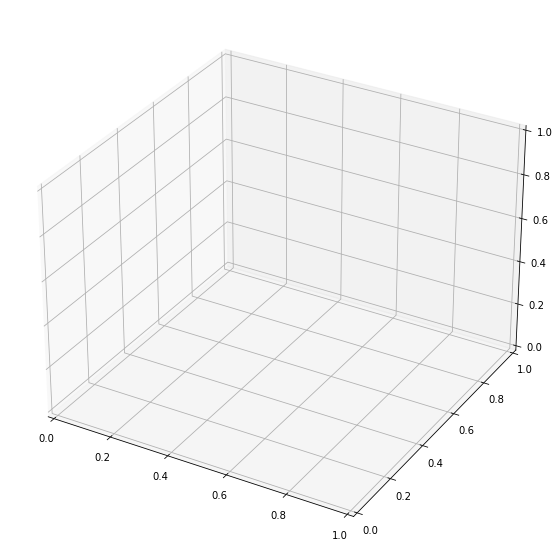

In [25]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()